# Intructions

Adjust the root folders first

# Setup environment

## Google colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
root_folder = "/content/drive/MyDrive/Licenta_INFO_selection"

## Local folder


In [ ]:
import os
root_folder = "/Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_selection"

# Data extraction and processing

## Data extraction

### Root data folder

In [2]:
import os
root_data_relative_path = "Data"

root_data_folder_path = os.path.join(root_folder, root_data_relative_path)
print("Root data folder path:", root_data_folder_path)

Root data folder path: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Data


### Dukascopy data

#### Install plugin

In [ ]:
!pip install dukascopy-python

#### Download and save data

In [ ]:
import pandas as pd
import os
from datetime import datetime
import dukascopy_python as dp
from dukascopy_python.instruments import (
    INSTRUMENT_FX_MAJORS_EUR_USD,
    INSTRUMENT_FX_METALS_XAU_USD,
    INSTRUMENT_IDX_AMERICA_E_SANDP_500
)

output_dir_Dukascopy = os.path.join(root_data_relative_path, "Dukascopy")
os.makedirs(output_dir_Dukascopy, exist_ok=True)

dukascopy_symbols = {
    "EURUSD": INSTRUMENT_FX_MAJORS_EUR_USD,
    "GOLD": INSTRUMENT_FX_METALS_XAU_USD,
    "SP500": INSTRUMENT_IDX_AMERICA_E_SANDP_500
}

dukascopy_timeframes = {
    "5min":  dp.INTERVAL_MIN_5,
    "hourly": dp.INTERVAL_HOUR_1,
}


start_date = datetime(2007, 1, 1)
end_date = datetime(2025, 7, 10)

dukascopy_data = {}

for label, instrument in dukascopy_symbols.items():
    dukascopy_data[label] = {}
    print(f"\nDownloading data for {label}")

    for tf_label, (interval_value) in dukascopy_timeframes.items():
        print(f"  Timeframe: {tf_label}")
        try:
            df = dp.fetch(
                instrument=instrument,
                interval=interval_value,
                offer_side=dp.OFFER_SIDE_BID,
                start=start_date,
                end=end_date
            )

            if not df.empty:
                df = df.rename(columns={
                    "timestamp": "time",
                    "open": "open",
                    "high": "high",
                    "low": "low",
                    "close": "close",
                    "volume": "volume"
                })
                df = df.reset_index()
                df["time"] = pd.to_datetime(df["timestamp"]).dt.strftime("%Y-%m-%d %H:%M")
                df.set_index("time", inplace=True)


                dukascopy_data[label][tf_label] = df

                filename = f"{label}_{tf_label}.csv"
                df.to_csv(os.path.join(output_dir_Dukascopy, filename))
            else:
                print(f"  No data for {label} at {tf_label}")
        except Exception as e:
            print(f"  Error downloading {label} at {tf_label}: {e}")

print("\nDownload and save complete.")

### Alpaca data

#### Install plugin

In [ ]:
!pip install alpaca-py

Download and save data

In [ ]:
from alpaca.data.historical import StockHistoricalDataClient
from alpaca.data.requests import StockBarsRequest
from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
from datetime import datetime
import pandas as pd
import os


output_dir_Alpaca = os.path.join(root_data_relative_path, "Alpaca")
os.makedirs(output_dir_Alpaca, exist_ok=True)

ALPACA_API_KEY = "PK2H3O5SAYN8TS1MONVR"
ALPACA_SECRET_KEY = "LSwqMQnADiZn47RIYA91KIiKg7K7B66YYEXPlTQP"

alpaca_stocks_tickers = ["AAPL", "MSFT", "GE", "BAC", "C"]

alpaca_timeframes = {
    "daily": TimeFrame(1, TimeFrameUnit.Day),
    "hourly": TimeFrame(1, TimeFrameUnit.Hour),
    "5min": TimeFrame(5, TimeFrameUnit.Minute)
}

alpaca_start_date = datetime(2000, 1, 1)
alpaca_end_date = datetime(2025, 7, 10)

client = StockHistoricalDataClient(ALPACA_API_KEY, ALPACA_SECRET_KEY)

alpaca_stocks_data = {}


for ticker in alpaca_stocks_tickers:
    alpaca_stocks_data[ticker] = {}
    print(f"\n Downloading {ticker}")
    for tf_label, tf_enum in alpaca_timeframes.items():
        print(f"Timeframe: {tf_label}")
        try:
            req = StockBarsRequest(
                symbol_or_symbols=ticker,
                timeframe=tf_enum,
                start=alpaca_start_date,
                end=alpaca_end_date
            )
            bars = client.get_stock_bars(req)
            df = bars.df
            if not df.empty:

                df = df.reset_index()
                df["time"] = pd.to_datetime(df["timestamp"]).dt.strftime("%Y-%m-%d %H:%M")

                df = df.rename(columns={
                    "open": "open",
                    "high": "high",
                    "low": "low",
                    "close": "close",
                    "volume": "volume"
                })

                alpaca_stocks_data[ticker][tf_label] = df
                file_path = os.path.join(output_dir_Alpaca, f"{ticker}_{tf_label}.csv")
                df.to_csv(file_path, index=False)
            else:
                print(f"No data for {ticker} [{tf_label}]")
        except Exception as e:
            print(f"Error downloading {ticker} [{tf_label}]: {e}")

print("\n Download and save complete.")

### Binance data

#### Install plugin

In [ ]:
!pip install python-binance

#### Download and save data

In [ ]:
from binance.client import Client
from binance.exceptions import BinanceAPIException
import pandas as pd
import os


BINANCE_API_KEY = 'pENAEgy4xAygFaHCnUVsYnJRN9nsjIhvrG5IATVZMDapqXKTSJgsJC3bnqtdZNGy'
BINANCE_SECRET_KEY = 'BBO7CzGlNUgbqOhY27ofoVIK5dtM8dWLqKVMXYgkbpKEw3o4bdbvwySOcY8OxPaE'

client = Client(BINANCE_API_KEY, BINANCE_SECRET_KEY)


binance_coins = ["BTCUSDT"]

binance_timeframes = {
    "daily": "1d",
    "hourly": "1h",
    "5min": "5m"
}

start_date = "8 Aug, 2017"
end_date = "10 Jul, 2025"
output_dir_Binance = os.path.join(root_data_relative_path, "Binance")
os.makedirs(output_dir_Binance, exist_ok=True)


binance_data = {}

for symbol in binance_coins:
    binance_data[symbol] = {}
    print(f"\n Downloading {symbol}")
    for tf_label, tf_binance in binance_timeframes.items():
        print(f" Timeframe: {tf_label}")
        try:
            klines = client.get_historical_klines(
                symbol=symbol,
                interval=tf_binance,
                start_str=start_date,
                end_str=end_date)

            if not klines:
                print(f" No data for {symbol} at {tf_label}")
                continue

            df = pd.DataFrame(klines, columns=[
                "Open time", "Open", "High", "Low", "Close", "Volume",
                "Close time", "Quote asset volume", "Number of trades",
                "Taker buy base volume", "Taker buy quote volume", "Ignore"
            ])

            df["time"] = pd.to_datetime(df["Open time"], unit='ms')
            df["time"] = df["time"].dt.strftime("%Y-%m-%d %H:%M")

            df.rename(columns={
                "Open": "open",
                "High": "high",
                "Low": "low",
                "Close": "close",
                "Volume": "volume"
            }, inplace=True)

            filename = f"{symbol}_{tf_label}.csv"
            df.to_csv(os.path.join(output_dir_Binance, filename), index=False)

            binance_data[symbol][tf_label] = df

        except BinanceAPIException as e:
            print(f" Error: {e}")

print("\n Download and save complete.")

### Yahoo data

#### Install plugin

In [ ]:
!pip install yfinance

#### Download and save data

In [ ]:
import yfinance as yf
import pandas as pd
import os


output_dir_Yahoo = os.path.join(root_data_relative_path, "Yahoo")
os.makedirs(output_dir_Yahoo, exist_ok=True)


yahoo_tickers = {
    "AAPL": "Apple",
    "MSFT": "Microsoft",
    "GC=F": "Gold",
    "^GSPC": "S&P 500",
    "EURUSD=X": "EUR-USD",
    "GE": "General Electric",
    "BAC": "Bank of America",
    "C": "Citigroup",
    "BTC-USD": "Bitcoin"
}


yahoo_data_dict = {}


for symbol in yahoo_tickers:
    print(f"Downloading data for {yahoo_tickers[symbol]} ({symbol})...")
    df = yf.download(
        symbol,
        start="2000-01-01",
        end="2025-07-10",
        interval="1d",
        auto_adjust=True,
        progress=False)

    if isinstance(df.columns, pd.MultiIndex):
        df.columns = df.columns.get_level_values(0)

    df = df.reset_index()

    df = df.rename(columns={
        "Date": "time",
        "Open": "open",
        "High": "high",
        "Low": "low",
        "Close": "close",
        "Volume": "volume"
    })

    df["time"] = pd.to_datetime(df["time"]).dt.strftime("%Y-%m-%d %H:%M")

    yahoo_data_dict[symbol] = df
    safe_symbol = symbol.replace("=", "").replace("^", "")
    file_path = os.path.join(output_dir_Yahoo, f"{safe_symbol}_daily.csv")
    df.to_csv(file_path, index=False)

print(f"Data saved in: {output_dir_Yahoo}")

### Install GARCH

In [ ]:
!pip install arch
!pip install tqdm

### Extract GARCH and save the processed data

In [ ]:
import numpy as np
import pandas as pd
from pandas.tseries.offsets import DateOffset
from arch import arch_model
from tqdm import tqdm
import warnings
import os
import joblib
import pickle

alpaca_stocks_tickers = ["AAPL", "MSFT", "GE", "BAC", "C"]
alpaca_timeframes = ["daily", "hourly", "5min"]

dir_Alpaca = os.path.join(root_data_folder_path, "Alpaca")


def load_alpaca_data_from_csv(directory, ticker_list=alpaca_stocks_tickers, timeframes=alpaca_timeframes):
    data_loaded = {}
    for file in os.listdir(directory):
        if file.endswith(".csv"):
            try:
                name_parts = file.replace(".csv", "").split("_")
                ticker, tf = name_parts[0], name_parts[1]
                if ticker_list and ticker not in ticker_list:
                    continue
                if timeframes and tf not in timeframes:
                    continue
                df = pd.read_csv(
                    os.path.join(directory, file),
                    index_col=1,
                    parse_dates=True,
                    date_format='mixed')

                if ticker not in data_loaded:
                    data_loaded[ticker] = {}

                df = df.sort_index()
                data_loaded[ticker][tf] = df
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return data_loaded


alpaca_loaded_data = load_alpaca_data_from_csv(dir_Alpaca, alpaca_stocks_tickers, alpaca_timeframes)
print(alpaca_loaded_data["AAPL"]["daily"].head())


for ticker in alpaca_loaded_data:
    print(f"{ticker}: {list(alpaca_loaded_data[ticker].keys())}")



binance_coins = ["BTCUSDT"]

binance_timeframes = ["daily", "hourly", "5min"]

dir_Binance = os.path.join(root_data_folder_path, "Binance")


def load_binance_data_from_csv(directory, coins=binance_coins, timeframes=binance_timeframes):
    data = {}
    for file in os.listdir(directory):
        if file.endswith(".csv"):
            try:
                name_parts = file.replace(".csv", "").split("_")
                ticker, tf = name_parts[0], name_parts[1]
                if coins and ticker not in coins:
                    continue
                if timeframes and tf not in timeframes:
                    continue
                df = pd.read_csv(
                    os.path.join(directory, file),
                    index_col=12,
                    parse_dates=True,
                    date_format='mixed')

                df = df.sort_index()
                df.drop(columns=["Open time", "Close time"], inplace=True)


                if ticker not in data:
                    data[ticker] = {}
                data[ticker][tf] = df
            except Exception as e:
                print(f" Error loading {file}: {e}")
    return data


binance_loaded_data = load_binance_data_from_csv(dir_Binance, binance_coins, binance_timeframes)
print(binance_loaded_data["BTCUSDT"]["daily"].head())



dir_Dukascopy = os.path.join(root_data_folder_path, "Dukascopy")
dukascopy_symbols = ["EURUSD", "GOLD", "SP500"]
dukascopy_timeframes = ["5min", "hourly","daily"]

def load_dukascopy_data(directory, symbols=None, timeframes=None):
    data_loaded = {}
    for file in os.listdir(directory):
        if file.endswith(".csv"):
            try:
                name_parts = file.replace(".csv", "").split("_")
                ticker, tf = name_parts[0], name_parts[1]
                if symbols and ticker not in symbols:
                    continue
                if timeframes and tf not in timeframes:
                    continue
                df = pd.read_csv(os.path.join(directory, file), index_col=0, parse_dates=True)
                if ticker not in data_loaded:
                    data_loaded[ticker] = {}

                df = df.sort_index()
                data_loaded[ticker][tf] = df
            except Exception as e:
                print(f"Error loading {file}: {e}")
    return data_loaded

dukascopy_loaded_data = load_dukascopy_data(dir_Dukascopy, dukascopy_symbols, dukascopy_timeframes)
print(dukascopy_loaded_data["EURUSD"]["daily"].head())

all_data = {}

all_tickers = alpaca_stocks_tickers + binance_coins + dukascopy_symbols
selected_time_frames =["daily", "5min"]

for data_source in [alpaca_loaded_data, binance_loaded_data, dukascopy_loaded_data]:
    for ticker, tf_dict in data_source.items():
        if ticker not in all_data:
            all_data[ticker] = {}
        for tf_label, df in tf_dict.items():
            all_data[ticker][tf_label] = df



cleaned_data_no_interpolation = {}

for ticker in all_tickers:
    if ticker not in all_data:
        continue

    cleaned_data_no_interpolation[ticker] = {}

    for tf in selected_time_frames:
        if tf not in all_data[ticker]:
            continue

        df = all_data[ticker][tf].copy()
        df.index = pd.to_datetime(df.index)

        df.columns = [col.lower() for col in df.columns]
        df = df[["open", "close", "high", "low", "volume"]]
        df.index.name = "time"
        df = df.sort_index()

        if tf == "daily":
            df = df[df["volume"] > 0]

        df["scaled_log_return"] = np.log(df["close"] / df["close"].shift(1))
        df = df.dropna()

        cleaned_data_no_interpolation[ticker][tf] = df

print("Cleaned data without interpolation and computed scaled log returns for all selected timeframes.")



for ticker, tf_dict in cleaned_data_no_interpolation.items():
    print(f"\nTicker: {ticker}")
    for tf, df in tf_dict.items():
        if not isinstance(df, pd.DataFrame) or df.empty:
            print(f"  Timeframe: {tf} – EMPTY or not a DataFrame")
            continue
        df = df.sort_index()
        start_date = df.index.min()
        end_date = df.index.max()
        n_rows = len(df)
        print(f"  Timeframe: {tf}")
        print(f"    Start: {start_date}")
        print(f"    End:   {end_date}")
        print(f"    Rows:  {n_rows}")



cleaned_data_no_interpolation_with_variance = {}
missing_rv_stats = []

for ticker in all_tickers:
    if ticker not in cleaned_data_no_interpolation:
        continue
    if "5min" not in cleaned_data_no_interpolation[ticker] or "daily" not in cleaned_data_no_interpolation[ticker]:
        continue




    df_5min = cleaned_data_no_interpolation[ticker]["5min"].copy()
    df_daily = cleaned_data_no_interpolation[ticker]["daily"].copy()

    #Problem specific to EURUSD
    if ticker == "EURUSD":
        select_date = "2012-01-12"
        df_daily = df_daily[df_daily.index >= pd.to_datetime(start_date)]


    if "scaled_log_return" not in df_5min.columns:
        print(f"Skipping {ticker}: no scaled_log_return column in 5min data")
        continue

    df_5min.index = pd.to_datetime(df_5min.index)

    df_5min["date"] = df_5min.index.date
    daily_rv = df_5min.groupby("date")["scaled_log_return"].apply(lambda x: (x**2).sum()).rename("scaled_realized_variance")

    df_daily.index = pd.to_datetime(df_daily.index)
    df_daily["date"] = df_daily.index.date

    df_daily = df_daily.merge(daily_rv, on="date", how="left")
    df_daily = df_daily.set_index("date")
    df_daily = df_daily.iloc[1:]

    num_missing = df_daily["scaled_realized_variance"].isna().sum()
    total_rows = len(df_daily)
    missing_rv_stats.append({
        "ticker": ticker,
        "missing_rv_count": num_missing,
        "total_rows": total_rows,
        "missing_percentage": num_missing / total_rows * 100
    })

    #just 2 NAs get dropped here, one for gold, one for EURUSD
    df_daily = df_daily.dropna()

    cleaned_data_no_interpolation_with_variance[ticker] = {}
    cleaned_data_no_interpolation_with_variance[ticker]["daily"] = df_daily

print("Realized variance added to daily data.")


missing_rv_df = pd.DataFrame(missing_rv_stats)
print(missing_rv_df)



lookback = DateOffset(years=1)
min_obs = 200

model_configs = [
    ("TGARCH", 1, 1)
]



data_with_garch_no_interpolation = {}

for ticker in tqdm(cleaned_data_no_interpolation_with_variance.keys(), desc="Processing tickers"):
    if "daily" not in cleaned_data_no_interpolation_with_variance[ticker]:
        continue

    df_daily = cleaned_data_no_interpolation_with_variance[ticker]["daily"].copy()
    if "scaled_log_return" not in df_daily.columns:
        continue

    df_daily.index = pd.to_datetime(df_daily.index)
    df_daily = df_daily.sort_index().dropna()
    scaled_log_returns = df_daily["scaled_log_return"]

    start_eligible = df_daily.index[0] + lookback
    eligible_dates = df_daily.index[df_daily.index >= start_eligible]

    models_x = {f"x_{m}_{p}_{q}": dict(pred_var=[], bic=[], params=[], converged=[], warnings=[]) for m, p, q in model_configs}
    models_y = {f"y_{m}_{p}_{q}": dict(pred_var=[], bic=[], params=[], converged=[], warnings=[]) for m, p, q in model_configs}

    def fit_model_safe(model_func, model_type):
        try:
            with warnings.catch_warnings(record=True) as wlist:
                warnings.simplefilter("always")
                with np.errstate(all='ignore'):
                    model = model_func()
                    result = model.fit(disp="off", options={"maxiter": 1000})
                warning_msg = "; ".join([str(w.message) for w in wlist]) if wlist else ""
                forecast = result.forecast(horizon=1, reindex=False)
                pred_var = forecast.variance.iloc[-1, 0]
                converged = result.convergence_flag == 0
                return pred_var, result.bic, result.params.to_dict(), converged, warning_msg
        except Exception as e:
            return np.nan, np.nan, {}, False, str(e)

    for current_dt in eligible_dates:
        # Backward only window
        window_start = current_dt - lookback
        window_data = scaled_log_returns.loc[window_start:current_dt - pd.Timedelta(days=1)]
        window_data = window_data.replace([np.inf, -np.inf], np.nan).dropna()

        if len(window_data) < min_obs or not np.isfinite(window_data).all():
            for m in models_x.values():
                m["pred_var"].append(np.nan)
                m["bic"].append(np.nan)
                m["params"].append({})
                m["converged"].append(False)
                m["warnings"].append("Invalid or insufficient window")
        else:
            for model_type, p, q in model_configs:
                model_key = f"x_{model_type}_{p}_{q}"

                def model_factory():
                    if model_type == "TGARCH":
                        return arch_model(window_data, vol='GARCH', p=p, q=q, dist='t')
                    elif model_type == "GARCH":
                        return arch_model(window_data, vol='GARCH', p=p, q=q, dist='normal')
                    elif model_type == "ARCH":
                        return arch_model(window_data, vol='ARCH', p=p, dist='normal')
                    elif model_type == "GJRGARCH":
                        return arch_model(window_data, vol='GARCH', p=p, o=1, q=q, dist='normal')

                pred_var, bic, params, conv, warn = fit_model_safe(model_factory, model_type)
                models_x[model_key]["pred_var"].append(pred_var)
                models_x[model_key]["bic"].append(bic)
                models_x[model_key]["params"].append(params)
                models_x[model_key]["converged"].append(conv)
                models_x[model_key]["warnings"].append(warn)

        #Backward and forward window
        fwd_end = current_dt + pd.Timedelta(days=27)
        fwd_start = fwd_end - lookback
        fwd_data = scaled_log_returns.loc[fwd_start:fwd_end]
        fwd_data = fwd_data.replace([np.inf, -np.inf], np.nan).dropna()

        if len(fwd_data) < min_obs or not np.isfinite(fwd_data).all():
            for m in models_y.values():
                m["pred_var"].append(np.nan)
                m["bic"].append(np.nan)
                m["params"].append({})
                m["converged"].append(False)
                m["warnings"].append("Invalid or insufficient window")
        else:
            for model_type, p, q in model_configs:
                model_key = f"y_{model_type}_{p}_{q}"

                def model_factory():
                    if model_type == "TGARCH":
                        return arch_model(fwd_data, vol='GARCH', p=p, q=q, dist='t')
                    elif model_type == "GARCH":
                        return arch_model(fwd_data, vol='GARCH', p=p, q=q, dist='normal')
                    elif model_type == "ARCH":
                        return arch_model(fwd_data, vol='ARCH', p=p, dist='normal')
                    elif model_type == "GJRGARCH":
                        return arch_model(fwd_data, vol='GARCH', p=p, o=1, q=q, dist='normal')

                pred_var, bic, params, conv, warn = fit_model_safe(model_factory, model_type)
                models_y[model_key]["pred_var"].append(pred_var)
                models_y[model_key]["bic"].append(bic)
                models_y[model_key]["params"].append(params)
                models_y[model_key]["converged"].append(conv)
                models_y[model_key]["warnings"].append(warn)

    #Combine all into output dataframe
    df_out = df_daily.loc[eligible_dates].copy()

    def build_model_df(models_dict):
        data = {}
        for model_name, output in models_dict.items():
            data[f"{model_name}_pred_variance"] = output["pred_var"]
            data[f"{model_name}_BIC"] = output["bic"]
            data[f"{model_name}_converged"] = output["converged"]
            data[f"{model_name}_warnings"] = output["warnings"]
            for param in set().union(*output["params"]):
                data[f"{model_name}_param_{param}"] = [p.get(param, np.nan) for p in output["params"]]
        return pd.DataFrame(data, index=df_out.index)


    df_model_x = build_model_df(models_x)
    df_model_y = build_model_df(models_y)

    df_out = pd.concat([df_out, df_model_x, df_model_y], axis=1)
    df_out = df_out.copy()


    print(f"\n--- Missing forecast rate for {ticker} ---")
    for model_key, model_dict in {**models_x, **models_y}.items():
        pred_var_list = model_dict["pred_var"]
        if len(pred_var_list) > 0:
            nan_rate = np.isnan(pred_var_list).mean()
            print(f"{ticker}: {nan_rate:.2%} NaNs in {model_key} forecast")
        else:
            print(f"{ticker}: No data processed for {model_key}")

    data_with_garch_no_interpolation[ticker] = df_out



output_dir_Processed = os.path.join(root_data_folder_path, "Processed")
processed_dict = {}

standard_params = (
    [f"alpha_{i}" for i in range(1, 3)] +
    [f"beta_{i}" for i in range(1, 3)] +
    ["omega"] +
    ["mu"] +
    ["nu_tgarch"] +
    [f"gamma_gjr_{i}" for i in range(1, 3)]
)

rows_with_large_variances = []
rows_only_with_large_variances = []
non_converged_rows = []

for ticker, df in data_with_garch_no_interpolation.items():
    rows = []

    for i, row in df.iterrows():
        new_row = {
            "date": i,
            "open": row.get("open", np.nan),
            "close": row.get("close", np.nan),
            "high": row.get("high", np.nan),
            "low": row.get("low", np.nan),
            "lg_return": row.get("scaled_log_return", np.nan),
            "volume": row.get("volume", np.nan),
            "y_var": row.get("scaled_realized_variance", np.nan)
        }

        bics_x, pred_vars_x = {}, {}
        bics_y, pred_vars_y = {}, {}

        for model_type, p, q in model_configs:
            base = f"{model_type}_{p}_{q}"
            x_key = f"x_{base}"
            y_key = f"y_{base}"

            #X models
            conv_x = row.get(f"{x_key}_converged", False)
            pred_var_x = row.get(f"{x_key}_pred_variance", np.nan)
            if conv_x and np.isfinite(pred_var_x):
                bics_x[base] = row.get(f"{x_key}_BIC", np.nan)
                pred_vars_x[base] = pred_var_x

            new_row[f"{x_key.lower()}_var"] = pred_var_x if conv_x and np.isfinite(pred_var_x) else np.nan

            #Y models
            conv_y = row.get(f"{y_key}_converged", False)
            pred_var_y = row.get(f"{y_key}_pred_variance", np.nan)
            if conv_y and np.isfinite(pred_var_y):
                bics_y[base] = row.get(f"{y_key}_BIC", np.nan)
                pred_vars_y[base] = pred_var_y

            new_row[f"{y_key.lower()}_var"] = pred_var_y if conv_y and np.isfinite(pred_var_y) else np.nan


        for model_label, pred_vars in [("x", pred_vars_x), ("y", pred_vars_y)]:
            converged_vars = list(pred_vars.values())
            filtered_vars = [v for v in converged_vars if np.isfinite(v) and v < 1e10]
            avg_var = np.mean(filtered_vars) if filtered_vars else 1e10

            if any(v >= 1e10 for v in converged_vars):
                rows_with_large_variances.append({"ticker": ticker, "date": i, "model_type": model_label})

            if all(v >= 1e10 for v in converged_vars) and converged_vars:
                rows_only_with_large_variances.append({"ticker": ticker, "date": i, "model_type": model_label})

            if not pred_vars:
                non_converged_rows.append({"ticker": ticker, "date": i, "model_type": model_label})

            #Best model selection
            bics = bics_x if model_label == "x" else bics_y
            best_model = min(bics, key=bics.get) if bics else None
            best_pred_var = pred_vars.get(best_model, avg_var)

            new_row[f"{model_label}_best_model"] = best_model
            new_row[f"{model_label}_best_pred_var"] = best_pred_var

            for param in standard_params:
                new_row[f"{model_label}_best_{param}"] = 0.0

            if best_model:
                param_prefix = f"{model_label}_{best_model}_param_"
                for col in df.columns:
                    if col.startswith(param_prefix):
                        raw_param = col.split(param_prefix)[1]
                        value = row[col]
                        mapped = None

                        if raw_param.startswith("alpha["):
                            idx = int(raw_param[6:-1])
                            mapped = f"alpha_{idx}"

                        elif raw_param.startswith("beta["):
                            idx = int(raw_param[5:-1])
                            mapped = f"beta_{idx}"

                        elif raw_param == "omega":
                            mapped = "omega"

                        elif raw_param == "mu":
                            mapped = "mu"

                        elif raw_param.startswith("gamma["):
                            idx = int(raw_param[6:-1])
                            if "GJRGARCH" in best_model.upper():
                                mapped = f"gamma_gjr_{idx}"

                        elif raw_param == "nu":
                            mapped = "nu_tgarch"



                        if mapped and mapped in standard_params:
                            new_row[f"{model_label}_best_{mapped}"] = value

        rows.append(new_row)

    processed_dict[ticker] = pd.DataFrame(rows)
    processed_dict[ticker].to_csv(
        os.path.join(output_dir_Processed, f"processed_{ticker}.csv"),
        index=False)



non_converged_df = pd.DataFrame(non_converged_rows)
processed_dict["AAPL"].info()

output_dir_Environment = os.path.join(root_folder, "Saved_objects")
os.makedirs(output_dir_Environment, exist_ok=True)
session_data_filename = os.path.join(output_dir_Environment, 'process_data_no_interpolation_session.pkl')



def is_picklable(obj):
    try:
        pickle.dumps(obj)
        return True
    except Exception:
        return False

session_vars = {
    k: v for k, v in globals().items()
    if not k.startswith("__") and is_picklable(v)
}

#save session data
joblib.dump(session_vars, session_data_filename)
print(f"Session saved with {len(session_vars)} variables to:\n{session_data_filename}")



#load the saved session
session_data_filename = os.path.join(root_folder,"Saved_objects/process_data_no_interpolation_session.pkl")
session = joblib.load(session_data_filename)
globals().update(session)


## Data processing

### Processed data folder path

In [69]:
data_relative_path = "Data/Processed"

data_folder_path = os.path.join(root_folder, data_relative_path)
print("Data folder path:", data_folder_path)

Data folder path: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Data/Processed


### Importing data and renaming columns

In [70]:
import pandas as pd

tickers = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]

df_dict = {
    ticker: pd.read_csv(f"{data_folder_path}/processed_{ticker}.csv", parse_dates=["date"])
    for ticker in tickers
}

print("Data size:")
for ticker in tickers:
    print(f"{ticker}: {df_dict[ticker].shape}")

    df = df_dict[ticker]
    df.rename(columns={
      "y_lg_return": "lg_return",
      "y_var": "rv"
    }, inplace=True)

    new_columns = {}
    for col in df.columns:
        if col.startswith("best_x_"):
            new_columns[col] = col.replace("best_x_", "x_best_param_")
    for col in df.columns:
        if col.startswith("best_y_"):
          new_columns[col] = col.replace("best_y_", "y_best_param_")

    df.rename(columns=new_columns, inplace=True)

print("\nData types:")
df_dict["AAPL"].info()

Data size:
AAPL: (2137, 32)
MSFT: (2137, 32)
GE: (2137, 32)
BAC: (2137, 32)
C: (2137, 32)
BTCUSDT: (2518, 32)
EURUSD: (3901, 32)
GOLD: (5653, 32)
SP500: (3585, 32)

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2137 entries, 0 to 2136
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2137 non-null   datetime64[ns]
 1   open                2137 non-null   float64       
 2   close               2137 non-null   float64       
 3   high                2137 non-null   float64       
 4   low                 2137 non-null   float64       
 5   lg_return           2137 non-null   float64       
 6   volume              2137 non-null   float64       
 7   rv                  2137 non-null   float64       
 8   x_tgarch_1_1_var    2137 non-null   float64       
 9   y_tgarch_1_1_var    2137 non-null   float64       
 10  x_best_model        2137 non-null   obj

### Dropping the "best model" columns which contain strings

In [71]:
for ticker in tickers:
    df_dict[ticker] = df_dict[ticker].drop(["x_best_model", "y_best_model"], axis=1)
    print("Dropped columns for: ", ticker)


Dropped columns for:  AAPL
Dropped columns for:  MSFT
Dropped columns for:  GE
Dropped columns for:  BAC
Dropped columns for:  C
Dropped columns for:  BTCUSDT
Dropped columns for:  EURUSD
Dropped columns for:  GOLD
Dropped columns for:  SP500


### Dropping some overlapping columns ONLY when working with a single GARCH

In [72]:
df_dict["EURUSD"].columns

for ticker in tickers:
    df_dict[ticker] = df_dict[ticker].drop(["x_tgarch_1_1_var", "y_tgarch_1_1_var"], axis=1)
    print("Dropped columns for: ", ticker)

Dropped columns for:  AAPL
Dropped columns for:  MSFT
Dropped columns for:  GE
Dropped columns for:  BAC
Dropped columns for:  C
Dropped columns for:  BTCUSDT
Dropped columns for:  EURUSD
Dropped columns for:  GOLD
Dropped columns for:  SP500


### Trasnfoming predicted var columns to log scale

In [73]:
import numpy as np
import pandas as pd

cols = ["x_best_pred_var"]
#cols = ["x_best_pred_var", "y_best_pred_var"]
#cols = ["x_best_pred_var", "y_best_pred_var", "rv"]

for ticker in tickers:
    df = df_dict[ticker]
    for c in cols:
        if c in df:
            df.loc[:, c] = np.log(df[c].astype(float).clip(lower=1e-8))

### Helper function to remove constant columns

They might emerge for some GARCH parameter.

In [74]:
import pandas as pd

def remove_constant_columns_from_df(df, ticker=None):
    constant_cols = [col for col in df.columns if df[col].nunique(dropna=False) == 1]

    if constant_cols:
        print(f"\n{ticker or 'DataFrame'} — Constant columns removed:")
        for col in constant_cols:
            print(f"  - {col}")

    return df.drop(columns=constant_cols)

for ticker in df_dict:
    df_dict[ticker] = remove_constant_columns_from_df(df_dict[ticker], ticker=ticker)


AAPL — Constant columns removed:
  - x_best_alpha_2
  - x_best_beta_2
  - x_best_gamma_gjr_1
  - x_best_gamma_gjr_2
  - y_best_alpha_2
  - y_best_beta_2
  - y_best_gamma_gjr_1
  - y_best_gamma_gjr_2

MSFT — Constant columns removed:
  - x_best_alpha_2
  - x_best_beta_2
  - x_best_gamma_gjr_1
  - x_best_gamma_gjr_2
  - y_best_alpha_2
  - y_best_beta_2
  - y_best_gamma_gjr_1
  - y_best_gamma_gjr_2

GE — Constant columns removed:
  - x_best_alpha_2
  - x_best_beta_2
  - x_best_gamma_gjr_1
  - x_best_gamma_gjr_2
  - y_best_alpha_2
  - y_best_beta_2
  - y_best_gamma_gjr_1
  - y_best_gamma_gjr_2

BAC — Constant columns removed:
  - x_best_alpha_2
  - x_best_beta_2
  - x_best_gamma_gjr_1
  - x_best_gamma_gjr_2
  - y_best_alpha_2
  - y_best_beta_2
  - y_best_gamma_gjr_1
  - y_best_gamma_gjr_2

C — Constant columns removed:
  - x_best_alpha_2
  - x_best_beta_2
  - x_best_gamma_gjr_1
  - x_best_gamma_gjr_2
  - y_best_alpha_2
  - y_best_beta_2
  - y_best_gamma_gjr_1
  - y_best_gamma_gjr_2

BTCUS

### Helper function to check for very large values

We had some problems with EGARCH variacnes and parameters so we removed them from the data pipeline

In [75]:
import pandas as pd

def find_large_values(df_dict, threshold=1e6):
    for ticker, df in df_dict.items():
        print(f"\nChecking ticker: {ticker}")
        for col in df.columns:
            if pd.api.types.is_numeric_dtype(df[col]):
                max_val = df[col].max(skipna=True)
                min_val = df[col].min(skipna=True)
                if abs(max_val) > threshold or abs(min_val) > threshold:
                    print(f"Column '{col}' has large values:")
                    print(f"Max: {max_val}")
                    print(f"Min: {min_val}")
                else:
                    print(f"Column '{col}' OK!")

find_large_values(df_dict, threshold=1e10)


Checking ticker: AAPL
Column 'open' OK!
Column 'close' OK!
Column 'high' OK!
Column 'low' OK!
Column 'lg_return' OK!
Column 'volume' OK!
Column 'rv' OK!
Column 'x_best_pred_var' OK!
Column 'x_best_alpha_1' OK!
Column 'x_best_beta_1' OK!
Column 'x_best_omega' OK!
Column 'x_best_mu' OK!
Column 'x_best_nu_tgarch' OK!
Column 'y_best_pred_var' OK!
Column 'y_best_alpha_1' OK!
Column 'y_best_beta_1' OK!
Column 'y_best_omega' OK!
Column 'y_best_mu' OK!
Column 'y_best_nu_tgarch' OK!

Checking ticker: MSFT
Column 'open' OK!
Column 'close' OK!
Column 'high' OK!
Column 'low' OK!
Column 'lg_return' OK!
Column 'volume' OK!
Column 'rv' OK!
Column 'x_best_pred_var' OK!
Column 'x_best_alpha_1' OK!
Column 'x_best_beta_1' OK!
Column 'x_best_omega' OK!
Column 'x_best_mu' OK!
Column 'x_best_nu_tgarch' OK!
Column 'y_best_pred_var' OK!
Column 'y_best_alpha_1' OK!
Column 'y_best_beta_1' OK!
Column 'y_best_omega' OK!
Column 'y_best_mu' OK!
Column 'y_best_nu_tgarch' OK!

Checking ticker: GE
Column 'open' OK!
C

## Saving the unstructured data for GARCH

In [76]:
import os
import pickle

objects_relative_path = "Saved_objects"

save_data_object_path = os.path.join(root_folder, objects_relative_path)
print("Object folder path:", save_data_object_path)
os.makedirs(save_data_object_path, exist_ok=True)

unstructured_dictionary_file_path = os.path.join(save_data_object_path, "unstructured_data_dict.pkl")

with open(unstructured_dictionary_file_path, "wb") as f:
    pickle.dump(df_dict, f)

print(f"Unstructured data dictionary saved to: {unstructured_dictionary_file_path}")

Object folder path: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects
Unstructured data dictionary saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/unstructured_data_dict.pkl


### Put data in the right format

We have to separate the X features into time and others (price, variance, GARCH parameters) as these will need to be treated differently when it comes to normalization.

In [77]:
from typing import Union, Dict, Optional
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def df_to_raw_X_y_dictionary(data,
                             ticker="Unnamed ticker",
                             window_size=60,
                             horizon=60,
                             rv_y = True,
                             lg_return_y = False,
                             garch_var_x = True,
                             best_param_x=True,
                             best_param_y=True,
                             volume_x=True,
                             x_lg_return=False,
                             best_var_x = False,
                             best_var_y = False
                             ):
    assert rv_y or lg_return_y, "At least one of rv_y or lg_return_y must be True"

    df_copy = data.copy()

    if len(df_copy) < window_size + horizon:
        print(f"Skipping {ticker}: Not enough data.")
        return None

    if "date" not in df_copy.columns or not pd.api.types.is_datetime64_any_dtype(df_copy["date"]):
        raise ValueError(f"Data for {ticker} must include a 'date' column in datetime format.")

    # Time-based features
    df_copy["x_time_day_of_week"] = df_copy["date"].dt.dayofweek
    df_copy["x_time_day_of_month"] = df_copy["date"].dt.day
    df_copy["x_time_day_of_year"] = df_copy["date"].dt.dayofyear
    df_copy["x_time_week_of_year"] = df_copy["date"].dt.isocalendar().week.astype(int)
    df_copy["x_time_month_of_year"] = df_copy["date"].dt.month
    df_copy["x_time_is_quarter_end"] = df_copy["date"].dt.is_quarter_end.astype(int)
    df_copy["x_time_years_since_2000"] = df_copy["date"].dt.year - 2000
    df_copy["x_time_days_since_2000"] = (df_copy["date"] - pd.Timestamp("2000-01-01")).dt.days
    df_copy["x_time_months_since_2000"] = (df_copy["x_time_years_since_2000"] * df_copy["x_time_month_of_year"] - 1)

    # Sin/cos cyclical re-codings for time features
    df_copy["x_time_dow_sin"] = np.sin(2 * np.pi * df_copy["x_time_day_of_week"] / 7)
    df_copy["x_time_dow_cos"] = np.cos(2 * np.pi * df_copy["x_time_day_of_week"] / 7)
    df_copy["x_time_dom_sin"] = np.sin(2 * np.pi * df_copy["x_time_day_of_month"] / 31)
    df_copy["x_time_dom_cos"] = np.cos(2 * np.pi * df_copy["x_time_day_of_month"] / 31)
    df_copy["x_time_doy_sin"] = np.sin(2 * np.pi * df_copy["x_time_day_of_year"] / 365)
    df_copy["x_time_doy_cos"] = np.cos(2 * np.pi * df_copy["x_time_day_of_year"] / 365)
    df_copy["x_time_woy_sin"] = np.sin(2 * np.pi * df_copy["x_time_week_of_year"] / 52)
    df_copy["x_time_woy_cos"] = np.cos(2 * np.pi * df_copy["x_time_week_of_year"] / 52)
    df_copy["x_time_moy_sin"] = np.sin(2 * np.pi * df_copy["x_time_month_of_year"] / 12)
    df_copy["x_time_moy_cos"] = np.cos(2 * np.pi * df_copy["x_time_month_of_year"] / 12)

    # Normalize trend time features
    trend_features = ["x_time_years_since_2000", "x_time_days_since_2000", "x_time_months_since_2000"]
    df_copy[trend_features] = MinMaxScaler().fit_transform(df_copy[trend_features])

    X_time_features = [
        "x_time_dow_sin", "x_time_dow_cos", "x_time_dom_sin", "x_time_dom_cos",
        "x_time_doy_sin", "x_time_doy_cos", "x_time_woy_sin", "x_time_woy_cos",
        "x_time_moy_sin", "x_time_moy_cos", "x_time_is_quarter_end",
        "x_time_years_since_2000", "x_time_days_since_2000", "x_time_months_since_2000"
    ]

    if x_lg_return:
        X_other_features = ["rv", "lg_return"]
    else:
        X_other_features = ["rv"]
    if volume_x:
        X_other_features.append("volume")

    if garch_var_x:
      X_other_features += [col for col in df_copy.columns if col.startswith("x_") and not col.startswith("x_best_") and col.endswith("_var")]

    if best_param_x:
        X_other_features += [col for col in df_copy.columns if col.startswith("x_best_") and not col.endswith("_var")]

    if best_var_x:
        X_other_features += [col for col in df_copy.columns if col.startswith("x_best_") and col.endswith("_var")]

    y_targets=[]
    if rv_y:
        y_targets.append("rv")      
    if lg_return_y:
        y_targets.append("lg_return")

    if best_var_y:
      y_targets += [col for col in df_copy.columns if col.startswith("y_best_") and col.endswith("_var")]
    
    if best_param_y:
        y_targets += [col for col in df_copy.columns if col.startswith("y_best_") and not col.endswith("_var")]

    required_columns = X_time_features + X_other_features + y_targets
    df_copy = df_copy.dropna(subset=required_columns).reset_index(drop=True)

    X_other_all, X_time_all, y_all = [], [], []

    for i in range(window_size, len(df_copy) - horizon + 1):
        # Input: t-27:t-0
        other_window = df_copy.loc[i - window_size:i - 1, X_other_features].values
        time_window = df_copy.loc[i - window_size:i - 1, X_time_features].values

        # Targets: t1:t+28
        y_horizon = df_copy.loc[i:i + horizon - 1, y_targets].values

        X_other_all.append(other_window)
        X_time_all.append(time_window)
        y_all.append(y_horizon)

    X_other_all = np.asarray(X_other_all, dtype=np.float64)
    X_time_all = np.asarray(X_time_all, dtype=np.float64)
    y_all = np.asarray(y_all, dtype=np.float64)

    X_other_columns = [f"{f}_t-{window_size - t - 1}" for t in range(window_size) for f in X_other_features]
    X_time_columns = [f"{f}_t-{window_size - t - 1}" for t in range(window_size) for f in X_time_features]
    y_columns = [f"{f}_t+{t+1}" for t in range(horizon) for f in y_targets]

    return {
        "X_other": X_other_all,
        "X_time": X_time_all,
        "y": y_all,
        "X_other_columns": X_other_columns,
        "X_time_columns": X_time_columns,
        "y_columns": y_columns
    }




### Data format v1

In [78]:
structured_data_dict = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=True,rv_y = True, garch_var_x= False, best_param_x=True, best_param_y=True, volume_x=True)
    if ticker_data is not None:
        structured_data_dict[ticker] = ticker_data

print("Structured data dictionary created")

Structured data dictionary created


### Saving data to objects to be used later

In [79]:
import os
import pickle

objects_relative_path = "Saved_objects"

save_data_object_path = os.path.join(root_folder, objects_relative_path)
print("Object folder path:", save_data_object_path)
os.makedirs(save_data_object_path, exist_ok=True)

data_dictionary_file_path = os.path.join(save_data_object_path, "structured_data_dict.pkl")

with open(data_dictionary_file_path, "wb") as f:
    pickle.dump(structured_data_dict, f)

print(f"Data dictionary saved to: {data_dictionary_file_path}")

Object folder path: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects
Data dictionary saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict.pkl


### Extracting and saving some additional data compatible with Benchmark models

In [80]:
structured_data_dict_2 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=True,rv_y = True, garch_var_x= False, best_param_x=True, best_param_y=True, volume_x=False, )
    if ticker_data is not None:
        structured_data_dict_2[ticker] = ticker_data

print("Structured data dictionary 2 created")


data_dictionary_2_file_path = os.path.join(save_data_object_path, "structured_data_dict_2.pkl")

with open(data_dictionary_2_file_path, "wb") as f:
    pickle.dump(structured_data_dict_2, f)

print(f"Data dictionary 2 saved to: {data_dictionary_2_file_path}")

Structured data dictionary 2 created
Data dictionary 2 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_2.pkl


### Data v3

In [81]:
structured_data_dict_3 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=True,rv_y = True, garch_var_x= False, best_param_x=False, best_param_y=True, volume_x=False, )
    if ticker_data is not None:
        structured_data_dict_3[ticker] = ticker_data

print("Structured data dictionary 3 created")


data_dictionary_3_file_path = os.path.join(save_data_object_path, "structured_data_dict_3.pkl")

with open(data_dictionary_3_file_path, "wb") as f:
    pickle.dump(structured_data_dict_3, f)

print(f"Data dictionary 3 saved to: {data_dictionary_3_file_path}")

Structured data dictionary 3 created
Data dictionary 3 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_3.pkl


### Data v4

In [82]:
structured_data_dict_4 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=True,rv_y = True, garch_var_x= False, best_param_x=False, best_param_y=False, volume_x=False, )
    if ticker_data is not None:
        structured_data_dict_4[ticker] = ticker_data

print("Structured data dictionary 4 created")


data_dictionary_4_file_path = os.path.join(save_data_object_path, "structured_data_dict_4.pkl")

with open(data_dictionary_4_file_path, "wb") as f:
    pickle.dump(structured_data_dict_4, f)

print(f"Data dictionary 4 saved to: {data_dictionary_4_file_path}")

Structured data dictionary 4 created
Data dictionary 4 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_4.pkl


### Data v5

In [83]:
structured_data_dict_5 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=False, rv_y=True, garch_var_x=False, best_param_x=False, best_param_y=False, volume_x=False, x_lg_return=False)
    if ticker_data is not None:
        structured_data_dict_5[ticker] = ticker_data

print("Structured data dictionary 5 created")


data_dictionary_5_file_path = os.path.join(save_data_object_path, "structured_data_dict_5.pkl")

with open(data_dictionary_5_file_path, "wb") as f:
    pickle.dump(structured_data_dict_5, f)

print(f"Data dictionary 5 saved to: {data_dictionary_5_file_path}")

Structured data dictionary 5 created
Data dictionary 5 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_5.pkl


### Data v6

In [84]:
structured_data_dict_6 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=False, rv_y=True, garch_var_x=True, best_param_x=True, best_param_y=True, volume_x=False, x_lg_return=False)
    if ticker_data is not None:
        structured_data_dict_6[ticker] = ticker_data

print("Structured data dictionary 6 created")


data_dictionary_6_file_path = os.path.join(save_data_object_path, "structured_data_dict_6.pkl")

with open(data_dictionary_6_file_path, "wb") as f:
    pickle.dump(structured_data_dict_6, f)

print(f"Data dictionary 6 saved to: {data_dictionary_6_file_path}")

Structured data dictionary 6 created
Data dictionary 6 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_6.pkl


### Data v7

In [85]:
structured_data_dict_7 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=False, rv_y=True, garch_var_x=False, best_param_x=True, best_param_y=True, volume_x=False, x_lg_return=False)
    if ticker_data is not None:
        structured_data_dict_7[ticker] = ticker_data

print("Structured data dictionary 7 created")


data_dictionary_7_file_path = os.path.join(save_data_object_path, "structured_data_dict_7.pkl")

with open(data_dictionary_7_file_path, "wb") as f:
    pickle.dump(structured_data_dict_7, f)

print(f"Data dictionary 7 saved to: {data_dictionary_7_file_path}")

Structured data dictionary 7 created
Data dictionary 7 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_7.pkl


### Data v8

In [86]:
structured_data_dict_8 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=False, rv_y=True, garch_var_x=False, best_param_x=False, best_param_y=True, volume_x=False, x_lg_return=False)
    if ticker_data is not None:
        structured_data_dict_8[ticker] = ticker_data

print("Structured data dictionary 8 created")


data_dictionary_8_file_path = os.path.join(save_data_object_path, "structured_data_dict_8.pkl")

with open(data_dictionary_8_file_path, "wb") as f:
    pickle.dump(structured_data_dict_8, f)

print(f"Data dictionary 8 saved to: {data_dictionary_8_file_path}")

Structured data dictionary 8 created
Data dictionary 8 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_8.pkl


### Data v9

In [87]:
structured_data_dict_9 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=False, rv_y=True, garch_var_x=False, best_param_x=False, best_param_y=False, volume_x=False, x_lg_return=False, best_var_x=True, best_var_y=True)
    if ticker_data is not None:
        structured_data_dict_9[ticker] = ticker_data

print("Structured data dictionary 9 created")


data_dictionary_9_file_path = os.path.join(save_data_object_path, "structured_data_dict_9.pkl")

with open(data_dictionary_9_file_path, "wb") as f:
    pickle.dump(structured_data_dict_9, f)

print(f"Data dictionary 9 saved to: {data_dictionary_9_file_path}")

Structured data dictionary 9 created
Data dictionary 9 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_9.pkl


### Data v10

In [142]:
structured_data_dict_10 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=True, rv_y=True, garch_var_x=False, best_param_x=False, best_param_y=False, volume_x=False, x_lg_return=True, best_var_x=False, best_var_y=False)
    if ticker_data is not None:
        structured_data_dict_10[ticker] = ticker_data

print("Structured data dictionary 10 created")


data_dictionary_10_file_path = os.path.join(save_data_object_path, "structured_data_dict_10.pkl")

with open(data_dictionary_10_file_path, "wb") as f:
    pickle.dump(structured_data_dict_10, f)

print(f"Data dictionary 10 saved to: {data_dictionary_10_file_path}")

Structured data dictionary 10 created
Data dictionary 10 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_10.pkl


### Data v11

In [89]:
structured_data_dict_11 = {}

for ticker, df in df_dict.items():
    ticker_data = df_to_raw_X_y_dictionary(df, ticker=ticker, lg_return_y=False, rv_y=True, garch_var_x=False, best_param_x=True, best_param_y=False, volume_x=False, x_lg_return=False, best_var_x=True, best_var_y=False)
    if ticker_data is not None:
        structured_data_dict_11[ticker] = ticker_data

print("Structured data dictionary 11 created")


data_dictionary_11_file_path = os.path.join(save_data_object_path, "structured_data_dict_11.pkl")

with open(data_dictionary_11_file_path, "wb") as f:
    pickle.dump(structured_data_dict_11, f)

print(f"Data dictionary 11 saved to: {data_dictionary_11_file_path}")

Structured data dictionary 11 created
Data dictionary 11 saved to: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/Saved_objects/structured_data_dict_11.pkl


### Helper function to check data integrity

Needed becasue it is called when training and testing models

In [90]:
import numpy as np

def check_data_issues(X, label="Array"):
    print(f"Checking {label}:")
    print("Shape:", X.shape)

    has_nan = np.isnan(X).any()
    has_posinf = np.isposinf(X).any()
    has_neginf = np.isneginf(X).any()
    has_inf = np.isinf(X).any()
    min_val = np.nanmin(X)
    max_val = np.nanmax(X)

    print(f"  Contains NaN values:      {has_nan}")
    print(f"  Contains +inf values:     {has_posinf}")
    print(f"  Contains -inf values:     {has_neginf}")
    print(f"  Contains any infinities:  {has_inf}")
    print("  Max value: ", max_val)
    print("  Min value: ", min_val)

#### Checking some examples of the data to see that it looks good


In [91]:
aapl_X_price = structured_data_dict["AAPL"]["X_other"]
aapl_X_price_columns = structured_data_dict["AAPL"]["X_other_columns"]
aapl_X_time = structured_data_dict["AAPL"]["X_time"]
aapl_X_time_columns = structured_data_dict["AAPL"]["X_time_columns"]
aapl_y = structured_data_dict["AAPL"]["y"]
aapl_y_columns = structured_data_dict["AAPL"]["y_columns"]

print("\n --- AAPL X_price columns: ---")
for col_name in aapl_X_price_columns:
  print(col_name)

print("\n --- AAPL X_time columns: ---")
for col_name in aapl_X_time_columns:
  print(col_name)

print("\n ---AAPL y columns:---")
for col_name in aapl_y_columns:
  print(col_name)

check_data_issues(aapl_X_price, label="aapl_price")
check_data_issues(aapl_X_time, label="aapl_time")
check_data_issues(aapl_y, label="aapl_y")

print("\n shape(X) for AAPL:")
print(aapl_X_price.shape)
print("\n X for AAPL:")
print(aapl_X_price)
print("\n shape(Time) for AAPL:")
print(aapl_X_time.shape)
print("\n Time for AAPL:")
print(aapl_X_time)
print("\n shape(Y) for AAPL:")
print(aapl_y.shape)
print("\n Y for AAPL:")
print(aapl_y)


 --- AAPL X_price columns: ---
rv_t-59
volume_t-59
x_best_alpha_1_t-59
x_best_beta_1_t-59
x_best_omega_t-59
x_best_mu_t-59
x_best_nu_tgarch_t-59
rv_t-58
volume_t-58
x_best_alpha_1_t-58
x_best_beta_1_t-58
x_best_omega_t-58
x_best_mu_t-58
x_best_nu_tgarch_t-58
rv_t-57
volume_t-57
x_best_alpha_1_t-57
x_best_beta_1_t-57
x_best_omega_t-57
x_best_mu_t-57
x_best_nu_tgarch_t-57
rv_t-56
volume_t-56
x_best_alpha_1_t-56
x_best_beta_1_t-56
x_best_omega_t-56
x_best_mu_t-56
x_best_nu_tgarch_t-56
rv_t-55
volume_t-55
x_best_alpha_1_t-55
x_best_beta_1_t-55
x_best_omega_t-55
x_best_mu_t-55
x_best_nu_tgarch_t-55
rv_t-54
volume_t-54
x_best_alpha_1_t-54
x_best_beta_1_t-54
x_best_omega_t-54
x_best_mu_t-54
x_best_nu_tgarch_t-54
rv_t-53
volume_t-53
x_best_alpha_1_t-53
x_best_beta_1_t-53
x_best_omega_t-53
x_best_mu_t-53
x_best_nu_tgarch_t-53
rv_t-52
volume_t-52
x_best_alpha_1_t-52
x_best_beta_1_t-52
x_best_omega_t-52
x_best_mu_t-52
x_best_nu_tgarch_t-52
rv_t-51
volume_t-51
x_best_alpha_1_t-51
x_best_beta_1_t-

#### Some aditional tests to check how the data is ouputed with just on target variable

In [92]:
additional_test_data = df_to_raw_X_y_dictionary(df_dict["AAPL"], ticker="AAPL", rv_y = True, garch_var_x= False, best_param_x=False, best_param_y=False)
y_additional_test_data = additional_test_data["y"]
check_data_issues(y_additional_test_data, "AAPL additional test data")

Checking AAPL additional test data:
Shape: (2018, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  18807.929648208163
  Min value:  0.250100463008116


# Model evaluation metrics

## Helper functions

### Some helper function that can compute relevant metrics

In [93]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_predictions(
    y_true,
    y_pred,
    horizons=[1, 3, 5, 10, 20, -1],
    epsilon=1e-12,
    qlike_mode="ratio",
    qlike_floor="auto",
    qlike_calibrate=True
):
    results = {}
    assert y_true.ndim == 2 and y_pred.ndim == 2
    assert y_true.shape == y_pred.shape

    T = y_true.shape[1]

    def _auto_floor(arr):
        arr = np.asarray(arr, dtype=np.float64)
        pos = arr[np.isfinite(arr) & (arr > 0)]
        if pos.size == 0:
            return float(epsilon)
        base = np.percentile(pos, 5.0)
        return float(max(epsilon, 1e-6 * base))

    for h in horizons:
        label = f"{h} day(s)" if h > 0 else "full horizon"
        h_slice = h if h > 0 else T
        if h_slice > T:
            continue

        yt = y_true[:, :h_slice].astype(np.float64).ravel()
        yp = y_pred[:, :h_slice].astype(np.float64).ravel()

        mask = np.isfinite(yt) & np.isfinite(yp)
        yt = yt[mask]
        yp = yp[mask]

        if yt.size == 0:
            results[f"{label} MAE"]        = np.nan
            results[f"{label} RMSE"]       = np.nan
            results[f"{label} R2"]         = np.nan
            results[f"{label} Pearson r"]  = np.nan
            results[f"{label} QLIKE"]      = np.nan
            continue

        mae  = float(mean_absolute_error(yt, yp))
        rmse = float(np.sqrt(mean_squared_error(yt, yp)))
        r2   = float(r2_score(yt, yp))

        ytm = yt - yt.mean()
        ypm = yp - yp.mean()
        denom = np.sqrt((ytm**2).mean() * (ypm**2).mean())
        pearson_r = float((ytm*ypm).mean() / denom) if denom > epsilon else np.nan

        if qlike_floor == "auto":
            floor = _auto_floor(yt)
        else:
            floor = max(float(qlike_floor), float(epsilon))

        yt_pos = np.clip(yt, floor, None)
        yp_pos = np.clip(yp, floor, None)

        if qlike_calibrate:
            c = float(np.mean(yt_pos / yp_pos))
            yp_pos = np.clip(yp_pos * c, floor, None)

        if qlike_mode == "ratio":
            r = yt_pos / yp_pos
            qlike = float(np.mean(r - np.log(r) - 1.0))
        elif qlike_mode == "log":
            qlike = float(np.mean(np.log(yp_pos) + (yt_pos / yp_pos)))
        else:
            raise ValueError("qlike_mode must be 'ratio' or 'log'")

        results[f"{label} MAE"]        = mae
        results[f"{label} RMSE"]       = rmse
        results[f"{label} R2"]         = r2
        results[f"{label} Pearson r"]  = pearson_r
        results[f"{label} QLIKE"]      = qlike

    return results


### Import external libraries

In [94]:
import sys

external_libraries_relative_path = 'External_libraries'
time_series_library_relative_path = 'Time-Series-Library'

external_libraries_path = os.path.join(root_folder, external_libraries_relative_path)
time_series_library_path = os.path.join(external_libraries_path, time_series_library_relative_path)

print("Times-Series-Library repo path:", time_series_library_path)

sys.path.append(time_series_library_path)

Times-Series-Library repo path: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/External_libraries/Time-Series-Library


### Install some dependencies

In [95]:
!pip install reformer-pytorch

### Some helper functions to process 3D tensors

In [96]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import numpy as np

def combine_3D_inputs(X1, X2):
    return np.concatenate([X1, X2], axis=2)


def scale_3d_array(array, type="standard"):
    if array.ndim != 3:
        raise ValueError("Input array must be 3D (batch, time, features)")
    B, T, F = array.shape
    reshaped = array.reshape(-1, F)

    if type == "min_max":
        scaler = MinMaxScaler(clip=False)
    elif type == "standard":
        scaler = StandardScaler()
    else:
        raise ValueError("Unknown scaling type. Use 'min_max' or 'standard'.")

    scaled = scaler.fit_transform(reshaped).reshape(B, T, F)
    return scaled, scaler

def apply_scaler_to_3d_array(array, scaler):
    if array is None:
        return None
    B, T, F = array.shape
    reshaped = array.reshape(-1, F)
    scaled = scaler.transform(reshaped).reshape(B, T, F)
    return scaled

def inverse_scale_3d(array, scaler):
    if array is None:
        return None
    B, T, F = array.shape
    reshaped = array.reshape(-1, F)
    inv = scaler.inverse_transform(reshaped).reshape(B, T, F)
    return inv



def flatten_3d_tensor_by_feature_first(array):
    if array.ndim != 3:
        raise ValueError("Expected a 3D array of shape (batch, time, features)")

    return array.transpose(0, 2, 1).reshape(array.shape[0], -1)


def flatten_3d_tensor_standard(array):
    if array.ndim != 3:
        raise ValueError("Expected a 3D array of shape (batch_size, time_steps, features)")

    return array.reshape(array.shape[0], -1)


def unflatten_3d_tensor_standard(array, time_steps, features):
    if array.ndim != 2:
        raise ValueError("Expected a 2D array (batch_size, time_steps * features)")

    batch_size = array.shape[0]
    expected_dim = time_steps * features
    if array.shape[1] != expected_dim:
        raise ValueError(f"Expected second dimension to be {expected_dim}, got {array.shape[1]}")

    return array.reshape(batch_size, time_steps, features)


def unflatten_3d_tensor_by_feature_first(array, time_steps, features):
    if array.ndim != 2:
        raise ValueError("Expected a 2D array (batch_size, features * time_steps)")

    batch_size = array.shape[0]
    expected_dim = features * time_steps
    if array.shape[1] != expected_dim:
        raise ValueError(f"Expected second dimension to be {expected_dim}, got {array.shape[1]}")

    reshaped = array.reshape(batch_size, features, time_steps)
    return reshaped.transpose(0, 2, 1)


### Some functions to do checking on the measures computed with keras backbone

In [97]:
import numpy as np

def probe_scaled_and_unscaled(model, X_test, y_test_scaled, scaler_y, task_idx=None):
    pred_scaled = model.model_.predict(X_test, verbose=0) if hasattr(model, "model_") and model.model_ is not None else model.predict(X_test)


    if pred_scaled.ndim == 2:  # (N,H)
        pred_scaled = pred_scaled[..., None]
    if y_test_scaled.ndim == 2:
        y_test_scaled = y_test_scaled[..., None]

    N, H, F = y_test_scaled.shape
    assert pred_scaled.shape == (N, H, F), f"Shape mismatch: pred {pred_scaled.shape} vs true {y_test_scaled.shape}"


    if task_idx is not None:
        ps = pred_scaled[..., task_idx:task_idx+1]
        ys = y_test_scaled[..., task_idx:task_idx+1]

        mse_s  = np.mean((ps - ys) ** 2)
        rmse_s = float(np.sqrt(mse_s))
        mae_s  = float(np.mean(np.abs(ps - ys)))


        if hasattr(scaler_y, "data_range_"):
            scale = float(scaler_y.data_range_[task_idx])
            shift = float(scaler_y.data_min_[task_idx])
            pu = ps * scale + shift
            tu = ys * scale + shift
            rmse_u_exp = rmse_s * scale
            mae_u_exp  = mae_s  * scale
        elif hasattr(scaler_y, "scale_"):
            scale = float(scaler_y.scale_[task_idx])
            shift = float(scaler_y.mean_[task_idx])
            pu = ps * scale + shift
            tu = ys * scale + shift
            rmse_u_exp = rmse_s * scale
            mae_u_exp  = mae_s  * scale
        else:
            raise ValueError("Unsupported scaler type; expected MinMaxScaler or StandardScaler.")

        rmse_u = float(np.sqrt(np.mean((pu - tu) ** 2)))
        mae_u  = float(np.mean(np.abs(pu - tu)))

        return {
            "rmse_scaled": rmse_s,
            "mae_scaled": mae_s,
            "rmse_unscaled_expected": rmse_u_exp,
            "mae_unscaled_expected": mae_u_exp,
            "rmse_unscaled": rmse_u,
            "mae_unscaled": mae_u,
        }

    diff_s = pred_scaled - y_test_scaled
    rmse_s = float(np.sqrt(np.mean(diff_s ** 2)))
    mae_s  = float(np.mean(np.abs(diff_s)))


    if hasattr(scaler_y, "data_range_"):
        scales = scaler_y.data_range_.reshape(1, 1, F)
        shifts = scaler_y.data_min_.reshape(1, 1, F)
        diff_u_exp = diff_s * scales
    elif hasattr(scaler_y, "scale_"):
        scales = scaler_y.scale_.reshape(1, 1, F)
        shifts = scaler_y.mean_.reshape(1, 1, F)
        diff_u_exp = diff_s * scales
    else:
        raise ValueError("Unsupported scaler type; expected MinMaxScaler or StandardScaler.")

    rmse_u_exp = float(np.sqrt(np.mean(diff_u_exp ** 2)))
    mae_u_exp  = float(np.mean(np.abs(diff_u_exp)))


    pred_u = scaler_y.inverse_transform(pred_scaled.reshape(-1, F)).reshape(N, H, F)
    true_u = scaler_y.inverse_transform(y_test_scaled.reshape(-1, F)).reshape(N, H, F)

    rmse_u = float(np.sqrt(np.mean((pred_u - true_u) ** 2)))
    mae_u  = float(np.mean(np.abs(pred_u - true_u)))

    return {
        "rmse_scaled": rmse_s,
        "mae_scaled": mae_s,
        "rmse_unscaled_expected": rmse_u_exp,
        "mae_unscaled_expected": mae_u_exp,
        "rmse_unscaled": rmse_u,
        "mae_unscaled": mae_u,
    }


## Main function for training and evaluating models

We had to spearate the "actual features" X, from the "time" X because of the scaling logic.

In [98]:
import pickle
import os
import numpy as np
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.model_selection import ParameterGrid
from scipy.stats import t
import torch
import random

def train_and_evaluate_model(
    X_price,
    X_time,
    y,
    model_type,
    *,
    target_mode="log_var_ratio",
    baseline_feature_idx=0,
    baseline_window=10,
    baseline_eps=1e-12,
    merge_price_time=True,
    use_nested_cv=False,
    outer_folds=5,
    inner_folds=3,
    param_grid=None,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    random_state=42,
    save_model_path=None,
    checkpoint_path=None,
    verbose=True,
    epochs=50,
    batch_size=32,
    lr=3e-5,
    flatten=True,
    no_tasks=1,
    trainable_parts=False,
    hidden_layers=3,
    time_horizon=1,
    single_holdout=False,
    val_frac=0.10,
    debug_scaling=False,
    dropout=0.00,
    l2_weight=0.00,
    patience=10,
    min_epochs=50,
    min_delta=1e-4,
    hidden_dim=16,
    knots=8,
    spline_power=3,
    warmup_aux_epochs=15,
    joint_epochs=15,
    d_model=64,
    d_ff=254,
    n_heads=4,
    e_layers=2,
    y_scale_type="standard",
    cv_strategy="time",
    metric_for_early_stop="mse_model",
    esv_frac=None,
    deterministic_torch=False,
    final_refit_holdout_frac=0.20,
):
    def _reset_seeds(seed, deterministic=False):
        random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
        if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)
        if deterministic:
            try:
                torch.use_deterministic_algorithms(True)
                torch.backends.cudnn.benchmark = False
            except Exception:
                pass

    def _cv_splitter(kind, n_splits):
        if kind == "time":
            return TimeSeriesSplit(n_splits=n_splits)
        return KFold(n_splits=n_splits, shuffle=False)

    def has_sklearn_api(m):
        return hasattr(m, "get_params") and hasattr(m, "set_params")

    def safe_clone(m):
        if has_sklearn_api(m):
            try:
                return clone(m)
            except Exception:
                pass
        params = m.get_params() if hasattr(m, "get_params") else {}
        return m.__class__(**params)

    assert len(y.shape) == 3, "y must be a 3D array (batch, time, features)"
    y = y[:, 0:time_horizon, :]
    if no_tasks < y.shape[2]:
        y = y[:, :, :no_tasks]

    if merge_price_time and normalize_X and not normalize_Time:
        if verbose:
            print("merge_price_time=True with normalize_X=True but normalize_Time=False -> enabling normalize_Time=True for scale alignment.")
        normalize_Time = True

    def _resolve_mode_and_loss(target_mode, normalize_y):
        if target_mode == "log_var_ratio":
            loss_type = "mse"; target_is_logvar = False
        elif target_mode == "log":
            loss_type = "gauss_nll_var"; target_is_logvar = True
            if normalize_y:
                print("normalize_y=True with NLL(log) → forcing normalize_y=False.")
                normalize_y = False
        elif target_mode == "identity":
            loss_type = "mse"; target_is_logvar = False
        elif target_mode == "log_mse":
            loss_type = "mse"; target_is_logvar = True
        else:
            raise ValueError(f"Unknown target_mode: {target_mode}")
        return loss_type, target_is_logvar, normalize_y

    loss_type, target_is_logvar, normalize_y = _resolve_mode_and_loss(target_mode, normalize_y)
    print(f"[mode={target_mode}] loss_type={loss_type}, target_is_logvar={target_is_logvar}, normalize_y={normalize_y}")

    EPS_MIN = 1e-12
    FLOOR_Y = max(EPS_MIN, baseline_eps)
    esv_frac = val_frac if esv_frac is None else esv_frac

    def _build_baseline_var_from_Xp(Xp, y_like, feat_idx=0, window=20, eps=1e-12):
        B, Ty, Fy = y_like.shape
        if Xp.shape[1] < window:
            raise ValueError(f"X_price time_steps={Xp.shape[1]} < baseline_window={window}")
        x = Xp[:, -window:, feat_idx]
        rv = np.mean(np.square(x), axis=1)
        rv = np.clip(rv, eps, None)
        return np.tile(rv[:, None, None], (1, Ty, Fy))

    def _transform_target(y_raw, base3d=None):
        if target_mode == "log_var_ratio":
            if base3d is None:
                raise ValueError("log_var_ratio requires a baseline (base3d).")
            y_log = np.log(np.clip(y_raw, FLOOR_Y, None))
            b_log = np.log(np.clip(base3d, FLOOR_Y, None))
            return (y_log - b_log), {"mode": "log_var_ratio", "base": base3d}
        elif target_mode in ("log", "log_mse"):
            return np.log(np.clip(y_raw, FLOOR_Y, None)), {"mode": "log"}
        elif target_mode == "identity":
            return y_raw, {"mode": "identity"}
        else:
            raise ValueError(f"Unknown target_mode: {target_mode}")

    def _inverse_transform_target(y_model_space, ctx):
        m = ctx["mode"]
        if m == "log_var_ratio":
            return ctx["base"] * np.exp(y_model_space)
        elif m == "log":
            return np.exp(y_model_space)
        elif m == "identity":
            return y_model_space
        else:
            raise ValueError(f"Unknown inverse mode: {m}")

    def _fit_apply_scalers(Xp_core, Xt_core, y_core,
                           Xp_val, Xt_val, y_val,
                           Xp_test, Xt_test, y_test,
                           do_norm_X=True, do_norm_Time=False, do_norm_y=True,
                           y_scaler_kind="standard"):
        X_price_scaler = None; X_time_scaler = None; y_scaler = None
        if do_norm_X:
            _, X_price_scaler = scale_3d_array(Xp_core, type="standard")
            Xp_core_s = apply_scaler_to_3d_array(Xp_core, X_price_scaler)
            Xp_val_s  = apply_scaler_to_3d_array(Xp_val,  X_price_scaler)
            Xp_test_s = apply_scaler_to_3d_array(Xp_test, X_price_scaler)
        else:
            Xp_core_s, Xp_val_s, Xp_test_s = Xp_core, Xp_val, Xp_test
        if do_norm_Time and Xt_core is not None:
            _, X_time_scaler = scale_3d_array(Xt_core, type="standard")
            Xt_core_s = apply_scaler_to_3d_array(Xt_core, X_time_scaler)
            Xt_val_s  = apply_scaler_to_3d_array(Xt_val,  X_time_scaler)
            Xt_test_s = apply_scaler_to_3d_array(Xt_test, X_time_scaler)
        else:
            Xt_core_s, Xt_val_s, Xt_test_s = Xt_core, Xt_val, Xt_test
        if do_norm_y:
            _, y_scaler = scale_3d_array(y_core, type=y_scaler_kind)
            y_core_s = apply_scaler_to_3d_array(y_core, y_scaler)
            y_val_s  = apply_scaler_to_3d_array(y_val,  y_scaler)
            y_test_s = apply_scaler_to_3d_array(y_test, y_scaler)
        else:
            y_core_s, y_val_s, y_test_s = y_core, y_val, y_test
        return (Xp_core_s, Xt_core_s, y_core_s,
                Xp_val_s,  Xt_val_s,  y_val_s,
                Xp_test_s, Xt_test_s, y_test_s,
                X_price_scaler, X_time_scaler, y_scaler)

    def _prep_for_model(Xp, Xt, y_, merge_PT, do_flatten):
        X = combine_3D_inputs(Xp, Xt) if (merge_PT and Xt is not None) else Xp
        if do_flatten:
            X = flatten_3d_tensor_standard(X)
            y_ = flatten_3d_tensor_by_feature_first(y_)
        return X, y_

    def _build_task0_true_pred(y_true_3d, y_pred_3d):
        return np.stack([y_true_3d[:, :, 0], y_pred_3d[:, :, 0]], axis=-1)

    def _peek_mag(name, arr):
        if not debug_scaling or arr is None: return
        r = arr.reshape(-1, arr.shape[-1]); top5 = np.sort(np.abs(r).max(axis=0))[-5:]
        print(f"{name}: max|x| per feature (top 5): {top5}")

    def _flat_dim(x3d): 
        return 0 if x3d is None else (x3d.shape[1] * x3d.shape[2])
    def _feat_dim(x3d):
        return 0 if x3d is None else x3d.shape[2]

    if model_type == "Simple_MLP":
        input_dimension = (X_price.shape[1] * X_price.shape[2] + (_flat_dim(X_time) if merge_price_time else 0))
        model = SimpleMLPWrapper(input_dim=input_dimension,
                                 output_dim=y.shape[1] * y.shape[2],
                                 lr=lr, epochs=epochs, batch_size=batch_size,
                                 verbose=verbose, hidden_layers=hidden_layers, no_tasks=no_tasks,
                                 dropout=dropout, l2_weight=l2_weight,
                                 patience=patience, min_epochs=min_epochs, min_delta=min_delta,
                                 hidden_dim=hidden_dim, loss_type=loss_type, target_is_logvar=target_is_logvar)
    elif model_type == "Simple_LSTM":
        input_dimension = X_price.shape[2] + ((_feat_dim(X_time)) if merge_price_time else 0)
        model = SimpleLSTMWrapper(input_dim=input_dimension, epochs=epochs,
                                  verbose=verbose, batch_size=batch_size, lr=lr,
                                  no_tasks=no_tasks, hidden_layers=hidden_layers,
                                  output_dim=y.shape[2], pred_len=y.shape[1],
                                  dropout=dropout, l2_weight=l2_weight,
                                  patience=patience, min_epochs=min_epochs, min_delta=min_delta,
                                  hidden_dim=hidden_dim, loss_type=loss_type, target_is_logvar=target_is_logvar)
    elif model_type == "ITransformer":
        input_dimension = X_price.shape[2] + ((_feat_dim(X_time)) if merge_price_time else 0)
        model = ITransformerWrapper(input_len=X_price.shape[1], input_dim=input_dimension,
                                    output_len=y.shape[1], output_dim=y.shape[2],
                                    epochs=epochs, batch_size=batch_size, lr=lr,
                                    verbose=verbose, no_tasks=no_tasks, dropout=dropout,
                                    l2_weight=l2_weight, patience=patience,
                                    min_epochs=min_epochs, min_delta=min_delta, hidden_dim=hidden_dim,
                                    hidden_layers=hidden_layers,
                                    d_model=d_model, d_ff=d_ff, n_heads=n_heads, e_layers=e_layers,
                                    loss_type=loss_type, target_is_logvar=target_is_logvar)
    elif model_type == "TimesNet":
        input_dimension = X_price.shape[2] + ((_feat_dim(X_time)) if merge_price_time else 0)
        model = TimesNetWrapper(input_len=X_price.shape[1], input_dim=input_dimension,
                                output_len=y.shape[1], output_dim=y.shape[2],
                                epochs=epochs, batch_size=batch_size, lr=lr,
                                verbose=verbose, no_tasks=no_tasks, dropout=dropout,
                                l2_weight=l2_weight, patience=patience,
                                min_epochs=min_epochs, min_delta=min_delta, hidden_dim=hidden_dim,
                                hidden_layers=hidden_layers,
                                d_model=d_model, d_ff=d_ff, n_heads=n_heads, e_layers=e_layers,
                                loss_type=loss_type, target_is_logvar=target_is_logvar)
    elif model_type == "Custom_KAN":
        input_dimension = (X_price.shape[1] * X_price.shape[2] + (_flat_dim(X_time) if merge_price_time else 0))
        model = TorchHierarchicalKANWrapper(input_dim=input_dimension,
                                            output_dim=y.shape[1] * y.shape[2],
                                            lr=lr, epochs=epochs, batch_size=batch_size,
                                            verbose=verbose, no_tasks=no_tasks,
                                            knots=8, spline_power=3, dropout=dropout, l2_weight=l2_weight,
                                            patience=patience, min_epochs=min_epochs, min_delta=min_delta,
                                            hidden_dim=hidden_dim, warmup_aux_epochs=warmup_aux_epochs,
                                            joint_epochs=joint_epochs, hidden_layers=hidden_layers,
                                            loss_type=loss_type, target_is_logvar=target_is_logvar)
    elif model_type == "Simple_KAN":
        input_dimension = (X_price.shape[1] * X_price.shape[2] + (_flat_dim(X_time) if merge_price_time else 0))
        model = SimpleKANWrapper(input_dim=input_dimension,
                                 output_dim=y.shape[1] * y.shape[2],
                                 lr=lr, epochs=epochs, batch_size=batch_size,
                                 verbose=verbose, hidden_layers=hidden_layers,
                                 no_tasks=no_tasks, knots=knots, spline_power=spline_power,
                                 dropout=dropout, l2_weight=l2_weight,
                                 patience=patience, min_epochs=min_epochs, min_delta=min_delta,
                                 hidden_dim=hidden_dim, loss_type=loss_type, target_is_logvar=target_is_logvar)
    elif model_type == "Custom_KAN_LSTM":
        input_dimension = (X_price.shape[1] * X_price.shape[2] + (_flat_dim(X_time) if merge_price_time else 0))
        model = TKANHierMTLWrapper(input_dim=input_dimension,
                                   output_dim=y.shape[2],
                                   pred_len=y.shape[1], 
                                   lr=lr, epochs=epochs, batch_size=batch_size,
                                   verbose=verbose, hidden_layers=hidden_layers,
                                   no_tasks=no_tasks, knots=knots, spline_power=spline_power,
                                   dropout=dropout, l2_weight=l2_weight,
                                   patience=patience, min_epochs=min_epochs, min_delta=min_delta,
                                   hidden_dim=hidden_dim, loss_type=loss_type, target_is_logvar=target_is_logvar)
    elif model_type == "LSTM_KAN":
        input_dimension = X_price.shape[2] + ((_feat_dim(X_time)) if merge_price_time else 0)
        model = TKANSeq2SeqWrapper(input_dim=input_dimension, epochs=epochs,
                                   verbose=verbose, batch_size=batch_size, lr=lr,
                                   no_tasks=no_tasks, hidden_layers=hidden_layers,
                                   output_dim=y.shape[2], pred_len=y.shape[1],
                                   knots=8, spline_power=3, dropout=dropout, l2_weight=l2_weight,
                                   patience=patience, min_epochs=min_epochs, min_delta=min_delta,
                                   hidden_dim=hidden_dim, loss_type=loss_type, target_is_logvar=target_is_logvar)
    else:
        raise ValueError("Model type not defined")

    results = {}; nested_results = {}
    best_model_final = None; best_params_final = None
    X_price_train_scaler = None; X_time_train_scaler = None
    scaler_y = None; y_task0_true_pred = None

    _reset_seeds(random_state, deterministic=deterministic_torch)

    batch_size_y, time_steps_y, num_features_y = y.shape
    print("Batch size for y:", batch_size_y)
    print("Time steps for y:", time_steps_y)
    print("Features for y:", num_features_y)

    def _make_train_val_from_train(Xp_tr_, Xt_tr_, y_tr_, frac=0.10):
        n = len(Xp_tr_); v = max(1, int(round(frac * n)))
        return (Xp_tr_[:-v], (Xt_tr_[:-v] if Xt_tr_ is not None else None), y_tr_[:-v],
                Xp_tr_[-v:],  (Xt_tr_[-v:]  if Xt_tr_ is not None else None), y_tr_[-v:])

    def _score_block(y_pred_block, y_true_block, ctx_block, scaler_block, is_scaled, metric):
        if flatten:
            yp3 = unflatten_3d_tensor_by_feature_first(y_pred_block, time_steps_y, num_features_y)
            yt3 = unflatten_3d_tensor_by_feature_first(y_true_block, time_steps_y, num_features_y)
        else:
            yp3 = y_pred_block; yt3 = y_true_block
        if metric == "nll":
            if target_mode != "log":
                raise ValueError("metric_for_early_stop='nll' requires target_mode='log'")
            z = yp3; v = np.exp(yt3)
            with np.errstate(over='ignore'):
                nll = 0.5*(v*np.exp(-z)+z)
            return float(np.mean(nll))
        if metric == "mse_scaled":
            return mean_squared_error(yt3.reshape(-1), yp3.reshape(-1))
        if metric == "mse_model":
            if is_scaled:
                yp_m = inverse_scale_3d(yp3, scaler_block)
                yt_m = inverse_scale_3d(yt3, scaler_block)
            else:
                yp_m = yp3; yt_m = yt3
            yp_inv = _inverse_transform_target(yp_m, ctx_block)
            yt_inv = _inverse_transform_target(yt_m, ctx_block)
            return mean_squared_error(yt_inv.reshape(-1), yp_inv.reshape(-1))
        raise ValueError(f"Unknown metric_for_early_stop: {metric}")

    if not use_nested_cv and not single_holdout:
        print("\nStarting training without CV:")
        split_idx = int(0.8 * len(X_price))
        Xp_tr, Xp_te = X_price[:split_idx], X_price[split_idx:]
        Xt_tr, Xt_te = (X_time[:split_idx], X_time[split_idx:]) if X_time is not None else (None, None)
        y_tr_raw, y_te_raw  = y[:split_idx], y[split_idx:]

        Xp_core, Xt_core, y_core_raw, Xp_val, Xt_val, y_val_raw = _make_train_val_from_train(Xp_tr, Xt_tr, y_tr_raw, frac=val_frac)

        base_core = base_val = base_te = None
        if target_mode == "log_var_ratio":
            base_core = _build_baseline_var_from_Xp(Xp_core, y_core_raw, feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
            base_val  = _build_baseline_var_from_Xp(Xp_val,  y_val_raw,  feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
            base_te   = _build_baseline_var_from_Xp(Xp_te,   y_te_raw,   feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)

        y_core, ctx_core = _transform_target(y_core_raw, base_core)
        y_val,  ctx_val  = _transform_target(y_val_raw,  base_val)
        y_te,   ctx_te   = _transform_target(y_te_raw,   base_te)

        (Xp_core_s, Xt_core_s, y_core_s,
         Xp_val_s, Xt_val_s, y_val_s,
         Xp_te_s, Xt_te_s, y_te_s,
         X_price_train_scaler, X_time_train_scaler, scaler_y) = _fit_apply_scalers(
            Xp_core, Xt_core, y_core, Xp_val, Xt_val, y_val, Xp_te, Xt_te, y_te,
            do_norm_X=normalize_X, do_norm_Time=normalize_Time, do_norm_y=normalize_y,
            y_scaler_kind=y_scale_type
        )

        if verbose:
            _peek_mag("Xp_core_s", Xp_core_s); _peek_mag("Xp_val_s",  Xp_val_s)
            if Xt_core_s is not None: _peek_mag("Xt_core_s", Xt_core_s)
            if Xt_val_s  is not None: _peek_mag("Xt_val_s",  Xt_val_s)
            check_data_issues(Xp_core_s, label="X_price_train_core")
            if Xt_core_s is not None: check_data_issues(Xt_core_s, label="X_time_train_core")
            check_data_issues(y_core_s, label=f"y_train_core ({target_mode} scaled)")
            check_data_issues(Xp_val_s, label="X_price_val")
            if Xt_val_s is not None: check_data_issues(Xt_val_s, label="X_time_val")
            check_data_issues(y_val_s, label=f"y_val ({target_mode} scaled)")
            check_data_issues(Xp_te_s, label="X_price_test")
            if Xt_te_s is not None: check_data_issues(Xt_te_s, label="X_time_test")
            check_data_issues(y_te_s, label=f"y_test ({target_mode} scaled)")

        X_train, y_train = _prep_for_model(Xp_core_s, Xt_core_s, y_core_s, merge_price_time, flatten)
        X_val__, y_val__ = _prep_for_model(Xp_val_s, Xt_val_s, y_val_s, merge_price_time, flatten)
        X_test, y_test_scaled = _prep_for_model(Xp_te_s, Xt_te_s, y_te_s, merge_price_time, flatten)

        model.fit(X_train, y_train, X_val__, y_val__)

        if hasattr(model, 'get_params'):
            used_params = model.get_params()
            print("\nParameters used in the single-fit model:")
            for k, v in used_params.items():
                print(f"{k}: {v:.8f}" if isinstance(v, float) else f"{k}: {v}")

        y_pred = model.predict(X_test)

        if flatten:
            y_pred_3d = unflatten_3d_tensor_by_feature_first(y_pred, time_steps_y, num_features_y)
            y_test_scaled_3d = unflatten_3d_tensor_by_feature_first(y_test_scaled, time_steps_y, num_features_y)
        else:
            y_pred_3d = y_pred; y_test_scaled_3d = y_test_scaled

        if normalize_y:
            y_pred_model_space = inverse_scale_3d(y_pred_3d, scaler_y)
            y_true_model_space = inverse_scale_3d(y_test_scaled_3d, scaler_y)
        else:
            y_pred_model_space = y_pred_3d
            y_true_model_space = y_test_scaled_3d

        y_pred_inv = _inverse_transform_target(y_pred_model_space, ctx_te)
        y_true_inv = _inverse_transform_target(y_true_model_space, ctx_te)

        results.clear()
        for i in range(no_tasks):
            results[f"Task {i+1}"] = evaluate_predictions(y_true_inv[:, :, i], y_pred_inv[:, :, i])

        if verbose:
            print("\nResults for regular train/test evaluation (without CV):")
            for task_name, task_result in results.items():
                print(f"\n--- {task_name} ---")
                for metric_name, metric_value in task_result.items():
                    print(f"{metric_name:<35}: {metric_value:.8f}" if isinstance(metric_value, float) else f"{metric_name:<35}: {metric_value}")

        best_model_final = model
        best_params_final = model.get_params() if hasattr(model, 'get_params') else None
        y_task0_true_pred = _build_task0_true_pred(y_true_inv, y_pred_inv)

        if save_model_path and best_model_final is not None:
            os.makedirs(os.path.dirname(save_model_path), exist_ok=True)
            save_dict = {
                "model": best_model_final,
                "results": results,
                "nested_results": nested_results,
                "best_params": best_params_final,
                "X_price_scaler": X_price_train_scaler if normalize_X else None,
                "X_time_scaler": X_time_train_scaler if normalize_Time else None,
                "y_scaler": scaler_y if normalize_y else None,
                "target_mode": target_mode,
                "baseline_feature_idx": baseline_feature_idx,
                "baseline_window": baseline_window,
            }
            with open(save_model_path, "wb") as f:
                pickle.dump(save_dict, f)
            print(f"\nBest model (no-CV) saved to: {save_model_path}")

        print(f"\nSaved y_true min={np.nanmin(y_task0_true_pred[:,:,0]):.6g}, max={np.nanmax(y_task0_true_pred[:,:,0]):.6g}")
        print(f"Saved y_pred min={np.nanmin(y_task0_true_pred[:,:,1]):.6g}, max={np.nanmax(y_task0_true_pred[:,:,1]):.6g}")
        return results, nested_results, best_model_final, best_params_final, y_task0_true_pred

    if single_holdout and not use_nested_cv:
        print("\nSingle holdout: one train/test split, param search on a single train/val (early-stop) split.")
        split_idx = int(0.8 * len(X_price))
        Xp_tr, Xp_te = X_price[:split_idx], X_price[split_idx:]
        Xt_tr, Xt_te = (X_time[:split_idx], X_time[split_idx:]) if X_time is not None else (None, None)
        y_tr_raw,  y_te_raw  = y[:split_idx], y[split_idx:]

        Xp_core, Xt_core, y_core_raw, Xp_val, Xt_val, y_val_raw = _make_train_val_from_train(Xp_tr, Xt_tr, y_tr_raw, frac=val_frac)

        base_core = base_val = base_te = None
        if target_mode == "log_var_ratio":
            base_core = _build_baseline_var_from_Xp(Xp_core, y_core_raw, feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
            base_val  = _build_baseline_var_from_Xp(Xp_val,  y_val_raw,  feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
            base_te   = _build_baseline_var_from_Xp(Xp_te,   y_te_raw,   feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)

        y_core, ctx_core = _transform_target(y_core_raw, base_core)
        y_val,  ctx_val  = _transform_target(y_val_raw,  base_val)
        y_te,   ctx_te   = _transform_target(y_te_raw,   base_te)

        (Xp_core_s, Xt_core_s, y_core_s,
         Xp_val_s, Xt_val_s, y_val_s,
         Xp_te_s, Xt_te_s, y_te_s,
         X_price_train_scaler, X_time_train_scaler, scaler_y) = _fit_apply_scalers(
            Xp_core, Xt_core, y_core, Xp_val, Xt_val, y_val, Xp_te, Xt_te, y_te,
            do_norm_X=normalize_X, do_norm_Time=normalize_Time, do_norm_y=normalize_y,
            y_scaler_kind=y_scale_type
        )

        X_train, y_train = _prep_for_model(Xp_core_s, Xt_core_s, y_core_s, merge_price_time, flatten)
        X_val__, y_val__ = _prep_for_model(Xp_val_s, Xt_val_s, y_val_s, merge_price_time, flatten)

        best_val_loss = float("inf")
        best_grid_params = None

        if param_grid is None or len(param_grid) == 0:
            _reset_seeds(random_state, deterministic=deterministic_torch)
            tmp_model = safe_clone(model)
            tmp_model.fit(X_train, y_train, X_val__, y_val__)
            best_grid_params = getattr(tmp_model, "get_params", lambda: None)()
        else:
            for param_set in ParameterGrid(param_grid):
                _reset_seeds(random_state, deterministic=deterministic_torch)
                model_inner = safe_clone(model)
                if hasattr(model_inner, "set_params") and param_set:
                    model_inner.set_params(**param_set)
                try:
                    model_inner.fit(X_train, y_train, X_val__, y_val__)
                    yv_pred = model_inner.predict(X_val__)
                    val_metric = _score_block(yv_pred, y_val__, ctx_val, scaler_y, normalize_y, metric_for_early_stop)
                    if val_metric < best_val_loss:
                        best_val_loss = val_metric
                        best_grid_params = param_set.copy()
                except Exception as e:
                    if verbose:
                        print(f"Skipped param set {param_set} due to error: {e}")
                    continue

        if best_grid_params and len(best_grid_params) > 0:
            print("\nBest parameters found in single holdout (grid):")
            for k, v in best_grid_params.items():
                print(f"  {k}: {v}")
        else:
            print("\nSingle holdout: no grid provided; proceeding to refit with current model params.")

        print("\nRefitting with selected hyperparameters on (train_core + train_val), new early-stop split from that union…")

        Xp_tr_full = np.concatenate([Xp_core, Xp_val], axis=0)
        Xt_tr_full = (np.concatenate([Xt_core, Xt_val], axis=0) if Xt_core is not None else None)
        y_tr_full  = np.concatenate([y_core,  y_val], axis=0)

        Xp_core_r, Xt_core_r, y_core_r, Xp_esv_r, Xt_esv_r, y_esv_r = _make_train_val_from_train(Xp_tr_full, Xt_tr_full, y_tr_full, frac=esv_frac)

        (Xp_core_sr, Xt_core_sr, y_core_sr,
         Xp_esv_sr, Xt_esv_sr, y_esv_sr,
         Xp_te_sr,  Xt_te_sr,  y_te_sr,
         X_price_train_scaler, X_time_train_scaler, scaler_y) = _fit_apply_scalers(
            Xp_core_r, Xt_core_r, y_core_r,
            Xp_esv_r, Xt_esv_r, y_esv_r,
            Xp_te, Xt_te, y_te,
            do_norm_X=normalize_X, do_norm_Time=normalize_Time, do_norm_y=normalize_y,
            y_scaler_kind=y_scale_type
        )

        X_tr_refit,  y_tr_refit  = _prep_for_model(Xp_core_sr, Xt_core_sr, y_core_sr, merge_price_time, flatten)
        X_esv_refit, y_esv_refit = _prep_for_model(Xp_esv_sr,  Xt_esv_sr,  y_esv_sr,  merge_price_time, flatten)
        X_te_refit,  y_te_scaled = _prep_for_model(Xp_te_sr,   Xt_te_sr,   y_te_sr,   merge_price_time, flatten)

        best_model_refit = safe_clone(model)
        if best_grid_params and hasattr(best_model_refit, "set_params"):
            best_model_refit.set_params(**best_grid_params)

        _reset_seeds(random_state, deterministic=deterministic_torch)
        best_model_refit.fit(X_tr_refit, y_tr_refit, X_esv_refit, y_esv_refit)

        y_pred_refit = best_model_refit.predict(X_te_refit)
        if flatten:
            y_pred_refit_3d = unflatten_3d_tensor_by_feature_first(y_pred_refit, time_steps_y, num_features_y)
            y_test_scaled_3d = unflatten_3d_tensor_by_feature_first(y_te_scaled, time_steps_y, num_features_y)
        else:
            y_pred_refit_3d = y_pred_refit; y_test_scaled_3d = y_te_scaled

        if normalize_y:
            y_pred_model = inverse_scale_3d(y_pred_refit_3d, scaler_y)
            y_true_model = inverse_scale_3d(y_test_scaled_3d, scaler_y)
        else:
            y_pred_model = y_pred_refit_3d; y_true_model = y_test_scaled_3d

        y_pred_inv = _inverse_transform_target(y_pred_model, ctx_te)
        y_true_inv = _inverse_transform_target(y_true_model, ctx_te)

        results.clear()
        for i in range(no_tasks):
            results[f"Task {i+1}"] = evaluate_predictions(y_true_inv[:, :, i], y_pred_inv[:, :, i])

        if verbose:
            print("\nResults for the refit model (single holdout):")
            for task_name, task_result in results.items():
                print(f"\n--- {task_name} ---")
                for metric_name, metric_value in task_result.items():
                    print(f"{metric_name:<35}: {metric_value:.8f}" if isinstance(metric_value, float) else f"{metric_name:<35}: {metric_value}")

        best_model_final = best_model_refit
        best_params_final = best_model_final.get_params() if hasattr(best_model_final, "get_params") else (best_grid_params or {})
        y_task0_true_pred = _build_task0_true_pred(y_true_inv, y_pred_inv)
        print(f"\nSaved y_true min={np.nanmin(y_task0_true_pred[:,:,0]):.6g}, max={np.nanmax(y_task0_true_pred[:,:,0]):.6g}")
        print(f"Saved y_pred min={np.nanmin(y_task0_true_pred[:,:,1]):.6g}, max={np.nanmax(y_task0_true_pred[:,:,1]):.6g}")

        if save_model_path and best_model_final is not None:
            os.makedirs(os.path.dirname(save_model_path), exist_ok=True)
            save_dict = {
                "model": best_model_final,
                "results": results,
                "nested_results": nested_results,
                "best_params": best_params_final,
                "X_price_scaler": X_price_train_scaler if normalize_X else None,
                "X_time_scaler": X_time_train_scaler if normalize_Time else None,
                "y_scaler": scaler_y if normalize_y else None,
                "target_mode": target_mode,
                "baseline_feature_idx": baseline_feature_idx,
                "baseline_window": baseline_window,
            }
            with open(save_model_path, "wb") as f:
                pickle.dump(save_dict, f)
            print(f"\nBest single-holdout (refit) model saved to: {save_model_path}")

        return results, nested_results, best_model_final, best_params_final, y_task0_true_pred

    if verbose:
        print("\nNested cross-validation with grid search:")

    outer_cv = _cv_splitter(cv_strategy, outer_folds)
    nested_scores = {i: [] for i in range(no_tasks)}
    best_score = float("inf")
    best_params_final = None; best_model_final = None

    for fold_idx, (train_idx, test_idx) in enumerate(outer_cv.split(X_price)):
        if verbose:
            print(f"Outer fold {fold_idx + 1}:")
        Xp_tr_full, Xp_te = X_price[train_idx], X_price[test_idx]
        if X_time is not None:
            Xt_tr_full, Xt_te = X_time[train_idx],  X_time[test_idx]
        else:
            Xt_tr_full, Xt_te = None, None
        y_tr_full_raw,  y_te_raw  = y[train_idx], y[test_idx]

        inner_cv = _cv_splitter(cv_strategy, inner_folds)
        best_val_loss = float("inf"); best_params = None

        search_grid = ParameterGrid(param_grid) if (param_grid is not None and len(param_grid) > 0) else [dict()]

        for param_set in search_grid:
            fold_val_losses = []
            for inner_fold_idx, (inner_tr_idx, inner_val_idx) in enumerate(inner_cv.split(Xp_tr_full)):
                Xp_inner_tr, Xp_inner_val = Xp_tr_full[inner_tr_idx], Xp_tr_full[inner_val_idx]
                if Xt_tr_full is not None:
                    Xt_inner_tr, Xt_inner_val = Xt_tr_full[inner_tr_idx], Xt_tr_full[inner_val_idx]
                else:
                    Xt_inner_tr, Xt_inner_val = None, None
                y_inner_tr_raw, y_inner_val_raw = y_tr_full_raw[inner_tr_idx], y_tr_full_raw[inner_val_idx]

                Xp_core, Xt_core, y_core_raw, Xp_esv, Xt_esv, y_esv_raw = _make_train_val_from_train(Xp_inner_tr, Xt_inner_tr, y_inner_tr_raw, frac=esv_frac)

                base_core = base_esv = base_val = None
                if target_mode == "log_var_ratio":
                    base_core = _build_baseline_var_from_Xp(Xp_core, y_core_raw, feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
                    base_esv  = _build_baseline_var_from_Xp(Xp_esv,  y_esv_raw,  feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
                    base_val  = _build_baseline_var_from_Xp(Xp_inner_val,  y_inner_val_raw,  feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)

                y_core, ctx_core = _transform_target(y_core_raw, base_core)
                y_esv,  ctx_esv  = _transform_target(y_esv_raw,  base_esv)
                y_val,  ctx_val  = _transform_target(y_inner_val_raw, base_val)

                (Xp_core_s, Xt_core_s, y_core_s,
                 Xp_esv_s, Xt_esv_s, y_esv_s,
                 Xp_val_s, Xt_val_s, y_val_s,
                 _, _, y_scaler_inner) = _fit_apply_scalers(
                    Xp_core, Xt_core, y_core, Xp_esv, Xt_esv, y_esv, Xp_inner_val, Xt_inner_val, y_val,
                    do_norm_X=normalize_X, do_norm_Time=normalize_Time, do_norm_y=normalize_y,
                    y_scaler_kind=y_scale_type
                )

                Xi_tr, yi_tr   = _prep_for_model(Xp_core_s, Xt_core_s, y_core_s, merge_price_time, flatten)
                Xi_esv, yi_esv = _prep_for_model(Xp_esv_s, Xt_esv_s, y_esv_s, merge_price_time, flatten)
                Xi_val, yi_val = _prep_for_model(Xp_val_s, Xt_val_s, y_val_s, merge_price_time, flatten)

                _reset_seeds(random_state, deterministic=deterministic_torch)
                model_inner = safe_clone(model)
                if hasattr(model_inner, "set_params") and param_set:
                    model_inner.set_params(**param_set)

                try:
                    if verbose:
                        print(f"\nSize of the X data for training in the inner fold {inner_fold_idx + 1}: {Xi_tr.shape}")
                        print(f"Size of the Y data for training in the inner fold {inner_fold_idx + 1}: {yi_tr.shape}")

                    model_inner.fit(Xi_tr, yi_tr, Xi_esv, yi_esv)
                    y_val_pred = model_inner.predict(Xi_val)
                    val_metric = _score_block(y_val_pred, yi_val, ctx_val, y_scaler_inner, normalize_y, metric_for_early_stop)
                    fold_val_losses.append(val_metric)
                except Exception as e:
                    if verbose:
                        print(f"Skipped param set {param_set} in inner fold {inner_fold_idx + 1} due to error: {e}")
                    fold_val_losses = [np.inf]; break

            avg_val_loss = np.mean(fold_val_losses)
            if avg_val_loss < best_val_loss:
                best_val_loss = avg_val_loss; best_params = param_set
            if avg_val_loss < best_score:
                best_score = avg_val_loss; best_params_final = param_set

        if best_params is None:
            continue

        Xp_core, Xt_core, y_core_raw, Xp_esv, Xt_esv, y_esv_raw = _make_train_val_from_train(Xp_tr_full, Xt_tr_full, y_tr_full_raw, frac=esv_frac)

        base_core = base_esv = base_te = None
        if target_mode == "log_var_ratio":
            base_core = _build_baseline_var_from_Xp(Xp_core, y_core_raw, feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
            base_esv  = _build_baseline_var_from_Xp(Xp_esv,  y_esv_raw,  feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
            base_te   = _build_baseline_var_from_Xp(Xp_te,   y_te_raw,   feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)

        y_core, ctx_core = _transform_target(y_core_raw, base_core)
        y_esv,  ctx_esv  = _transform_target(y_esv_raw,  base_esv)
        y_te,   ctx_te   = _transform_target(y_te_raw,   base_te)

        (Xp_core_s, Xt_core_s, y_core_s,
         Xp_esv_s, Xt_esv_s, y_esv_s,
         Xp_te_s, Xt_te_s, y_te_s,
         X_price_train_scaler, X_time_train_scaler, scaler_y) = _fit_apply_scalers(
            Xp_core, Xt_core, y_core, Xp_esv, Xt_esv, y_esv, Xp_te, Xt_te, y_te,
            do_norm_X=normalize_X, do_norm_Time=normalize_Time, do_norm_y=normalize_y,
            y_scaler_kind=y_scale_type
        )

        X_train, y_train = _prep_for_model(Xp_core_s, Xt_core_s, y_core_s, merge_price_time, flatten)
        X_val__, y_val__ = _prep_for_model(Xp_esv_s, Xt_esv_s, y_esv_s, merge_price_time, flatten)
        X_test, y_test_scaled = _prep_for_model(Xp_te_s, Xt_te_s, y_te_s, merge_price_time, flatten)

        if verbose:
            print(f"\nSize of the X data for training in the outer fold: {X_train.shape}")
            print(f"Size of the Y data for training in the outer fold: {y_train.shape}")

        _reset_seeds(random_state, deterministic=deterministic_torch)
        model_fold = safe_clone(model)
        if hasattr(model_fold, "set_params") and best_params:
            model_fold.set_params(**best_params)

        model_fold.fit(X_train, y_train, X_val__, y_val__)
        y_pred = model_fold.predict(X_test)

        if flatten:
            y_pred_3d = unflatten_3d_tensor_by_feature_first(y_pred, time_steps_y, num_features_y)
            y_test_scaled_3d = unflatten_3d_tensor_by_feature_first(y_test_scaled, time_steps_y, num_features_y)
        else:
            y_pred_3d = y_pred; y_test_scaled_3d = y_test_scaled

        if normalize_y:
            y_pred_model = inverse_scale_3d(y_pred_3d, scaler_y)
            y_true_model = inverse_scale_3d(y_test_scaled_3d, scaler_y)
        else:
            y_pred_model = y_pred_3d; y_true_model = y_test_scaled_3d

        y_pred_inv = _inverse_transform_target(y_pred_model, ctx_te)
        y_true_inv = _inverse_transform_target(y_true_model, ctx_te)

        for i in range(no_tasks):
            task_y_true = y_true_inv[:, :, i]
            task_y_pred = y_pred_inv[:, :, i]
            metrics = evaluate_predictions(task_y_true, task_y_pred)
            nested_scores[i].append(metrics)

            if verbose:
                print(f"\nOuter Fold {fold_idx + 1} — Task {i + 1} Metrics:")
                for metric_name, metric_value in metrics.items():
                    print(f"  {metric_name:<35}: {metric_value:.4f}" if isinstance(metric_value, float) else f"  {metric_name:<35}: {metric_value}")

    if any(len(v) > 0 for v in nested_scores.values()):
        for task_idx, folds in nested_scores.items():
            if len(folds) == 0: 
                continue
            for metric in folds[0]:
                values = np.array([fold[metric] for fold in folds], dtype=float)
                mean_val = values.mean()
                ci95 = t.interval(0.95, df=len(values)-1, loc=mean_val, scale=values.std(ddof=1)/np.sqrt(len(values)))
                nested_results[f"Task {task_idx+1} — Nested {metric}"] = mean_val
                nested_results[f"Task {task_idx+1} — Nested {metric} 95% CI"] = ci95

        if verbose:
            print("\nNested CV Average Metrics with 95% CI (per task):")
            for k in sorted(nested_results):
                v = nested_results[k]
                if isinstance(v, tuple):
                    print(f"{k:<55}: ({v[0]:.4f}, {v[1]:.4f})")
                elif isinstance(v, float):
                    print(f"{k:<55}: {v:.4f}")
                else:
                    print(f"{k:<55}: {v}")

    if verbose and best_params_final is not None:
        print("\nBest parameters found via nested CV:")
        for k, v in best_params_final.items():
            print(f"  {k}: {v}")
        print("\nRefitting the final model with the best parameters found in the nested CV:")

    if best_params_final is not None:
        if final_refit_holdout_frac < 0 or final_refit_holdout_frac >= 1:
            raise ValueError("final_refit_holdout_frac must be in [0, 1).")
        split_idx = int(round((1 - final_refit_holdout_frac) * len(X_price)))
        if split_idx == len(X_price):
            Xp_tr, Xp_te = X_price, X_price[:0]
            Xt_tr, Xt_te = (X_time, X_time[:0]) if X_time is not None else (None, None)
            y_tr_raw, y_te_raw = y, y[:0]
        else:
            Xp_tr, Xp_te = X_price[:split_idx], X_price[split_idx:]
            Xt_tr, Xt_te = (X_time[:split_idx], X_time[split_idx:]) if X_time is not None else (None, None)
            y_tr_raw,  y_te_raw  = y[:split_idx], y[split_idx:]

        Xp_core, Xt_core, y_core_raw, Xp_esv, Xt_esv, y_esv_raw = _make_train_val_from_train(Xp_tr, Xt_tr, y_tr_raw, frac=esv_frac)

        base_core = base_esv = base_te = None
        if target_mode == "log_var_ratio":
            base_core = _build_baseline_var_from_Xp(Xp_core, y_core_raw, feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
            base_esv  = _build_baseline_var_from_Xp(Xp_esv,  y_esv_raw,  feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps)
            base_te   = _build_baseline_var_from_Xp(Xp_te,   y_te_raw,   feat_idx=baseline_feature_idx, window=baseline_window, eps=baseline_eps) if len(y_te_raw) else None

        y_core, ctx_core = _transform_target(y_core_raw, base_core)
        y_esv,  ctx_esv  = _transform_target(y_esv_raw,  base_esv)
        y_te,   ctx_te   = _transform_target(y_te_raw,   base_te) if len(y_te_raw) else (y_esv, ctx_esv)

        (Xp_core_s, Xt_core_s, y_core_s,
         Xp_esv_s, Xt_esv_s, y_esv_s,
         Xp_te_s, Xt_te_s, y_te_s,
         X_price_train_scaler, X_time_train_scaler, scaler_y) = _fit_apply_scalers(
            Xp_core, Xt_core, y_core, Xp_esv, Xt_esv, y_esv, Xp_te, Xt_te, y_te,
            do_norm_X=normalize_X, do_norm_Time=normalize_Time, do_norm_y=normalize_y,
            y_scaler_kind=y_scale_type
        )

        X_train_final, y_train_final = _prep_for_model(Xp_core_s, Xt_core_s, y_core_s, merge_price_time, flatten)
        X_val_final, y_val_final     = _prep_for_model(Xp_esv_s, Xt_esv_s, y_esv_s, merge_price_time, flatten)
        X_test_final, y_test_final_s = _prep_for_model(Xp_te_s, Xt_te_s, y_te_s, merge_price_time, flatten) if len(y_te_raw) else (None, None)

        best_model_final = safe_clone(model)
        if hasattr(best_model_final, "set_params"):
            best_model_final.set_params(**best_params_final)

        print(f"\nSize of the X data for training: {X_train_final.shape}")
        print(f"Size of the Y data for training: {y_train_final.shape}")

        _reset_seeds(random_state, deterministic=deterministic_torch)
        best_model_final.fit(X_train_final, y_train_final, X_val_final, y_val_final)

        if X_test_final is not None:
            y_pred_final = best_model_final.predict(X_test_final)
            if flatten:
                y_pred_final_3d = unflatten_3d_tensor_by_feature_first(y_pred_final, time_steps_y, num_features_y)
                y_test_final_s_3d = unflatten_3d_tensor_by_feature_first(y_test_final_s, time_steps_y, num_features_y)
            else:
                y_pred_final_3d = y_pred_final; y_test_final_s_3d = y_test_final_s

            if normalize_y:
                y_pred_final_model = inverse_scale_3d(y_pred_final_3d, scaler_y)
                y_true_final_model = inverse_scale_3d(y_test_final_s_3d, scaler_y)
            else:
                y_pred_final_model = y_pred_final_3d; y_true_final_model = y_test_final_s_3d

            y_pred_final_inv = _inverse_transform_target(y_pred_final_model, ctx_te)
            y_true_final_inv = _inverse_transform_target(y_true_final_model, ctx_te)

            if verbose:
                print("\nResults after refitting the final model:")
                for i in range(no_tasks):
                    final_metrics = evaluate_predictions(y_true_final_inv[:, :, i], y_pred_final_inv[:, :, i])
                    print(f"\nTask {i + 1} Final Metrics:")
                    for metric_name, metric_value in final_metrics.items():
                        print(f"  {metric_name:<40}: {metric_value:.4f}" if isinstance(metric_value, float) else f"  {metric_name:<40}: {metric_value}")

            y_task0_true_pred = _build_task0_true_pred(y_true_final_inv, y_pred_final_inv)
            print(f"\nSaved y_true min={np.nanmin(y_task0_true_pred[:,:,0]):.6g}, max={np.nanmax(y_task0_true_pred[:,:,0]):.6g}")
            print(f"Saved y_pred min={np.nanmin(y_task0_true_pred[:,:,1]):.6g}, max={np.nanmax(y_task0_true_pred[:,:,1]):.6g}")
        else:
            y_task0_true_pred = None
            print("\nFinal refit performed on all data; no holdout set to report metrics.")

        if save_model_path and best_model_final is not None:
            os.makedirs(os.path.dirname(save_model_path), exist_ok=True)
            save_dict = {
                "model": best_model_final,
                "results": results,
                "nested_results": nested_results,
                "best_params": best_model_final.get_params() if hasattr(best_model_final, "get_params") else best_params_final,
                "X_price_scaler": X_price_train_scaler if normalize_X else None,
                "X_time_scaler": X_time_train_scaler if normalize_Time else None,
                "y_scaler": scaler_y if normalize_y else None,
                "target_mode": target_mode,
                "baseline_feature_idx": baseline_feature_idx,
                "baseline_window": baseline_window,
            }
            with open(save_model_path, "wb") as f:
                pickle.dump(save_dict, f)
            print(f"\nFinal nested-CV model saved to: {save_model_path}")

    return results, nested_results, best_model_final, best_params_final, y_task0_true_pred


# Loading data

The objects containing the data can be loaded so most of the previous sections are no longer necessary.

## Sumarining helper

In [3]:
import numpy as np
import pandas as pd

def summarize_features(arr, col_names=None, name="array"):
    if arr is None:
        print(f"[{name}] is None")
        return None

    arr = np.asarray(arr)
    if arr.ndim == 3:
        B, T, F = arr.shape
        flat = arr.reshape(-1, F)  
    elif arr.ndim == 2:
        S, F = arr.shape
        flat = arr
    else:
        raise ValueError(f"[{name}] expected 2D or 3D array; got shape {arr.shape}")

    
    n_nan = np.isnan(flat).sum()
    n_posinf = np.isposinf(flat).sum()
    n_neginf = np.isneginf(flat).sum()
    n_inf = n_posinf + n_neginf
    print(f"[{name}] shape={arr.shape} | NaN: {n_nan} | +Inf: {n_posinf} | -Inf: {n_neginf} | Any Inf: {n_inf}")

   
    safe = np.where(np.isfinite(flat), flat, np.nan)

    mins = np.nanmin(safe, axis=0)
    maxs = np.nanmax(safe, axis=0)
    means = np.nanmean(safe, axis=0)
    stds = np.nanstd(safe, axis=0)
    p1 = np.nanpercentile(safe, 1, axis=0)
    p50 = np.nanpercentile(safe, 50, axis=0)
    p99 = np.nanpercentile(safe, 99, axis=0)

    if col_names is None or len(col_names) != safe.shape[1]:
        col_names = [f"f{i}" for i in range(safe.shape[1])]

    df = pd.DataFrame({
        "feature": col_names,
        "min": mins,
        "p01": p1,
        "median": p50,
        "p99": p99,
        "max": maxs,
        "mean": means,
        "std": stds,
    })
    
    df["abs_max"] = np.maximum(np.abs(df["min"]), np.abs(df["max"]))
    df = df.sort_values("abs_max", ascending=False).drop(columns=["abs_max"]).reset_index(drop=True)
    return df


## Loading regular data

In [4]:
import os
import pickle

objects_relative_path = "Saved_objects"
load_data_object_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict.pkl")

with open(load_data_object_file_path, "rb") as f:
    structured_data_dict = pickle.load(f)

print("Data dictionary loaded successfully.")

aapl_X_price = structured_data_dict["AAPL"].get("X_other")
aapl_X_time = structured_data_dict["AAPL"].get("X_time")
aapl_y = structured_data_dict["AAPL"].get("y")


eur_X_price = structured_data_dict["EURUSD"].get("X_other")
eur_X_time = structured_data_dict["EURUSD"].get("X_time")
eur_y = structured_data_dict["EURUSD"].get("y")
eur_y_columns = structured_data_dict["EURUSD"].get("y_columns")
print(eur_y_columns)
print(eur_y_columns)

Data dictionary loaded successfully.
['rv_t+1', 'lg_return_t+1', 'y_best_alpha_1_t+1', 'y_best_beta_1_t+1', 'y_best_omega_t+1', 'y_best_mu_t+1', 'y_best_nu_tgarch_t+1', 'rv_t+2', 'lg_return_t+2', 'y_best_alpha_1_t+2', 'y_best_beta_1_t+2', 'y_best_omega_t+2', 'y_best_mu_t+2', 'y_best_nu_tgarch_t+2', 'rv_t+3', 'lg_return_t+3', 'y_best_alpha_1_t+3', 'y_best_beta_1_t+3', 'y_best_omega_t+3', 'y_best_mu_t+3', 'y_best_nu_tgarch_t+3', 'rv_t+4', 'lg_return_t+4', 'y_best_alpha_1_t+4', 'y_best_beta_1_t+4', 'y_best_omega_t+4', 'y_best_mu_t+4', 'y_best_nu_tgarch_t+4', 'rv_t+5', 'lg_return_t+5', 'y_best_alpha_1_t+5', 'y_best_beta_1_t+5', 'y_best_omega_t+5', 'y_best_mu_t+5', 'y_best_nu_tgarch_t+5', 'rv_t+6', 'lg_return_t+6', 'y_best_alpha_1_t+6', 'y_best_beta_1_t+6', 'y_best_omega_t+6', 'y_best_mu_t+6', 'y_best_nu_tgarch_t+6', 'rv_t+7', 'lg_return_t+7', 'y_best_alpha_1_t+7', 'y_best_beta_1_t+7', 'y_best_omega_t+7', 'y_best_mu_t+7', 'y_best_nu_tgarch_t+7', 'rv_t+8', 'lg_return_t+8', 'y_best_alpha_1_t+

## Loading data for hierharhical tasks with no additional x feature

In [5]:
import numpy as np

load_data_object_2_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_2.pkl")

with open(load_data_object_2_file_path, "rb") as f:
    structured_data_dict_2 = pickle.load(f)

print("Data dictionary 2 loaded successfully.")

eur2_X_price = structured_data_dict_2["EURUSD"].get("X_other")
eur2_X_time = structured_data_dict_2["EURUSD"].get("X_time")
eur2_y = structured_data_dict_2["EURUSD"].get("y")
eur2_y_columns = structured_data_dict_2["EURUSD"].get("y_columns")
eur2_X_columns = structured_data_dict_2["EURUSD"].get("X_other_columns")

print(eur2_X_columns)

print(eur2_y[:,0,0])

Data dictionary 2 loaded successfully.
['rv_t-59', 'x_best_alpha_1_t-59', 'x_best_beta_1_t-59', 'x_best_omega_t-59', 'x_best_mu_t-59', 'x_best_nu_tgarch_t-59', 'rv_t-58', 'x_best_alpha_1_t-58', 'x_best_beta_1_t-58', 'x_best_omega_t-58', 'x_best_mu_t-58', 'x_best_nu_tgarch_t-58', 'rv_t-57', 'x_best_alpha_1_t-57', 'x_best_beta_1_t-57', 'x_best_omega_t-57', 'x_best_mu_t-57', 'x_best_nu_tgarch_t-57', 'rv_t-56', 'x_best_alpha_1_t-56', 'x_best_beta_1_t-56', 'x_best_omega_t-56', 'x_best_mu_t-56', 'x_best_nu_tgarch_t-56', 'rv_t-55', 'x_best_alpha_1_t-55', 'x_best_beta_1_t-55', 'x_best_omega_t-55', 'x_best_mu_t-55', 'x_best_nu_tgarch_t-55', 'rv_t-54', 'x_best_alpha_1_t-54', 'x_best_beta_1_t-54', 'x_best_omega_t-54', 'x_best_mu_t-54', 'x_best_nu_tgarch_t-54', 'rv_t-53', 'x_best_alpha_1_t-53', 'x_best_beta_1_t-53', 'x_best_omega_t-53', 'x_best_mu_t-53', 'x_best_nu_tgarch_t-53', 'rv_t-52', 'x_best_alpha_1_t-52', 'x_best_beta_1_t-52', 'x_best_omega_t-52', 'x_best_mu_t-52', 'x_best_nu_tgarch_t-52', 

## Loading a third type of data

In [6]:
import numpy as np

load_data_object_3_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_3.pkl")

with open(load_data_object_3_file_path, "rb") as f:
    structured_data_dict_3 = pickle.load(f)

print("Data dictionary 3 loaded successfully.")

eur3_X_price = structured_data_dict_3["EURUSD"].get("X_other")
eur3_X_time = structured_data_dict_3["EURUSD"].get("X_time")
eur3_y = structured_data_dict_3["EURUSD"].get("y")
eur3_y_columns = structured_data_dict_3["EURUSD"].get("y_columns")
eur3_X_columns = structured_data_dict_3["EURUSD"].get("X_other_columns")


print(eur3_X_price.shape)
print(eur3_y.shape)
print(eur3_X_columns)
print(eur3_y_columns)


print(eur3_y[:,0,0])

Data dictionary 3 loaded successfully.
(3782, 60, 1)
(3782, 60, 7)
['rv_t-59', 'rv_t-58', 'rv_t-57', 'rv_t-56', 'rv_t-55', 'rv_t-54', 'rv_t-53', 'rv_t-52', 'rv_t-51', 'rv_t-50', 'rv_t-49', 'rv_t-48', 'rv_t-47', 'rv_t-46', 'rv_t-45', 'rv_t-44', 'rv_t-43', 'rv_t-42', 'rv_t-41', 'rv_t-40', 'rv_t-39', 'rv_t-38', 'rv_t-37', 'rv_t-36', 'rv_t-35', 'rv_t-34', 'rv_t-33', 'rv_t-32', 'rv_t-31', 'rv_t-30', 'rv_t-29', 'rv_t-28', 'rv_t-27', 'rv_t-26', 'rv_t-25', 'rv_t-24', 'rv_t-23', 'rv_t-22', 'rv_t-21', 'rv_t-20', 'rv_t-19', 'rv_t-18', 'rv_t-17', 'rv_t-16', 'rv_t-15', 'rv_t-14', 'rv_t-13', 'rv_t-12', 'rv_t-11', 'rv_t-10', 'rv_t-9', 'rv_t-8', 'rv_t-7', 'rv_t-6', 'rv_t-5', 'rv_t-4', 'rv_t-3', 'rv_t-2', 'rv_t-1', 'rv_t-0']
['rv_t+1', 'lg_return_t+1', 'y_best_alpha_1_t+1', 'y_best_beta_1_t+1', 'y_best_omega_t+1', 'y_best_mu_t+1', 'y_best_nu_tgarch_t+1', 'rv_t+2', 'lg_return_t+2', 'y_best_alpha_1_t+2', 'y_best_beta_1_t+2', 'y_best_omega_t+2', 'y_best_mu_t+2', 'y_best_nu_tgarch_t+2', 'rv_t+3', 'lg_retur

## Loading a small data set

In [7]:
load_data_object_3_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_3.pkl")

with open(load_data_object_3_file_path, "rb") as f:
    structured_data_dict_3 = pickle.load(f)

print("Data dictionary 4 loaded successfully.")

eur3s_X_price = structured_data_dict_3["EURUSD"]["X_other"][:200]
eur3s_X_time  = structured_data_dict_3["EURUSD"]["X_time"][:200]
eur3s_y       = structured_data_dict_3 ["EURUSD"]["y"][:200]
eur3s_y_columns = structured_data_dict_3["EURUSD"].get("y_columns")
eur3s_X_columns = structured_data_dict_3["EURUSD"].get("X_other_columns")

print(eur3s_X_columns)
print(eur3s_y_columns)

Data dictionary 4 loaded successfully.
['rv_t-59', 'rv_t-58', 'rv_t-57', 'rv_t-56', 'rv_t-55', 'rv_t-54', 'rv_t-53', 'rv_t-52', 'rv_t-51', 'rv_t-50', 'rv_t-49', 'rv_t-48', 'rv_t-47', 'rv_t-46', 'rv_t-45', 'rv_t-44', 'rv_t-43', 'rv_t-42', 'rv_t-41', 'rv_t-40', 'rv_t-39', 'rv_t-38', 'rv_t-37', 'rv_t-36', 'rv_t-35', 'rv_t-34', 'rv_t-33', 'rv_t-32', 'rv_t-31', 'rv_t-30', 'rv_t-29', 'rv_t-28', 'rv_t-27', 'rv_t-26', 'rv_t-25', 'rv_t-24', 'rv_t-23', 'rv_t-22', 'rv_t-21', 'rv_t-20', 'rv_t-19', 'rv_t-18', 'rv_t-17', 'rv_t-16', 'rv_t-15', 'rv_t-14', 'rv_t-13', 'rv_t-12', 'rv_t-11', 'rv_t-10', 'rv_t-9', 'rv_t-8', 'rv_t-7', 'rv_t-6', 'rv_t-5', 'rv_t-4', 'rv_t-3', 'rv_t-2', 'rv_t-1', 'rv_t-0']
['rv_t+1', 'lg_return_t+1', 'y_best_alpha_1_t+1', 'y_best_beta_1_t+1', 'y_best_omega_t+1', 'y_best_mu_t+1', 'y_best_nu_tgarch_t+1', 'rv_t+2', 'lg_return_t+2', 'y_best_alpha_1_t+2', 'y_best_beta_1_t+2', 'y_best_omega_t+2', 'y_best_mu_t+2', 'y_best_nu_tgarch_t+2', 'rv_t+3', 'lg_return_t+3', 'y_best_alpha_1_t+3'

### The forth type of data Compatible with Times Net and ITransformer

In [8]:
load_data_object_4_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_4.pkl")

with open(load_data_object_4_file_path, "rb") as f:
    structured_data_dict_4 = pickle.load(f)

print("Data dictionary 4 loaded successfully.")

eur4_X_price = structured_data_dict_4["EURUSD"].get("X_other")
eur4_X_time = structured_data_dict_4["EURUSD"].get("X_time")
eur4_y = structured_data_dict_4["EURUSD"].get("y")
eur4_y_columns = structured_data_dict_4["EURUSD"].get("y_columns")
eur4_X_columns = structured_data_dict_4["EURUSD"].get("X_other_columns")

print(eur4_X_columns)
print(eur4_y_columns)


print(eur4_y[:,0,0])

Data dictionary 4 loaded successfully.
['rv_t-59', 'rv_t-58', 'rv_t-57', 'rv_t-56', 'rv_t-55', 'rv_t-54', 'rv_t-53', 'rv_t-52', 'rv_t-51', 'rv_t-50', 'rv_t-49', 'rv_t-48', 'rv_t-47', 'rv_t-46', 'rv_t-45', 'rv_t-44', 'rv_t-43', 'rv_t-42', 'rv_t-41', 'rv_t-40', 'rv_t-39', 'rv_t-38', 'rv_t-37', 'rv_t-36', 'rv_t-35', 'rv_t-34', 'rv_t-33', 'rv_t-32', 'rv_t-31', 'rv_t-30', 'rv_t-29', 'rv_t-28', 'rv_t-27', 'rv_t-26', 'rv_t-25', 'rv_t-24', 'rv_t-23', 'rv_t-22', 'rv_t-21', 'rv_t-20', 'rv_t-19', 'rv_t-18', 'rv_t-17', 'rv_t-16', 'rv_t-15', 'rv_t-14', 'rv_t-13', 'rv_t-12', 'rv_t-11', 'rv_t-10', 'rv_t-9', 'rv_t-8', 'rv_t-7', 'rv_t-6', 'rv_t-5', 'rv_t-4', 'rv_t-3', 'rv_t-2', 'rv_t-1', 'rv_t-0']
['rv_t+1', 'lg_return_t+1', 'rv_t+2', 'lg_return_t+2', 'rv_t+3', 'lg_return_t+3', 'rv_t+4', 'lg_return_t+4', 'rv_t+5', 'lg_return_t+5', 'rv_t+6', 'lg_return_t+6', 'rv_t+7', 'lg_return_t+7', 'rv_t+8', 'lg_return_t+8', 'rv_t+9', 'lg_return_t+9', 'rv_t+10', 'lg_return_t+10', 'rv_t+11', 'lg_return_t+11', 'rv_t+12

### APPLE Test data

In [9]:
load_data_object_4_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_4.pkl")

with open(load_data_object_4_file_path, "rb") as f:
    structured_data_dict_4 = pickle.load(f)

print("Data dictionary 4 loaded successfully.")

appl4_X_price = structured_data_dict_4["AAPL"].get("X_other")
appl4_X_time = structured_data_dict_4["AAPL"].get("X_time")
appl4_y = structured_data_dict_4["AAPL"].get("y")
appl4_y_columns = structured_data_dict_4["AAPL"].get("y_columns")
appl4_X_columns = structured_data_dict_4["AAPL"].get("X_other_columns")

print(appl4_X_columns)
print(appl4_y_columns)


print(appl4_y[:,0,0])

Data dictionary 4 loaded successfully.
['rv_t-59', 'rv_t-58', 'rv_t-57', 'rv_t-56', 'rv_t-55', 'rv_t-54', 'rv_t-53', 'rv_t-52', 'rv_t-51', 'rv_t-50', 'rv_t-49', 'rv_t-48', 'rv_t-47', 'rv_t-46', 'rv_t-45', 'rv_t-44', 'rv_t-43', 'rv_t-42', 'rv_t-41', 'rv_t-40', 'rv_t-39', 'rv_t-38', 'rv_t-37', 'rv_t-36', 'rv_t-35', 'rv_t-34', 'rv_t-33', 'rv_t-32', 'rv_t-31', 'rv_t-30', 'rv_t-29', 'rv_t-28', 'rv_t-27', 'rv_t-26', 'rv_t-25', 'rv_t-24', 'rv_t-23', 'rv_t-22', 'rv_t-21', 'rv_t-20', 'rv_t-19', 'rv_t-18', 'rv_t-17', 'rv_t-16', 'rv_t-15', 'rv_t-14', 'rv_t-13', 'rv_t-12', 'rv_t-11', 'rv_t-10', 'rv_t-9', 'rv_t-8', 'rv_t-7', 'rv_t-6', 'rv_t-5', 'rv_t-4', 'rv_t-3', 'rv_t-2', 'rv_t-1', 'rv_t-0']
['rv_t+1', 'lg_return_t+1', 'rv_t+2', 'lg_return_t+2', 'rv_t+3', 'lg_return_t+3', 'rv_t+4', 'lg_return_t+4', 'rv_t+5', 'lg_return_t+5', 'rv_t+6', 'lg_return_t+6', 'rv_t+7', 'lg_return_t+7', 'rv_t+8', 'lg_return_t+8', 'rv_t+9', 'lg_return_t+9', 'rv_t+10', 'lg_return_t+10', 'rv_t+11', 'lg_return_t+11', 'rv_t+12

### Fift type of data

In [10]:
load_data_object_5_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_5.pkl")

with open(load_data_object_5_file_path, "rb") as f:
    structured_data_dict_5 = pickle.load(f)

print("Data dictionary 5 loaded successfully.")

eur5_X_price = structured_data_dict_5["EURUSD"].get("X_other")
eur5_X_time = structured_data_dict_5["EURUSD"].get("X_time")
eur5_y = structured_data_dict_5["EURUSD"].get("y")
eur5_y_columns = structured_data_dict_5["EURUSD"].get("y_columns")
eur5_X_columns = structured_data_dict_5["EURUSD"].get("X_other_columns")

print(eur5_X_columns)
print(eur5_y_columns)


Data dictionary 5 loaded successfully.
['rv_t-59', 'rv_t-58', 'rv_t-57', 'rv_t-56', 'rv_t-55', 'rv_t-54', 'rv_t-53', 'rv_t-52', 'rv_t-51', 'rv_t-50', 'rv_t-49', 'rv_t-48', 'rv_t-47', 'rv_t-46', 'rv_t-45', 'rv_t-44', 'rv_t-43', 'rv_t-42', 'rv_t-41', 'rv_t-40', 'rv_t-39', 'rv_t-38', 'rv_t-37', 'rv_t-36', 'rv_t-35', 'rv_t-34', 'rv_t-33', 'rv_t-32', 'rv_t-31', 'rv_t-30', 'rv_t-29', 'rv_t-28', 'rv_t-27', 'rv_t-26', 'rv_t-25', 'rv_t-24', 'rv_t-23', 'rv_t-22', 'rv_t-21', 'rv_t-20', 'rv_t-19', 'rv_t-18', 'rv_t-17', 'rv_t-16', 'rv_t-15', 'rv_t-14', 'rv_t-13', 'rv_t-12', 'rv_t-11', 'rv_t-10', 'rv_t-9', 'rv_t-8', 'rv_t-7', 'rv_t-6', 'rv_t-5', 'rv_t-4', 'rv_t-3', 'rv_t-2', 'rv_t-1', 'rv_t-0']
['rv_t+1', 'rv_t+2', 'rv_t+3', 'rv_t+4', 'rv_t+5', 'rv_t+6', 'rv_t+7', 'rv_t+8', 'rv_t+9', 'rv_t+10', 'rv_t+11', 'rv_t+12', 'rv_t+13', 'rv_t+14', 'rv_t+15', 'rv_t+16', 'rv_t+17', 'rv_t+18', 'rv_t+19', 'rv_t+20', 'rv_t+21', 'rv_t+22', 'rv_t+23', 'rv_t+24', 'rv_t+25', 'rv_t+26', 'rv_t+27', 'rv_t+28', 'rv_t+29',

### Sixt type of data

In [11]:
load_data_object_6_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_6.pkl")

with open(load_data_object_6_file_path, "rb") as f:
    structured_data_dict_6 = pickle.load(f)

print("Data dictionary 6 loaded successfully.")

eur6_X_price = structured_data_dict_6["EURUSD"].get("X_other")
eur6_X_time = structured_data_dict_6["EURUSD"].get("X_time")
eur6_y = structured_data_dict_6["EURUSD"].get("y")
eur6_y_columns = structured_data_dict_6["EURUSD"].get("y_columns")
eur6_X_columns = structured_data_dict_6["EURUSD"].get("X_other_columns")

print(eur6_X_columns)
print(eur6_y_columns)

print(eur6_X_price[0:5, 0, 1:3])

Data dictionary 6 loaded successfully.
['rv_t-59', 'x_best_alpha_1_t-59', 'x_best_beta_1_t-59', 'x_best_omega_t-59', 'x_best_mu_t-59', 'x_best_nu_tgarch_t-59', 'rv_t-58', 'x_best_alpha_1_t-58', 'x_best_beta_1_t-58', 'x_best_omega_t-58', 'x_best_mu_t-58', 'x_best_nu_tgarch_t-58', 'rv_t-57', 'x_best_alpha_1_t-57', 'x_best_beta_1_t-57', 'x_best_omega_t-57', 'x_best_mu_t-57', 'x_best_nu_tgarch_t-57', 'rv_t-56', 'x_best_alpha_1_t-56', 'x_best_beta_1_t-56', 'x_best_omega_t-56', 'x_best_mu_t-56', 'x_best_nu_tgarch_t-56', 'rv_t-55', 'x_best_alpha_1_t-55', 'x_best_beta_1_t-55', 'x_best_omega_t-55', 'x_best_mu_t-55', 'x_best_nu_tgarch_t-55', 'rv_t-54', 'x_best_alpha_1_t-54', 'x_best_beta_1_t-54', 'x_best_omega_t-54', 'x_best_mu_t-54', 'x_best_nu_tgarch_t-54', 'rv_t-53', 'x_best_alpha_1_t-53', 'x_best_beta_1_t-53', 'x_best_omega_t-53', 'x_best_mu_t-53', 'x_best_nu_tgarch_t-53', 'rv_t-52', 'x_best_alpha_1_t-52', 'x_best_beta_1_t-52', 'x_best_omega_t-52', 'x_best_mu_t-52', 'x_best_nu_tgarch_t-52', 

### Load data v7

In [12]:
load_data_object_7_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_7.pkl")

with open(load_data_object_7_file_path, "rb") as f:
    structured_data_dict_7 = pickle.load(f)

print("Data dictionary 7 loaded successfully.")

eur7_X_price = structured_data_dict_7["EURUSD"].get("X_other")
eur7_X_time = structured_data_dict_7["EURUSD"].get("X_time")
eur7_y = structured_data_dict_7["EURUSD"].get("y")
eur7_y_columns = structured_data_dict_7["EURUSD"].get("y_columns")
eur7_X_columns = structured_data_dict_7["EURUSD"].get("X_other_columns")

print(eur7_X_columns)
print(eur7_y_columns)

df_xprice = summarize_features(eur7_X_price, eur7_X_columns, name="X_price")
df_y = summarize_features(eur7_y, eur7_y_columns, name="y")
print(df_xprice.head(20))
print(df_y.head(20))


Data dictionary 7 loaded successfully.
['rv_t-59', 'x_best_alpha_1_t-59', 'x_best_beta_1_t-59', 'x_best_omega_t-59', 'x_best_mu_t-59', 'x_best_nu_tgarch_t-59', 'rv_t-58', 'x_best_alpha_1_t-58', 'x_best_beta_1_t-58', 'x_best_omega_t-58', 'x_best_mu_t-58', 'x_best_nu_tgarch_t-58', 'rv_t-57', 'x_best_alpha_1_t-57', 'x_best_beta_1_t-57', 'x_best_omega_t-57', 'x_best_mu_t-57', 'x_best_nu_tgarch_t-57', 'rv_t-56', 'x_best_alpha_1_t-56', 'x_best_beta_1_t-56', 'x_best_omega_t-56', 'x_best_mu_t-56', 'x_best_nu_tgarch_t-56', 'rv_t-55', 'x_best_alpha_1_t-55', 'x_best_beta_1_t-55', 'x_best_omega_t-55', 'x_best_mu_t-55', 'x_best_nu_tgarch_t-55', 'rv_t-54', 'x_best_alpha_1_t-54', 'x_best_beta_1_t-54', 'x_best_omega_t-54', 'x_best_mu_t-54', 'x_best_nu_tgarch_t-54', 'rv_t-53', 'x_best_alpha_1_t-53', 'x_best_beta_1_t-53', 'x_best_omega_t-53', 'x_best_mu_t-53', 'x_best_nu_tgarch_t-53', 'rv_t-52', 'x_best_alpha_1_t-52', 'x_best_beta_1_t-52', 'x_best_omega_t-52', 'x_best_mu_t-52', 'x_best_nu_tgarch_t-52', 

### Load data v8

In [13]:
load_data_object_8_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_8.pkl")

with open(load_data_object_8_file_path, "rb") as f:
    structured_data_dict_8 = pickle.load(f)

print("Data dictionary 8 loaded successfully.")

eur8_X_price = structured_data_dict_8["EURUSD"].get("X_other")
eur8_X_time = structured_data_dict_8["EURUSD"].get("X_time")
eur8_y = structured_data_dict_8["EURUSD"].get("y")
eur8_y_columns = structured_data_dict_8["EURUSD"].get("y_columns")
eur8_X_columns = structured_data_dict_8["EURUSD"].get("X_other_columns")

print(eur8_X_columns)
print(eur8_y_columns)


df_xprice = summarize_features(eur8_X_price, eur8_X_columns, name="X_price")
df_y = summarize_features(eur8_y, eur8_y_columns, name="y")
print(df_xprice.head(20))
print(df_y.head(20))

Data dictionary 8 loaded successfully.
['rv_t-59', 'rv_t-58', 'rv_t-57', 'rv_t-56', 'rv_t-55', 'rv_t-54', 'rv_t-53', 'rv_t-52', 'rv_t-51', 'rv_t-50', 'rv_t-49', 'rv_t-48', 'rv_t-47', 'rv_t-46', 'rv_t-45', 'rv_t-44', 'rv_t-43', 'rv_t-42', 'rv_t-41', 'rv_t-40', 'rv_t-39', 'rv_t-38', 'rv_t-37', 'rv_t-36', 'rv_t-35', 'rv_t-34', 'rv_t-33', 'rv_t-32', 'rv_t-31', 'rv_t-30', 'rv_t-29', 'rv_t-28', 'rv_t-27', 'rv_t-26', 'rv_t-25', 'rv_t-24', 'rv_t-23', 'rv_t-22', 'rv_t-21', 'rv_t-20', 'rv_t-19', 'rv_t-18', 'rv_t-17', 'rv_t-16', 'rv_t-15', 'rv_t-14', 'rv_t-13', 'rv_t-12', 'rv_t-11', 'rv_t-10', 'rv_t-9', 'rv_t-8', 'rv_t-7', 'rv_t-6', 'rv_t-5', 'rv_t-4', 'rv_t-3', 'rv_t-2', 'rv_t-1', 'rv_t-0']
['rv_t+1', 'y_best_alpha_1_t+1', 'y_best_beta_1_t+1', 'y_best_omega_t+1', 'y_best_mu_t+1', 'y_best_nu_tgarch_t+1', 'rv_t+2', 'y_best_alpha_1_t+2', 'y_best_beta_1_t+2', 'y_best_omega_t+2', 'y_best_mu_t+2', 'y_best_nu_tgarch_t+2', 'rv_t+3', 'y_best_alpha_1_t+3', 'y_best_beta_1_t+3', 'y_best_omega_t+3', 'y_best_

#### Apple v8

In [14]:
appl8_X_price = structured_data_dict_8["AAPL"].get("X_other")
appl8_X_time = structured_data_dict_8["AAPL"].get("X_time")
appl8_y = structured_data_dict_8["AAPL"].get("y")
appl8_y_columns = structured_data_dict_8["AAPL"].get("y_columns")
appl8_X_columns = structured_data_dict_8["AAPL"].get("X_other_columns")

print(appl8_X_columns)
print(appl8_y_columns)


print(appl8_y[:,0,0])

['rv_t-59', 'rv_t-58', 'rv_t-57', 'rv_t-56', 'rv_t-55', 'rv_t-54', 'rv_t-53', 'rv_t-52', 'rv_t-51', 'rv_t-50', 'rv_t-49', 'rv_t-48', 'rv_t-47', 'rv_t-46', 'rv_t-45', 'rv_t-44', 'rv_t-43', 'rv_t-42', 'rv_t-41', 'rv_t-40', 'rv_t-39', 'rv_t-38', 'rv_t-37', 'rv_t-36', 'rv_t-35', 'rv_t-34', 'rv_t-33', 'rv_t-32', 'rv_t-31', 'rv_t-30', 'rv_t-29', 'rv_t-28', 'rv_t-27', 'rv_t-26', 'rv_t-25', 'rv_t-24', 'rv_t-23', 'rv_t-22', 'rv_t-21', 'rv_t-20', 'rv_t-19', 'rv_t-18', 'rv_t-17', 'rv_t-16', 'rv_t-15', 'rv_t-14', 'rv_t-13', 'rv_t-12', 'rv_t-11', 'rv_t-10', 'rv_t-9', 'rv_t-8', 'rv_t-7', 'rv_t-6', 'rv_t-5', 'rv_t-4', 'rv_t-3', 'rv_t-2', 'rv_t-1', 'rv_t-0']
['rv_t+1', 'y_best_alpha_1_t+1', 'y_best_beta_1_t+1', 'y_best_omega_t+1', 'y_best_mu_t+1', 'y_best_nu_tgarch_t+1', 'rv_t+2', 'y_best_alpha_1_t+2', 'y_best_beta_1_t+2', 'y_best_omega_t+2', 'y_best_mu_t+2', 'y_best_nu_tgarch_t+2', 'rv_t+3', 'y_best_alpha_1_t+3', 'y_best_beta_1_t+3', 'y_best_omega_t+3', 'y_best_mu_t+3', 'y_best_nu_tgarch_t+3', 'rv_t+

### Load data v9

In [15]:
load_data_object_9_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_9.pkl")

with open(load_data_object_9_file_path, "rb") as f:
    structured_data_dict_9 = pickle.load(f)

print("Data dictionary 9 loaded successfully.")

eur9_X_price = structured_data_dict_9["EURUSD"].get("X_other")
eur9_X_time = structured_data_dict_9["EURUSD"].get("X_time")
eur9_y = structured_data_dict_9["EURUSD"].get("y")
eur9_y_columns = structured_data_dict_9["EURUSD"].get("y_columns")
eur9_X_columns = structured_data_dict_9["EURUSD"].get("X_other_columns")

print(eur9_X_columns)
print(eur9_y_columns)


df_xprice = summarize_features(eur9_X_price, eur9_X_columns, name="X_price")
df_y = summarize_features(eur9_y, eur9_y_columns, name="y")
print(df_xprice.head(20))
print(df_y.head(20))

Data dictionary 9 loaded successfully.
['rv_t-59', 'x_best_pred_var_t-59', 'rv_t-58', 'x_best_pred_var_t-58', 'rv_t-57', 'x_best_pred_var_t-57', 'rv_t-56', 'x_best_pred_var_t-56', 'rv_t-55', 'x_best_pred_var_t-55', 'rv_t-54', 'x_best_pred_var_t-54', 'rv_t-53', 'x_best_pred_var_t-53', 'rv_t-52', 'x_best_pred_var_t-52', 'rv_t-51', 'x_best_pred_var_t-51', 'rv_t-50', 'x_best_pred_var_t-50', 'rv_t-49', 'x_best_pred_var_t-49', 'rv_t-48', 'x_best_pred_var_t-48', 'rv_t-47', 'x_best_pred_var_t-47', 'rv_t-46', 'x_best_pred_var_t-46', 'rv_t-45', 'x_best_pred_var_t-45', 'rv_t-44', 'x_best_pred_var_t-44', 'rv_t-43', 'x_best_pred_var_t-43', 'rv_t-42', 'x_best_pred_var_t-42', 'rv_t-41', 'x_best_pred_var_t-41', 'rv_t-40', 'x_best_pred_var_t-40', 'rv_t-39', 'x_best_pred_var_t-39', 'rv_t-38', 'x_best_pred_var_t-38', 'rv_t-37', 'x_best_pred_var_t-37', 'rv_t-36', 'x_best_pred_var_t-36', 'rv_t-35', 'x_best_pred_var_t-35', 'rv_t-34', 'x_best_pred_var_t-34', 'rv_t-33', 'x_best_pred_var_t-33', 'rv_t-32', 'x_b

### Load data v10

In [16]:
load_data_object_10_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_10.pkl")

with open(load_data_object_10_file_path, "rb") as f:
    structured_data_dict_10 = pickle.load(f)

print("Data dictionary 10 loaded successfully.")

eur10_X_price = structured_data_dict_10["EURUSD"].get("X_other")
eur10_X_time = structured_data_dict_10["EURUSD"].get("X_time")
eur10_y = structured_data_dict_10["EURUSD"].get("y")
eur10_y_columns = structured_data_dict_10["EURUSD"].get("y_columns")
eur10_X_columns = structured_data_dict_10["EURUSD"].get("X_other_columns")

print(eur10_X_columns)
print(eur10_y_columns)
print(eur10_y.shape)


df_xprice = summarize_features(eur10_X_price, eur10_X_columns, name="X_price")
df_y = summarize_features(eur10_y, eur10_y_columns, name="y")
print(df_xprice.head(20))
print(df_y.head(20))

Data dictionary 10 loaded successfully.
['rv_t-59', 'lg_return_t-59', 'rv_t-58', 'lg_return_t-58', 'rv_t-57', 'lg_return_t-57', 'rv_t-56', 'lg_return_t-56', 'rv_t-55', 'lg_return_t-55', 'rv_t-54', 'lg_return_t-54', 'rv_t-53', 'lg_return_t-53', 'rv_t-52', 'lg_return_t-52', 'rv_t-51', 'lg_return_t-51', 'rv_t-50', 'lg_return_t-50', 'rv_t-49', 'lg_return_t-49', 'rv_t-48', 'lg_return_t-48', 'rv_t-47', 'lg_return_t-47', 'rv_t-46', 'lg_return_t-46', 'rv_t-45', 'lg_return_t-45', 'rv_t-44', 'lg_return_t-44', 'rv_t-43', 'lg_return_t-43', 'rv_t-42', 'lg_return_t-42', 'rv_t-41', 'lg_return_t-41', 'rv_t-40', 'lg_return_t-40', 'rv_t-39', 'lg_return_t-39', 'rv_t-38', 'lg_return_t-38', 'rv_t-37', 'lg_return_t-37', 'rv_t-36', 'lg_return_t-36', 'rv_t-35', 'lg_return_t-35', 'rv_t-34', 'lg_return_t-34', 'rv_t-33', 'lg_return_t-33', 'rv_t-32', 'lg_return_t-32', 'rv_t-31', 'lg_return_t-31', 'rv_t-30', 'lg_return_t-30', 'rv_t-29', 'lg_return_t-29', 'rv_t-28', 'lg_return_t-28', 'rv_t-27', 'lg_return_t-27', 'r

In [17]:
aapl10_X_price = structured_data_dict_10["AAPL"].get("X_other")
aapl10_X_time = structured_data_dict_10["AAPL"].get("X_time")
aapl10_y = structured_data_dict_10["AAPL"].get("y")
aapl10_y_columns = structured_data_dict_10["AAPL"].get("y_columns")
aapl10_X_columns = structured_data_dict_10["AAPL"].get("X_other_columns")


### Load data v11

In [18]:
load_data_object_11_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_11.pkl")

with open(load_data_object_11_file_path, "rb") as f:
    structured_data_dict_11 = pickle.load(f)

print("Data dictionary 11 loaded successfully.")

eur11_X_price = structured_data_dict_11["EURUSD"].get("X_other")
eur11_X_time = structured_data_dict_11["EURUSD"].get("X_time")
eur11_y = structured_data_dict_11["EURUSD"].get("y")
eur11_y_columns = structured_data_dict_11["EURUSD"].get("y_columns")
eur11_X_columns = structured_data_dict_11["EURUSD"].get("X_other_columns")

print(eur11_X_columns)
print(eur11_y_columns)


df_xprice = summarize_features(eur11_X_price, eur11_X_columns, name="X_price")
df_y = summarize_features(eur11_y, eur11_y_columns, name="y")
print(df_xprice.head(20))
print(df_y.head(20))

Data dictionary 11 loaded successfully.
['rv_t-59', 'x_best_alpha_1_t-59', 'x_best_beta_1_t-59', 'x_best_omega_t-59', 'x_best_mu_t-59', 'x_best_nu_tgarch_t-59', 'x_best_pred_var_t-59', 'rv_t-58', 'x_best_alpha_1_t-58', 'x_best_beta_1_t-58', 'x_best_omega_t-58', 'x_best_mu_t-58', 'x_best_nu_tgarch_t-58', 'x_best_pred_var_t-58', 'rv_t-57', 'x_best_alpha_1_t-57', 'x_best_beta_1_t-57', 'x_best_omega_t-57', 'x_best_mu_t-57', 'x_best_nu_tgarch_t-57', 'x_best_pred_var_t-57', 'rv_t-56', 'x_best_alpha_1_t-56', 'x_best_beta_1_t-56', 'x_best_omega_t-56', 'x_best_mu_t-56', 'x_best_nu_tgarch_t-56', 'x_best_pred_var_t-56', 'rv_t-55', 'x_best_alpha_1_t-55', 'x_best_beta_1_t-55', 'x_best_omega_t-55', 'x_best_mu_t-55', 'x_best_nu_tgarch_t-55', 'x_best_pred_var_t-55', 'rv_t-54', 'x_best_alpha_1_t-54', 'x_best_beta_1_t-54', 'x_best_omega_t-54', 'x_best_mu_t-54', 'x_best_nu_tgarch_t-54', 'x_best_pred_var_t-54', 'rv_t-53', 'x_best_alpha_1_t-53', 'x_best_beta_1_t-53', 'x_best_omega_t-53', 'x_best_mu_t-53', 

# GARCH baseline

## GARCH wrapper

In [26]:
import warnings
from typing import Dict, List, Optional, Sequence, Tuple
import numpy as np
from arch import arch_model

def _norm_dist_name(d):
    d = str(d).lower()
    aliases = {"gaussian": "normal", "norm": "normal", "student": "t", "studentt": "t"}
    return aliases.get(d, d)

def _parse_cfg(cfg: Sequence):
    if len(cfg) == 4:
        mt, p, q, dist = cfg
        return str(mt).upper(), int(p), 0, int(q), _norm_dist_name(dist)
    elif len(cfg) == 5:
        mt, p, o, q, dist = cfg
        return str(mt).upper(), int(p), int(o), int(q), _norm_dist_name(dist)
    raise ValueError(f"cfg must be len 4 or 5; got {cfg}")

class VolBICWrapper:
    def __init__(self, mean_mode: str = "Zero", verbose: bool = False,
                 candidates: Optional[List[Sequence]] = None):

        self.candidates = candidates or [
            ("GARCH",    1, 1, "t"),
            ("GARCH",    2, 2, "t"),
            ("GARCH",    1, 1, "normal"),
            ("GJRGARCH", 1, 1, "t"),
            ("GJRGARCH", 1, 1, "normal"),
            ("EGARCH",   1, 1, "t"),        
            ("EGARCH",   1, 1, 1, "t"),     
            ("EGARCH",   1, 1, "normal"),
        ]
        self.mean_mode = mean_mode
        self.verbose = verbose

        self.best_config: Optional[Tuple] = None
        self.best_result = None
        self.best_params: Optional[Dict] = None
        self.best_bic: float = np.inf

    def _build(self, x: np.ndarray, cfg: Sequence):
        mt, p, o, q, dist = _parse_cfg(cfg)
        mean_str = str(self.mean_mode).lower()  

        if mt == "GARCH":
            return arch_model(x, mean=mean_str, vol="GARCH", p=p, q=q, dist=dist)
        if mt in ("GJRGARCH", "GJR-GARCH", "GJR"):
            o_ = 1 if o == 0 else o
            return arch_model(x, mean=mean_str, vol="GARCH", p=p, o=o_, q=q, dist=dist)
        if mt == "ARCH":
            return arch_model(x, mean=mean_str, vol="ARCH", p=p, dist=dist)
        if mt == "EGARCH":
            o_ = 1 if o == 0 else o
            return arch_model(x, mean=mean_str, vol="EGARCH", p=p, o=o_, q=q, dist=dist)
        raise ValueError(f"Unknown model type: {mt}")

    def _check_fitted(self):
        if self.best_result is None or self.best_config is None or self.best_params is None:
            raise RuntimeError("Model is not fitted. Call fit(x_fit) first.")

    def fit(self, x_fit: np.ndarray):
        x = np.asarray(x_fit, dtype=float).ravel()
        if x.size < 20:
            raise ValueError("x_fit is too short; need at least ~20 obs.")

        best_res, best_cfg, best_bic = None, None, np.inf

        for cfg in self.candidates:
            try:
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore")
                    m = self._build(x, cfg)
                    res = m.fit(disp="off")
                    bic = float(res.bic)
                if np.isfinite(bic) and bic < best_bic:
                    best_res, best_cfg, best_bic = res, cfg, bic
            except Exception as e:
                if self.verbose:
                    print(f"[fit] {cfg} failed: {e}")

        if best_res is None:
            raise RuntimeError("All candidate models failed to fit.")

        self.best_result = best_res
        self.best_config = best_cfg
        self.best_bic = best_bic
        self.best_params = best_res.params.to_dict()

        if self.verbose:
            print(f"[fit] Best by BIC: {self.best_config}, BIC={self.best_bic:.3f}")
        return self

    def _forecast_variance(self, res, H: int, sim_paths: int = 0, random_state: Optional[int] = None):
        try:
            fc = res.forecast(horizon=int(H), reindex=False)
            return np.asarray(fc.variance.values[-1, :H], dtype=float)
        except Exception as e:
            if self.verbose:
                print(f"[forecast] analytic failed ({e}); trying simulation…")

        paths = int(sim_paths) if sim_paths and sim_paths > 0 else 1000
        last_err = None
        for kwargs in (
            dict(method="simulation", simulations=paths, reindex=False, random_state=random_state),
            dict(method="simulation", simulations=paths, reindex=False),
            dict(method="simulation", reps=paths, reindex=False), 
        ):
            try:
                fc = res.forecast(horizon=int(H), **kwargs)
                return np.asarray(fc.variance.values[-1, :H], dtype=float)
            except Exception as e:
                last_err = e
        raise RuntimeError(f"simulation forecast failed: {last_err}")

    def forecast_from_fit(self, steps: int, *, sim_paths: int = 0, random_state: Optional[int] = None) -> np.ndarray:
        self._check_fitted()
        return self._forecast_variance(self.best_result, steps, sim_paths=sim_paths, random_state=random_state)

    def forecast_on_new(self, x_new: np.ndarray, steps: int, *, sim_paths: int = 0, random_state: Optional[int] = None) -> np.ndarray:
        self._check_fitted()
        x_new = np.asarray(x_new, dtype=float).ravel()
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            m_new = self._build(x_new, self.best_config)
            res_fixed = m_new.fix(self.best_result.params)
        return self._forecast_variance(res_fixed, steps, sim_paths=sim_paths, random_state=random_state)

    def forecast_panel_on_new(self, x_new: np.ndarray, steps: int, start_anchor: int,
                              *, sim_paths: int = 0, random_state: Optional[int] = None) -> np.ndarray:
        self._check_fitted()
        x_new = np.asarray(x_new, dtype=float).ravel()
        H = int(steps); T = x_new.shape[0]
        if start_anchor < 0 or start_anchor >= T:
            raise ValueError(f"start_anchor must be in [0, {T-1}]")

        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            m_new = self._build(x_new, self.best_config)
            res_fixed = m_new.fix(self.best_result.params)

           
            try:
                fc = res_fixed.forecast(horizon=H, start=start_anchor, reindex=False)
                arr = np.asarray(fc.variance.values, dtype=float)
                if arr.shape[0] > (T - start_anchor):
                    arr = arr[-(T - start_anchor):, :]
                return arr[:, :H]
            except Exception:
                pass

    
            for kwargs in (
                dict(method="simulation", simulations=(sim_paths or 1000), start=start_anchor, reindex=False, random_state=random_state),
                dict(method="simulation", simulations=(sim_paths or 1000), start=start_anchor, reindex=False),
                dict(method="simulation", reps=(sim_paths or 1000), start=start_anchor, reindex=False),
            ):
                try:
                    fc = res_fixed.forecast(horizon=H, **kwargs)
                    arr = np.asarray(fc.variance.values, dtype=float)
                    if arr.shape[0] > (T - start_anchor):
                        arr = arr[-(T - start_anchor):, :]
                    return arr[:, :H]
                except Exception:
                    continue

        
        n_anchors = T - start_anchor
        out = np.empty((n_anchors, H), dtype=float)
        for k, t in enumerate(range(start_anchor, T)):
            sub = x_new[:t + 1]
            with warnings.catch_warnings():
                warnings.simplefilter("ignore")
                m_t = self._build(sub, self.best_config)
                res_t = m_t.fix(self.best_result.params)
            out[k, :] = self._forecast_variance(res_t, H, sim_paths=sim_paths, random_state=random_state)
        return out

    def get_best_config(self):
        return self.best_config

    def get_best_params(self) -> Dict:
        return dict(self.best_params) if self.best_params is not None else {}

    def state_dict(self) -> Dict:
        return {
            "mean_mode": str(self.mean_mode).lower(),
            "best_config": self.best_config,
            "best_params": self.get_best_params(),
            "best_bic": float(self.best_bic),
        }


## GARCH evaluator

In [27]:
import numpy as np
import pandas as pd

def evaluate_vol_on_anchors_rolling_split(
    X_anchors,                
    Y_fwd,                   
    horizon,                 
    *,
    split_ratio=0.8,           
    roll_window=250,         
    mean_mode="Zero",          
    candidates=None,          
    sim_paths=2000,            
    horizons=(1, 3, 5, 10, 20, -1),
    epsilon=1e-12,
    verbose=True,
    pretty_print=True,
    qlike_mode="ratio",       
    qlike_floor="auto",
    qlike_calibrate=True,
):
    
    from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

    x = np.asarray(X_anchors, dtype=float).ravel()
    Y = np.asarray(Y_fwd, dtype=float)
    if x.ndim != 1:
        raise ValueError("X_anchors must be 1D (B,).")
    if Y.ndim != 2:
        raise ValueError("Y_fwd must be 2D (B, T_fwd).")
    B = x.shape[0]
    if Y.shape[0] != B:
        raise ValueError(f"len(X)={B} != len(Y)={Y.shape[0]}.")
    if horizon < 1:
        raise ValueError("horizon must be >= 1.")
    if Y.shape[1] < horizon:
        raise ValueError("Y_fwd too short for horizon.")
    if roll_window < 20:
        raise ValueError("roll_window too small.")
    if roll_window > B:
        raise ValueError("roll_window > sample size.")


    n_train = max(20, int(np.floor(split_ratio * B)))
    if n_train >= B:
        raise ValueError(f"split_ratio too large: n_train={n_train} >= B={B}.")
    t0 = max(n_train - 1, roll_window - 1)  
    n_oos = B - t0

    if verbose:
        print(f"[vol rolling] B={B}, split={split_ratio} -> n_train={n_train}, "
              f"t0={t0}, anchors={n_oos}, H={horizon}, roll_window={roll_window}")

    y_pred = np.full((n_oos, horizon), np.nan, dtype=float)
    y_true = Y[t0:, :horizon].astype(float)


    def _auto_floor(arr):
        arr = np.asarray(arr, dtype=np.float64)
        pos = arr[np.isfinite(arr) & (arr > 0)]
        if pos.size == 0:
            return float(epsilon)
        base = np.percentile(pos, 5.0)
        return float(max(epsilon, 1e-6 * base))

    def _metric_block(yt_raw, yp_raw):
        mask = np.isfinite(yt_raw) & np.isfinite(yp_raw)
        if not np.any(mask):
            return np.nan, np.nan, np.nan, np.nan, np.nan
        yt = yt_raw[mask].astype(np.float64)
        yp = yp_raw[mask].astype(np.float64)

        mae  = mean_absolute_error(yt, yp)
        rmse = mean_squared_error(yt, yp) ** 0.5
        r2   = r2_score(yt, yp)

        ytm, ypm = yt - yt.mean(), yp - yp.mean()
        denom = np.sqrt((ytm**2).mean() * (ypm**2).mean())
        pr = float((ytm*ypm).mean() / denom) if denom > epsilon else np.nan

        floor = _auto_floor(yt) if qlike_floor == "auto" else max(float(qlike_floor), float(epsilon))
        yt_pos = np.clip(yt, floor, None)
        yp_pos = np.clip(yp, floor, None)
        if qlike_calibrate:
            c = float(np.mean(yt_pos / yp_pos))
            yp_pos = np.clip(yp_pos * c, floor, None)

        if qlike_mode == "ratio":
            r = yt_pos / yp_pos
            qlike = float(np.mean(r - np.log(r) - 1.0))
        elif qlike_mode == "log":
            qlike = float(np.mean(np.log(yp_pos) + (yt_pos / yp_pos)))
        else:
            raise ValueError("qlike_mode must be 'ratio' or 'log'")

        return float(mae), float(rmse), float(r2), pr, qlike

    for k, t in enumerate(range(t0, B)):
        left = t - roll_window + 1

        win = x[left : t + 1]

        mu = float(np.mean(win))
        sd = float(np.std(win))
        if not np.isfinite(sd) or sd <= 0:
            sd = 1.0
        win_std = (win - mu) / sd

        try:
            vw = VolBICWrapper(mean_mode=mean_mode, verbose=False, candidates=candidates).fit(win_std)
            v_std = vw.forecast_from_fit(horizon, sim_paths=sim_paths)
            y_pred[k, :] = (sd ** 2) * np.asarray(v_std, dtype=float)
        except Exception as e:
            if verbose:
                print(f"  anchor {t}: fit/forecast failed ({e}); skipping")

        if verbose and (k % max(1, n_oos // 5) == 0):
            show = y_pred[k, 0] if np.isfinite(y_pred[k, 0]) else np.nan
            print(f"  anchor {t}/{B-1}: sd={sd:.6g}, h1_pred={show:.6g}")


    results = {}
    max_h = horizon
    for h in horizons:
        label = f"{h} day(s)" if h > 0 else "full horizon"
        h_slice = h if h > 0 else max_h
        if h_slice > max_h:
            continue
        yt_slice = y_true[:, :h_slice].ravel()
        yp_slice = y_pred[:, :h_slice].ravel()
        mae, rmse, r2, pr, qlike = _metric_block(yt_slice, yp_slice)
        results[f"{label} MAE"]        = mae
        results[f"{label} RMSE"]       = rmse
        results[f"{label} R2"]         = r2
        results[f"{label} Pearson r"]  = pr
        results[f"{label} QLIKE"]      = qlike

    anchors = np.arange(t0, B, dtype=int)
    Hcol = np.arange(1, horizon + 1, dtype=int)
    A, Hh = np.meshgrid(anchors, Hcol, indexing="ij")
    panel_df = pd.DataFrame({
        "anchor": A.ravel(),
        "horizon": Hh.ravel(),
        "y_true": y_true.ravel(),
        "y_pred": np.clip(y_pred, epsilon, None).ravel(),
    })

    if verbose and pretty_print:
        metric_order = ["MAE", "RMSE", "R2", "Pearson r", "QLIKE"]
        labels = [f"{h} day(s)" if h > 0 else "full horizon"
                  for h in horizons if (h > 0 and h <= max_h) or h == -1]
        print("\n[metrics — vol rolling (ML-aligned split)]")
        for lbl in labels:
            print(f"\n{lbl}")
            for m in metric_order:
                key = f"{lbl} {m}"
                val = results.get(key, np.nan)
                print(f"{m:<10}: {val:.6f}" if np.isfinite(val) else f"{m:<10}: {val}")

    y_pair = np.stack([y_true, np.clip(y_pred, epsilon, None)], axis=-1)
    return results, None, None, panel_df, y_pair


## EURUSD GARCH Test

### GARCH data

In [29]:
print(eur10_X_price.shape)  
anchor_feature_idx = 1          
X_garch = eur10_X_price[:, 1, anchor_feature_idx]

print(X_garch.shape)

print(eur10_y.shape)  
y_garch = eur10_y[:, :, 1]               
print(y_garch.shape)

(3782, 60, 2)
(3782,)
(3782, 60, 2)
(3782, 60)


### GARCH evaluation

In [ ]:
H=20
res, _, _, panel, y_pair = evaluate_vol_on_anchors_rolling_split(
    X_anchors=X_garch,
    Y_fwd=y_garch,
    horizon=H,
    split_ratio=0.8,
    roll_window=250,
    mean_mode="zero",
    candidates=[("GARCH", 1, 1, "t")],  
    sim_paths=2000,                        
    verbose=True
)

[vol rolling] B=3782, split=0.8 -> n_train=3025, t0=3024, anchors=758, H=20, roll_window=250
  anchor 3024/3781: sd=0.504062, h1_pred=0.343572
  anchor 3175/3781: sd=0.589105, h1_pred=0.384396
  anchor 3326/3781: sd=0.432523, h1_pred=0.155239
  anchor 3477/3781: sd=0.369827, h1_pred=0.144132
  anchor 3628/3781: sd=0.336784, h1_pred=0.108408
  anchor 3779/3781: sd=0.372649, h1_pred=0.214029

[metrics — vol rolling (ML-aligned split)]

1 day(s)
MAE       : 0.357293
RMSE      : 0.471094
R2        : -0.261556
Pearson r : 0.027083
QLIKE     : 7.959451

3 day(s)
MAE       : 0.356553
RMSE      : 0.470698
R2        : -0.262371
Pearson r : 0.032715
QLIKE     : 7.951059

5 day(s)
MAE       : 0.356405
RMSE      : 0.470518
R2        : -0.267211
Pearson r : 0.033994
QLIKE     : 7.955660

10 day(s)
MAE       : 0.357679
RMSE      : 0.472385
R2        : -0.279290
Pearson r : 0.027797
QLIKE     : 7.978474

20 day(s)
MAE       : 0.360014
RMSE      : 0.476171
R2        : -0.295258
Pearson r : 0.019077
QL

### GARCH APPL10 data

In [40]:
print(aapl10_X_price.shape)  
X_garch = aapl10_X_price[:, 55, 1]   
print(X_garch.shape)

print(aapl10_y.shape)  
y_garch = aapl10_y[:, :, 1]               
print(y_garch.shape)

(2018, 60, 2)
(2018,)
(2018, 60, 2)
(2018, 60)


### GARCH APPL10 test

In [41]:
H=20
res, _, _, panel, y_pair = evaluate_vol_on_anchors_rolling_split(
    X_anchors=X_garch,
    Y_fwd=y_garch,
    horizon=H,
    split_ratio=0.8,
    roll_window=200,
    mean_mode="zero",
    candidates=[("GARCH", 1, 1, "t")],  
    sim_paths=2000,                         
    verbose=True
)


[vol rolling] B=2018, split=0.8 -> n_train=1614, t0=1613, anchors=405, H=20, roll_window=200
  anchor 1613/2017: sd=1.59174, h1_pred=1.16246
  anchor 1694/2017: sd=1.19384, h1_pred=1.37501
  anchor 1775/2017: sd=1.2563, h1_pred=2.00446
  anchor 1856/2017: sd=1.46078, h1_pred=2.26103
  anchor 1937/2017: sd=1.46966, h1_pred=1.93182

[metrics — vol rolling (ML-aligned split)]

1 day(s)
MAE       : 2.194304
RMSE      : 2.857805
R2        : -1.652279
Pearson r : 0.006932
QLIKE     : 7.205541

3 day(s)
MAE       : 2.163011
RMSE      : 2.763339
R2        : -1.474063
Pearson r : 0.030918
QLIKE     : 7.200926

5 day(s)
MAE       : 2.157527
RMSE      : 2.761844
R2        : -1.462521
Pearson r : -0.000670
QLIKE     : 7.219132

10 day(s)
MAE       : 2.142096
RMSE      : 2.736135
R2        : -1.409446
Pearson r : -0.004432
QLIKE     : 7.215343

20 day(s)
MAE       : 2.129420
RMSE      : 2.719979
R2        : -1.367259
Pearson r : -0.018326
QLIKE     : 7.182576

full horizon
MAE       : 2.129420
RMSE

### GARCH Predicted data test

In [ ]:
y_pair

array([[[ 0.11717087,  1.16245878],
        [ 0.84276862,  1.16074113],
        [ 0.12659565,  1.15905942],
        ...,
        [-2.36765456,  1.13767022],
        [-0.89372364,  1.13647119],
        [ 0.15243905,  1.13529724]],

       [[ 0.84276862,  1.17721259],
        [ 0.12659565,  1.17586587],
        [-3.64496484,  1.17454993],
        ...,
        [-0.89372364,  1.15806247],
        [ 0.15243905,  1.15715348],
        [ 0.30418274,  1.15626527]],

       [[ 0.12659565,  1.17326081],
        [-3.64496484,  1.17214911],
        [-2.96856486,  1.1710646 ],
        ...,
        [ 0.15243905,  1.15764422],
        [ 0.30418274,  1.15691451],
        [ 1.47266112,  1.15620266]],

       ...,

       [[14.26174109,  2.42282546],
        [-4.33186128,  2.41168568],
        [ 3.97921608,  2.40112041],
        ...,
        [-3.19639323,  2.29463115],
        [-0.19124314,  2.29010283],
        [-1.145012  ,  2.28580805]],

       [[-4.33186128,  6.6472081 ],
        [ 3.97921608,  6.55

# NN model architectures

## MLP models

### Vanila MLP

#### Vanilla MLP architecture

In [119]:
import torch
import torch.nn as nn

class SimpleMLP(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers=6, hidden_dim=64, dropout=0.0, no_tasks=1):
        super().__init__()
        layers = []
        layers.append(nn.Linear(input_dim, hidden_dim))
        layers.append(nn.LayerNorm(hidden_dim))
        layers.append(nn.GELU())
        layers.append(nn.Dropout(dropout))
        for _ in range(hidden_layers):
            layers.append(nn.Linear(hidden_dim, hidden_dim))
            layers.append(nn.LayerNorm(hidden_dim))
            layers.append(nn.GELU())
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden_dim, output_dim))  
        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)


#### Vanilla MLP wrapper

In [120]:
from sklearn.base import BaseEstimator, RegressorMixin
import math
import torch
import torch.nn as nn
from torch.optim import Adam

class SimpleMLPWrapper(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        input_dim,
        output_dim,
        *,
        dropout=0.0,
        lr=3e-4,
        epochs=50,
        batch_size=64,
        device=None,
        verbose=True,
        hidden_layers=3,
        no_tasks=1,
        l2_weight=1e-6,
        patience=10,
        min_epochs=30,
        min_delta=1e-4,
        hidden_dim=256,
 
        loss_type="gauss_nll_var",              
        target_is_logvar=False,  
        nll_eps=1e-12,               
        clamp_logvar_min=-20.0,      
        clamp_logvar_max=20.0,
        student_df=5.0,               
    ):
        self.input_dim = int(input_dim)
        self.output_dim = int(output_dim)
        self.dropout = float(dropout)
        self.lr = float(lr)
        self.epochs = int(epochs)
        self.batch_size = int(batch_size)
        self.device = device or (
            "mps" if torch.backends.mps.is_available()
            else "cuda" if torch.cuda.is_available()
            else "cpu"
        )
        self.verbose = bool(verbose)
        self.hidden_layers = int(hidden_layers)
        self.no_tasks = int(no_tasks)
        self.l2_weight = float(l2_weight)
        self.patience = int(patience)
        self.min_epochs = int(min_epochs)
        self.min_delta = float(min_delta)
        self.hidden_dim = int(hidden_dim)


        self.loss_type = str(loss_type)
        self.target_is_logvar = bool(target_is_logvar)
        self.nll_eps = float(nll_eps)
        self.clamp_logvar_min = float(clamp_logvar_min)
        self.clamp_logvar_max = float(clamp_logvar_max)
        self.student_df = float(student_df)

        self._build()
        if self.verbose:
            print(f"Using device: {self.device}")

    def _build(self):
        self.model = SimpleMLP(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            hidden_layers=self.hidden_layers,
            hidden_dim=self.hidden_dim,
            dropout=self.dropout,
            no_tasks=self.no_tasks,
        ).to(self.device)

        self.optimizer = Adam(self.model.parameters(), lr=self.lr, weight_decay=self.l2_weight)
        self._mse = nn.MSELoss()
        self._extras = {}

    def _batches(self, X, y, bs):
        n = X.shape[0]
        for i in range(0, n, bs):
            yield X[i:i + bs], y[i:i + bs]

  
    def _compute_loss(self, y_hat, y_true):

        if self.loss_type == "mse":
            return self._mse(y_hat, y_true)

        z = torch.clamp(y_hat, self.clamp_logvar_min, self.clamp_logvar_max)

        if self.loss_type == "gauss_nll_var":
            if self.target_is_logvar:
                v = torch.exp(y_true)                      
            else:
                v = y_true
            v = torch.clamp(v, min=self.nll_eps)
            loss = v * torch.exp(-z) + z                  
            return loss.mean()

        elif self.loss_type == "student_t_nll_var":
            if self.target_is_logvar:
                v = torch.exp(y_true)
            else:
                v = y_true
            v = torch.clamp(v, min=self.nll_eps)
            nu = torch.tensor(self.student_df, device=z.device, dtype=z.dtype)
            loss = 0.5*(nu + 1.0) * torch.log1p(v / (nu * torch.exp(z))) + 0.5*z
            return loss.mean()

        else:
            raise ValueError(f"Unknown loss_type: {self.loss_type}")

    def fit(self, X_train, y_train, X_val=None, y_val=None):
        X_train = torch.as_tensor(X_train, dtype=torch.float32, device=self.device)
        y_train = torch.as_tensor(y_train, dtype=torch.float32, device=self.device)
        if X_val is not None:
            X_val = torch.as_tensor(X_val, dtype=torch.float32, device=self.device)
            y_val = torch.as_tensor(y_val, dtype=torch.float32, device=self.device)

        best_val = math.inf
        best_state = None
        epochs_no_improve = 0

        for epoch in range(1, self.epochs + 1):
            self.model.train()
            train_loss = 0.0
            nb = 0

            for xb, yb in self._batches(X_train, y_train, self.batch_size):
                self.optimizer.zero_grad(set_to_none=True)
                y_hat = self.model(xb)
                loss = self._compute_loss(y_hat, yb)
                loss.backward()
                self.optimizer.step()
                train_loss += float(loss.detach().cpu())
                nb += 1

            train_loss /= max(1, nb)

            if X_val is not None:
                self.model.eval()
                with torch.no_grad():
                    y_hat_v = self.model(X_val)
                    val_loss = float(self._compute_loss(y_hat_v, y_val).detach().cpu())

                if self.verbose:
                    print(f"Epoch {epoch}: Train {self.loss_type} = {train_loss:.4f} | "
                          f"Val {self.loss_type} = {val_loss:.4f}")

                improved = (best_val - val_loss) > self.min_delta
                if improved:
                    best_val = val_loss
                    epochs_no_improve = 0
                    best_state = {k: v.detach().cpu() for k, v in self.model.state_dict().items()}
                else:
                    epochs_no_improve += 1

                if (epoch >= self.min_epochs) and (epochs_no_improve >= self.patience):
                    if self.verbose:
                        print(f"Early stopping triggered at epoch {epoch}.")
                    break
            else:
                if self.verbose:
                    print(f"Epoch {epoch}: Train {self.loss_type} = {train_loss:.4f}")

        if best_state is not None:
            self.model.load_state_dict(best_state)

        return self

    def predict(self, X):
        self.model.eval()
        X = torch.as_tensor(X, dtype=torch.float32, device=self.device)
        with torch.no_grad():
            return self.model(X).detach().cpu().numpy()

    def get_params(self, deep=True):
        return dict(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            dropout=self.dropout,
            lr=self.lr,
            epochs=self.epochs,
            batch_size=self.batch_size,
            device=self.device,
            verbose=self.verbose,
            hidden_layers=self.hidden_layers,
            no_tasks=self.no_tasks,
            l2_weight=self.l2_weight,
            patience=self.patience,
            min_epochs=self.min_epochs,
            min_delta=self.min_delta,
            hidden_dim=self.hidden_dim,
            loss_type=self.loss_type,
            target_is_logvar=self.target_is_logvar,
            nll_eps=self.nll_eps,
            clamp_logvar_min=self.clamp_logvar_min,
            clamp_logvar_max=self.clamp_logvar_max,
            student_df=self.student_df,
        )

    def set_params(self, **params):
        arch_keys = {
            "input_dim", "output_dim", "hidden_layers", "hidden_dim",
            "dropout", "no_tasks", "device"
        }
        need_rebuild = any(k in arch_keys for k in params)

        for k, v in params.items():
            if hasattr(self, k):
                setattr(self, k, v)

        if need_rebuild:
            self._build()
        else:
            for g in self.optimizer.param_groups:
                g["lr"] = self.lr
                g["weight_decay"] = self.l2_weight

        return self


#### Test 1 task EURUSD Vanilla MLP without CV

In [117]:
import os

save_test_SMLP_model_EURUSD_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SMLP_model_1_task.pkl"
)

t1_EURUSD_SMLP_results, t1_EURUSD_SMLP_nested_results, t1_EURUSD_SMLP_best_model, t1_EURUSD_SMLP_best_params, _  = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=eur2_X_price,
    X_time=eur2_X_time,
    y=eur2_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    save_model_path=save_test_SMLP_model_EURUSD_1_file_path,
    lr=1e-4,
    epochs=50,
    batch_size=64,
    verbose=True,
    time_horizon=30,
    dropout=0,
    l2_weight=1e-6,
    patience=10,
    min_epochs=90,
    hidden_dim=32,
    hidden_layers=3
    )

[mode=log_var_ratio] loss_type=mse, target_is_logvar=False, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 30
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 6)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525526
  Min value:  -3.1812809750988515
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.474527252926688
  Min value:  -1.7683468970942753
Checking y_train_core (log_var_ratio scaled):
Shape: (2723, 30, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  3.6622325934971935
  Min value:  -4.5885956391503315
Checking X_price_val:
Shape: (302, 60

#### Test 1 task EURUSD 3 Vanilla MLP without CV

In [ ]:
import os

save_test_SMLP_model_EURUSD_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SMLP_model_1_task.pkl"
)

t1_EURUSD_SMLP_results, t1_EURUSD_SMLP_nested_results, t1_EURUSD_SMLP_best_model, t1_EURUSD_SMLP_best_params, yy = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    y_scale_type="standard",
    save_model_path=save_test_SMLP_model_EURUSD_1_file_path,
    lr=1e-4,
    epochs=50,
    batch_size=4,
    verbose=True,
    time_horizon=20,
    dropout=0.0,
    l2_weight=1e-4,
    patience=10,
    min_epochs=30,
    hidden_dim=128,
    hidden_layers=2,
    min_delta=1e-4,
    single_holdout=False,

    target_mode="log_var_ratio",
    baseline_feature_idx=0,           
    baseline_window=2
)


#### Test EURUSD 5

In [ ]:
import os

save_test_SMLP_model_EURUSD_5_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SMLP_model_5_task.pkl"
)

t5_EURUSD_SMLP_results, t5_EURUSD_SMLP_nested_results, t5_EURUSD_SMLP_best_model, t5_EURUSD_SMLP_best_params, yy = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=eur5_X_price,
    X_time=eur5_X_time,
    y=eur5_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    y_scale_type="standard",
    save_model_path=save_test_SMLP_model_EURUSD_5_file_path,
    lr=5e-4,
    epochs=50,
    batch_size=64,
    verbose=True,
    time_horizon=20,
    dropout=0.0,
    l2_weight=1e-4,
    patience=10,
    min_epochs=30,
    hidden_dim=512,
    hidden_layers=3,
    min_delta=1e-4,
    single_holdout=False,

    target_mode="log_mse",
    baseline_feature_idx=0,           
    baseline_window=20
)


[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (log_mse scaled):
Shape: (2723, 20, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.998957169490066
  Min value:  -3.7200073694899434
Checking X_price_val:
Shape: (302, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
 

#### Test EURUSD 6

In [ ]:
import os

save_test_SMLP_model_EURUSD_6_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SMLP_model_6_task.pkl"
)

t6_EURUSD_SMLP_results, t6_EURUSD_SMLP_nested_results, t6_EURUSD_SMLP_best_model, t6_EURUSD_SMLP_best_params, yy = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=eur6_X_price,
    X_time=eur6_X_time,
    y=eur6_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    y_scale_type="standard",
    save_model_path=save_test_SMLP_model_EURUSD_6_file_path,
    lr=5e-4,
    epochs=50,
    batch_size=32,
    verbose=True,
    time_horizon=20,
    dropout=0.0,
    l2_weight=1e-4,
    patience=10,
    min_epochs=30,
    hidden_dim=64,
    hidden_layers=3,
    min_delta=1e-4,
    single_holdout=False,

    target_mode="log_var_ratio",
    baseline_feature_idx=0,          
    baseline_window=2
)


[mode=log_var_ratio] loss_type=mse, target_is_logvar=False, normalize_y=True
Using device: mps
Batch size for y: 3781
Time steps for y: 20
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2722, 60, 8)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0000000000000002
  Min value:  0.0
Checking X_time_train_core:
Shape: (2722, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking y_train_core (log_var_ratio scaled):
Shape: (2722, 20, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  4.047438323525787
  Min value:  -5.29816439091353
Checking X_price_val:
Shape: (302, 60, 8)
  Contains NaN values:      False
  Contains

#### Test EURUSD 7

In [ ]:
import os

save_test_SMLP_model_EURUSD_7_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SMLP_model_7_task.pkl"
)

t7_EURUSD_SMLP_results, t7_EURUSD_SMLP_nested_results, t7_EURUSD_SMLP_best_model, t7_EURUSD_SMLP_best_params, yy = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=eur7_X_price,
    X_time=eur7_X_time,
    y=eur7_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    y_scale_type="standard",
    save_model_path=save_test_SMLP_model_EURUSD_7_file_path,
    lr=1e-3,
    epochs=50,
    batch_size=32,
    verbose=True,
    time_horizon=20,
    dropout=0.0,
    l2_weight=1e-5,
    patience=10,
    min_epochs=30,
    hidden_dim=1024,
    hidden_layers=6,
    min_delta=1e-4,
    single_holdout=False,

    target_mode="log_mse",
    baseline_feature_idx=0,          
    baseline_window=20
)


[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 7)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0000000000000002
  Min value:  0.0
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking y_train_core (log_mse scaled):
Shape: (2723, 20, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.998957169490066
  Min value:  -3.7200073694899434
Checking X_price_val:
Shape: (302, 60, 7)
  Contains NaN values:      False
  Contains +inf value

### Test 8

In [576]:
import os

save_test_SMLP_model_EURUSD_8_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SMLP_model_8_task.pkl"
)

t8_EURUSD_SMLP_results, t8_EURUSD_SMLP_nested_results, t8_EURUSD_SMLP_best_model, t8_EURUSD_SMLP_best_params, yy = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=eur8_X_price,
    X_time=eur8_X_time,
    y=eur8_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    y_scale_type="standard",
    save_model_path=save_test_SMLP_model_EURUSD_8_file_path,
    lr=5e-4,
    epochs=100,
    batch_size=64,
    verbose=True,
    time_horizon=20,
    dropout=0.0,
    l2_weight=1e-4,
    patience=10,
    min_epochs=30,
    hidden_dim=64,
    hidden_layers=3,
    min_delta=1e-4,
    single_holdout=False,

    target_mode="log_mse",
    baseline_feature_idx=0,           # set to the feature that carries your returns
    baseline_window=2
)


[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525025
  Min value:  -0.7148707238463011
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.474527252926688
  Min value:  -1.7683468970942753
Checking y_train_core (log_mse scaled):
Shape: (2723, 20, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.998957169490066
  Min value:  -3.7200073694899434
Checking X_price_val:
Shape: (302, 60, 1)
  Contain

#### Check y

In [507]:
y_true_t0 = yy[:, 0, 0]
y_pred_t0 = yy[:, 0, 1]

print(f"y_true @t=0  std={np.nanstd(y_true_t0):.6g}, max={np.nanmax(y_true_t0):.6g}, min={np.nanmin(y_true_t0):.6g}")
print(f"y_pred @t=0  std={np.nanstd(y_pred_t0):.6g}, max={np.nanmax(y_pred_t0):.6g}, min={np.nanmin(y_pred_t0):.6g}")

y_true @t=0  std=0.213643, max=2.66457, min=9.56189e-05
y_pred @t=0  std=0.520235, max=4.87784, min=0.00883726


#### Vanila MLP 1 task different tests

In [ ]:
import os
import numpy as np

save_test_SMLP_model_AAPL_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_AAPL_SMLP_model_1_task.pkl"
)
# appl4_y2 = appl4_y.copy()
# appl4_y2[:,:,0] = np.log(np.clip(appl4_y2[:,:,0], eps, None))

t1_AAPL_SMLP_results, t1_AAPL_SMLP_nested_results, t1_AAPL_SMLP_best_model, t1_AAPL_SMLP_best_params, yy = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=appl8_X_price,
    X_time=appl8_X_time,
    #y=appl4_y2,
    y=appl8_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    y_scale_type="standard",
    save_model_path=save_test_SMLP_model_AAPL_1_file_path,
    lr=5e-5,
    epochs=50,
    batch_size=4,
    verbose=True,
    time_horizon=5,
    dropout=0.0,
    l2_weight=1e-4,
    patience=10,
    min_epochs=20,
    hidden_dim=32,
    hidden_layers=2,
    min_delta=1e-4,
    target_mode="log_mse",
    baseline_feature_idx=0,         
    baseline_window=60
)


[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 2018
Time steps for y: 5
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (1453, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  38.099874372714204
  Min value:  -0.03434294798653995
Checking X_time_train_core:
Shape: (1453, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.481940465687973
  Min value:  -1.800915059933457
Checking y_train_core (log_mse scaled):
Shape: (1453, 5, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.140231129276094
  Min value:  -2.358314580069225
Checking X_price_val:
Shape: (161, 60, 1)
  Contains N

#### Check output y

In [560]:
y_true_t0 = yy[:, 0, 0]
y_pred_t0 = yy[:, 0, 1]

print(f"y_true @t=0  std={np.nanstd(y_true_t0):.6g}, max={np.nanmax(y_true_t0):.6g}, min={np.nanmin(y_true_t0):.6g}")
print(f"y_pred @t=0  std={np.nanstd(y_pred_t0):.6g}, max={np.nanmax(y_pred_t0):.6g}, min={np.nanmin(y_pred_t0):.6g}")

y_true @t=0  std=8.64258, max=112.408, min=0.314451
y_pred @t=0  std=2.35492, max=19.8502, min=1.52246


#### Test 1 task with Vanila MLP with CV

In [142]:
import os

save_checkpoint_SMLP_model_1_CV_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "checkpoint_SMLP_model_1_CV.pkl"
)

save_test_SMLP_model_1_CV_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_SMLP_model_1_CV.pkl"
)

param_grid_test_SMLP_1_CV_aapl_cv = {
    "dropout": [0.2],
    "lr": [3e-5],
    "batch_size": [128, 256],
    "epochs": [3],
    "resume": [True],
    "verbose": [True]
}

t1CV_SMLP_results, t1CV_SMLP_nested_results, t1CV_SMLP_best_model, t1CV_SMLP_best_params, _ = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=aapl_X_price,
    X_time=aapl_X_time,
    y=aapl_y,
    no_tasks=1,
    use_nested_cv=True,
    flatten=True,
    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    save_model_path=save_test_SMLP_model_1_CV_file_path,
    lr=3e-6,
    epochs=150,
    batch_size=64,
    verbose=True,
    hidden_layers=3,
    outer_folds=2,
    inner_folds=2,
    param_grid=param_grid_test_SMLP_1_CV_aapl_cv,
    checkpoint_path= save_checkpoint_SMLP_model_1_CV_file_path,
    hidden_dim=128
)


model parameter(s) from the grid will overwrite any overlapping parameters provided directly to this function
Using device: mps
Batch size for y: 2018
Time steps for y: 1
Features for y: 1

Nested cross-validation with grid search:
Outer fold 1:
Using device: mps

Size of the X data for training in the inner fold 1: (454, 1380)
Size of the Y data for training in the inner fold 1: (454, 1)
Epoch 1: Train loss = 0.3332, Val loss = 0.4807
Epoch 2: Train loss = 0.3200, Val loss = 0.4678
Epoch 3: Train loss = 0.3094, Val loss = 0.4559
Using device: mps

Size of the X data for training in the inner fold 2: (455, 1380)
Size of the Y data for training in the inner fold 2: (455, 1)
Epoch 1: Train loss = 0.3982, Val loss = 0.3572
Epoch 2: Train loss = 0.3926, Val loss = 0.3430
Epoch 3: Train loss = 0.3811, Val loss = 0.3282
Using device: mps

Size of the X data for training in the inner fold 1: (454, 1380)
Size of the Y data for training in the inner fold 1: (454, 1)
Epoch 1: Train loss = 0.2928

#### OHO with parameter search - Vanila MLP - 1 task - data 3 - horizon 1

In [ ]:
import os

save_test_OHO_SMLP_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_OHO_SMLP_model.pkl"
)

param_grid = {
    "lr": [5e-5, 5e-4],
    "dropout": [0, 0.1],
    "l2_weight": [5e-5, 5e-4],
    "batch_size": [256, 512],
    "hidden_layers": [2, 4],
    "hidden_dim": [64, 256]
}

t1d3_OHO_SMLP_results, t1d3_OHO_SMLP_nested_results, t1d3_OHO_SMLP_best_model, t1d3_OHO_SMLP_best_params, t1d3_OHO_SMLP_y_data  = train_and_evaluate_model(
    
    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Simple_MLP",

    # data for each scenario
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    
    # specify these for each data
    no_tasks=1,
    flatten=True,
    time_horizon=1,

    # these have to be adjusted for some models
    patience=10,
    epochs=100,
    min_epochs=50,

    # saving model
    save_model_path=save_test_OHO_SMLP_model_file_path,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=3,
    hidden_dim=256
)


#### OHO with parameter search - Vanila MLP - 1 task - data 3 - horizon 28

In [ ]:
import os

save_test_OHO_SMLP_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_OHO_SMLP_model.pkl"
)

param_grid = {
    "lr": [5e-5, 5e-4],
    "dropout": [0, 0.1],
    "l2_weight": [5e-5, 5e-4],
    "batch_size": [256, 512],
    "hidden_layers": [2, 4],
    "hidden_dim": [64, 256]
}

t1d3_OHO_SMLP_results, t1d3_OHO_SMLP_nested_results, t1d3_OHO_SMLP_best_model, t1d3_OHO_SMLP_best_params, t1d3_OHO_SMLP_y_data  = train_and_evaluate_model(
    
    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Simple_MLP",

    # data for each scenario
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    
    # specify these for each data
    no_tasks=1,
    flatten=True,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=10,
    epochs=100,
    min_epochs=50,

    # saving model
    save_model_path=save_test_OHO_SMLP_model_file_path,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=3,
    hidden_dim=256
)


#### OHO with APPL4 Vanila LSTM

In [336]:
import os

save_test_OHO_SMLP_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_OHO_SMLP_model.pkl"
)

param_grid = {
    "lr": [5e-5, 5e-4],
    "dropout": [0, 0.1],
    "l2_weight": [5e-5, 5e-4],
    "batch_size": [256, 512],
    "hidden_layers": [2, 4],
    "hidden_dim": [64, 256]
}

t1d3_OHO_SMLP_results, t1d3_OHO_SMLP_nested_results, t1d3_OHO_SMLP_best_model, t1d3_OHO_SMLP_best_params, t1d3_OHO_SMLP_y_data  = train_and_evaluate_model(
    
    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Simple_MLP",

    # data for each scenario
    X_price=appl4_X_price,
    X_time=appl4_X_time,
    y=appl4_y,

    # specify these for each data
    no_tasks=1,
    flatten=True,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=10,
    epochs=100,
    min_epochs=50,

    # saving model
    save_model_path=save_test_OHO_SMLP_model_file_path,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=3,
    hidden_dim=256
)


model parameter(s) from the grid will overwrite any overlapping parameters provided directly to this function
Using device: mps
Batch size for y: 2018
Time steps for y: 28
Features for y: 1

Single holdout: one train/test split, param search on a single train/val (early-stop) split.
Using device: mps
Epoch 1: Train loss = 0.0384, Val loss = 0.0213
Epoch 2: Train loss = 0.0344, Val loss = 0.0186
Epoch 3: Train loss = 0.0312, Val loss = 0.0163
Epoch 4: Train loss = 0.0281, Val loss = 0.0141
Epoch 5: Train loss = 0.0253, Val loss = 0.0124
Epoch 6: Train loss = 0.0226, Val loss = 0.0115
Epoch 7: Train loss = 0.0207, Val loss = 0.0110
Epoch 8: Train loss = 0.0190, Val loss = 0.0107
Epoch 9: Train loss = 0.0175, Val loss = 0.0104
Epoch 10: Train loss = 0.0162, Val loss = 0.0098
Epoch 11: Train loss = 0.0149, Val loss = 0.0091
Epoch 12: Train loss = 0.0138, Val loss = 0.0084
Epoch 13: Train loss = 0.0126, Val loss = 0.0078
Epoch 14: Train loss = 0.0117, Val loss = 0.0074
Epoch 15: Train loss 

#### All tasks EURUSD with Vanilla MLP without CV

In [ ]:
import os

save_test_SMLP_model_9_EURUSD_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_SMLP_model_9_EURUSD.pkl"
)

t9_EURUSD_MLP_results, t9_EURUSD_MLP_nested_results, t9_EURUSD_MLP_best_model, t9_EURUSD_MLP_best_params, _ = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=eur2_X_price,
    X_time=eur2_X_time,
    y=eur2_y,
    no_tasks=eur2_y.shape[2],
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    save_model_path=save_test_SMLP_model_9_EURUSD_file_path,
    lr=1e-3,
    epochs=50,
    batch_size=32,
    verbose=True,
    time_horizon=28,
    dropout=0,
    l2_weight=1e-5,
    patience=10,
    min_epochs=90,
    hidden_dim=256,
    hidden_layers=3
)


#### All tasks EURUSD 3 with Vanilla MLP without CV

In [ ]:
import os

save_test_SMLP_model_9_EURUSD_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_SMLP_model_9_EURUSD.pkl"
)

t9_EURUSD_MLP_results, t9_EURUSD_MLP_nested_results, t9_EURUSD_MLP_best_model, t9_EURUSD_MLP_best_params, _ = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    no_tasks=eur3_y.shape[2],
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    save_model_path=save_test_SMLP_model_9_EURUSD_file_path,
    lr=5e-4,
    epochs=50,
    batch_size=128,
    verbose=True,
    time_horizon=28,
    dropout=0,
    l2_weight=1e-5,
    patience=10,
    min_epochs=90,
    hidden_dim=64,
    hidden_layers=2
)


Using device: mps
Switching model.loss_type → 'mse' for log_var_ratio training (NLL expects absolute variance).
Batch size for y: 3782
Time steps for y: 28
Features for y: 8

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 2)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking y_train_core (log_var_ratio scaled):
Shape: (2723, 28, 8)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  4.305190246584762
  Min value:  -4.314240572680862
Checking X_price_val:
Shape: (302, 60, 2)
  Contains NaN values:      False
  Conta

#### Test 3 tasks Vanila MLP with CV

In [ ]:
import os

save_checkpoint_SMLP_model_3_CV_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "checkpoint_SMLP_model_3_CV.pkl"
)

save_test_SMLP_model_3_CV_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_SMLP_model_3_CV.pkl"
)

param_grid_test_SMLP_3_CV_aapl_cv = {
    "dropout": [0.2],
    "lr": [3e-5],
    "batch_size": [128, 256],
    "epochs": [3],
    "resume": [True],
    "verbose": [True]
}

t3CV_SMLP_results, t3CV_SMLP_nested_results, t3CV_SMLP_best_model, t3CV_SMLP_best_params = train_and_evaluate_model(
    model_type="Simple_MLP",
    X_price=aapl_X_price,
    X_time=aapl_X_time,
    y=aapl_y,
    no_tasks=3,
    use_nested_cv=True,
    flatten=True,
    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    save_model_path=save_test_SMLP_model_3_CV_file_path,
    lr=3e-6,
    epochs=150,
    batch_size=64,
    verbose=True,
    hidden_layers=21,
    outer_folds=2,
    inner_folds=2,
    param_grid=param_grid_test_SMLP_3_CV_aapl_cv,
    checkpoint_path= save_checkpoint_SMLP_model_3_CV_file_path
)


## LSTM models

### Vanilla LSTM


#### Vanilla LSTM architecture

In [121]:
import torch
import torch.nn as nn

class LSTMSeq2Seq(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_layers = 2, dropout=0.0, pred_len=28, hidden_dim=64, no_tasks=1):
        super().__init__()
        self.encoder_layers = hidden_layers
        self.decoder_layers = hidden_layers
        self.pred_len = pred_len
        self.output_dim = output_dim
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim


        enc_dec_dropout = dropout if hidden_layers > 1 else 0.0

        self.encoder = nn.LSTM(
            input_size=self.input_dim,
            hidden_size=self.hidden_dim,
            num_layers=self.encoder_layers,
            bias=True,
            batch_first=True,
            dropout=enc_dec_dropout,
            bidirectional=False,
            proj_size=0,
        )

        self.decoder = nn.LSTM(
            input_size=self.output_dim,
            hidden_size=self.hidden_dim,
            num_layers=self.decoder_layers,
            bias=True,
            batch_first=True,
            dropout=enc_dec_dropout,
            bidirectional=False,
            proj_size=0,
        )

        
        self.start_proj = nn.Linear(self.hidden_dim, self.output_dim)

        self.fc = nn.Linear(self.hidden_dim, self.output_dim)

 
        self._sched_mode = None         
        self._sched_start = 1.0
        self._sched_end = 0.0
        self._sched_steps = 1
        self._sched_step = 0
        self.teacher_forcing_ratio = 1.0 
        self._tf_floor = 1e-6


    def set_tf_schedule(self, start: float = 1.0, end: float = 0.0, steps: int = 1000, mode: str = "linear"):
        self._sched_mode = mode
        self._sched_start = float(start)
        self._sched_end = float(end)
        self._sched_steps = max(int(steps), 1)
        self._sched_step = 0
        self.teacher_forcing_ratio = self._sched_start

    def disable_tf_schedule(self, ratio: float = 1.0):
        self._sched_mode = None
        self.teacher_forcing_ratio = float(ratio)

    def _advance_tf_ratio(self):
        if self._sched_mode is None:
            return
        t = min(self._sched_step / max(self._sched_steps - 1, 1), 1.0)
        if self._sched_mode == "linear":
            r = self._sched_start + t * (self._sched_end - self._sched_start)
        elif self._sched_mode == "exp":
            start = max(self._sched_start, self._tf_floor)
            end = max(self._sched_end, self._tf_floor)
            r = start * ((end / start) ** t)
        else:
            r = self.teacher_forcing_ratio
        self.teacher_forcing_ratio = float(min(max(r, 0.0), 1.0))
        self._sched_step += 1


    def forward(self, x, y=None, teacher_forcing=True):
        B = x.size(0)

       
        _, (h, c) = self.encoder(x)       
        h_dec, c_dec = h, c

        
        z = h[-1]                           
        dec_in = self.start_proj(z).unsqueeze(1)  

        outs = []

 
        if self.training and teacher_forcing:
            self._advance_tf_ratio()
            tf_ratio = self.teacher_forcing_ratio
        else:
            tf_ratio = 0.0  

        for t in range(self.pred_len):
            out, (h_dec, c_dec) = self.decoder(dec_in, (h_dec, c_dec))  
            pred = self.fc(out)                                        
            outs.append(pred)

            
            use_tf = (
                teacher_forcing
                and self.training
                and (y is not None)
                and (t < y.size(1))
                and (torch.rand((), device=x.device) < tf_ratio)
            )
            dec_in = y[:, t:t+1] if use_tf else pred

        return torch.cat(outs, dim=1)


#### Vanilla LSTM wrapper

In [122]:
from sklearn.base import BaseEstimator, RegressorMixin
import torch
import torch.nn as nn


class SimpleLSTMWrapper(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        input_dim=10,
        output_dim=1,
        dropout=0.2,
        lr=1e-3,
        epochs=50,
        batch_size=512,
        device=None,
        verbose=True,
        hidden_layers=3,
        hidden_dim=64,
        no_tasks=1,
        pred_len=28,
        l2_weight=1e-4,
        patience=10,
        min_epochs=30,
        min_delta=1e-4,

        loss_type="gauss_nll_var",    
        target_is_logvar=True,         
        nll_eps=1e-12,                 
        clamp_logvar_min=-20.0,       
        clamp_logvar_max=20.0,
        student_df=5.0,                
    ):
        self.input_dim = int(input_dim)
        self.output_dim = int(output_dim)
        self.dropout = float(dropout)
        self.lr = float(lr)
        self.epochs = int(epochs)
        self.batch_size = int(batch_size)
        self.device = device or (
            "mps" if torch.backends.mps.is_available()
            else "cuda" if torch.cuda.is_available()
            else "cpu"
        )
        self.verbose = bool(verbose)
        self.hidden_layers = int(hidden_layers)
        self.no_tasks = int(no_tasks)
        self.pred_len = int(pred_len)
        self.l2_weight = float(l2_weight)
        self.hidden_dim = int(hidden_dim)
        self.patience = int(patience)
        self.min_epochs = int(min_epochs)
        self.min_delta = float(min_delta)

        self.loss_type = str(loss_type)
        self.target_is_logvar = bool(target_is_logvar)
        self.nll_eps = float(nll_eps)
        self.clamp_logvar_min = float(clamp_logvar_min)
        self.clamp_logvar_max = float(clamp_logvar_max)
        self.student_df = float(student_df)

        self._build()
        if self.verbose:
            print("Using device:", self.device)

    def _build(self):
        self.model = LSTMSeq2Seq(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            hidden_layers=self.hidden_layers,
            dropout=self.dropout,
            pred_len=self.pred_len,
            hidden_dim=self.hidden_dim,
            no_tasks=self.no_tasks,
        ).to(self.device)

        self.optimizer = torch.optim.AdamW(
            self.model.parameters(), lr=self.lr, weight_decay=self.l2_weight
        )
        self._mse = nn.MSELoss()

    def _compute_loss(self, y_hat, y_true):
        if self.loss_type == "mse":
            return self._mse(y_hat, y_true)


        z = torch.clamp(y_hat, self.clamp_logvar_min, self.clamp_logvar_max)


        if self.target_is_logvar:
            v = torch.exp(y_true)
        else:
            v = y_true
        v = torch.clamp(v, min=self.nll_eps)

        if self.loss_type == "gauss_nll_var":
            loss = v * torch.exp(-z) + z
            return loss.mean()

        if self.loss_type == "student_t_nll_var":
            nu = torch.tensor(self.student_df, device=z.device, dtype=z.dtype)
            loss = 0.5 * (nu + 1.0) * torch.log1p(v / (nu * torch.exp(z))) + 0.5 * z
            return loss.mean()

        raise ValueError(f"Unknown loss_type: {self.loss_type}")

    def fit(self, X, y, X_test, y_test):
      
        if y.ndim != 3:
            raise ValueError(f"y must be 3D (N, pred_len, output_dim); got {y.shape}")
        if y.shape[1] != self.pred_len:
            raise ValueError(f"y.shape[1] ({y.shape[1]}) must equal pred_len ({self.pred_len})")
        if y.shape[2] != self.output_dim:
            raise ValueError(f"y.shape[2] ({y.shape[2]}) must equal output_dim ({self.output_dim})")

   
        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        y = torch.tensor(y, dtype=torch.float32, device=self.device)
        X_val = torch.tensor(X_test, dtype=torch.float32, device=self.device)
        y_val = torch.tensor(y_test, dtype=torch.float32, device=self.device)

        loader = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(X, y),
            batch_size=self.batch_size,
            shuffle=True,
        )

        best_val = float("inf")
        best_state = None
        no_imp = 0

        for epoch in range(1, self.epochs + 1):

            self.model.train()
            tr_loss = 0.0
            nb = 0
            for xb, yb in loader:
                self.optimizer.zero_grad(set_to_none=True)
                preds = self.model(xb, yb, teacher_forcing=True)  
                loss = self._compute_loss(preds, yb)
                loss.backward()
                self.optimizer.step()
                tr_loss += float(loss.detach().cpu())
                nb += 1
            tr_loss /= max(1, nb)

            self.model.eval()
            with torch.no_grad():
                val_preds = self.model(X_val, teacher_forcing=False)
                vloss = float(self._compute_loss(val_preds, y_val).detach().cpu())

            if self.verbose:
                print(f"Epoch {epoch}: Train {self.loss_type} = {tr_loss:.4f} | Val {self.loss_type} = {vloss:.4f}")

            if (best_val - vloss) > self.min_delta:
                best_val = vloss
                no_imp = 0
                best_state = {k: v.detach().cpu() for k, v in self.model.state_dict().items()}
            else:
                no_imp += 1

            if no_imp >= self.patience and epoch >= self.min_epochs:
                if self.verbose:
                    print(f"Early stopping triggered at epoch {epoch}.")
                break

        if best_state is not None:
            self.model.load_state_dict(best_state)

        return self

    def predict(self, X):
        self.model.eval()
        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        with torch.no_grad():
            preds = self.model(X, teacher_forcing=False)
        return preds.detach().cpu().numpy()

    def get_params(self, deep=True):
        return dict(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            hidden_layers=self.hidden_layers,
            dropout=self.dropout,
            lr=self.lr,
            epochs=self.epochs,
            batch_size=self.batch_size,
            device=self.device,
            verbose=self.verbose,
            no_tasks=self.no_tasks,
            pred_len=self.pred_len,
            l2_weight=self.l2_weight,
            hidden_dim=self.hidden_dim,
            patience=self.patience,
            min_epochs=self.min_epochs,
            min_delta=self.min_delta,

            loss_type=self.loss_type,
            target_is_logvar=self.target_is_logvar,
            nll_eps=self.nll_eps,
            clamp_logvar_min=self.clamp_logvar_min,
            clamp_logvar_max=self.clamp_logvar_max,
            student_df=self.student_df,
        )

    def set_params(self, **params):
        arch_keys = {
            "input_dim", "output_dim", "hidden_layers", "hidden_dim",
            "dropout", "no_tasks", "pred_len", "device"
        }
        need_rebuild = any(k in arch_keys for k in params)

        for k, v in params.items():
            if hasattr(self, k):
                setattr(self, k, v)

        if need_rebuild:
            self._build()
        else:
            for g in self.optimizer.param_groups:
                g["lr"] = self.lr
                g["weight_decay"] = self.l2_weight

        return self


#### Test 1 task EURUSD with Vanilla LSTM without CV

In [359]:
import os
save_test_EURUSD_SLSTM_model_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SLSTM_model_1_task.pkl"
)

t1_EURUSD_SLSTM_results, t1_EURUSD_SLSTM_nested_results, t1_EURUSD_SLSTM_best_model, t1_EURUSD_SLSTM_best_params, _ = train_and_evaluate_model(
    model_type="Simple_LSTM",
    X_price=eur2_X_price,
    X_time=eur2_X_time,
    y=eur2_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=False,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_SLSTM_model_1_file_path,
    lr=5e-4,
    epochs=50,
    batch_size=16,
    verbose=True,
    hidden_layers=2,
    time_horizon=1,
    l2_weight= 1e-6,
    hidden_dim=32
)


Using device: mps
Batch size for y: 3782
Time steps for y: 1
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 8)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0000000000000002
  Min value:  0.0
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (log_var_ratio scaled):
Shape: (2723, 1, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  3.1619931883384433
  Min value:  -3.7675739443866982
Checking X_price_val:
Shape: (302, 60, 8)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any in

#### Test 3 task EURUSD with Vanilla LSTM without CV

In [ ]:
import os
save_test3_EURUSD_SLSTM_model_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SLSTM_model_1_task.pkl"
)

t3_EURUSD_SLSTM_results, t3_EURUSD_SLSTM_nested_results, t3_EURUSD_SLSTM_best_model, t3_EURUSD_SLSTM_best_params, _ = train_and_evaluate_model(
    model_type="Simple_LSTM",
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=False,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test3_EURUSD_SLSTM_model_1_file_path,
    lr=3e-3,
    epochs=50,
    batch_size=8,
    verbose=True,
    hidden_layers=2,
    time_horizon=28,
    l2_weight= 1e-6,
    hidden_dim=32,
    patience=10,
    min_epochs=30,
    min_delta=1e-4,
    target_mode="log",
    min_epochs=10
)


#### Vanila LSTM with AAPL4

In [789]:
import os
save_test3_EURUSD_SLSTM_model_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SLSTM_model_1_task.pkl"
)

t3_EURUSD_SLSTM_results, t3_EURUSD_SLSTM_nested_results, t3_EURUSD_SLSTM_best_model, t3_EURUSD_SLSTM_best_params, yy = train_and_evaluate_model(
    model_type="Simple_LSTM",
    X_price=appl4_X_price,
    X_time=appl4_X_time,
    y=appl4_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=False,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test3_EURUSD_SLSTM_model_1_file_path,
    lr=1e-3,
    epochs=2,
    batch_size=16,
    verbose=True,
    hidden_layers=3,
    time_horizon=60,
    l2_weight= 1e-5,
    hidden_dim=16,
    patience=5,
    min_epochs=10,
    target_mode="log_mse",
    )


[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 2018
Time steps for y: 60
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (1453, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  38.099874372714204
  Min value:  -0.03434294798653995
Checking X_time_train_core:
Shape: (1453, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (log_mse scaled):
Shape: (1453, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.23813116832301
  Min value:  -2.4157720513117233
Checking X_price_val:
Shape: (161, 60, 1)
  Contains NaN values:      False
  Co

#### Test on set 5

In [ ]:
import os

save_test_LSTM_model_EURUSD_5_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_LSTM_model_5_task.pkl"
)

t5_EURUSD_LSTM_results, t5_EURUSD_LSTM_nested_results, t5_EURUSD_LSTM_best_model, t5_EURUSD_LSTM_best_params, yy = train_and_evaluate_model(
    model_type="Simple_LSTM",
    X_price=eur7_X_price,
    X_time=eur7_X_time,
    y=eur7_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=False,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    y_scale_type="standard",
    save_model_path=save_test_LSTM_model_EURUSD_5_file_path,
    lr=5e-4,
    epochs=50,
    batch_size=16,
    verbose=True,
    time_horizon=20,
    dropout=0.0,
    l2_weight=1e-5,
    patience=10,
    min_epochs=30,
    hidden_dim=32,
    hidden_layers=2,
    min_delta=1e-4,
    single_holdout=False,

    target_mode="log_mse",
    baseline_feature_idx=0,        
    baseline_window=20
)


[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking y_train_core (log_mse scaled):
Shape: (2723, 20, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.998957169490066
  Min value:  -3.7200073694899434
Checking X_price_val:
Shape: (302, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  

#### Test on 9

In [ ]:
import os

save_test_LSTM_model_EURUSD_9_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_LSTM_model_9_task.pkl"
)

t9_EURUSD_LSTM_results, t9_EURUSD_LSTM_nested_results, t9_EURUSD_LSTM_best_model, t9_EURUSD_LSTM_best_params, yy = train_and_evaluate_model(
    model_type="Simple_LSTM",
    X_price=eur9_X_price,
    X_time=eur9_X_time,
    y=eur9_y,
    no_tasks=eur9_y.shape[2],
    use_nested_cv=False,
    flatten=False,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    y_scale_type="standard",
    save_model_path=save_test_LSTM_model_EURUSD_5_file_path,
    lr=5e-4,
    epochs=50,
    batch_size=16,
    verbose=True,
    time_horizon=20,
    dropout=0.0,
    l2_weight=1e-5,
    patience=10,
    min_epochs=30,
    hidden_dim=32,
    hidden_layers=2,
    min_delta=1e-4,
    single_holdout=False,

    target_mode="log_mse",
    baseline_feature_idx=0,          
    baseline_window=20
)


[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 2

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 2)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525526
  Min value:  -1.1318676431757393
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.474527252926688
  Min value:  -1.7683468970942753
Checking y_train_core (log_mse scaled):
Shape: (2723, 20, 2)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  3.2941918291474397
  Min value:  -3.7200073694899167
Checking X_price_val:
Shape: (302, 60, 2)
  Contai

### Y test

In [101]:
y_true_t0 = yy[:, 0, 0]
y_pred_t0 = yy[:, 0, 1]

print(f"y_true @t=0  std={np.nanstd(y_true_t0):.6g}, max={np.nanmax(y_true_t0):.6g}, min={np.nanmin(y_true_t0):.6g}")
print(f"y_pred @t=0  std={np.nanstd(y_pred_t0):.6g}, max={np.nanmax(y_pred_t0):.6g}, min={np.nanmin(y_pred_t0):.6g}")

y_true @t=0  std=0.213643, max=2.66457, min=9.56189e-05
y_pred @t=0  std=0.149159, max=1.13892, min=0.00509328


#### Test 1 task with Vanilla LSTM with CV

In [ ]:
import os
import os

save_checkpoint_SLSTM_model_1CV_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "checkpoint_SLSTM_model_1CV_tasks.pkl"
)

save_test_SLSTM_model_1CV_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_SLSTM_model_1CV_tasks.pkl"
)

param_grid_test_SLSTM_1CV_aapl_cv = {
    "dropout": [0.2],
    "lr": [3e-5],
    "batch_size": [128, 256],
    "epochs": [3],
    "resume": [True],
    "verbose": [True]
}

t1CV_SLSTM_results, t1CV_SLSTM_nested_results, t1CV_SLSTM_best_model, t1CV_SLSTM_best_params = train_and_evaluate_model(
    model_type="Simple_LSTM",
    X_price=aapl_X_price,
    X_time=aapl_X_time,
    y=aapl_y,
    no_tasks=1,
    use_nested_cv=True,
    outer_folds=2,
    inner_folds=2,
    flatten=False,
    merge_price_time=True,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_SLSTM_model_1CV_file_path,
    lr=1e-5,
    epochs=150,
    batch_size=64,
    verbose=True,
    hidden_layers=24,
    param_grid=param_grid_test_SLSTM_1CV_aapl_cv,
    checkpoint_path= save_checkpoint_SLSTM_model_1CV_file_path
)

#### All tasks EURUSD task with Vanilla LSTM without CV

In [ ]:
import os
save_test_EURUSD_SLSTM_model_9_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SLSTM_model_9_task.pkl"
)

t9_EURUSD_SLSTM_results, t9_EURUSD_SLSTM_nested_results, t9_EURUSD_SLSTM_best_model, t9_EURUSD_SLSTM_best_params = train_and_evaluate_model(
    model_type="Simple_LSTM",
    X_price=eur2_X_price,
    X_time=eur2_X_time,
    y=eur2_y,
    no_tasks=eur2_y.shape[2],
    use_nested_cv=False,
    flatten=False,
    merge_price_time=True,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_SLSTM_model_9_file_path,
    lr=1e-5,
    epochs=2,
    batch_size=32,
    verbose=True,
    hidden_layers=6,
    time_horizon=3
)


#### OHO with parameter search - Vanila MLP - 1 task - data 3 - horizon 1

In [186]:
import os

save_test_OHO_SLSTM_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_OHO_LSTM_model.pkl"
)

param_grid = {
    #"lr": [5e-5, 5e-4],
    #"dropout": [0, 0.1],
    #"l2_weight": [5e-5, 5e-4],
    #"batch_size": [256, 512],
    "hidden_layers": [2, 3],
    #"hidden_dim": [64, 256]
}

t1d3_OHO_SLSTM_results, t1d3_OHO_SLSTM_nested_results, t1d3_OHO_SLSTM_best_model, t1d3_OHO_SLSTM_best_params, t1d3_OHO_SLSTM_y_data  = train_and_evaluate_model(

    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Simple_LSTM",

    # data for each scenario
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    
    # specify these for each data
    no_tasks=1,
    flatten=False,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=2,
    epochs=2,
    min_epochs=2,

    # saving model
    save_model_path=save_test_OHO_SMLP_model_file_path,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=2,
    hidden_dim=16
)


model parameter(s) from the grid will overwrite any overlapping parameters provided directly to this function
Using device: mps
Batch size for y: 3782
Time steps for y: 28
Features for y: 1

Single holdout: one train/test split, param search on a single train/val (early-stop) split.
Using device: mps
Epoch 1: Train loss = 0.2067, Val loss = 0.2756
Epoch 2: Train loss = 0.2040, Val loss = 0.2726
Using device: mps
Epoch 1: Train loss = 0.4229, Val loss = 0.5290
Epoch 2: Train loss = 0.4174, Val loss = 0.5233

Best parameters found in single holdout:
  hidden_layers: 2

Results for the best model from sigle hold out evaluation:

--- Task 1 ---
1 day(s) MAE (log-var)             : 3.60940475
1 day(s) RMSE (log-var)            : 3.83397606
1 day(s) R2 (log-var)              : -7.39862711
1 day(s) MAE (var)                 : 0.18918367
1 day(s) RMSE (var)                : 0.28535484
1 day(s) R2 (var)                  : -0.78400614
1 day(s) QLIKE (var)               : 0.58450556
5 day(s) MAE 

## KAN models

### Intall TKAN

In [ ]:
!pip install tkan

### Vanila KAN

#### Vanila KAN architecture

In [123]:
import torch
import torch.nn as nn
from efficient_kan import kan

class SimpleKAN(nn.Module):
    def __init__(self, input_dim, output_dim, no_tasks, hidden_layers = 2, dropout=0.0, hidden_dim = 64, knots=8, spline_power=3,):
        super(SimpleKAN, self).__init__()
        self.no_tasks = no_tasks
        self.hidden_dim = hidden_dim
        self.hidden_layers = hidden_layers
        self.dropout = dropout
        self.knots = knots
        self.spline_power = spline_power
        self.input_dim = input_dim
        self.output_dim = output_dim

        layers = []

        layers.append(
            kan.KANLinear(
            in_features=self.input_dim,
            out_features=self.hidden_dim,
            grid_size=self.knots,
            spline_order=self.spline_power,
            scale_noise=0.1,
            scale_base=1.0,
            scale_spline=1.0,
            #enable_standalone_scale_spline=True,
            base_activation=torch.nn.SiLU,
            grid_eps=0.02,
            grid_range=[-1, 1]
            ))
        #layers.append(nn.LayerNorm(hidden_dim))
        layers.append(nn.Dropout(self.dropout))

        for i in range (self.hidden_layers):
            layers.append(
                kan.KANLinear(
                in_features=self.hidden_dim,
                out_features=self.hidden_dim,
                grid_size=self.knots,
                spline_order=self.spline_power,
                scale_noise=0.1,
                scale_base=1.0,
                scale_spline=1.0,
                #enable_standalone_scale_spline=True,
                base_activation=torch.nn.SiLU,
                grid_eps=0.02,
                grid_range=[-1, 1]
                ))
            #layers.append(nn.LayerNorm(hidden_dim))
            layers.append(nn.Dropout(self.dropout))


        layers.append(
            kan.KANLinear(
            in_features=self.hidden_dim,
            out_features=self.output_dim,
            grid_size=self.knots,
            spline_order=self.spline_power,
            scale_noise=0.1,
            scale_base=1.0,
            scale_spline=1.0,
            #enable_standalone_scale_spline=True,
            base_activation=torch.nn.SiLU,
            grid_eps=0.02,
            grid_range=[-1, 1]
            ))

        self.model = nn.Sequential(*layers)

    def forward(self, x):
        return self.model(x)

#### Vanila KAN Wrapper

In [124]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import torch
import torch.nn as nn


class SimpleKANWrapper(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        input_dim=10,
        output_dim=1,
        dropout=0.1,
        lr=1e-3,
        epochs=100,
        batch_size=512,
        device=None,
        verbose=True,
        hidden_layers=6,
        no_tasks=1,
        knots=12,
        spline_power=3,
        l2_weight=1e-4,
        hidden_dim=128,
        patience=10,
        min_epochs=50,
        min_delta=1e-4,
       
        loss_type="gauss_nll_var",  
        target_is_logvar=True,      
        nll_eps=1e-12,               
        clamp_logvar_min=-20.0,     
        clamp_logvar_max=20.0,
        student_df=5.0,              
    ):
        self.input_dim = int(input_dim)
        self.output_dim = int(output_dim)
        self.dropout = float(dropout)
        self.lr = float(lr)
        self.epochs = int(epochs)
        self.batch_size = int(batch_size)
        self.device = device or ("mps" if torch.backends.mps.is_available()
                                 else ("cuda" if torch.cuda.is_available() else "cpu"))
        self.verbose = bool(verbose)
        self.hidden_layers = int(hidden_layers)
        self.no_tasks = int(no_tasks)
        self.knots = int(knots)
        self.spline_power = int(spline_power)
        self.l2_weight = float(l2_weight)
        self.hidden_dim = int(hidden_dim)
        self.patience = int(patience)
        self.min_epochs = int(min_epochs)
        self.min_delta = float(min_delta)


        self.loss_type = str(loss_type)
        self.target_is_logvar = bool(target_is_logvar)
        self.nll_eps = float(nll_eps)
        self.clamp_logvar_min = float(clamp_logvar_min)
        self.clamp_logvar_max = float(clamp_logvar_max)
        self.student_df = float(student_df)

        self._build()

        if self.verbose:
            print(f"Using device: {self.device}")

    def _build(self):
        self.model = SimpleKAN(
            self.input_dim,
            no_tasks=self.no_tasks,
            output_dim=self.output_dim,     
            hidden_layers=self.hidden_layers,
            dropout=self.dropout,
            knots=self.knots,
            spline_power=self.spline_power,
            hidden_dim=self.hidden_dim
        ).to(self.device)

        decay, no_decay = [], []
        for name, p in self.model.named_parameters():
            if not p.requires_grad:
                continue
            name_l = name.lower()
            if name_l.endswith("bias") or "norm" in name_l:
                no_decay.append(p)
            else:
                decay.append(p)

        self.optimizer = torch.optim.AdamW(
            [{"params": decay, "weight_decay": self.l2_weight},
             {"params": no_decay, "weight_decay": 0.0}],
            lr=self.lr
        )
        self._mse = nn.MSELoss()

    def _compute_loss(self, y_hat, y_true):
        if self.loss_type == "mse":
            return self._mse(y_hat, y_true)

        z = torch.clamp(y_hat, self.clamp_logvar_min, self.clamp_logvar_max)


        if self.target_is_logvar:
            v = torch.exp(y_true)
        else:
            v = y_true
        v = torch.clamp(v, min=self.nll_eps)

        if self.loss_type == "gauss_nll_var":
            loss = v * torch.exp(-z) + z
            return loss.mean()

        if self.loss_type == "student_t_nll_var":
            nu = torch.tensor(self.student_df, device=z.device, dtype=z.dtype)
            loss = 0.5 * (nu + 1.0) * torch.log1p(v / (nu * torch.exp(z))) + 0.5 * z
            return loss.mean()

        raise ValueError(f"Unknown loss_type: {self.loss_type}")

    def fit(self, X, y, X_test, y_test):
        if y.ndim != 2:
            raise ValueError(f"y must be 2D (N, output_dim); got {y.shape}")
        if y.shape[1] != self.output_dim:
            raise ValueError(f"y width ({y.shape[1]}) must match output_dim ({self.output_dim})")
        if self.no_tasks < 1:
            raise ValueError("no_tasks must be >= 1")

        if y.shape[1] % self.no_tasks != 0:
            raise ValueError(f"y.shape[1] ({y.shape[1]}) must be divisible by no_tasks ({self.no_tasks})")
        task_output_dim = y.shape[1] // self.no_tasks  # typically T

        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        y = torch.tensor(y, dtype=torch.float32, device=self.device)
        X_val = torch.tensor(X_test, dtype=torch.float32, device=self.device)
        y_val = torch.tensor(y_test, dtype=torch.float32, device=self.device)

        loader = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(X, y),
            batch_size=self.batch_size,
            shuffle=True
        )

        best_val = float("inf")
        best_state = None
        no_imp = 0

        for epoch in range(1, self.epochs + 1):
            self.model.train()
            running = 0.0
            n_batches = 0
            for xb, yb in loader:
                self.optimizer.zero_grad(set_to_none=True)
                preds = self.model(xb)                 # (N, D)
                loss = self._compute_loss(preds, yb)
                loss.backward()
                self.optimizer.step()
                running += float(loss.detach().cpu())
                n_batches += 1
            train_loss = running / max(1, n_batches)

            self.model.eval()
            with torch.no_grad():
                vpreds = self.model(X_val)            # (N, D)
                vpreds_task0 = vpreds[:, :task_output_dim]
                y_val_task0 = y_val[:, :task_output_dim]
                vloss = float(self._compute_loss(vpreds_task0, y_val_task0).detach().cpu())

            if self.verbose:
                print(f"Epoch {epoch}: Train {self.loss_type} = {train_loss:.4f} | Val {self.loss_type} = {vloss:.4f}")

            if (best_val - vloss) > self.min_delta:
                best_val = vloss
                no_imp = 0
                best_state = {k: v.detach().cpu() for k, v in self.model.state_dict().items()}
            else:
                no_imp += 1

            if no_imp >= self.patience and epoch >= self.min_epochs:
                if self.verbose:
                    print(f"Early stopping triggered at epoch {epoch}.")
                break

        if best_state is not None:
            self.model.load_state_dict(best_state)

        return self

    def predict(self, X):
        self.model.eval()
        X = torch.tensor(X, dtype=torch.float32, device=self.device)
        with torch.no_grad():
            preds = self.model(X)
        return preds.detach().cpu().numpy()

    def get_params(self, deep=True):
        return {
            "input_dim": self.input_dim,
            "output_dim": self.output_dim,
            "hidden_layers": self.hidden_layers,
            "dropout": self.dropout,
            "lr": self.lr,
            "epochs": self.epochs,
            "batch_size": self.batch_size,
            "device": self.device,
            "verbose": self.verbose,
            "no_tasks": self.no_tasks,
            "knots": self.knots,
            "spline_power": self.spline_power,
            "l2_weight": self.l2_weight,
            "hidden_dim": self.hidden_dim,
            "patience": self.patience,
            "min_epochs": self.min_epochs,
            "min_delta": self.min_delta,
            "loss_type": self.loss_type,
            "target_is_logvar": self.target_is_logvar,
            "nll_eps": self.nll_eps,
            "clamp_logvar_min": self.clamp_logvar_min,
            "clamp_logvar_max": self.clamp_logvar_max,
            "student_df": self.student_df,
        }

    def set_params(self, **params):
        arch_keys = {
            "input_dim", "output_dim", "hidden_layers", "hidden_dim",
            "dropout", "no_tasks", "knots", "spline_power", "device"
        }
        need_rebuild = any(k in arch_keys for k in params)

        for k, v in params.items():
            if hasattr(self, k):
                setattr(self, k, v)

        if need_rebuild:
            self._build()
        else:
            for g in self.optimizer.param_groups:
                g["lr"] = self.lr
            if len(self.optimizer.param_groups) > 0:
                self.optimizer.param_groups[0]["weight_decay"] = self.l2_weight

        return self


#### Tasks 1 EURUSD with Vanila KAN without CV

In [788]:
import os
save_test_EURUSD_SKAN_model_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SKAN_model_1_task.pkl"
)

t1_EURUSD_SKAN_results, t1_EURUSD_SKAN_nested_results, t1_EURUSD_SKAN_best_model, t1_EURUSD_SKAN_best_params,_ = train_and_evaluate_model(
    model_type="Simple_KAN",
    X_price=eur2_X_price,
    X_time=eur2_X_time,
    y=eur2_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    save_model_path=save_test_EURUSD_SKAN_model_1_file_path,
    lr=1e-3,
    epochs=50,
    batch_size=512,
    verbose=True,
    time_horizon=28,
    dropout=0,
    l2_weight=1e-5,
    patience=10,
    min_epochs=90,
    hidden_dim=128,
    hidden_layers=3
)


[mode=log_var_ratio] loss_type=mse, target_is_logvar=False, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 28
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 6)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525526
  Min value:  -3.1812809750988515
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.474527252926688
  Min value:  -1.7683468970942753
Checking y_train_core (log_var_ratio scaled):
Shape: (2723, 28, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  3.6528709038839593
  Min value:  -4.601403791417997
Checking X_price_val:
Shape: (302, 60,

#### Tasks 1 EURUSD 3 with Vanila KAN without CV

In [98]:
import os
save_test_EURUSD_SKAN_model_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SKAN_model_1_task.pkl"
)

t1_EURUSD_SKAN_results, t1_EURUSD_SKAN_nested_results, t1_EURUSD_SKAN_best_model, t1_EURUSD_SKAN_best_params, test_y_data = train_and_evaluate_model(
    model_type="Simple_KAN",
    X_price=eur5_X_price,
    X_time=eur5_X_time,
    y=eur5_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_SKAN_model_1_file_path,
    lr=5e-3,
    epochs=50,
    batch_size=64,
    verbose=True,
    time_horizon=20,
    hidden_layers = 2,
    l2_weight=1e-4,
    dropout=0,
    hidden_dim=64,
    knots=8,
    spline_power=5,
    min_delta=1e-3,
    min_epochs=30,
    patience=10,
    target_mode="log_mse")

[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (log_mse scaled):
Shape: (2723, 20, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.998957169490066
  Min value:  -3.7200073694899434
Checking X_price_val:
Shape: (302, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
 

#### Data test

In [73]:
test_y_data

y_true_t0 = test_y_data[:, 0, 0]
y_pred_t0 = test_y_data[:, 0, 1]

print(f"y_true @t=0  std={np.nanstd(y_true_t0):.6g}, max={np.nanmax(y_true_t0):.6g}, min={np.nanmin(y_true_t0):.6g}")
print(f"y_pred @t=0  std={np.nanstd(y_pred_t0):.6g}, max={np.nanmax(y_pred_t0):.6g}, min={np.nanmin(y_pred_t0):.6g}")

y_true @t=0  std=0.213643, max=2.66457, min=9.56189e-05
y_pred @t=0  std=0.160636, max=2.02879, min=0.00436556


#### All tasks EURUSD with Vanila KAN without CV

In [ ]:
import os
save_test_EURUSD_SKAN_model_all_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SKAN_model_all_task.pkl"
)

tall_EURUSD_SKAN_results, tall_EURUSD_SKAN_nested_results, tall_EURUSD_SKAN_best_model, tall_EURUSD_SKAN_best_params, _ = train_and_evaluate_model(
    model_type="Simple_KAN",
    X_price=eur2_X_price,
    X_time=eur2_X_time,
    y=eur2_y,
    no_tasks=eur2_y.shape[2],
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_SKAN_model_all_file_path,
    lr=1e-3,
    epochs=50,
    batch_size=512,
    verbose=True,
    time_horizon=28,
    dropout=0,
    l2_weight=1e-5,
    patience=10,
    min_epochs=90,
    hidden_dim=64,
    hidden_layers=3
)


#### All tasks EURUSD 3 with Vanila KAN without CV

In [520]:
import os
save_test_EURUSD_SKAN_model_all_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_SKAN_model_all_task.pkl"
)

tall_EURUSD_SKAN_results, tall_EURUSD_SKAN_nested_results, tall_EURUSD_SKAN_best_model, tall_EURUSD_SKAN_best_params, _ = train_and_evaluate_model(
    model_type="Simple_KAN",
    X_price=eur8_X_price,
    X_time=eur8_X_time,
    y=eur8_y,
    no_tasks=eur8_y.shape[2],
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_SKAN_model_all_file_path,
    lr=5e-3,
    epochs=50,
    batch_size=64,
    verbose=True,
    time_horizon=20,
    hidden_layers = 2,
    l2_weight=1e-4,
    dropout=0,
    hidden_dim=64,
    knots=8,
    spline_power=5,
    min_delta=1e-3,
    min_epochs=30,
    patience=10,
    target_mode="identity"
)


[mode=identity] loss_type=mse, target_is_logvar=False, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 7

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (identity scaled):
Shape: (2723, 20, 7)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.303189333927858
  Min value:  -3.212230144094019
Checking X_price_val:
Shape: (302, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     Fals

#### OHO with parameter search - Vanila KAN - 1 task - data 3 - horizon 1

In [ ]:
import os

save_test_OHO_SKAN_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_OHO_SKAN_model.pkl"
)

param_grid = {
    "lr": [5e-5, 1e-3],
    #"dropout": [0, 0.1],
    #"l2_weight": [5e-5, 5e-4],
    "batch_size": [256, 512],
    "hidden_layers": [1, 2],
    "hidden_dim": [16, 32],
    "knots": [5, 8],
    "spline_power": [2, 3]
}

t1d3_OHO_SKAN_results, t1d3_OHO_SKAN_nested_results, t1d3_OHO_SKAN_best_model, t1d3_OHO_SKAN_best_params, t1d3_OHO_SKAN_y_data  = train_and_evaluate_model(

    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Simple_KAN",

    # data for each scenario
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    
    # specify these for each data
    no_tasks=1,
    flatten=True,
    time_horizon=1,

    # these have to be adjusted for some models
    patience=10,
    epochs=100,
    min_epochs=50,

    # saving model
    save_model_path=save_test_OHO_SMLP_model_file_path,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=3,
    hidden_dim=256,

    # specific to KAN:
    knots=12,
    spline_power=3
)


### Custom KAN

#### Custom KAN Architecture

In [832]:
import torch
import torch.nn as nn
import efficient_kan as kan


class HierarchicalMultiTaskKAN(nn.Module):
    def __init__(
        self,
        input_dim: int,
        output_dim: int,
        no_tasks: int,
        knots: int = 8,
        spline_power: int = 4,
        dropout: float = 0.0,
        hidden_layers: int = 2,
        hidden_dim: int = 64,
        head_hidden_dim: int = 64,
        detach_task2plus: bool = False,
        detach_task1: bool = False,
        detach_aux: bool | None = None,   
    ):
        super().__init__()
        if detach_aux is not None:
            detach_task1 = bool(detach_aux)
        assert output_dim % no_tasks == 0, "output_dim must be divisible by no_tasks"
        assert no_tasks > 1, "no_tasks must be > 1"

        self.input_dim = input_dim
        self.output_dim = output_dim
        self.no_tasks = no_tasks
        self.knots = knots
        self.spline_power = spline_power
        self.dropout = dropout
        self.hidden_layers = hidden_layers
        self.hidden_dim = hidden_dim
        self.head_hidden_dim = head_hidden_dim

        self.task_output_dim = self.output_dim // self.no_tasks

        def build_trunk():
            layers = []
            in_f = self.input_dim
            for _ in range(self.hidden_layers):
                layers.append(
                    kan.KANLinear(
                        in_features=in_f,
                        out_features=self.hidden_dim,
                        grid_size=self.knots,
                        spline_order=self.spline_power,
                        scale_noise=0.1,
                        scale_base=1.0,
                        scale_spline=1.0,
                        base_activation=torch.nn.SiLU,
                        grid_eps=0.02,
                        grid_range=[-1, 1],
                    )
                )
                layers.append(nn.Dropout(self.dropout))
                in_f = self.hidden_dim
            return nn.Sequential(*layers)


        self.trunk_aux   = build_trunk()  
        self.trunk_task1 = build_trunk()  
        self.trunk_main  = build_trunk() 

        # ---- head factory
        def make_head(in_dim: int):
            return nn.ModuleDict({
                "fc1": kan.KANLinear(
                    in_features=in_dim,
                    out_features=self.head_hidden_dim,
                    grid_size=self.knots,
                    spline_order=self.spline_power,
                    scale_noise=0.1,
                    scale_base=1.0,
                    scale_spline=1.0,
                    base_activation=torch.nn.SiLU,
                    grid_eps=0.02,
                    grid_range=[-1, 1],
                ),
                "drop1": nn.Dropout(self.dropout),
                "fc2": kan.KANLinear(
                    in_features=self.head_hidden_dim,
                    out_features=self.head_hidden_dim,
                    grid_size=self.knots,
                    spline_order=self.spline_power,
                    scale_noise=0.1,
                    scale_base=1.0,
                    scale_spline=1.0,
                    base_activation=torch.nn.SiLU,
                    grid_eps=0.02,
                    grid_range=[-1, 1],
                ),
                "drop2": nn.Dropout(self.dropout),
                "out": kan.KANLinear(
                    in_features=self.head_hidden_dim,
                    out_features=self.task_output_dim,
                    grid_size=self.knots,
                    spline_order=self.spline_power,
                    scale_noise=0.1,
                    scale_base=1.0,
                    scale_spline=1.0,
                    base_activation=torch.nn.SiLU,
                    grid_eps=0.02,
                    grid_range=[-1, 1],
                ),
            })

        self.task_layers = nn.ModuleDict()

        for task_id in range(2, self.no_tasks):
            self.task_layers[f"task_{task_id}"] = make_head(self.hidden_dim)

        in_task1 = self.hidden_dim + max(0, (self.no_tasks - 2) * self.head_hidden_dim)
        self.task_layers["task_1"] = make_head(in_task1)

        in_task0 = self.hidden_dim + self.head_hidden_dim
        self.task_layers["task_0"] = make_head(in_task0)

    def forward(
        self,
        x: torch.Tensor,
        *,
        detach_task2plus: bool = False, 
        detach_task1: bool = False,     
        detach_aux: bool | None = None, 
    ) -> torch.Tensor:
        


        xa = self.trunk_aux(x).contiguous()
        x1 = self.trunk_task1(x).contiguous()
        xm = self.trunk_main(x).contiguous()

        outputs = []

        embeds_2plus = []
        for task_id in range(2, self.no_tasks):
            head = self.task_layers[f"task_{task_id}"]
            h = head["drop1"](head["fc1"](xa))
            h = head["drop2"](head["fc2"](h))
            embeds_2plus.append(h)
            y_i = head["out"](h)
            outputs.append((task_id, y_i))


        if embeds_2plus:
            H = torch.cat(embeds_2plus, dim=-1).contiguous()
            if detach_task2plus:
                H = H.detach()
            t1_in = torch.cat([x1, H], dim=-1).contiguous()
        else:
            t1_in = x1

        head1 = self.task_layers["task_1"]
        h1 = head1["drop1"](head1["fc1"](t1_in))
        h1 = head1["drop2"](head1["fc2"](h1))
        y1 = head1["out"](h1)

        t0_in = torch.cat([xm, (h1.detach() if detach_task1 else h1)], dim=-1).contiguous()
        head0 = self.task_layers["task_0"]
        h0 = head0["drop1"](head0["fc1"](t0_in))
        h0 = head0["drop2"](head0["fc2"](h0))
        y0 = head0["out"](h0)

        outputs = [y0, y1] + [y for (_tid, y) in sorted(outputs, key=lambda t: t[0])]
        return torch.cat(outputs, dim=-1).contiguous()

    def set_trainable_parts_KAN(self, phase: int):
        for p in self.parameters():
            p.requires_grad = False

        if phase == 0:
            for p in self.parameters():
                p.requires_grad = True
            return

        if phase == 1:
            for p in self.trunk_aux.parameters():
                p.requires_grad = True
           
            for tid in range(2, self.no_tasks):
                for layer in self.task_layers[f"task_{tid}"].values():
                    if hasattr(layer, "parameters"):
                        for p in layer.parameters():
                            p.requires_grad = True
            
            for layer in self.task_layers["task_1"].values():
                if hasattr(layer, "parameters"):
                    for p in layer.parameters():
                        p.requires_grad = True
            return

        if phase == 2:
            for p in self.trunk_main.parameters():
                p.requires_grad = True
            for layer in self.task_layers["task_0"].values():
                if hasattr(layer, "parameters"):
                    for p in layer.parameters():
                        p.requires_grad = True
            return

        if phase == 3:
            for p in self.trunk_task1.parameters():
                p.requires_grad = True
            for layer in self.task_layers["task_1"].values():
                if hasattr(layer, "parameters"):
                    for p in layer.parameters():
                        p.requires_grad = True
            return

        raise ValueError("phase must be one of {0,1,2,3}")


#### Custom KAN Wrapper

In [833]:
from sklearn.base import BaseEstimator, RegressorMixin
import torch
import torch.nn as nn

class TorchHierarchicalKANWrapper(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        input_dim=10,
        output_dim=2,
        no_tasks=2,
        knots=8,
        spline_power=4,
        hidden_dim=256,
        hidden_layers=2,
        dropout=0.0,

        lr=1e-3,
        l2_weight=1e-4,
        epochs=50,
        min_epochs=50,
        batch_size=512,

       
        loss_type="gmse", 
        target_is_logvar=True,      
        nll_eps=1e-12,
        clamp_logvar_min=-20.0,
        clamp_logvar_max=20.0,
        student_df=5.0,
        
        loss=None,

        patience=10,
        min_delta=1e-4,

        warmup_aux_epochs=15,
        joint_epochs=15,

        device=None,
        verbose=True,
        checkpoint_path=None,
    ):
        assert no_tasks > 1, "Number of tasks must be > 1 for hierarchical KAN."

        self.input_dim = int(input_dim)
        self.output_dim = int(output_dim)
        self.no_tasks = int(no_tasks)
        self.knots = int(knots)
        self.spline_power = int(spline_power)
        self.hidden_dim = int(hidden_dim)
        self.hidden_layers = int(hidden_layers)
        self.dropout = float(dropout)

        self.lr = float(lr)
        self.l2_weight = float(l2_weight)
        self.epochs = int(epochs)
        self.min_epochs = int(min_epochs)
        self.batch_size = int(batch_size)

 
        self.loss_type = str(loss_type if loss is None else loss) 
        self.target_is_logvar = bool(target_is_logvar)
        self.nll_eps = float(nll_eps)
        self.clamp_logvar_min = float(clamp_logvar_min)
        self.clamp_logvar_max = float(clamp_logvar_max)
        self.student_df = float(student_df)

        self.patience = int(patience)
        self.min_delta = float(min_delta)

        self.warmup_aux_epochs = int(warmup_aux_epochs)
        self.joint_epochs = int(joint_epochs)

        self.device = device or ("mps" if torch.backends.mps.is_available()
                                 else ("cuda" if torch.cuda.is_available() else "cpu"))
        self.verbose = bool(verbose)
        self.checkpoint_path = checkpoint_path


        self.model = HierarchicalMultiTaskKAN(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            no_tasks=self.no_tasks,
            knots=self.knots,
            spline_power=self.spline_power,
            dropout=self.dropout,
            hidden_layers=self.hidden_layers,
            hidden_dim=self.hidden_dim,
        ).to(self.device)

        if self.verbose:
            print(f"Using device: {self.device}")

    def _adamw_param_groups(self):
        decay, no_decay = [], []
        for name, p in self.model.named_parameters():
            if not p.requires_grad:
                continue
            n = name.lower()
            if n.endswith("bias") or "norm" in n or "grid" in n or "knot" in n or "spline" in n:
                no_decay.append(p)
            else:
                decay.append(p)
        return [
            {"params": decay, "weight_decay": self.l2_weight},
            {"params": no_decay, "weight_decay": 0.0},
        ]

    def _compute_loss(self, y_hat, y_true):
        if self.loss_type == "mse":
            return nn.functional.mse_loss(y_hat, y_true, reduction="mean")


        z = torch.clamp(y_hat, self.clamp_logvar_min, self.clamp_logvar_max)


        v = torch.exp(y_true) if self.target_is_logvar else y_true
        v = torch.clamp(v, min=self.nll_eps)

        if self.loss_type == "gauss_nll_var":
            loss = v * torch.exp(-z) + z
            return loss.mean()

        if self.loss_type == "student_t_nll_var":
            nu = torch.tensor(self.student_df, device=z.device, dtype=z.dtype)
            loss = 0.5 * (nu + 1.0) * torch.log1p(v / (nu * torch.exp(z))) + 0.5 * z
            return loss.mean()

        raise ValueError(f"Unknown loss_type: {self.loss_type}")

    def fit(self, X, y, X_val, y_val):
 
        if y.ndim != 2 or y_val.ndim != 2:
            raise ValueError(f"y and y_val must be 2D (N, output_dim); got y={y.shape}, y_val={y_val.shape}")
        if y.shape[1] != self.output_dim or y_val.shape[1] != self.output_dim:
            raise ValueError(f"Last dim of y/y_val must equal output_dim={self.output_dim} "
                             f"(got {y.shape[1]} and {y_val.shape[1]})")
        if self.output_dim % self.no_tasks != 0:
            raise ValueError(f"output_dim ({self.output_dim}) must be divisible by no_tasks ({self.no_tasks})")
        task_out = self.output_dim // self.no_tasks  


        X = torch.as_tensor(X, dtype=torch.float32, device=self.device).contiguous()
        y = torch.as_tensor(y, dtype=torch.float32, device=self.device).contiguous()
        X_val = torch.as_tensor(X_val, dtype=torch.float32, device=self.device).contiguous()
        y_val = torch.as_tensor(y_val, dtype=torch.float32, device=self.device).contiguous()

        optimizer = torch.optim.AdamW(self._adamw_param_groups(), lr=self.lr)

        dataset = torch.utils.data.TensorDataset(X, y)
        loader = torch.utils.data.DataLoader(dataset, batch_size=self.batch_size, shuffle=True)

        aux_end = min(self.warmup_aux_epochs, self.epochs)
        joint_end = min(aux_end + self.joint_epochs, self.epochs)

        best_val = float("inf")
        best_state = None
        epochs_no_improve = 0

        for epoch in range(self.epochs):

            if epoch < aux_end:
                phase = 1
            elif epoch < joint_end:
                phase = 0
            else:
                phase = 2

            self.model.set_trainable_parts_KAN(phase)
            self.model.train()

            running = 0.0
            n_batches = 0
            for xb, yb in loader:
                optimizer.zero_grad(set_to_none=True)
                preds = self.model(xb, detach_aux=(phase == 2)).contiguous()

                total = 0.0
                if phase == 1:
  
                    for i in range(1, self.no_tasks):
                        s = i * task_out; e = s + task_out
                        total = total + self._compute_loss(preds[:, s:e], yb[:, s:e])
                elif phase == 0:

                    for i in range(self.no_tasks):
                        s = i * task_out; e = s + task_out
                        total = total + self._compute_loss(preds[:, s:e], yb[:, s:e])
                else:

                    total = total + self._compute_loss(preds[:, 0:task_out], yb[:, 0:task_out])

                total.backward()
                optimizer.step()
                running += float(total.detach().cpu())
                n_batches += 1

            train_loss = running / max(1, n_batches)

            self.model.eval()
            with torch.no_grad():
                val_preds = self.model(X_val, detach_aux=True).contiguous()
                val_loss = float(self._compute_loss(val_preds[:, 0:task_out], y_val[:, 0:task_out]).detach().cpu())

            if self.verbose:
                print(f"Epoch {epoch+1:03d} | phase={phase} | train_loss={train_loss:.4f} | val_main={val_loss:.6f}")

            if (best_val - val_loss) > self.min_delta:
                best_val = val_loss
                epochs_no_improve = 0
                best_state = {k: v.detach().cpu() for k, v in self.model.state_dict().items()}
            else:
                epochs_no_improve += 1
                if epochs_no_improve >= self.patience and (epoch + 1) >= self.min_epochs:
                    if self.verbose:
                        print("Early stopping triggered.")
                    break

        if best_state is not None:
            self.model.load_state_dict(best_state)

        return self

    def predict(self, X):
        self.model.eval()
        X = torch.as_tensor(X, dtype=torch.float32, device=self.device).contiguous()
        with torch.no_grad():
            preds = self.model(X, detach_aux=True).contiguous()
        return preds.detach().cpu().numpy()

    def get_params(self, deep=True):
        return {
            "input_dim": self.input_dim,
            "output_dim": self.output_dim,
            "no_tasks": self.no_tasks,
            "knots": self.knots,
            "spline_power": self.spline_power,
            "hidden_dim": self.hidden_dim,
            "hidden_layers": self.hidden_layers,
            "dropout": self.dropout,
            "lr": self.lr,
            "l2_weight": self.l2_weight,
            "epochs": self.epochs,
            "min_epochs": self.min_epochs,
            "batch_size": self.batch_size,
            "loss_type": self.loss_type,
            "target_is_logvar": self.target_is_logvar,
            "nll_eps": self.nll_eps,
            "clamp_logvar_min": self.clamp_logvar_min,
            "clamp_logvar_max": self.clamp_logvar_max,
            "student_df": self.student_df,
            "patience": self.patience,
            "min_delta": self.min_delta,
            "warmup_aux_epochs": self.warmup_aux_epochs,
            "joint_epochs": self.joint_epochs,
            "device": self.device,
            "verbose": self.verbose,
            "checkpoint_path": self.checkpoint_path,
        }

    def set_params(self, **params):
        arch_keys = {
            "input_dim", "output_dim", "no_tasks", "knots", "spline_power",
            "hidden_dim", "hidden_layers", "dropout", "device"
        }
        need_rebuild = any(k in arch_keys for k in params)

        for k, v in params.items():
            if hasattr(self, k):
                setattr(self, k, v)

        if need_rebuild:
            self.model = HierarchicalMultiTaskKAN(
                input_dim=self.input_dim,
                output_dim=self.output_dim,
                no_tasks=self.no_tasks,
                knots=self.knots,
                spline_power=self.spline_power,
                dropout=self.dropout,
                hidden_layers=self.hidden_layers,
                hidden_dim=self.hidden_dim,
            ).to(self.device)
        else:
            pass

        return self


#### All tasks EURUSD with Custom KAN without CV

In [831]:
import os
save_test_EURUSD_CKAN_model_all_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_CKAN_model_all_task.pkl"
)

tall_EURUSD_CKAN_results, tall_EURUSD_CKAN_nested_results, tall_EURUSD_CKAN_best_model, tall_EURUSD_CKAN_best_params, _ = train_and_evaluate_model(
    model_type="Custom_KAN",
    X_price=eur8_X_price,
    X_time=eur8_X_time,
    y=eur8_y,
    no_tasks=eur8_y.shape[2],
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_CKAN_model_all_file_path,
    lr=5e-4,
    epochs=2,
    batch_size=64,
    verbose=True,
    time_horizon=60,
    hidden_layers=3,
    dropout=0.01,
    l2_weight=1e-5,
    hidden_dim=128,
    knots=10,
    spline_power=5
)


[mode=log_var_ratio] loss_type=mse, target_is_logvar=False, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 60
Features for y: 6

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525025
  Min value:  -0.7148707238463011
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (log_var_ratio scaled):
Shape: (2723, 60, 6)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  3.682091899029062
  Min value:  -5.349321362921576
Checking X_price_val:
Shape: (302, 60, 1)
  Contains NaN values:    

#### All tasks EURUSD 3 with Custom KAN without CV

In [714]:
import os
save_test_EURUSD_CKAN_model_all_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_CKAN_model_all_task.pkl"
)

tall_EURUSD_CKAN_results, tall_EURUSD_CKAN_nested_results, tall_EURUSD_CKAN_best_model, tall_EURUSD_CKAN_best_params,test_y_data = train_and_evaluate_model(
    model_type="Custom_KAN",
    X_price=eur8_X_price,
    X_time=eur8_X_time,
    y=eur8_y,
    no_tasks=eur8_y.shape[2],
    use_nested_cv=False,
    flatten=True,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_CKAN_model_all_file_path,
    lr=5e-3,
    epochs=100,
    batch_size=256,
    verbose=True,
    time_horizon=20,
    hidden_layers=4,
    dropout=0.00,
    l2_weight=1e-6,
    hidden_dim=128,
    knots=20,
    spline_power=7,
    target_mode="log_mse",
    min_epochs=50
)


[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 6

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525025
  Min value:  -0.7148707238463011
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (log_mse scaled):
Shape: (2723, 20, 6)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  6.7474473273136155
  Min value:  -3.7200073694899167
Checking X_price_val:
Shape: (302, 60, 1)
  Contains NaN values:      False
  C

### Test data

In [571]:
test_y_data

y_true_t0 = test_y_data[:, 0, 0]
y_pred_t0 = test_y_data[:, 0, 1]

print(f"y_true @t=0  std={np.nanstd(y_true_t0):.6g}, max={np.nanmax(y_true_t0):.6g}, min={np.nanmin(y_true_t0):.6g}")
print(f"y_pred @t=0  std={np.nanstd(y_pred_t0):.6g}, max={np.nanmax(y_pred_t0):.6g}, min={np.nanmin(y_pred_t0):.6g}")

y_true @t=0  std=0.213643, max=2.66457, min=9.56189e-05
y_pred @t=0  std=0.128761, max=0.734658, min=0.0040167


#### OHO with parameter search - Custom KAN - all task - data 3 - horizon 1

In [ ]:
import os

save_test_OHO_CKAN_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_OHO_CKAN_model.pkl"
)

param_grid = {
    "lr": [1e-4, 5e-4],
    #"dropout": [0, 0.1],
    #"l2_weight": [5e-5, 5e-4],
    #"batch_size": [256, 512],
    #"hidden_layers": [1, 2],
    #"hidden_dim": [16, 32],
    #"knots": [5, 8],
    #"spline_power": [3, 4]
}

t1d3_OHO_CKAN_results, t1d3_OHO_CKAN_nested_results, t1d3_OHO_CKAN_best_model, t1d3_OHO_CKAN_best_params, t1d3_OHO_CKAN_y_data  = train_and_evaluate_model(

    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Custom_KAN",

    # data for each scenario
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    
    # specify these for each data
    no_tasks=eur3_y.shape[2],
    flatten=True,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=10,
    epochs=100,
    min_epochs=50,

    # saving model
    save_model_path=save_test_OHO_SMLP_model_file_path,

    # these go into the parameter grid
    lr=1e-3,
    dropout=0,
    l2_weight=1e-4,
    batch_size=512,
    
    hidden_layers=2,
    hidden_dim=64,

    # specific to KAN:
    knots=8,
    spline_power=4,

    # additional parameters for Custom KAN
    warmup_aux_epochs=15,
    joint_epochs=15
)


### LSTM KAN

#### Some common helpers

In [125]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import tensorflow as tf
from tensorflow import keras

class _TeacherForcingScheduler(keras.callbacks.Callback):
    def __init__(self, total_epochs, start=1.0, end=0.0, verbose=0):
        super().__init__()
        self.total_epochs = max(1, int(total_epochs))
        self.start = float(start)
        self.end = float(end)
        self.verbose = int(verbose)

    def on_epoch_begin(self, epoch, logs=None):
        p = epoch / max(1, self.total_epochs - 1)
        ratio = self.start + p * (self.end - self.start)
        ratio = float(np.clip(ratio, 0.0, 1.0))

        if hasattr(self.model, "tf_ratio"):
            self.model.tf_ratio = ratio
        if hasattr(self.model, "teacher_forcing"):
            self.model.teacher_forcing = (ratio > 0.0)

        if self.verbose:
            print(f"[TF Scheduler] epoch={epoch+1} tf_ratio={ratio:.3f} -> TF={'ON' if ratio>0 else 'OFF'}")

#### LSTM KAN architecture

In [126]:
import tensorflow as tf
import keras
from keras import layers
from tkan import TKAN
@keras.saving.register_keras_serializable(package="tkan_seq2seq")

class TKANSeq2Seq(keras.Model):

    def __init__(
        self,
        input_dim: int,
        output_dim: int,
        hidden_layers: int = 2,
        pred_len: int = 28,
        hidden_dim: int = 64,
        dropout: float = 0.0,
        teacher_forcing: bool = True,
        sub_kan_configs=None,
        knots: int = 8,
        spline_power: int = 3,
        name: str = "TKANSeq2Seq",
    ):
        super().__init__(name=name)


        if sub_kan_configs is None:
            sub_kan_configs = [{
                "spline_order": spline_power,
                "grid_size": knots,
                "base_activation": "silu",
                "grid_range": (-1.0, 1.0),
            }]

        self.input_dim = int(input_dim)
        self.output_dim = int(output_dim)
        self.pred_len = int(pred_len)
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.teacher_forcing = bool(teacher_forcing)
        self.sub_kan_configs = sub_kan_configs
        self.loss_tracker = keras.metrics.Mean(name="loss")

        self.tf_ratio = 1.0

        enc_layers = hidden_layers
        dec_layers = hidden_layers

        self.enc_blocks = []
        for _ in range(enc_layers):
            self.enc_blocks.append(TKAN(
                units=self.hidden_dim,
                return_sequences=True,
                return_state=False,
                dropout=0.0,
                recurrent_dropout=0.0,
                sub_kan_configs=self.sub_kan_configs,
            ))

        self.enc_last = TKAN(
            units=self.hidden_dim,
            return_sequences=False,
            return_state=True,
            dropout=0.0,
            recurrent_dropout=0.0,
            sub_kan_configs=self.sub_kan_configs,
        )

        self.dec_in_proj = layers.Dense(self.hidden_dim, activation=None, name="dec_in_proj")
        self.dec_layers  = []
        for _ in range(dec_layers):
            self.dec_layers.append(TKAN(
                units=self.hidden_dim,
                return_sequences=True,
                return_state=True,
                dropout=0.0,
                recurrent_dropout=0.0,
                sub_kan_configs=self.sub_kan_configs,
            ))


        self.enc_dropout = layers.Dropout(self.dropout, name="enc_dropout")
        self.dec_dropout = layers.Dropout(self.dropout, name="dec_dropout")
        self.proj        = layers.Dense(self.output_dim, name="out_proj")

        self.start_token = self.add_weight(
            name="start_token",
            shape=(1, 1, self.output_dim),
            initializer="zeros",
            trainable=True,
        )


    def _encode(self, x, training: bool):
        h = x
        for blk in self.enc_blocks:
            h = blk(h, training=training)
            if training and self.dropout > 0:
                h = self.enc_dropout(h)
        enc_out, *enc_states = self.enc_last(h, training=training)
        return enc_out, enc_states

    def _vectorized_decode(self, y_in_seq, enc_states, training: bool):
        x = self.dec_in_proj(y_in_seq)
        if training and self.dropout > 0:
            x = self.dec_dropout(x)

        for i, blk in enumerate(self.dec_layers):
            if i == 0 and enc_states:
                x, *dec_states = blk(x, initial_state=enc_states, training=training)
            else:
                x, *dec_states = blk(x, training=training)
            if training and self.dropout > 0:
                x = self.dec_dropout(x)

        return self.proj(x)

    def _autoregressive_decode(self, enc_states, batch_size, dtype):
        dec_in = tf.tile(tf.cast(self.start_token, dtype), [batch_size, 1, 1])
        states_per_layer = [enc_states] + [None] * (len(self.dec_layers) - 1)

        preds = []
        for _ in range(self.pred_len):
            x = self.dec_in_proj(tf.squeeze(dec_in, axis=1))
            x = tf.expand_dims(x, axis=1)
            out = x
            new_states = []
            for blk, st in zip(self.dec_layers, states_per_layer):
                if st is not None:
                    out, *st_new = blk(out, initial_state=st, training=False)
                else:
                    out, *st_new = blk(out, training=False)
                new_states.append(st_new)
            states_per_layer = new_states

            y_t = self.proj(tf.squeeze(out, axis=1))
            preds.append(tf.expand_dims(y_t, 1))
            dec_in = tf.expand_dims(y_t, 1)

        return tf.concat(preds, axis=1)

    def call(self, inputs, targets=None, training=False):
        _, enc_states = self._encode(inputs, training=training)
        batch = tf.shape(inputs)[0]
        dtype = inputs.dtype

        use_vectorized = bool(training and self.teacher_forcing and (targets is not None) and (self.tf_ratio > 0.0))

        if use_vectorized:
            start = tf.tile(tf.cast(self.start_token, dtype), [batch, 1, 1])
            y_in = tf.concat([start, targets[:, :-1, :]], axis=1)
            return self._vectorized_decode(y_in, enc_states, training=True)
        else:
            return self._autoregressive_decode(enc_states, batch, dtype)

    @property
    def metrics(self):

        return [self.loss_tracker]

    def _compiled_metrics_results(self):
        cm = getattr(self, "compiled_metrics", None)
        if cm is None:
            return {}
        try:
            return cm.result_dict()  
        except Exception:
         
            try:
                names = cm.metrics_names
                values = cm.result()
                return {n: v for n, v in zip(names, values)}
            except Exception:
                return {}

    def train_step(self, data):
        x, y, sw = keras.utils.unpack_x_y_sample_weight(data)
        with tf.GradientTape() as tape:
           
            y_pred = self(x, targets=y, training=True)
          
            loss = self.compute_loss(x, y, y_pred, sw, training=True)

        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))

    
        self.loss_tracker.update_state(loss)
        self.compute_metrics(x, y, y_pred, sw)

       
        logs = {"loss": self.loss_tracker.result()}
        logs.update(self._compiled_metrics_results())
        return logs

    def test_step(self, data):
        x, y, sw = keras.utils.unpack_x_y_sample_weight(data)
       
        y_pred = self(x, targets=None, training=False)

        val_loss = self.compute_loss(x, y, y_pred, sw, training=False)

        self.loss_tracker.update_state(val_loss)
        self.compute_metrics(x, y, y_pred, sw)

        logs = {"loss": self.loss_tracker.result()}
        logs.update(self._compiled_metrics_results())
        return logs



    def get_config(self):
        return {
            "input_dim": self.input_dim,
            "output_dim": self.output_dim,
            "hidden_dim": self.hidden_dim,
            "pred_len": self.pred_len,
            "dropout": self.dropout,
            "teacher_forcing": self.teacher_forcing,
            "sub_kan_configs": self.sub_kan_configs,
            
        }


#### LSTM KAN wrapper

In [127]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import tensorflow as tf
from tensorflow import keras

class TKANSeq2SeqWrapper(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        input_dim=10,
        output_dim=1,
        pred_len=28,
        no_tasks=1,
        hidden_layers=6,
        hidden_dim=64,
        dropout=0.2,
        knots=8,
        spline_power=3,
        sub_kan_configs=None,
        teacher_forcing=True,
        tf_ratio_start=1.0,
        tf_ratio_end=0.0,
        lr=1e-3,
        l2_weight=1e-4,
        epochs=100,
        batch_size=32,
        verbose=1,
        patience=10,
        min_delta=1e-4,
        validation_split=0.0,
        seed=42,
        metrics=("mse",),
        run_eagerly=True,
        min_epochs=10,


        loss_type="gauss_nll_var",   
        target_is_logvar=True,         
        nll_eps=1e-12,
        clamp_logvar_min=-20.0,
        clamp_logvar_max=20.0,
        student_df=5.0,
    ):
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.pred_len = pred_len
        self.hidden_layers = hidden_layers
        self.hidden_dim = hidden_dim
        self.dropout = dropout
        self.knots = knots
        self.spline_power = spline_power
        self.sub_kan_configs = sub_kan_configs
        self.teacher_forcing = teacher_forcing
        self.tf_ratio_start = tf_ratio_start
        self.tf_ratio_end = tf_ratio_end
        self.lr = lr
        self.l2_weight = l2_weight
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.patience = patience
        self.min_delta = min_delta
        self.validation_split = validation_split
        self.seed = seed
        self.metrics = metrics
        self.run_eagerly = run_eagerly
        self.min_epochs = min_epochs

        self.no_tasks = no_tasks


        self.loss_type = str(loss_type)
        self.target_is_logvar = bool(target_is_logvar)
        self.nll_eps = float(nll_eps)
        self.clamp_logvar_min = float(clamp_logvar_min)
        self.clamp_logvar_max = float(clamp_logvar_max)
        self.student_df = float(student_df)

        self.model_ = None
        self.history_ = None

        dev = "GPU" if tf.config.list_physical_devices("GPU") else "CPU"
        print(f"Using TensorFlow device: {dev}")

    def _make_loss(self):
        if self.loss_type == "mse":
            return keras.losses.MeanSquaredError()


        def _nll_loss(y_true, y_pred):
            z = tf.clip_by_value(y_pred, self.clamp_logvar_min, self.clamp_logvar_max)
            v = tf.exp(y_true) if self.target_is_logvar else y_true
            v = tf.maximum(v, self.nll_eps)

            if self.loss_type == "gauss_nll_var":

                loss = v * tf.exp(-z) + z
                return tf.reduce_mean(loss)

            if self.loss_type == "student_t_nll_var":
                nu = tf.cast(self.student_df, z.dtype)
                loss = 0.5 * (nu + 1.0) * tf.math.log1p(v / (nu * tf.exp(z))) + 0.5 * z
                return tf.reduce_mean(loss)

            raise ValueError(f"Unknown loss_type: {self.loss_type}")

        return _nll_loss

    def _build(self):
        tf.keras.utils.set_random_seed(self.seed)
        model = TKANSeq2Seq(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            hidden_layers=self.hidden_layers,
            pred_len=self.pred_len,
            hidden_dim=self.hidden_dim,
            dropout=self.dropout,
            teacher_forcing=self.teacher_forcing,
            sub_kan_configs=self.sub_kan_configs,
            knots=self.knots,
            spline_power=self.spline_power,
        )
        model.tf_ratio = float(self.tf_ratio_start)

        opt = keras.optimizers.AdamW(learning_rate=self.lr, weight_decay=self.l2_weight)

        mets = []
        if self.metrics:
            for m in self.metrics:
                mets.append(m if callable(m) else keras.metrics.get(m))

        model.compile(
            optimizer=opt,
            loss=self._make_loss(),       
            metrics=mets,
            run_eagerly=bool(self.run_eagerly),
            jit_compile=False,
        )
        return model


    def fit(self, X, y, X_val=None, y_val=None):
        if self.model_ is None:
            self.model_ = self._build()

        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)

        use_val = (X_val is not None and y_val is not None) or self.validation_split > 0
        monitor_name = "val_loss" if use_val else "loss" 

        callbacks = [
            keras.callbacks.ReduceLROnPlateau(
                monitor=monitor_name, mode="min", factor=0.5, patience=5,
                verbose=bool(self.verbose), min_lr=1e-7,
            ),
            keras.callbacks.EarlyStopping(
                monitor=monitor_name, mode="min", patience=self.patience, min_delta=self.min_delta,
                restore_best_weights=True, verbose=bool(self.verbose),
            ),
            keras.callbacks.TerminateOnNaN(),
        ]

        try:
            if self.teacher_forcing and (self.tf_ratio_start != self.tf_ratio_end):
                callbacks.append(
                    _TeacherForcingScheduler(
                        total_epochs=self.epochs,
                        start=self.tf_ratio_start,
                        end=self.tf_ratio_end,
                        verbose=int(self.verbose),
                    )
                )
        except NameError:
            pass

        if X_val is not None and y_val is not None:
            X_val = np.asarray(X_val, dtype=np.float32)
            y_val = np.asarray(y_val, dtype=np.float32)
            val_data = (X_val, y_val)
            val_split = 0.0
        else:
            val_data = None
            val_split = float(self.validation_split)

        self.history_ = self.model_.fit(
            x=X, y=y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            validation_data=val_data,
            validation_split=val_split,
            shuffle=True,
            callbacks=callbacks,
        )
        return self

    def predict(self, X):
        if self.model_ is None:
            raise RuntimeError("Model is not fitted yet.")
        X = np.asarray(X, dtype=np.float32)
        return np.asarray(self.model_.predict(X, batch_size=self.batch_size, verbose=0))

    def score(self, X, y):
        if self.model_ is None:
            raise RuntimeError("Model is not fitted yet.")
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)
        y_pred = self.model_.predict(X, batch_size=self.batch_size, verbose=0)
        mae = float(np.mean(np.abs(y_pred - y)))
        return -mae

    def get_params(self, deep=True):
        return {
            "input_dim": self.input_dim,
            "output_dim": self.output_dim,
            "pred_len": self.pred_len,
            "hidden_layers": self.hidden_layers,
            "hidden_dim": self.hidden_dim,
            "dropout": self.dropout,
            "knots": self.knots,
            "spline_power": self.spline_power,
            "sub_kan_configs": self.sub_kan_configs,
            "teacher_forcing": self.teacher_forcing,
            "tf_ratio_start": self.tf_ratio_start,
            "tf_ratio_end": self.tf_ratio_end,
            "lr": self.lr,
            "l2_weight": self.l2_weight,
            "epochs": self.epochs,
            "batch_size": self.batch_size,
            "verbose": self.verbose,
            "patience": self.patience,
            "min_delta": self.min_delta,
            "validation_split": self.validation_split,
            "seed": self.seed,
            "metrics": self.metrics,
            "run_eagerly": self.run_eagerly,
            "no_tasks": self.no_tasks,
            "min_epochs": self.min_epochs,
    
            "loss_type": self.loss_type,
            "target_is_logvar": self.target_is_logvar,
            "nll_eps": self.nll_eps,
            "clamp_logvar_min": self.clamp_logvar_min,
            "clamp_logvar_max": self.clamp_logvar_max,
            "student_df": self.student_df,
        }

    def set_params(self, **params):
        for k, v in params.items():
            setattr(self, k, v)
        self.model_ = None
        return self

    def __repr__(self):
        return (f"TKANSeq2SeqWrapper(input_dim={self.input_dim}, output_dim={self.output_dim}, "
                f"pred_len={self.pred_len}, hidden_layers={self.hidden_layers}, hidden_dim={self.hidden_dim}, "
                f"dropout={self.dropout}, lr={self.lr}, l2_weight={self.l2_weight}, "
                f"epochs={self.epochs}, batch_size={self.batch_size}, loss_type={self.loss_type}, "
                f"target_is_logvar={self.target_is_logvar})")


##### Check optimizer

In [128]:
import tensorflow as tf
from tensorflow import keras
print("TF:", tf.__version__)
print("Keras:", keras.__version__)
print("has AdamW:", hasattr(keras.optimizers, "AdamW"))


TF: 2.20.0
Keras: 3.11.3
has AdamW: True


#### Test 1 task EURUSD with KAN LSTM without CV

In [ ]:
import os
save_test_EURUSD_KLSTM_model_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_KLSTM_model_1_task.pkl"
)

t1_EURUSD_KLSTM_results, t1_EURUSD_KLSTM_nested_results, t1_EURUSD_KLSTM_best_model, t1_EURUSD_KLSTM_best_params = train_and_evaluate_model(
    model_type="LSTM_KAN",
    X_price=eur2_X_price,
    X_time=eur2_X_time,
    y=eur2_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=False,
    merge_price_time=True,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_KLSTM_model_1_file_path,
    lr=1e-5,
    epochs=10,
    batch_size=32,
    verbose=True,
    hidden_layers=6,
    time_horizon=3
)


#### Test 3 task EURUSD with KAN LSTM without CV

In [185]:
import os
save_test_EURUSD_KLSTM_model_1_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_KLSTM_model_1_task.pkl"
)

t1_EURUSD_KLSTM_results, t1_EURUSD_KLSTM_nested_results, t1_EURUSD_KLSTM_best_model, t1_EURUSD_KLSTM_best_params, _ = train_and_evaluate_model(
    model_type="LSTM_KAN",
    X_price=eur5_X_price,
    X_time=eur5_X_time,
    y=eur5_y,
    no_tasks=1,
    use_nested_cv=False,
    flatten=False,
    merge_price_time=True,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_KLSTM_model_1_file_path,
    lr=1e-3,
    epochs=10,
    batch_size=512,
    verbose=True,
    time_horizon=28,
    l2_weight=1e-5,
    dropout=0.0,
    hidden_dim=32,
    hidden_layers=2,
    knots=8,
    spline_power=5,
    target_mode="log_mse",
)


merge_price_time=True with normalize_X=True but normalize_Time=False -> enabling normalize_Time=True for scale alignment.
[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using TensorFlow device: CPU
Batch size for y: 3782
Time steps for y: 28
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  0.0
Checking y_train_core (log_mse scaled):
Shape: (2723, 28, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.999757059156098
  Min value: 

#### All tasks EURUSD task with KAN LSTM without CV

In [ ]:
import os
save_test_EURUSD_KLSTM_model_all_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_KLSTM_model_all_task.pkl"
)

tall_EURUSD_KLSTM_results, tall_EURUSD_KLSTM_nested_results, tall_EURUSD_KLSTM_best_model, tall_EURUSD_KLSTM_best_params, _ = train_and_evaluate_model(
    model_type="LSTM_KAN",
    X_price=eur2_X_price,
    X_time=eur2_X_time,
    y=eur2_y,
    no_tasks=eur2_y.shape[2],
    use_nested_cv=False,
    flatten=False,
    merge_price_time=True,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_KLSTM_model_all_file_path,
    lr=1e-5,
    epochs=10,
    batch_size=32,
    verbose=True,
    hidden_layers=6,
    time_horizon=3,
    dropout=0.0,
    l2_weight=8e-5
)


#### OHO with parameter search - KAN LSTM - all task - data 3 - horizon 1

In [196]:
import os

save_test_OHO_LSTM_KAN_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_OHO_LSTM_KAN_model.pkl"
)

param_grid = {
    "lr": [1e-4, 5e-4],
    #"dropout": [0, 0.1],
    #"l2_weight": [5e-5, 5e-4],
    #"batch_size": [256, 512],
    #"hidden_layers": [1, 2],
    #"hidden_dim": [16, 32],
    #"knots": [5, 8],
    #"spline_power": [3, 4]
}

t1d3_OHO_LSTM_KAN_results, t1d3_OHO_LSTM_KAN_nested_results, t1d3_OHO_LSTM_KAN_best_model, t1d3_OHO_LSTM_KAN_best_params, t1d3_OHO_LSTM_KAN_y_data  = train_and_evaluate_model(

    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="LSTM_KAN",

    # data for each scenario
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    
    # specify these for each data
    no_tasks=eur3_y.shape[2],
    flatten=False,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=2,
    epochs=2,
    min_epochs=50,

    # saving model
    save_model_path=save_test_OHO_LSTM_KAN_model_file_path,

    # these go into the parameter grid
    lr=1e-3,
    dropout=0,
    l2_weight=1e-4,
    batch_size=512,
    
    hidden_layers=2,
    hidden_dim=64,

    # specific to KAN:
    knots=8,
    spline_power=4
)


model parameter(s) from the grid will overwrite any overlapping parameters provided directly to this function
Using TensorFlow device: CPU
Batch size for y: 3782
Time steps for y: 28
Features for y: 8

Single holdout: one train/test split, param search on a single train/val (early-stop) split.
Using TensorFlow device: CPU
[TF Scheduler] epoch=1 tf_ratio=1.000 -> TF=ON
Epoch 1/2
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - mean_absolute_error: 0.5906 - task0_mae: 1.4416 - loss: 0.4629 - val_loss: 0.5554 - learning_rate: 1.0000e-04
[TF Scheduler] epoch=2 tf_ratio=0.000 -> TF=OFF
Epoch 2/2
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 7s/step - mean_absolute_error: 0.5121 - task0_mae: 1.2399 - loss: 0.4046 - val_loss: 0.4209 - learning_rate: 1.0000e-04
Using TensorFlow device: CPU
[TF Scheduler] epoch=1 tf_ratio=1.000 -> TF=ON
Epoch 1/2
6/6 ━━━━━━━━━━━━━━━━━━━━ 34s 6s/step - mean_absolute_error: 0.3171 - task0_mae: 0.6151 - loss: 0.1605 - val_loss: 0.1526 - learning_rate: 5.0000e-04
[TF Scheduler] epoch=2 tf_ra

### Custom LSTM KAN

#### Custom KAN LSTM architecture

In [129]:
import tensorflow as tf
import keras
from keras import layers
from tkan import TKAN

@keras.saving.register_keras_serializable(package="tkan_seq2seq")
class TKANHierarchicalSeq2Seq(keras.Model):
    def __init__(
        self,
        input_dim: int,
        output_dim: int,
        no_tasks: int = 3,
        task_output_dim: int = 1,
        hidden_layers: int = 2,
        pred_len: int = 28,
        hidden_dim: int = 32,
        dropout: float = 0.2,
        teacher_forcing: bool = True,
        sub_kan_configs=None,
        knots: int = 8,
        spline_power: int = 3,
        name: str = "TKANHierarchicalSeq2Seq",
    ):
        super().__init__(name=name)
        if sub_kan_configs is None:
            sub_kan_configs = [{
                "spline_order": spline_power,
                "grid_size": knots,
                "base_activation": "silu",
                "grid_range": (-1.0, 1.0),
            }]

        assert output_dim == no_tasks * task_output_dim
        self.loss_tracker = keras.metrics.Mean(name="loss")

        self.input_dim = int(input_dim)
        self.output_dim = int(output_dim)
        self.no_tasks = int(no_tasks)
        self.task_output_dim = int(task_output_dim)
        self.pred_len = int(pred_len)
        self.hidden_dim = int(hidden_dim)
        self.dropout = float(dropout)
        self.teacher_forcing = bool(teacher_forcing)
        self.sub_kan_configs = sub_kan_configs
        self.tf_ratio = 1.0

        enc_layers = int(hidden_layers)
        dec_layers = int(hidden_layers)

        self.enc_blocks = []
        for _ in range(enc_layers):
            self.enc_blocks.append(TKAN(
                units=self.hidden_dim,
                return_sequences=True,
                return_state=False,
                dropout=0.0,
                recurrent_dropout=0.0,
                sub_kan_configs=self.sub_kan_configs,
            ))
        self.enc_last = TKAN(
            units=self.hidden_dim,
            return_sequences=False,
            return_state=True,
            dropout=0.0,
            recurrent_dropout=0.0,
            sub_kan_configs=self.sub_kan_configs,
        )

        self.dec_in_proj = []
        self.dec_layers = []
        self.out_proj = []
        self.start_tokens = []

        for t in range(self.no_tasks):
            if t == 0:
                dec_in_dim = 2 * self.task_output_dim
            elif t == 1:
                dec_in_dim = max(1, (self.no_tasks - 2) * self.task_output_dim)
            else:
                dec_in_dim = self.task_output_dim

            self.dec_in_proj.append(layers.Dense(self.hidden_dim, activation=None, name=f"dec{t}_in_proj"))

            task_stack = []
            for _ in range(dec_layers):
                task_stack.append(TKAN(
                    units=self.hidden_dim,
                    return_sequences=True,
                    return_state=True,
                    dropout=0.0,
                    recurrent_dropout=0.0,
                    sub_kan_configs=self.sub_kan_configs,
                ))
            self.dec_layers.append(task_stack)

            self.out_proj.append(layers.Dense(self.task_output_dim, name=f"out_proj_task_{t}"))

            if t >= 2:
                self.start_tokens.append(
                    self.add_weight(
                        name=f"start_token_task_{t}",
                        shape=(1, 1, dec_in_dim),
                        initializer="zeros",
                        trainable=True,
                    )
                )
            else:
                self.start_tokens.append(None)

        self.enc_dropout = layers.Dropout(self.dropout, name="enc_dropout")
        self.dec_dropout = layers.Dropout(self.dropout, name="dec_dropout")
        self.enc_to_task0 = layers.Dense(self.task_output_dim, name="enc_to_task0")

    def _encode(self, x, training: bool):
        h = x
        for blk in self.enc_blocks:
            h = blk(h, training=training)
            if training and self.dropout > 0.0:
                h = self.enc_dropout(h)
        enc_out, *enc_states = self.enc_last(h, training=training)
        return enc_out, enc_states

    def _vectorized_decode_task(self, task_idx, y_in_seq, enc_states, training: bool):
        x = self.dec_in_proj[task_idx](y_in_seq)
        if training and self.dropout > 0.0:
            x = self.dec_dropout(x)
        out = x
        states = enc_states
        for i, blk in enumerate(self.dec_layers[task_idx]):
            if i == 0 and states:
                out, *states = blk(out, initial_state=states, training=training)
            else:
                out, *states = blk(out, training=training)
            if training and self.dropout > 0.0:
                out = self.dec_dropout(out)
        return self.out_proj[task_idx](out)

    def _autoregressive_decode_aux(self, task_idx, enc_states, batch_size, dtype):
        assert task_idx >= 2
        if self.start_tokens[task_idx] is not None:
            dec_in = tf.tile(tf.cast(self.start_tokens[task_idx], dtype), [batch_size, 1, 1])
        else:
            dec_in = tf.zeros([batch_size, 1, self.task_output_dim], dtype=dtype)

        num_layers = len(self.dec_layers[task_idx])
        zero_state = tf.nest.map_structure(lambda s: tf.zeros_like(s), enc_states)
        states_per_layer = [enc_states] + [zero_state] * (num_layers - 1)
        ta = tf.TensorArray(dtype=dtype, size=self.pred_len)

        def cond(t, *_):
            return t < self.pred_len

        def body(t, dec_in, states_per_layer, ta):
            x = self.dec_in_proj[task_idx](tf.squeeze(dec_in, axis=1))
            x = tf.expand_dims(x, 1)
            out = x
            new_states = []
            for blk, st in zip(self.dec_layers[task_idx], states_per_layer):
                out, *st_new = blk(out, initial_state=st, training=False)
                new_states.append(st_new)
            y_t = self.out_proj[task_idx](tf.squeeze(out, axis=1))
            ta = ta.write(t, y_t)
            return t + 1, tf.expand_dims(y_t, 1), new_states, ta

        _, _, _, ta = tf.while_loop(
            cond, body,
            loop_vars=[tf.constant(0), dec_in, states_per_layer, ta],
            parallel_iterations=1
        )
        return tf.transpose(ta.stack(), [1, 0, 2])

    def _build_task1_input_seq(self, preds_or_targets_list, dtype):
        if preds_or_targets_list:
            return tf.concat(preds_or_targets_list, axis=-1)
        return tf.zeros([tf.shape(preds_or_targets_list)[0], self.pred_len, self.task_output_dim], dtype=dtype)

    def call(self, inputs, targets=None, training=False):
        enc_out, enc_states = self._encode(inputs, training=training)
        batch = tf.shape(inputs)[0]
        dtype = inputs.dtype
        use_vectorized = bool(training and self.teacher_forcing and (targets is not None) and (self.tf_ratio > 0.0))

        aux_preds = []
        if use_vectorized:
            for t in range(2, self.no_tasks):
                if self.start_tokens[t] is not None:
                    start = tf.tile(tf.cast(self.start_tokens[t], dtype), [batch, 1, 1])
                else:
                    start = tf.zeros([batch, 1, self.task_output_dim], dtype=dtype)
                s = t * self.task_output_dim
                e = s + self.task_output_dim
                y_gt = targets[:, :, s:e]
                y_in = tf.concat([start, y_gt[:, :-1, :]], axis=1)
                aux_pred_t = self._vectorized_decode_task(t, y_in, enc_states, training=True)
                aux_preds.append(aux_pred_t)
            if self.no_tasks > 2:
                parts = [targets[:, :, tt*self.task_output_dim:(tt+1)*self.task_output_dim]
                         for tt in range(2, self.no_tasks)]
                y_in1 = tf.concat(parts, axis=-1)
            else:
                y_in1 = tf.zeros([batch, self.pred_len, self.task_output_dim], dtype=dtype)
            task1 = self._vectorized_decode_task(1, y_in1, enc_states, training=True)

            enc_proj = self.enc_to_task0(enc_out)
            enc_seq = tf.tile(tf.expand_dims(enc_proj, 1), [1, self.pred_len, 1])
            s1 = 1 * self.task_output_dim
            e1 = s1 + self.task_output_dim
            t1_seq = targets[:, :, s1:e1]
            y_in0 = tf.concat([t1_seq, enc_seq], axis=-1)
            task0 = self._vectorized_decode_task(0, y_in0, enc_states, training=True)
        else:
            for t in range(2, self.no_tasks):
                aux_pred_t = self._autoregressive_decode_aux(t, enc_states, batch, dtype)
                aux_preds.append(aux_pred_t)
            if self.no_tasks > 2:
                y_in1 = tf.concat(aux_preds, axis=-1)
            else:
                y_in1 = tf.zeros([batch, self.pred_len, self.task_output_dim], dtype=dtype)
            task1 = self._vectorized_decode_task(1, y_in1, enc_states, training=False)

            enc_proj = self.enc_to_task0(enc_out)
            enc_seq = tf.tile(tf.expand_dims(enc_proj, 1), [1, self.pred_len, 1])
            y_in0 = tf.concat([task1, enc_seq], axis=-1)
            task0 = self._vectorized_decode_task(0, y_in0, enc_states, training=False)

        outs = [task0, task1] + aux_preds
        return tf.concat(outs, axis=-1)

    @property
    def metrics(self):
        return [self.loss_tracker]

    def _compiled_metrics_results(self):
        cm = getattr(self, "compiled_metrics", None)
        if cm is None:
            return {}
        try:
            return cm.result_dict()
        except Exception:
            try:
                names = cm.metrics_names
                values = cm.result()
                return {n: v for n, v in zip(names, values)}
            except Exception:
                return {}

    def train_step(self, data):
        x, y, sw = keras.utils.unpack_x_y_sample_weight(data)
        with tf.GradientTape() as tape:
            y_pred = self(x, targets=y, training=True)
            loss = self.compute_loss(x, y, y_pred, sw, training=True)
        grads = tape.gradient(loss, self.trainable_variables)
        self.optimizer.apply_gradients(zip(grads, self.trainable_variables))
        self.loss_tracker.update_state(loss)
        self.compute_metrics(x, y, y_pred, sw)
        logs = {"loss": self.loss_tracker.result()}
        logs.update(self._compiled_metrics_results())
        return logs

    def test_step(self, data):
        x, y, sw = keras.utils.unpack_x_y_sample_weight(data)
        y_pred = self(x, targets=None, training=False)
        s, e = 0, self.task_output_dim
        val_loss = self.compute_loss(x, y[:, :, s:e], y_pred[:, :, s:e], sw, training=False)
        self.loss_tracker.update_state(val_loss)
        self.compute_metrics(x, y, y_pred, sw)
        logs = {"loss": self.loss_tracker.result()}
        logs.update(self._compiled_metrics_results())
        return logs

    def get_config(self):
        return {
            "input_dim": self.input_dim,
            "output_dim": self.output_dim,
            "no_tasks": self.no_tasks,
            "task_output_dim": self.task_output_dim,
            "pred_len": self.pred_len,
            "hidden_dim": self.hidden_dim,
            "dropout": self.dropout,
            "teacher_forcing": self.teacher_forcing,
            "sub_kan_configs": self.sub_kan_configs,
        }


#### Custom KAN LSTM wrapper

In [130]:
from sklearn.base import BaseEstimator, RegressorMixin
import numpy as np
import tensorflow as tf
from tensorflow import keras

class TKANHierMTLWrapper(BaseEstimator, RegressorMixin):
    def __init__(
        self,
        input_dim=10,
        no_tasks=3,
        task_output_dim=1,
        pred_len=28,
        hidden_layers=3,
        hidden_dim=32,
        dropout=0.2,
        knots=8,
        spline_power=3,
        sub_kan_configs=None,
        teacher_forcing=True,
        tf_ratio_start=1.0,
        tf_ratio_end=0.0,
        lr=1e-3,
        l2_weight=1e-4,
        epochs=10,
        batch_size=512,
        verbose=1,
        patience=10,
        min_delta=1e-4,
        validation_split=0.0,
        seed=42,
        metrics=("mse",),
        run_eagerly=False,
        output_dim=None,
        min_epochs=10,

        loss_type="mse",           
        target_is_logvar=False,     
        nll_eps=1e-12,
        clamp_logvar_min=-20.0,
        clamp_logvar_max=20.0,
        student_df=5.0,
    ):
        self.input_dim = int(input_dim)
        self.no_tasks = int(no_tasks)
        self.task_output_dim = int(task_output_dim)
        self.pred_len = int(pred_len)
        self.hidden_layers = int(hidden_layers)
        self.hidden_dim = int(hidden_dim)
        self.dropout = float(dropout)
        self.knots = int(knots)
        self.spline_power = int(spline_power)
        self.sub_kan_configs = sub_kan_configs
        self.teacher_forcing = bool(teacher_forcing)
        self.tf_ratio_start = float(tf_ratio_start)
        self.tf_ratio_end = float(tf_ratio_end)
        self.lr = float(lr)
        self.l2_weight = float(l2_weight)
        self.epochs = int(epochs)
        self.batch_size = int(batch_size)
        self.verbose = int(verbose)
        self.patience = int(patience)
        self.min_delta = float(min_delta)
        self.validation_split = float(validation_split)
        self.seed = int(seed)
        self.metrics = metrics
        self.run_eagerly = bool(run_eagerly)
        self.min_epochs = int(min_epochs)
        

        if output_dim is None:
            self.output_dim = self.no_tasks * self.task_output_dim
        else:
            self.output_dim = int(output_dim)
            if self.output_dim != self.no_tasks * self.task_output_dim:
                self.task_output_dim = int(max(1, self.output_dim // max(1, self.no_tasks)))
                self.output_dim = self.no_tasks * self.task_output_dim

        self.loss_type = str(loss_type)
        self.target_is_logvar = bool(target_is_logvar)
        self.nll_eps = float(nll_eps)
        self.clamp_logvar_min = float(clamp_logvar_min)
        self.clamp_logvar_max = float(clamp_logvar_max)
        self.student_df = float(student_df)

        self.model_ = None
        self.history_ = None

        dev = "GPU" if tf.config.list_physical_devices("GPU") else "CPU"
        print(f"Using TensorFlow device: {dev}")

    def _make_loss(self):
        if self.loss_type == "mse":
            # MSE over all dimensions
            def _mse(y_true, y_pred):
                return tf.reduce_mean(tf.square(y_true - y_pred))
            return _mse

        def _nll_loss(y_true, y_pred):
            # y_pred is log-variance when using NLL variants
            z = tf.clip_by_value(y_pred, self.clamp_logvar_min, self.clamp_logvar_max)
            v = tf.exp(y_true) if self.target_is_logvar else y_true
            v = tf.maximum(v, self.nll_eps)

            if self.loss_type == "gauss_nll_var":
                # up to constants: v*exp(-z) + z
                return tf.reduce_mean(v * tf.exp(-z) + z)

            if self.loss_type == "student_t_nll_var":
                nu = tf.cast(self.student_df, z.dtype)
                return tf.reduce_mean(0.5 * (nu + 1.0) * tf.math.log1p(v / (nu * tf.exp(z))) + 0.5 * z)

            raise ValueError(f"Unknown loss_type: {self.loss_type}")

        return _nll_loss


    def _build(self):
        tf.keras.utils.set_random_seed(self.seed)
        model = TKANHierarchicalSeq2Seq(
            input_dim=self.input_dim,
            output_dim=self.output_dim,
            no_tasks=self.no_tasks,
            task_output_dim=self.task_output_dim,
            hidden_layers=self.hidden_layers,
            pred_len=self.pred_len,
            hidden_dim=self.hidden_dim,
            dropout=self.dropout,
            teacher_forcing=self.teacher_forcing,
            sub_kan_configs=self.sub_kan_configs,
            knots=self.knots,
            spline_power=self.spline_power,
        )
        model.tf_ratio = float(self.tf_ratio_start)

        opt = keras.optimizers.AdamW(learning_rate=self.lr, weight_decay=self.l2_weight)

     
        loss_fn = self._make_loss()
        model._loss_fn = loss_fn   

        mets = []
        if self.metrics:
            for m in self.metrics:
                mets.append(m if callable(m) else keras.metrics.get(m))

        model.compile(
            optimizer=opt,
            loss=loss_fn,           
            metrics=mets,
            run_eagerly=bool(self.run_eagerly),
            jit_compile=False,
        )
        return model




    def fit(self, X, y, X_val=None, y_val=None):
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)

        desired_input_dim = int(X.shape[2])
        desired_pred_len = int(y.shape[1])
        desired_output_dim = int(y.shape[2])

        if desired_output_dim % max(1, self.no_tasks) != 0:
            self.no_tasks = 1
            self.task_output_dim = desired_output_dim
        else:
            self.task_output_dim = desired_output_dim // max(1, self.no_tasks)

        rebuild_needed = (
            self.model_ is None or
            self.pred_len != desired_pred_len or
            self.output_dim != desired_output_dim or
            self.input_dim != desired_input_dim
        )
        if rebuild_needed:
            self.pred_len = desired_pred_len
            self.output_dim = desired_output_dim
            self.input_dim = desired_input_dim
            self.model_ = self._build()

        use_val = (X_val is not None and y_val is not None) or self.validation_split > 0
        monitor_name = "val_loss" if use_val else "loss"

        callbacks = [
            keras.callbacks.ReduceLROnPlateau(
                monitor=monitor_name, mode="min", factor=0.5, patience=5,
                verbose=bool(self.verbose), min_lr=1e-7,
            ),
            keras.callbacks.EarlyStopping(
                monitor=monitor_name, mode="min", patience=self.patience, min_delta=self.min_delta,
                restore_best_weights=True, verbose=bool(self.verbose),
            ),
            keras.callbacks.TerminateOnNaN(),
        ]
        if self.teacher_forcing and (self.tf_ratio_start != self.tf_ratio_end):
            callbacks.append(
                _TeacherForcingScheduler(
                    total_epochs=self.epochs,
                    start=self.tf_ratio_start,
                    end=self.tf_ratio_end,
                    verbose=int(self.verbose),
                )
            )

        if X_val is not None and y_val is not None:
            X_val = np.asarray(X_val, dtype=np.float32)
            y_val = np.asarray(y_val, dtype=np.float32)
            val_data = (X_val, y_val); val_split = 0.0
        else:
            val_data = None; val_split = float(self.validation_split)

        self.history_ = self.model_.fit(
            x=X, y=y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=self.verbose,
            validation_data=val_data,
            validation_split=val_split,
            shuffle=True,
            callbacks=callbacks,
        )
        return self


    def predict(self, X):
        if self.model_ is None:
            raise RuntimeError("Model is not fitted yet.")
        X = np.asarray(X, dtype=np.float32)
        return np.asarray(self.model_.predict(X, batch_size=self.batch_size, verbose=0))

    def score(self, X, y):
        if self.model_ is None:
            raise RuntimeError("Model is not fitted yet.")
        X = np.asarray(X, dtype=np.float32)
        y = np.asarray(y, dtype=np.float32)
        y_pred = self.model_.predict(X, batch_size=self.batch_size, verbose=0)
        mae = float(np.mean(np.abs(y_pred - y)))
        return -mae

    def get_params(self, deep=True):
        return {
            "input_dim": self.input_dim,
            "no_tasks": self.no_tasks,
            "task_output_dim": self.task_output_dim,
            "pred_len": self.pred_len,
            "hidden_layers": self.hidden_layers,
            "hidden_dim": self.hidden_dim,
            "dropout": self.dropout,
            "knots": self.knots,
            "spline_power": self.spline_power,
            "sub_kan_configs": self.sub_kan_configs,
            "teacher_forcing": self.teacher_forcing,
            "tf_ratio_start": self.tf_ratio_start,
            "tf_ratio_end": self.tf_ratio_end,
            "lr": self.lr,
            "l2_weight": self.l2_weight,
            "epochs": self.epochs,
            "batch_size": self.batch_size,
            "verbose": self.verbose,
            "patience": self.patience,
            "min_delta": self.min_delta,
            "validation_split": self.validation_split,
            "seed": self.seed,
            "metrics": self.metrics,
            "run_eagerly": self.run_eagerly,
            "min_epochs": self.min_epochs,
            "output_dim": self.output_dim,

            "loss_type": self.loss_type,
            "target_is_logvar": self.target_is_logvar,
            "nll_eps": self.nll_eps,
            "clamp_logvar_min": self.clamp_logvar_min,
            "clamp_logvar_max": self.clamp_logvar_max,
            "student_df": self.student_df,
        }

    def set_params(self, **params):
        for k, v in params.items():
            setattr(self, k, v)
        if "output_dim" in params or "no_tasks" in params or "task_output_dim" in params:
            if self.output_dim != self.no_tasks * self.task_output_dim:
                self.task_output_dim = int(max(1, self.output_dim // max(1, self.no_tasks)))
                self.output_dim = self.no_tasks * self.task_output_dim
        self.model_ = None
        return self

    def __repr__(self):
        return (
            f"TKANHierMTLWrapper(input_dim={self.input_dim}, no_tasks={self.no_tasks}, "
            f"task_output_dim={self.task_output_dim}, pred_len={self.pred_len}, hidden_layers={self.hidden_layers}, "
            f"hidden_dim={self.hidden_dim}, dropout={self.dropout}, lr={self.lr}, l2_weight={self.l2_weight}, "
            f"epochs={self.epochs}, batch_size={self.batch_size}, loss_type={self.loss_type}, "
            f"target_is_logvar={self.target_is_logvar})"
        )


#### All tasks 3 EURUSD task with Custom KAN LSTM without CV

In [ ]:
import os
save_test_EURUSD_KCLSTM_model_all_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_EURUSD_KCLSTM_model_all_task.pkl"
)

tall_EURUSD_KCLSTM_results, tall_EURUSD_KCLSTM_nested_results, tall_EURUSD_KCLSTM_best_model, tall_EURUSD_KCLSTM_best_params, _ = train_and_evaluate_model(
    model_type="Custom_KAN_LSTM",
    X_price=eur7_X_price,
    X_time=eur7_X_time,
    y=eur7_y,
    no_tasks=eur7_y.shape[2],
    use_nested_cv=False,
    flatten=False,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    save_model_path=save_test_EURUSD_KCLSTM_model_all_file_path,
    lr=5e-4,
    epochs=30,
    batch_size=16,
    verbose=True,
    time_horizon=1,
    hidden_layers=2,
    l2_weight=1e-5,
    dropout=0,
    hidden_dim=64,
    knots=8,
    spline_power=5,
    min_delta=1e-3,
    min_epochs=10,
    patience=10,
    target_mode="log_mse"
)


#### OHO with parameter search - Custom KAN LSTM - all task - data 3 - horizon 1

In [201]:
import os

save_test_OHO_CLSTM_KAN_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_OHO_CLSTM_KAN_model.pkl"
)

param_grid = {
    "lr": [1e-4, 5e-4],
    #"dropout": [0, 0.1],
    #"l2_weight": [5e-5, 5e-4],
    #"batch_size": [256, 512],
    #"hidden_layers": [1, 2],
    #"hidden_dim": [16, 32],
    #"knots": [5, 8],
    #"spline_power": [3, 4]
}

t1d3_OHO_CLSTM_KAN_results, t1d3_OHO_CLSTM_KAN_nested_results, t1d3_OHO_CLSTM_KAN_best_model, t1d3_OHO_CLSTM_KAN_best_params, t1d3_OHO_CLSTM_KAN_y_data  = train_and_evaluate_model(

    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Custom_KAN_LSTM",

    # data for each scenario
    X_price=eur3_X_price,
    X_time=eur3_X_time,
    y=eur3_y,
    
    # specify these for each data
    no_tasks=eur3_y.shape[2],
    flatten=False,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=2,
    epochs = 2,
    min_epochs=50,

    # saving model
    save_model_path=save_test_OHO_LSTM_KAN_model_file_path,

    # these go into the parameter grid
    lr=1e-3,
    dropout=0,
    l2_weight=1e-4,
    batch_size=512,
    
    hidden_layers=2,
    hidden_dim=64,

    # specific to KAN:
    knots=8,
    spline_power=4
)


model parameter(s) from the grid will overwrite any overlapping parameters provided directly to this function
Using TensorFlow device: CPU
Batch size for y: 3782
Time steps for y: 28
Features for y: 8

Single holdout: one train/test split, param search on a single train/val (early-stop) split.
Using TensorFlow device: CPU
[TF Scheduler] epoch=1 tf_ratio=1.000 -> TF=ON
Epoch 1/2
6/6 ━━━━━━━━━━━━━━━━━━━━ 182s 26s/step - mean_absolute_error: 0.3246 - task0_mae: 0.6071 - task1_mae: 0.1114 - task2_mae: 0.0997 - task3_mae: 0.1119 - task4_mae: 1.1774 - task5_mae: 0.1263 - task6_mae: 0.3181 - task7_mae: 0.0453 - loss: 0.2243 - val_loss: 0.2467 - learning_rate: 1.0000e-04
[TF Scheduler] epoch=2 tf_ratio=0.000 -> TF=OFF
Epoch 2/2
6/6 ━━━━━━━━━━━━━━━━━━━━ 28s 5s/step - mean_absolute_error: 0.2464 - task0_mae: 0.4439 - task1_mae: 0.1136 - task2_mae: 0.2011 - task3_mae: 0.1285 - task4_mae: 0.8715 - task5_mae: 0.0374 - task6_mae: 0.1335 - task7_mae: 0.0418 - loss: 0.1154 - val_loss: 0.1386 - learnin

## Benchmark models

### TimesNet

#### TimesNet wrapper

In [131]:
import os
from types import SimpleNamespace
from time import perf_counter
import numpy as np
import torch
import torch.nn as nn
from models.TimesNet import Model as TimesNetModel

class TimesNetWrapper:
    def __init__(
        self,
        input_len, output_len, input_dim, output_dim, no_tasks,
        device=None, epochs=10, batch_size=16, verbose=False, lr=1e-3,
        checkpoint_path=None, l2_weight=1e-5, patience=10, min_epochs=50,
        min_delta=1e-4, dropout=0.0,
        hidden_dim=None,
        hidden_layers=None,
        d_model=None,
        d_ff=None,
        n_heads=None,
        e_layers=None,
        factor=2, top_k=3, num_kernels=3, individual=False,
        moving_avg=25, embed="timeF", freq="d", activation="gelu",
        output_attention=False, distil=True, mix=True,
        task_name="long_term_forecast", features="MS",
        loss_type="gauss_nll_var",
        target_is_logvar=True,
        nll_eps=1e-12,
        clamp_logvar_min=-20.0,
        clamp_logvar_max=20.0,
        student_df=5.0,
    ):
        self.input_len  = input_len
        self.output_len = output_len
        self.input_dim  = input_dim
        self.output_dim = output_dim
        self.no_tasks   = no_tasks
        self.device = device or ("mps" if torch.backends.mps.is_available()
                                 else ("cuda" if torch.cuda.is_available() else "cpu"))
        print(f"[TimesNetWrapper] Using device: {self.device}")
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.lr = lr
        self.checkpoint_path = checkpoint_path
        self.l2_weight = l2_weight
        self.patience = patience
        self.min_epochs = min_epochs
        self.min_delta = min_delta
        self.dropout = dropout
        default_d_model  = 64
        default_d_ff     = 256
        default_n_heads  = 4
        default_e_layers = 2
        if d_model is None and hidden_dim is not None:
            d_model = hidden_dim
        if d_ff is None and hidden_dim is not None:
            d_ff = max(4 * (d_model if d_model is not None else default_d_model),
                       hidden_dim)
        if n_heads is None and hidden_layers is not None:
            n_heads = max(1, hidden_layers)
        if e_layers is None and hidden_layers is not None:
            e_layers = max(1, hidden_layers)
        self.d_model  = d_model  if d_model  is not None else default_d_model
        self.d_ff     = d_ff     if d_ff     is not None else default_d_ff
        self.n_heads  = n_heads  if n_heads  is not None else default_n_heads
        self.e_layers = e_layers if e_layers is not None else default_e_layers
        if self.d_model % self.n_heads != 0:
            for h in range(min(self.n_heads, self.d_model), 0, -1):
                if self.d_model % h == 0:
                    self.n_heads = h
                    break
            if self.verbose:
                print(f"[TimesNetWrapper] Adjusted n_heads to {self.n_heads} so d_model % n_heads == 0.")
        self.factor = factor
        self.top_k = top_k
        self.num_kernels = num_kernels
        self.individual = individual
        self.moving_avg = moving_avg
        self.embed = embed
        self.freq = freq
        self.activation = activation
        self.output_attention = output_attention
        self.distil = distil
        self.mix = mix
        self.task_name = task_name
        self.features = features
        self.apply_output_projection = (self.input_dim != self.output_dim)
        self.loss_type = str(loss_type)
        self.target_is_logvar = bool(target_is_logvar)
        self.nll_eps = float(nll_eps)
        self.clamp_logvar_min = float(clamp_logvar_min)
        self.clamp_logvar_max = float(clamp_logvar_max)
        self.student_df = float(student_df)
        self._rebuild_model_and_opt()

    def _make_config(self):
        return {
            "seq_len": self.input_len,
            "label_len": self.input_len // 2,
            "pred_len": self.output_len,
            "enc_in": self.input_dim,
            "dec_in": self.input_dim,
            "c_out": self.input_dim,
            "individual": self.individual,
            "d_model": self.d_model,
            "d_ff": self.d_ff,
            "n_heads": self.n_heads,
            "e_layers": self.e_layers,
            "dropout": self.dropout,
            "factor": self.factor,
            "top_k": self.top_k,
            "num_kernels": self.num_kernels,
            "task_name": self.task_name,
            "features": self.features,
            "moving_avg": self.moving_avg,
            "embed": self.embed,
            "freq": self.freq,
            "activation": self.activation,
            "output_attention": self.output_attention,
            "distil": self.distil,
            "mix": self.mix,
            "device": self.device,
        }

    def _rebuild_model_and_opt(self):
        cfg = self._make_config()
        self.model = TimesNetModel(configs=SimpleNamespace(**cfg)).to(self.device)
        self.out_head = (nn.Linear(self.input_dim, self.output_dim).to(self.device)
                         if self.apply_output_projection else nn.Identity())
        params = list(self.model.parameters()) + list(self.out_head.parameters())
        self.optimizer = torch.optim.Adam(params, lr=self.lr, weight_decay=self.l2_weight)
        self._mse = nn.MSELoss()

    def _compute_loss(self, y_hat, y_true):
        if self.loss_type == "mse":
            return self._mse(y_hat, y_true)
        z = torch.clamp(y_hat, self.clamp_logvar_min, self.clamp_logvar_max)
        if self.loss_type == "gauss_nll_var":
            v = torch.exp(y_true) if self.target_is_logvar else y_true
            v = torch.clamp(v, min=self.nll_eps)
            loss = v * torch.exp(-z) + z
            return loss.mean()
        elif self.loss_type == "student_t_nll_var":
            v = torch.exp(y_true) if self.target_is_logvar else y_true
            v = torch.clamp(v, min=self.nll_eps)
            nu = torch.tensor(self.student_df, device=z.device, dtype=z.dtype)
            loss = 0.5 * (nu + 1.0) * torch.log1p(v / (nu * torch.exp(z))) + 0.5 * z
            return loss.mean()
        else:
            raise ValueError(f"Unknown loss_type: {self.loss_type}")

    def _save_checkpoint(self, epoch):
        if self.checkpoint_path:
            torch.save({
                'epoch': epoch,
                'model_state_dict': self.model.state_dict(),
                'head_state_dict': self.out_head.state_dict() if isinstance(self.out_head, nn.Linear) else None,
                'optimizer_state_dict': self.optimizer.state_dict()
            }, self.checkpoint_path)
            if self.verbose:
                print(f"Saved checkpoint at epoch {epoch} -> {self.checkpoint_path}")

    def _load_checkpoint(self):
        if self.checkpoint_path and os.path.isfile(self.checkpoint_path):
            ckpt = torch.load(self.checkpoint_path, map_location=self.device)
            self.model.load_state_dict(ckpt['model_state_dict'])
            if ckpt.get('head_state_dict') is not None and isinstance(self.out_head, nn.Linear):
                self.out_head.load_state_dict(ckpt['head_state_dict'])
            self.optimizer.load_state_dict(ckpt['optimizer_state_dict'])
            if self.verbose:
                print(f"Resumed from checkpoint at epoch {ckpt['epoch']}")
            return ckpt['epoch'] + 1
        return 0

    def fit(self, X_train, y_train, X_val, y_val):
        self.model.train()
        start_epoch = self._load_checkpoint()
        best_val_loss = float('inf')
        epochs_no_improve = 0
        for epoch in range(start_epoch, self.epochs):
            epoch_loss = 0.0
            t0 = perf_counter()
            for i in range(0, len(X_train), self.batch_size):
                xb = torch.tensor(X_train[i:i+self.batch_size], dtype=torch.float32, device=self.device)
                yb = torch.tensor(y_train[i:i+self.batch_size], dtype=torch.float32, device=self.device)
                self.optimizer.zero_grad()
                x_dec = torch.zeros((xb.size(0), self.output_len, self.input_dim),
                                    dtype=xb.dtype, device=self.device)
                pred_in = self.model(xb, None, x_dec, None)
                pred = self.out_head(pred_in)
                loss = self._compute_loss(pred, yb)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            self.model.eval()
            with torch.no_grad():
                Xv = torch.tensor(X_val, dtype=torch.float32, device=self.device)
                yv = torch.tensor(y_val, dtype=torch.float32, device=self.device)
                x_dec_v = torch.zeros((Xv.size(0), self.output_len, self.input_dim),
                                      dtype=Xv.dtype, device=self.device)
                pred_in_v = self.model(Xv, None, x_dec_v, None)
                pred_v = self.out_head(pred_in_v)
                val_loss = self._compute_loss(pred_v, yv).item()
            if self.verbose:
                print(f"Epoch {epoch+1}/{self.epochs}  Train {epoch_loss:.4f}  Val {val_loss:.4f}  {perf_counter()-t0:.1f}s")
            improved = (best_val_loss - val_loss) > self.min_delta
            if improved:
                best_val_loss = val_loss
                epochs_no_improve = 0
                self._save_checkpoint(epoch)
            else:
                epochs_no_improve += 1
            if (epoch+1) >= self.min_epochs and epochs_no_improve >= self.patience:
                if self.verbose:
                    print("Early stopping.")
                break
            self.model.train()

    @torch.no_grad()
    def predict(self, X_test):
        self.model.eval()
        Xt = torch.tensor(X_test, dtype=torch.float32, device=self.device)
        x_dec = torch.zeros((Xt.size(0), self.output_len, self.input_dim),
                            dtype=Xt.dtype, device=self.device)
        pred_in = self.model(Xt, None, x_dec, None)
        pred = self.out_head(pred_in)
        return pred.cpu().numpy()

    def get_params(self, deep=True):
        return {
            "input_len": self.input_len, "output_len": self.output_len,
            "input_dim": self.input_dim, "output_dim": self.output_dim, "no_tasks": self.no_tasks,
            "device": self.device, "epochs": self.epochs, "batch_size": self.batch_size,
            "verbose": self.verbose, "lr": self.lr, "checkpoint_path": self.checkpoint_path,
            "l2_weight": self.l2_weight, "patience": self.patience, "min_epochs": self.min_epochs, "min_delta": self.min_delta,
            "d_model": self.d_model, "d_ff": self.d_ff, "n_heads": self.n_heads, "e_layers": self.e_layers,
            "dropout": self.dropout, "factor": self.factor, "top_k": self.top_k, "num_kernels": self.num_kernels,
            "individual": self.individual, "moving_avg": self.moving_avg, "embed": self.embed, "freq": self.freq,
            "activation": self.activation, "output_attention": self.output_attention, "distil": self.distil, "mix": self.mix,
            "task_name": self.task_name, "features": self.features,
            "hidden_dim": None, "hidden_layers": None,
            "loss_type": self.loss_type, "target_is_logvar": self.target_is_logvar,
            "nll_eps": self.nll_eps, "clamp_logvar_min": self.clamp_logvar_min,
            "clamp_logvar_max": self.clamp_logvar_max, "student_df": self.student_df,
        }

    def set_params(self, **params):
        for k, v in params.items():
            setattr(self, k, v)
        if "hidden_dim" in params and params.get("hidden_dim") is not None:
            if "d_model" not in params: self.d_model = params["hidden_dim"]
            if "d_ff" not in params:    self.d_ff = max(4 * self.d_model, params["hidden_dim"])
        if "hidden_layers" in params and params.get("hidden_layers") is not None:
            if "n_heads" not in params: self.n_heads = max(1, params["hidden_layers"])
            if "e_layers" not in params: self.e_layers = max(1, params["hidden_layers"])
        if self.d_model % self.n_heads != 0:
            for h in range(min(self.n_heads, self.d_model), 0, -1):
                if self.d_model % h == 0:
                    self.n_heads = h
                    break
            if self.verbose:
                print(f"[TimesNetWrapper] Adjusted n_heads to {self.n_heads} so d_model % n_heads == 0.")
        self.apply_output_projection = (self.input_dim != self.output_dim)
        self._rebuild_model_and_opt()
        return self


#### All tasks EURUSD with TimesNet without CV

In [715]:
import os
save_eur_test_TimesNet_model_file_path_9 = os.path.join(root_folder, objects_relative_path, "eur_test_TimesNet_model_9.pkl")


t_TN9_results_eur, t_TN9_nested_results_eur, t_TN9_best_model_eur, t_TN9_best_params_eur, _ = train_and_evaluate_model(
    model_type="TimesNet",
    X_price=eur8_X_price,
    X_time=eur8_X_time,
    y=eur8_y,
    no_tasks=1,
    use_nested_cv=False,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    flatten=False,
    save_model_path=save_eur_test_TimesNet_model_file_path_9,
    lr=5e-3,
    epochs=50,
    batch_size=512,
    verbose=True,
    time_horizon=20,
    d_model=256,
    d_ff=64,
    n_heads=4,
    e_layers=4,
    target_mode="log_mse"

)

[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
[TimesNetWrapper] Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525025
  Min value:  -0.7148707238463011
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (log_mse scaled):
Shape: (2723, 20, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.998957169490066
  Min value:  -3.7200073694899434
Checking X_price_val:
Shape: (302, 60, 1)
  Contains NaN value

#### OHO with parameter search - TimesNet - all task - data 3 - horizon 1

In [ ]:
import os

save_test_TimesNet_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_TimesNet_model.pkl"
)

param_grid = {
    "lr": [5e-3],
    #"dropout": [0, 0.1],
    #"l2_weight": [5e-5, 5e-4],
    #"batch_size": [256, 512],
    
    "d_model": [64],
    "d_ff": [256],
    "n_heads": [4],
    "e_layers": [2],
}

t1d3_OHO_TimesNet_results, t1d3_OHO_TimesNet_nested_results, t1d3_OHO_TimesNet_best_model, t1d3_OHO_TimesNet_best_params, t1d3_OHO_TimesNet_y_data  = train_and_evaluate_model(

    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="TimesNet",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,
    
    # specify these for each data
    no_tasks=eur4_y.shape[2],
    flatten=False,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=2,
    epochs = 1,
    min_epochs=50,

    # saving model
    save_model_path=save_test_OHO_LSTM_KAN_model_file_path,

    # these go into the parameter grid
    lr=1e-3,
    dropout=0,
    l2_weight=1e-4,
    batch_size=4,
    
    # specific to TimeNet
    d_model=64,
    d_ff=256,
    n_heads=4,
    e_layers=2
)


model parameter(s) from the grid will overwrite any overlapping parameters provided directly to this function
[TimesNetWrapper] Using device: mps
Batch size for y: 3782
Time steps for y: 28
Features for y: 2

Single holdout: one train/test split, param search on a single train/val (early-stop) split.
[TimesNetWrapper] Using device: mps
Epoch 1/1  Train 8.9520  Val 0.0155  25.7s

Best parameters found in single holdout:
  d_ff: 254
  d_model: 64
  e_layers: 2
  lr: 0.005
  n_heads: 4

Results for the best model from sigle hold out evaluation:

--- Task 1 ---
1 day(s) MAE (log-var)             : 0.81650851
1 day(s) RMSE (log-var)            : 1.27389565
1 day(s) R2 (log-var)              : 0.07279190
1 day(s) MAE (var)                 : 0.10757523
1 day(s) RMSE (var)                : 0.20148224
1 day(s) R2 (var)                  : 0.11059530
1 day(s) QLIKE (var)               : 0.48870430
5 day(s) MAE (log-var)             : 0.82052811
5 day(s) RMSE (log-var)            : 1.28208969
5 da

### ITransformer

#### ITransformer Wrapper

In [132]:
import os
from types import SimpleNamespace
from time import perf_counter
import torch
import torch.nn as nn
from models.iTransformer import Model as ITransformerModel

class ITransformerWrapper:
    def __init__(
        self,
        input_len, output_len, input_dim, output_dim, no_tasks,
        device=None,
        epochs=10, batch_size=32, verbose=False, lr=1e-3, checkpoint_path=None,
        dropout=0.0, l2_weight=1e-5, patience=10, min_epochs=50, min_delta=1e-4,
        hidden_dim=None,
        hidden_layers=None,
        d_model=None,
        d_ff=None,
        n_heads=None,
        e_layers=None,
        attn="prob", activation="gelu", output_attention=False, distil=True,
        embed="timeF", freq="d", features="MS", moving_avg=25, factor=3,
        task_name="long_term_forecast",
        loss_type="mse",
        target_is_logvar=True,
        nll_eps=1e-12,
        clamp_logvar_min=-20.0,
        clamp_logvar_max=20.0,
        student_df=5.0,
    ):
        self.input_len  = input_len
        self.output_len = output_len
        self.input_dim  = input_dim
        self.output_dim = output_dim
        self.no_tasks   = no_tasks
        self.device = device or ("mps" if torch.backends.mps.is_available()
                                 else ("cuda" if torch.cuda.is_available() else "cpu"))
        print(f"[ITransformerWrapper] Using device: {self.device}")
        self.epochs = epochs
        self.batch_size = batch_size
        self.verbose = verbose
        self.lr = lr
        self.checkpoint_path = checkpoint_path
        self.dropout = dropout
        self.l2_weight = l2_weight
        self.patience = patience
        self.min_epochs = min_epochs
        self.min_delta = min_delta
        default_d_model  = 64
        default_d_ff     = 256
        default_n_heads  = 4
        default_e_layers = 2
        if d_model is None and hidden_dim is not None:
            d_model = hidden_dim
        if d_ff is None and hidden_dim is not None:
            d_ff = max(4 * (d_model if d_model is not None else default_d_model), hidden_dim)
        if n_heads is None and hidden_layers is not None:
            n_heads = max(1, hidden_layers)
        if e_layers is None and hidden_layers is not None:
            e_layers = max(1, hidden_layers)
        self.d_model  = d_model  if d_model  is not None else default_d_model
        self.d_ff     = d_ff     if d_ff     is not None else default_d_ff
        self.n_heads  = n_heads  if n_heads  is not None else default_n_heads
        self.e_layers = e_layers if e_layers is not None else default_e_layers
        if self.d_model % self.n_heads != 0:
            for h in range(min(self.n_heads, self.d_model), 0, -1):
                if self.d_model % h == 0:
                    self.n_heads = h
                    break
            if self.verbose:
                print(f"[ITransformerWrapper] Adjusted n_heads to {self.n_heads} so d_model % n_heads == 0.")
        self.attn = attn
        self.activation = activation
        self.output_attention = output_attention
        self.distil = distil
        self.embed = embed
        self.freq = freq
        self.features = features
        self.moving_avg = moving_avg
        self.factor = factor
        self.task_name = task_name
        self.loss_type = str(loss_type)
        self.target_is_logvar = bool(target_is_logvar)
        self.nll_eps = float(nll_eps)
        self.clamp_logvar_min = float(clamp_logvar_min)
        self.clamp_logvar_max = float(clamp_logvar_max)
        self.student_df = float(student_df)
        self._rebuild()

    def _make_config(self):
        return {
            "task_name": self.task_name,
            "seq_len": self.input_len,
            "label_len": self.input_len // 2,
            "pred_len": self.output_len,
            "enc_in": self.input_dim,
            "dec_in": self.input_dim,
            "c_out": self.output_dim,
            "e_layers": self.e_layers,
            "d_model": self.d_model,
            "n_heads": self.n_heads,
            "d_ff": self.d_ff,
            "dropout": self.dropout,
            "attn": self.attn,
            "activation": self.activation,
            "output_attention": self.output_attention,
            "distil": self.distil,
            "embed": self.embed,
            "freq": self.freq,
            "device": self.device,
            "num_workers": 0,
            "features": self.features,
            "moving_avg": self.moving_avg,
            "factor": self.factor,
        }

    def _rebuild(self):
        cfg = self._make_config()
        self.model = ITransformerModel(configs=SimpleNamespace(**cfg)).to(self.device)
        self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr, weight_decay=self.l2_weight)
        self._mse = nn.MSELoss()

    def _compute_loss(self, y_hat, y_true):
        if self.loss_type == "mse":
            return self._mse(y_hat, y_true)
        z = torch.clamp(y_hat, self.clamp_logvar_min, self.clamp_logvar_max)
        if self.loss_type == "gauss_nll_var":
            v = torch.exp(y_true) if self.target_is_logvar else y_true
            v = torch.clamp(v, min=self.nll_eps)
            loss = v * torch.exp(-z) + z
            return loss.mean()
        elif self.loss_type == "student_t_nll_var":
            v = torch.exp(y_true) if self.target_is_logvar else y_true
            v = torch.clamp(v, min=self.nll_eps)
            nu = torch.tensor(self.student_df, device=z.device, dtype=z.dtype)
            loss = 0.5 * (nu + 1.0) * torch.log1p(v / (nu * torch.exp(z))) + 0.5 * z
            return loss.mean()
        else:
            raise ValueError(f"Unknown loss_type: {self.loss_type}")

    def _save_checkpoint(self, epoch):
        if self.checkpoint_path:
            torch.save({
                "epoch": epoch,
                "model_state_dict": self.model.state_dict(),
                "optimizer_state_dict": self.optimizer.state_dict(),
            }, self.checkpoint_path)
            if self.verbose:
                print(f"Saved checkpoint at epoch {epoch} to: {self.checkpoint_path}")

    def _load_checkpoint(self):
        if self.checkpoint_path and os.path.isfile(self.checkpoint_path):
            ckpt = torch.load(self.checkpoint_path, map_location=self.device)
            self.model.load_state_dict(ckpt["model_state_dict"])
            self.optimizer.load_state_dict(ckpt["optimizer_state_dict"])
            if self.verbose:
                print(f"Resumed from checkpoint at epoch {ckpt['epoch']}")
            return ckpt["epoch"] + 1
        return 0

    def fit(self, X_train, y_train, X_val, y_val):
        self.model.train()
        start_epoch = self._load_checkpoint()
        best_val = float("inf")
        bad_epochs = 0
        for epoch in range(start_epoch, self.epochs):
            epoch_loss = 0.0
            t0 = perf_counter()
            for i in range(0, len(X_train), self.batch_size):
                xb = torch.tensor(X_train[i:i+self.batch_size], dtype=torch.float32, device=self.device)
                yb = torch.tensor(y_train[i:i+self.batch_size], dtype=torch.float32, device=self.device)
                self.optimizer.zero_grad()
                x_dec = torch.zeros((xb.size(0), self.output_len, self.output_dim), dtype=xb.dtype, device=self.device)
                pred = self.model(xb, None, x_dec, None)
                loss = self._compute_loss(pred, yb)
                loss.backward()
                self.optimizer.step()
                epoch_loss += loss.item()
            self.model.eval()
            with torch.no_grad():
                Xv = torch.tensor(X_val, dtype=torch.float32, device=self.device)
                yv = torch.tensor(y_val, dtype=torch.float32, device=self.device)
                x_dec_v = torch.zeros((Xv.size(0), self.output_len, self.output_dim), dtype=Xv.dtype, device=self.device)
                pv = self.model(Xv, None, x_dec_v, None)
                val = self._compute_loss(pv, yv).item()
            if self.verbose:
                print(f"Epoch {epoch+1}/{self.epochs}  Train {epoch_loss:.4f}  Val {val:.4f}  {perf_counter()-t0:.1f}s")
            if (best_val - val) > self.min_delta:
                best_val = val
                bad_epochs = 0
                self._save_checkpoint(epoch)
            else:
                bad_epochs += 1
            if (epoch + 1) >= self.min_epochs and bad_epochs >= self.patience:
                if self.verbose:
                    print("Early stopping triggered.")
                break
            self.model.train()

    @torch.no_grad()
    def predict(self, X_test):
        self.model.eval()
        Xt = torch.tensor(X_test, dtype=torch.float32, device=self.device)
        x_dec = torch.zeros((Xt.size(0), self.output_len, self.output_dim), dtype=Xt.dtype, device=self.device)
        pred = self.model(Xt, None, x_dec, None)
        return pred.cpu().numpy()

    def get_params(self, deep=True):
        return {
            "input_len": self.input_len, "output_len": self.output_len,
            "input_dim": self.input_dim, "output_dim": self.output_dim, "no_tasks": self.no_tasks,
            "device": self.device, "epochs": self.epochs, "batch_size": self.batch_size,
            "verbose": self.verbose, "lr": self.lr, "checkpoint_path": self.checkpoint_path,
            "dropout": self.dropout, "l2_weight": self.l2_weight, "patience": self.patience,
            "min_epochs": self.min_epochs, "min_delta": self.min_delta,
            "d_model": self.d_model, "d_ff": self.d_ff, "n_heads": self.n_heads, "e_layers": self.e_layers,
            "attn": self.attn, "activation": self.activation, "output_attention": self.output_attention,
            "distil": self.distil, "embed": self.embed, "freq": self.freq, "features": self.features,
            "moving_avg": self.moving_avg, "factor": self.factor, "task_name": self.task_name,
            "hidden_dim": None, "hidden_layers": None,
            "loss_type": self.loss_type, "target_is_logvar": self.target_is_logvar,
            "nll_eps": self.nll_eps, "clamp_logvar_min": self.clamp_logvar_min,
            "clamp_logvar_max": self.clamp_logvar_max, "student_df": self.student_df,
        }

    def set_params(self, **params):
        for k, v in params.items():
            setattr(self, k, v)
        if "hidden_dim" in params and params.get("hidden_dim") is not None:
            if "d_model" not in params: self.d_model = params["hidden_dim"]
            if "d_ff" not in params:    self.d_ff = max(4 * self.d_model, params["hidden_dim"])
        if "hidden_layers" in params and params.get("hidden_layers") is not None:
            if "n_heads" not in params: self.n_heads = max(1, params["hidden_layers"])
            if "e_layers" not in params: self.e_layers = max(1, params["hidden_layers"])
        if self.d_model % self.n_heads != 0:
            for h in range(min(self.n_heads, self.d_model), 0, -1):
                if self.d_model % h == 0:
                    self.n_heads = h
                    break
            if self.verbose:
                print(f"[ITransformerWrapper] Adjusted n_heads to {self.n_heads} so d_model % n_heads == 0.")
        rebuild_keys = {"input_len","output_len","input_dim","output_dim","dropout","d_model","d_ff","n_heads","e_layers","attn","activation","output_attention","distil","embed","freq","features","moving_avg","factor","task_name","device"}
        if any(k in rebuild_keys for k in params):
            self._rebuild()
        return self


#### Test All task EURUSD with ITransformer without CV

In [803]:
import os
save_eur_test_ITRS_model_file_path_8 = os.path.join(root_folder, objects_relative_path, "eur_test_ITRS_model_8.pkl")


print(eur8_X_price.shape[2])
print(eur8_y.shape[2])

t_ITRS8_results_eur, t_ITRS8_nested_results_eur, t_ITRS8_best_model_eur, t_ITRS8_best_params_eur, _ = train_and_evaluate_model(
    model_type="ITransformer",
    X_price=eur8_X_price,
    X_time=eur8_X_time,
    y=eur8_y,
    no_tasks=1,
    use_nested_cv=False,
    merge_price_time=False,
    normalize_X=True,
    normalize_Time=False,
    normalize_y=True,
    flatten=False,
    save_model_path=save_eur_test_ITRS_model_file_path_8,
    lr=1e-4,
    epochs=50,
    batch_size=128,
    verbose=True,
    time_horizon=1,
    
    d_model=64,
    d_ff=256,
    n_heads=4,
    e_layers=2,
    
    target_mode="log_mse"

)


1
6
[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
[ITransformerWrapper] Using device: mps
Batch size for y: 3782
Time steps for y: 1
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525025
  Min value:  -0.7148707238463011
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  1.0
  Min value:  -1.0
Checking y_train_core (log_mse scaled):
Shape: (2723, 1, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.9963965101732293
  Min value:  -3.718602223017603
Checking X_price_val:
Shape: (302, 60, 1)
  Contains NaN

#### OHO with parameter search - iTransformer - all task - data 3 - horizon 1

In [ ]:
import os

save_test_ITransformer_model_file_path = os.path.join(
    root_folder,
    objects_relative_path,
    "test_ITransformer_model.pkl"
)

param_grid = {
    "lr": [5e-3],
    #"dropout": [0, 0.1],
    #"l2_weight": [5e-5, 5e-4],
    #"batch_size": [256, 512],
    "d_model": [64],
    "d_ff": [256],
    "n_heads": [4],
    "e_layers": [2],
}

t1d3_OHO_ITransformer_results, t1d3_OHO_ITransformer_nested_results, t1d3_OHO_ITransformer_best_model, t1d3_OHO_ITransformer_best_params, t1d3_OHO_ITransformer_y_data  = train_and_evaluate_model(

    param_grid=param_grid,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="ITransformer",

    # data for each scenario
    X_price=eur9_X_price,
    X_time=eur9_X_time,
    y=eur9_y,

    # specify these for each data
    no_tasks=eur9_y.shape[2],
    flatten=False,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=2,
    epochs = 50,
    min_epochs=50,

    # saving model
    save_model_path=save_test_ITransformer_model_file_path,

    # these go into the parameter grid
    lr=1e-3,
    dropout=0,
    l2_weight=1e-4,
    batch_size=4,
    
    hidden_layers=2,
    hidden_dim=32,

    # specific to ITransformer:
    d_model=64,
    d_ff=256,
    n_heads=4,
    e_layers=2
)


[mode=log_var_ratio] loss_type=mse, target_is_logvar=False, normalize_y=True
[ITransformerWrapper] Using device: mps
Batch size for y: 3782
Time steps for y: 28
Features for y: 2

Single holdout: one train/test split, param search on a single train/val (early-stop) split.
[ITransformerWrapper] Using device: mps
Epoch 1/50  Train 1087.3472  Val 21.5468  4.5s
Epoch 2/50  Train 839.3814  Val 14.0376  4.5s
Epoch 3/50  Train 827.5597  Val 1.2781  4.3s
Epoch 4/50  Train 786.9254  Val 1.3413  4.4s
Epoch 5/50  Train 823.9570  Val 2.9974  4.5s
Epoch 6/50  Train 792.4536  Val 4.5769  4.6s
Epoch 7/50  Train 801.2790  Val 93.4962  4.6s
Epoch 8/50  Train 785.3818  Val 10.1032  4.8s
Epoch 9/50  Train 803.2856  Val 6.6489  4.6s
Epoch 10/50  Train 816.0592  Val 26.5699  4.9s
Epoch 11/50  Train 816.8220  Val 14.0419  4.4s
Epoch 12/50  Train 839.0234  Val 17.0919  4.5s
Epoch 13/50  Train 813.6907  Val 10.0767  4.5s
Epoch 14/50  Train 783.8769  Val 9.8195  4.7s
Epoch 15/50  Train 796.6099  Val 9.9969  4.

# Run All

## Call drafts
Do not run them, it will take forever.

In [ ]:
import os

time_horizon=60,

save_MLP = os.path.join(
    root_folder,
    objects_relative_path,
    "MLP_model.pkl"
)

param_grid_MLP = {
    "lr": [5e-4, 5e-3],
    "dropout": [0, 0.1],
    "l2_weight": [1e-5, 1e-4],
    "batch_size": [128, 512],
    "hidden_layers": [2, 4],
    "hidden_dim": [32, 64]
}

res, nes_res, best_m, best_par, y_data  = train_and_evaluate_model(

    param_grid=param_grid_MLP,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Simple_MLP",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,
    
    # specify these for each data
    no_tasks=1,
    flatten=True,
    time_horizon=time_horizon,

    # these have to be adjusted for some models
    patience=10,
    epochs=50,
    min_epochs=30,

    # saving model
    save_model_path=save_MLP,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=3,
    hidden_dim=256
)


save_LSTM = os.path.join(
    root_folder,
    objects_relative_path,
    "LSTM_model.pkl"
)

param_grid_LSTM = {
    "lr": [5e-4, 5e-3],
    "dropout": [0, 0.1],
    "l2_weight": [1e-5, 1e-4],
    "batch_size": [16, 32],
    "hidden_layers": [2, 4],
    "hidden_dim": [32, 64]
}

res, nes_res, best_m, best_par, y_data  = train_and_evaluate_model(

    param_grid=param_grid_LSTM,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Simple_LSTM",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,

    # specify these for each data
    no_tasks=1,
    flatten=False,
    time_horizon=time_horizon,

    # these have to be adjusted for some models
    patience=10,
    epochs=50,
    min_epochs=30,

    # saving model
    save_model_path=save_LSTM,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=2,
    hidden_dim=16
)


save_KAN = os.path.join(
    root_folder,
    objects_relative_path,
    "KAN_model.pkl"
)

param_grid_KAN = {
    "lr": [5e-4, 5e-3],
    "dropout": [0, 0.1],
    "l2_weight": [1e-5, 1e-4],
    "batch_size": [256, 512],
    "hidden_layers": [1, 2],
    "hidden_dim": [16, 32],
    "knots": [5, 8],
    "spline_power": [3, 5]
}

res, nes_res, best_m, best_par, y_data  = train_and_evaluate_model(

    param_grid=param_grid_KAN,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Simple_KAN",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,

    # specify these for each data
    no_tasks=1,
    flatten=True,
    time_horizon=time_horizon,

    # these have to be adjusted for some models
    patience=10,
    epochs=50,
    min_epochs=30,

    # saving model
    save_model_path=save_KAN,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=2,
    hidden_dim=64,

    # specific to KAN:
    knots=12,
    spline_power=7
)


save_Custom_KAN = os.path.join(
    root_folder,
    objects_relative_path,
    "Custom_KAN_model.pkl"
)

param_grid_Custom_KAN = {
    "lr": [5e-4, 5e-3],
    "dropout": [0, 0.1],
    "l2_weight": [1e-5, 1e-4],
    "batch_size": [256, 512],
    "hidden_layers": [1, 2],
    "hidden_dim": [16, 32],
    "knots": [5, 8],
    "spline_power": [3, 5]
}

res, nes_res, best_m, best_par, y_data  = train_and_evaluate_model(

    param_grid=param_grid_Custom_KAN,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Custom_KAN",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,

    # specify these for each data
    no_tasks=1,
    flatten=True,
    time_horizon=time_horizon,

    # these have to be adjusted for some models
    patience=10,
    epochs=50,
    min_epochs=30,

    # saving model
    save_model_path=save_Custom_KAN,

    # these go into the parameter grid
    lr=1e-5,
    dropout=0,
    l2_weight=1e-4,
    batch_size=64,
    
    hidden_layers=2,
    hidden_dim=64,

    # specific to KAN:
    knots=12,
    spline_power=7,

    # additional parameters for Custom KAN
    warmup_aux_epochs=15,
    joint_epochs=15
)



save_LSTM_KAN = os.path.join(
    root_folder,
    objects_relative_path,
    "LSTM_KAN_model.pkl"
)

param_grid_LSTM_KAN = {
    "lr": [5e-4, 5e-3],
    "dropout": [0, 0.1],
    "l2_weight": [1e-5, 1e-4],
    "batch_size": [16, 32],
    "hidden_layers": [2, 4],
    "hidden_dim": [32, 64],
    "knots": [5, 8],
    "spline_power": [3, 5]
}

res, nes_res, best_m, best_par, y_data  = train_and_evaluate_model(

    param_grid=param_grid_LSTM_KAN,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="LSTM_KAN",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,
    
    # specify these for each data
    no_tasks=1,
    flatten=False,
    time_horizon=time_horizon,

    # these have to be adjusted for some models
    patience=10,
    epochs=50,
    min_epochs=30,

    # saving model
    save_model_path=save_LSTM_KAN,

    # these go into the parameter grid
    lr=5e-3,
    dropout=0,
    l2_weight=1e-5,
    batch_size=32,
    
    hidden_layers=2,
    hidden_dim=64,

    # specific to KAN:
    knots=8,
    spline_power=3
)


save_Custom_LSTM_KAN = os.path.join(
    root_folder,
    objects_relative_path,
    "Custom_LSTM_KAN_model.pkl"
)

param_grid_Custom_LSTM_KAN = {
    "lr": [5e-4, 5e-3],
    "dropout": [0, 0.1],
    "l2_weight": [1e-5, 1e-4],
    "batch_size": [16, 32],
    "hidden_layers": [2, 4],
    "hidden_dim": [32, 64],
    "knots": [5, 8],
    "spline_power": [3, 5]
}

res, nes_res, best_m, best_par, y_data  = train_and_evaluate_model(

    param_grid=param_grid_Custom_LSTM_KAN,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="Custom_LSTM_KAN",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,
    
    # specify these for each data
    no_tasks=1,
    flatten=False,
    time_horizon=time_horizon,

    # these have to be adjusted for some models
    patience=10,
    epochs=50,
    min_epochs=30,

    # saving model
    save_model_path=save_Custom_LSTM_KAN,

    # these go into the parameter grid
    lr=5e-3,
    dropout=0,
    l2_weight=1e-5,
    batch_size=32,
    
    hidden_layers=2,
    hidden_dim=64,

    # specific to KAN:
    knots=8,
    spline_power=3
)


save_TimesNet = os.path.join(
    root_folder,
    objects_relative_path,
    "TimesNet_model.pkl"
)

param_grid_TimesNet = {
    "lr": [5e-4, 5e-3],
    "l2_weight": [5e-5, 5e-4],
    "batch_size": [256, 512],
    "d_model": [64, 128],
    "d_ff": [128, 256],
    "n_heads": [4, 6],
    "e_layers": [2, 4],
}

res, nes_res, best_m, best_par, y_data  = train_and_evaluate_model(

    param_grid=param_grid_TimesNet,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="TimesNet",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,
    
    # specify these for each data
    no_tasks=eur4_y.shape[2],
    flatten=False,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=2,
    epochs = 1,
    min_epochs=50,

    # saving model
    save_model_path=save_TimesNet,

    # these go into the parameter grid
    lr=1e-3,
    dropout=0,
    l2_weight=1e-5,
    batch_size=4,
    
    # specific to TimeNet
    d_model=64,
    d_ff=256,
    n_heads=4,
    e_layers=2
)


save_ITransformer = os.path.join(
    root_folder,
    objects_relative_path,
    "ITransformer_model.pkl"
)

param_grid_ITransformer = {
    "lr": [5e-4, 5e-3],
    "l2_weight": [5e-5, 5e-4],
    "batch_size": [256, 512],
    "d_model": [64, 128],
    "d_ff": [128, 256],
    "n_heads": [4, 6],
    "e_layers": [2, 4],
}

res, nes_res, best_m, best_par, y_data  = train_and_evaluate_model(

    param_grid=param_grid_ITransformer,

    verbose=True,
    use_nested_cv=False,
    single_holdout=True,

    merge_price_time=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,

    # some models might not need this
    min_delta=1e-4,

    # model name for each
    model_type="ITransformer",

    # data for each scenario
    X_price=eur4_X_price,
    X_time=eur4_X_time,
    y=eur4_y,
    
    # specify these for each data
    no_tasks=eur4_y.shape[2],
    flatten=False,
    time_horizon=28,

    # these have to be adjusted for some models
    patience=2,
    epochs = 1,
    min_epochs=50,

    # saving model
    save_model_path=save_ITransformer,

    # these go into the parameter grid
    lr=1e-3,
    dropout=0,
    l2_weight=1e-5,
    batch_size=4,
    
    # specific to TimeNet
    d_model=64,
    d_ff=256,
    n_heads=4,
    e_layers=2
)

## Data load example

In [362]:
load_data_object_8_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_8.pkl")

with open(load_data_object_8_file_path, "rb") as f:
    structured_data_dict_8 = pickle.load(f)

print("Data dictionary 8 loaded successfully.")

eur8_X_price = structured_data_dict_8["EURUSD"].get("X_other")
eur8_X_time = structured_data_dict_8["EURUSD"].get("X_time")
eur8_y = structured_data_dict_8["EURUSD"].get("y")
eur8_y_columns = structured_data_dict_8["EURUSD"].get("y_columns")
eur8_X_columns = structured_data_dict_8["EURUSD"].get("X_other_columns")

eur8_X_price.shape

Data dictionary 8 loaded successfully.


(3782, 60, 1)

## Dictionaries

In [326]:
tickers = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]
horizons = [60, 20, 1]

model_list = [
    "Simple_MLP",
    "Simple_LSTM",
    "Simple_KAN",
    "LSTM_KAN",
    "TimesNet",
    "ITransformer",
]

param_grids = {
    "Simple_MLP": {
        "lr": [5e-3],
        "dropout": [0],
        "l2_weight": [1e-5],
        "batch_size": [512],
        "hidden_layers": [3],
        "hidden_dim": [64],
    },
    "Simple_LSTM": {
        "lr": [5e-3],
        "dropout": [0],
        "l2_weight": [1e-5],
        "batch_size": [16],
        "hidden_layers": [4],
        "hidden_dim": [64],
    },
    "Simple_KAN": {
        "lr": [5e-3],
        "dropout": [0],
        "l2_weight": [1e-5],
        "batch_size": [512],
        "hidden_layers": [4],
        "hidden_dim": [32],
        "knots": [8],
        "spline_power": [5],
    },
    "LSTM_KAN": {
        "lr": [5e-4],
        "dropout": [0],
        "l2_weight": [1e-5],
        "batch_size": [16],
        "hidden_layers": [2],
        "hidden_dim": [64],
        "knots": [8],
        "spline_power": [5],
    },
    "TimesNet": {
        "lr": [5e-3],
        "l2_weight": [5e-5],
        "batch_size": [512],
        "d_model": [128],
        "d_ff": [256],
        "n_heads": [4],
        "e_layers": [4],
    },
    "ITransformer": {
        "lr": [5e-3],
        "l2_weight": [5e-5],
        "batch_size": [512],
        "d_model": [128],
        "d_ff": [256],
        "n_heads": [4],
        "e_layers": [4],
    },
}


## Complete dictionaries

In [327]:
complete_models = model_list = [
    "Simple_MLP",
    "Simple_LSTM",
    "Simple_KAN",
    "Custom_KAN",
    "LSTM_KAN",
    "Custom_LSTM_KAN",
    "TimesNet",
    "ITransformer",
]

complete_param_grids = {
    "Simple_MLP": {
        "lr": [5e-4, 5e-3],
        "dropout": [0, 0.1],
        "l2_weight": [1e-5, 1e-4],
        "batch_size": [128, 512],
        "hidden_layers": [2, 4],
        "hidden_dim": [32, 64],
    },
    "Simple_LSTM": {
        "lr": [5e-4, 5e-3],
        "dropout": [0, 0.1],
        "l2_weight": [1e-5, 1e-4],
        "batch_size": [16, 32],
        "hidden_layers": [2, 4],
        "hidden_dim": [32, 64],
    },
    "Simple_KAN": {
        "lr": [5e-4, 5e-3],
        "dropout": [0, 0.1],
        "l2_weight": [1e-5, 1e-4],
        "batch_size": [256, 512],
        "hidden_layers": [1, 2],
        "hidden_dim": [16, 32],
        "knots": [5, 8],
        "spline_power": [3, 5],
    },
    "Custom_KAN": {
        "lr": [5e-4, 5e-3],
        "dropout": [0, 0.1],
        "l2_weight": [1e-5, 1e-4],
        "batch_size": [256, 512],
        "hidden_layers": [1, 2],
        "hidden_dim": [16, 32],
        "knots": [5, 8],
        "spline_power": [3, 5],
    },
    "LSTM_KAN": {
        "lr": [5e-4, 5e-3],
        "dropout": [0, 0.1],
        "l2_weight": [1e-5, 1e-4],
        "batch_size": [16, 32],
        "hidden_layers": [2, 4],
        "hidden_dim": [32, 64],
        "knots": [5, 8],
        "spline_power": [3, 5],
    },
    "Custom_LSTM_KAN": {
        "lr": [5e-4, 5e-3],
        "dropout": [0, 0.1],
        "l2_weight": [1e-5, 1e-4],
        "batch_size": [16, 32],
        "hidden_layers": [2, 4],
        "hidden_dim": [32, 64],
        "knots": [5, 8],
        "spline_power": [3, 5],
    },
    "TimesNet": {
        "lr": [5e-4, 5e-3],
        "l2_weight": [5e-5, 5e-4],
        "batch_size": [256, 512],
        "d_model": [64, 128],
        "d_ff": [128, 256],
        "n_heads": [4, 6],
        "e_layers": [2, 4],
    },
    "ITransformer": {
        "lr": [5e-4, 5e-3],
        "l2_weight": [5e-5, 5e-4],
        "batch_size": [256, 512],
        "d_model": [64, 128],
        "d_ff": [128, 256],
        "n_heads": [4, 6],
        "e_layers": [2, 4],
    },
}


## Left out dictionaries

In [328]:

model_list_left_out = [
    "Custom_KAN",
    "Custom_LSTM_KAN"
]

param_grids_lest_out = {
        "Custom_KAN": {
            "lr": [5e-4, 5e-3],
            "dropout": [0, 0.1],
            "l2_weight": [1e-5, 1e-4],
            "batch_size": [256, 512],
            "hidden_layers": [1, 2],
            "hidden_dim": [16, 32],
            "knots": [5, 8],
            "spline_power": [3, 5],
        },
        "Custom_LSTM_KAN": {
            "lr": [5e-4, 5e-3],
            "dropout": [0, 0.1],
            "l2_weight": [1e-5, 1e-4],
            "batch_size": [16, 32],
            "hidden_layers": [2, 4],
            "hidden_dim": [32, 64],
            "knots": [5, 8],
            "spline_power": [3, 5],
        }
}

## Routine to run all models

In [133]:
import os
from collections import defaultdict
from sklearn.model_selection import ParameterGrid
import inspect

tickers  = ["AAPL", "BAC", "BTCUSDT", "EURUSD", "GOLD", "SP500"]
horizons = [20, 1, 3, 5, 10]

model_list = [
    "Simple_MLP", "Simple_LSTM", "Simple_KAN",
    "LSTM_KAN", "TimesNet", "ITransformer"
]

FIXED_PARAMS = {
    "Simple_MLP": dict(
        lr=5e-3, dropout=0.0, l2_weight=1e-5, batch_size=64, hidden_layers=3, hidden_dim=512,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "Simple_LSTM": dict(
        lr=5e-3, dropout=0.0, l2_weight=1e-5, batch_size=16, hidden_layers=4, hidden_dim=128,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "Simple_KAN": dict(
        lr=5e-3, dropout=0.0, l2_weight=1e-5, batch_size=128, hidden_layers=3, hidden_dim=128, knots=8, spline_power=5,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "LSTM_KAN": dict(
        lr=5e-4, dropout=0.0, l2_weight=1e-5, batch_size=16, hidden_layers=2, hidden_dim=128, knots=8, spline_power=5,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "TimesNet": dict(
        lr=5e-3, l2_weight=5e-5, batch_size=512, d_model=128, d_ff=256, n_heads=4, e_layers=4, dropout=0.0,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "ITransformer": dict(
        lr=5e-3, l2_weight=5e-5, batch_size=512, d_model=128, d_ff=256, n_heads=4, e_layers=4, dropout=0.0,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
}

MODEL_IO = {
    "Simple_MLP": dict(merge_price_time=False,  flatten=True),
    "Simple_KAN": dict(merge_price_time=False,  flatten=True),
    "Simple_LSTM": dict(merge_price_time=False,  flatten=False),
    "LSTM_KAN": dict(merge_price_time=False,  flatten=False),
    "TimesNet": dict(merge_price_time=False, flatten=False),
    "ITransformer": dict(merge_price_time=False, flatten=False),
}

COMMON = dict(
    use_nested_cv=False,
    single_holdout=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    verbose=True,
)

MULTI_TASK_MODELS = {"TimesNet", "ITransformer"}

BASE_SAVE_DIR = os.path.join(root_folder, objects_relative_path, "runs")
results_store = defaultdict(lambda: defaultdict(dict))


def filter_kwargs_for_callable(fn, d):
    sig = inspect.signature(fn)
    return {k: v for k, v in d.items() if k in sig.parameters}

def run_all_models_for_all(
    *,
    tickers,
    horizons,
    model_list,
    X_price_map,
    X_time_map,
    y_map,
    base_save_dir,
    fixed_params,        
    common_params,          
    model_io,               
    multitask_models,      
    param_grids=None,       
    grid_tickers=None,      
    grid_horizons=None,     
    results_store=None,
    overwrite=True,
    run_grid_with_single_holdout=None, 
):

    if results_store is None:
        results_store = defaultdict(lambda: defaultdict(dict))

    param_grids = param_grids or {}
    os.makedirs(base_save_dir, exist_ok=True)
    verbose = bool(common_params.get("verbose", False))

    force_grid = bool(run_grid_with_single_holdout)

    for ticker in tickers:
        if ticker not in X_price_map or ticker not in y_map:
            if verbose:
                print(f"[skip] Missing data for ticker: {ticker}")
            continue

        Xp = X_price_map[ticker]
        Xt = X_time_map.get(ticker, None)
        Y  = y_map[ticker]

        for horizon in horizons:
            for model_name in model_list:
                if model_name not in model_io:
                    if verbose: print(f"[skip] MODEL_IO missing for model: {model_name}")
                    continue
                if model_name not in fixed_params:
                    if verbose: print(f"[skip] FIXED_PARAMS missing for model: {model_name}")
                    continue

                io     = model_io[model_name]
                fixed  = dict(fixed_params[model_name])  
                ntasks = (Y.shape[2] if model_name in multitask_models else 1)

                t_dict = results_store.setdefault(ticker, {})
                h_dict = t_dict.setdefault(horizon, {})

                if (not overwrite) and (model_name in h_dict):
                    if verbose:
                        print(f"[skip] {ticker} | H={horizon} | {model_name} (exists, overwrite=False)")
                    continue


                if force_grid:
                    single_holdout = True
                    grid = param_grids.get(model_name, None)
                else:
                    single_holdout = False
                    grid = None 

                save_path = os.path.join(base_save_dir, f"{ticker}", f"{model_name}_H{horizon}.pkl")
                os.makedirs(os.path.dirname(save_path), exist_ok=True)

                if verbose:
                    mode_note = " (grid + single-holdout)" if single_holdout else " (simple fit)"
                    print(f"\n=== {ticker} | H={horizon} | {model_name}{mode_note} | no_tasks={ntasks} ===")

                
                merged = dict(common_params)
                merged.update(fixed)
                for k in (
                    "single_holdout", "param_grid", "use_nested_cv",
                    "no_tasks", "time_horizon", "merge_price_time", "flatten"
                ):
                    merged.pop(k, None)

                if force_grid:
                    merged["use_nested_cv"] = False

                merged = filter_kwargs_for_callable(train_and_evaluate_model, merged)

                results, nested, best_model, used_params, y_data = train_and_evaluate_model(
                    model_type=model_name,
                    X_price=Xp,
                    X_time=Xt,
                    y=Y,
                    no_tasks=ntasks,
                    merge_price_time=io["merge_price_time"],
                    flatten=io["flatten"],
                    time_horizon=horizon,
                    save_model_path=save_path,
                    single_holdout=single_holdout,
                    param_grid=grid,
                    **merged
                )

                h_dict[model_name] = {
                    "results": results,
                    "model": best_model,
                    "used_params": used_params,
                    "y_data": y_data,
                    "save_path": save_path,
                    "grid_used": single_holdout, 
                }

    return results_store

load_data_object_8_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_8.pkl")

with open(load_data_object_8_file_path, "rb") as f:
    structured_data_dict_8 = pickle.load(f)

print("Data dictionary 8 loaded successfully.")


X_price_map, X_time_map, y_map = {}, {}, {}

missing = []
for t in tickers:
    if t not in structured_data_dict_8:
        missing.append(t)
        continue

    entry = structured_data_dict_8[t]

    Xp = entry.get("X_other", None)  
    Xt = entry.get("X_time",  None)
    Y  = entry.get("y",       None)

    if Xp is None or Y is None:
        print(f"[WARN] {t}: missing {'X_other' if Xp is None else ''}{' and ' if (Xp is None and Y is None) else ''}{'y' if Y is None else ''} → skipping.")
        continue

    Xp = np.asarray(Xp, dtype=float)
    Xt = None if Xt is None else np.asarray(Xt, dtype=float)
    Y  = np.asarray(Y,  dtype=float)

    
    if Xp.ndim != 3 or Y.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_other={Xp.shape}, y={Y.shape} → skipping.")
        continue
    if Xt is not None and Xt.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_time={Xt.shape} → setting to None.")
        Xt = None

    X_price_map[t] = Xp
    X_time_map[t]  = Xt
    y_map[t]       = Y

if missing:
    print(f"[INFO] Missing tickers in data dict (skipped): {missing}")


if "MSFT" in y_map:
    print("MSFT shapes:",
          "X_other", X_price_map["MSFT"].shape,
          "X_time",  None if X_time_map["MSFT"] is None else X_time_map["MSFT"].shape,
          "y",       y_map["MSFT"].shape)




Data dictionary 8 loaded successfully.


In [358]:
X_price_map["EURUSD"].shape

(3782, 60, 1)

## Helper to merge GARCH results with ML ones

In [134]:
import os
import pickle
import numpy as np

def run_garch_over_dict(
    structured_data_dict,
    tickers,
    horizons,
    results_dict,
    *,
   
    x_price_key="X_other",
    y_key="y",

    anchor_step=55,           
    anchor_feature_idx=0,      
    y_feature_idx=0,           

    split_ratio=0.8,           
    roll_window=250,           
    mean_mode="Zero",          
    candidates=None,          
    sim_paths=2000,           
    metric_horizons=(1, 3, 5, 10, 20, -1),

    verbose=True,
    save_dir=None,
):
    def _get_x_price(d):
        x = d.get(x_price_key)
        if x is None:
            x = d.get("X_price")
        return x

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)

    for ticker in tickers:
        if ticker not in structured_data_dict:
            if verbose:
                print(f"[GARCH] Skipping {ticker}: not in structured_data_dict.")
            continue

        bundle = structured_data_dict[ticker]
        X_price = _get_x_price(bundle)
        y_all   = bundle.get(y_key)

        if X_price is None or y_all is None:
            if verbose:
                print(f"[GARCH] Skipping {ticker}: missing X or y (keys tried: {x_price_key}/X_price and {y_key}).")
            continue

        if X_price.ndim != 3:
            raise ValueError(f"[GARCH] {ticker}: X_price must be 3D (N, T, F). Got {X_price.shape}.")
        if y_all.ndim != 3:
            raise ValueError(f"[GARCH] {ticker}: y must be 3D (N, H, C). Got {y_all.shape}.")
        if anchor_step >= X_price.shape[1] or anchor_feature_idx >= X_price.shape[2]:
            raise IndexError(f"[GARCH] {ticker}: anchor_step/feature out of bounds for X_price shape {X_price.shape}.")
        if y_feature_idx >= y_all.shape[2]:
            raise IndexError(f"[GARCH] {ticker}: y_feature_idx out of bounds for y shape {y_all.shape}.")


        X_anchors = X_price[:, anchor_step, anchor_feature_idx].astype(float)  
        Y_fwd = y_all[:, :, y_feature_idx].astype(float)                  

        results_dict.setdefault(ticker, {})

        max_h_avail = Y_fwd.shape[1]
        for H in horizons:
            if H > max_h_avail:
                if verbose:
                    print(f"[GARCH] {ticker}: skip H={H} (only {max_h_avail} steps available).")
                continue

            if verbose:
                print(f"\n[GARCH] {ticker} — H={H} (step={anchor_step}, x_feat={anchor_feature_idx}, y_feat={y_feature_idx})")

            metrics, best_params, _, panel_df, y_pair = evaluate_vol_on_anchors_rolling_split(
                X_anchors=X_anchors,
                Y_fwd=Y_fwd,
                horizon=H,
                split_ratio=split_ratio,
                roll_window=roll_window,
                mean_mode=mean_mode,
                candidates=candidates,
                sim_paths=sim_paths,
                horizons=metric_horizons,
                verbose=verbose,
            )

            results_dict[ticker].setdefault(H, {})
            results_dict[ticker][H]["GARCH"] = {
                "results": metrics,
                "best_params": best_params,   
                "model": None,          
                "y_data": y_pair,       
                "panel": panel_df,      
                "params": {
                    "split_ratio": split_ratio,
                    "roll_window": roll_window,
                    "mean_mode": mean_mode,
                    "candidates": candidates,
                    "sim_paths": sim_paths,
                },
            }

            if save_dir:
                out_path = os.path.join(save_dir, f"GARCH_{ticker}_H{H}.pkl")
                to_save = {
                    "metrics": metrics,
                    "panel_head": panel_df.head(10),  
                    "y_data_shape": y_pair.shape,
                    "params": {
                        "split_ratio": split_ratio,
                        "roll_window": roll_window,
                        "mean_mode": mean_mode,
                        "candidates": candidates,
                        "sim_paths": sim_paths,
                    },
                }
                try:
                    with open(out_path, "wb") as f:
                        pickle.dump(to_save, f)
                    if verbose:
                        print(f"[GARCH] Saved summary: {out_path}")
                except Exception as e:
                    if verbose:
                        print(f"[GARCH] Warning: could not pickle summary for {ticker}, H={H}: {e}")

    return results_dict


## Call to run ML models

In [ ]:
BASE_SAVE_DIR = os.path.join(root_folder, objects_relative_path, "runs_timeseries")
os.makedirs(BASE_SAVE_DIR, exist_ok=True)

results_store = run_all_models_for_all(
    tickers=tickers,
    horizons=horizons,
    model_list=model_list,
    X_price_map=X_price_map,
    X_time_map=X_time_map,
    y_map=y_map,
    base_save_dir=BASE_SAVE_DIR,
    fixed_params=FIXED_PARAMS,
    common_params=COMMON,
    model_io=MODEL_IO,
    multitask_models=MULTI_TASK_MODELS,
    param_grids=complete_param_grids,
    grid_tickers=tickers,
    grid_horizons=horizons,
    results_store=None,
    overwrite=True,
)

print("\nAll runs completed. Example access:")
ex_ticker, ex_H, ex_model = "MSFT", 60, "Simple_MLP"
if ex_ticker in results_store and ex_H in results_store[ex_ticker] and ex_model in results_store[ex_ticker][ex_H]:
    bundle = results_store[ex_ticker][ex_H][ex_model]
    print(f"- {ex_ticker} H={ex_H} {ex_model} metrics keys:", list(bundle["results"].keys())[:5], "...")
    print(f"- saved model path: {bundle['save_path']}")


## Call to run GARCH extension

In [ ]:
tickers = ["AAPL", "BAC", "BTCUSDT", "EURUSD", "GOLD", "SP500"]
horizons = [20, 1, 3, 5, 10]

all_results = run_garch_over_dict(
    structured_data_dict=structured_data_dict_8,
    tickers=["EURUSD","GOLD"],
    horizons=[1,5,20],
    results_dict={},
    anchor_step=20,
    anchor_feature_idx=0,
    y_feature_idx=0,
    split_ratio=0.8,
    roll_window=250,
    mean_mode="Zero",
    candidates=[("GARCH", 1, 1, "t")],  
    sim_paths=0,                        
    metric_horizons=(1,5,20,-1),
    verbose=True,
    save_dir=None
)




[GARCH] AAPL — horizon=20  (anchors: step=55, feat=0; y_feat=0)
[eval] B=2018, n_fit=1614, horizon=20
[fit] Best by BIC: ('GARCH', 2, 2, 't'), BIC=-6221.349

[best config] ('GARCH', 2, 2, 't')
[best params (train fit)]
  omega: 0.005131
  alpha[1]: 0.000000
  alpha[2]: 0.000932
  beta[1]: 0.000003
  beta[2]: 0.101618
  nu: 2.366449

[metrics]

1 day(s)
MAE       :  1247.361545
RMSE      :  1247.391571
R2        : -20830.404952
Pearson r :    -0.057371
QLIKE     :     0.535415

3 day(s)
MAE       :  1247.598175
RMSE      :  1247.629979
R2        : -19695.647025
Pearson r :    -0.010520
QLIKE     :     0.553156

5 day(s)
MAE       :  1247.856658
RMSE      :  1247.888798
R2        : -19486.389292
Pearson r :    -0.004070
QLIKE     :     0.556909

10 day(s)
MAE       :  1248.069276
RMSE      :  1248.101633
R2        : -19332.684614
Pearson r :    -0.000541
QLIKE     :     0.559523

20 day(s)
MAE       :  1248.151050
RMSE      :  1248.183505
R2        : -19252.970840
Pearson r :     0.0013

/opt/anaconda3/envs/NN_env/lib/python3.10/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/envs/NN_env/lib/python3.10/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/envs/NN_env/lib/python3.10/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
/opt/anaconda3/envs/NN_env/lib/python3.10/site-packages/arch/univariate/base.py:768: ConvergenceWarning: The optimizer returned code 4. The message is:
Inequality constraints incompatible
See scipy.optimize.fmin_slsqp for code 

[fit] Best by BIC: ('GARCH', 2, 2, 't'), BIC=-6221.349

[best config] ('GARCH', 2, 2, 't')
[best params (train fit)]
  omega: 0.005131
  alpha[1]: 0.000000
  alpha[2]: 0.000932
  beta[1]: 0.000003
  beta[2]: 0.101618
  nu: 2.366449

[metrics]

1 day(s)
MAE       :  1247.361545
RMSE      :  1247.391571
R2        : -20830.404952
Pearson r :    -0.057371
QLIKE     :     0.535415

3 day(s)
MAE       :  1247.598175
RMSE      :  1247.629979
R2        : -19695.647025
Pearson r :    -0.010520
QLIKE     :     0.553156

5 day(s)
MAE       :  1247.856658
RMSE      :  1247.888798
R2        : -19486.389292
Pearson r :    -0.004070
QLIKE     :     0.556909

full horizon
MAE       :  1247.856658
RMSE      :  1247.888798
R2        : -19486.389292
Pearson r :    -0.004070
QLIKE     :     0.556909
[GARCH] Saved: /Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v8/Saved_objects/garch_models/GARCH_AAPL_H5.pkl

[GARCH] AAPL — horizon=10  (anchors: step=55, feat=0; y_feat=0)
[eval] B=2018, n_fit=1

## Test call

In [135]:
import os, pickle, gzip, tempfile

#tickers  = ["GOLD", "BTCUSDT", "SP500"]
tickers  = ["EURUSD", "GOLD", "SP500"]
horizons = [1, 20]
model_list = [
    "Simple_MLP",
]

FIXED_PARAMS = {
    "Simple_MLP": dict(
        lr=1e-3, dropout=0.0, l2_weight=1e-4, batch_size=64, hidden_layers=2, hidden_dim=64,
        epochs=50, patience=10, min_epochs=10, min_delta=1e-4, target_mode="log_mse"
    ),
    "Simple_LSTM": dict(
        lr=5e-3, dropout=0.0, l2_weight=1e-5, batch_size=16, hidden_layers=4, hidden_dim=128,   
        epochs=50, patience=5, min_epochs=20, min_delta=1e-4
    ),
    "Simple_KAN": dict(
        lr=5e-4, dropout=0.0, l2_weight=1e-5, batch_size=32, hidden_layers=3, hidden_dim=32, knots=8, spline_power=5,
        epochs=50, patience=5, min_epochs=20, min_delta=1e-4
    ),
    "LSTM_KAN": dict(
        lr=5e-4, dropout=0.0, l2_weight=1e-5, batch_size=16, hidden_layers=2, hidden_dim=128, knots=8, spline_power=5,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "TimesNet": dict(
        lr=5e-3, l2_weight=5e-5, batch_size=512, d_model=128, d_ff=256, n_heads=4, e_layers=4, dropout=0.0,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "ITransformer": dict(
        lr=5e-3, l2_weight=5e-5, batch_size=512, d_model=128, d_ff=256, n_heads=4, e_layers=4, dropout=0.0,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
}

COMMON = dict(
    use_nested_cv=False,
    single_holdout=True,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    verbose=True,
)


# test_param_grids = {
#     "Simple_MLP": {
#         "lr": [5e-3],
#         "batch_size": [64, 512],
#         "hidden_layers": [2, 4],   
#         "hidden_dim": [64, 512],
#         "dropout": [0.0],          
#         "l2_weight": [1e-5],
#     }
# }



BASE_SAVE_DIR = os.path.join(root_folder, objects_relative_path, "runs_timeseries_test")
os.makedirs(BASE_SAVE_DIR, exist_ok=True)


print(X_price_map["EURUSD"].shape)

results_store_test = run_all_models_for_all(
    tickers=tickers,
    horizons=horizons,
    model_list=model_list,
    X_price_map=X_price_map,
    X_time_map=X_time_map,
    y_map=y_map,
    base_save_dir=BASE_SAVE_DIR,
    fixed_params=FIXED_PARAMS,
    common_params=COMMON,
    model_io=MODEL_IO,
    multitask_models=MULTI_TASK_MODELS,
    param_grids=None, #test_param_grids,
    grid_tickers=None,
    grid_horizons=None,
    results_store=None,
    overwrite=True
)


all_results_test = run_garch_over_dict(
    structured_data_dict=structured_data_dict_8,
    tickers=["EURUSD","GOLD"],
    horizons=[1,5,20],
    results_dict={},
    anchor_step=20,
    anchor_feature_idx=0,
    y_feature_idx=0,
    split_ratio=0.8,
    roll_window=250,
    mean_mode="Zero",
    candidates=[("GARCH", 1, 1, "t")], 
    sim_paths=0,                        
    metric_horizons=(1,5,20,-1),
    verbose=True,
    save_dir=None
)



ex_ticker, ex_H, ex_model = "GOLD",20, "Simple_MLP"
if ex_ticker in all_results_test and ex_H in all_results_test[ex_ticker] and ex_model in all_results_test[ex_ticker][ex_H]:
    bundle = all_results_test[ex_ticker][ex_H][ex_model]
    print(f"- {ex_ticker} H={ex_H} {ex_model} metrics keys:",
          list(bundle["results"].keys())[:5], "...")
    print(f"- saved model path: {bundle.get('save_path')}")



SAVE_PATH = os.path.join(root_folder, objects_relative_path, "all_results_test.pkl.gz")
os.makedirs(os.path.dirname(SAVE_PATH), exist_ok=True)

def strip_models(d):
    out = {}
    for tkr, byH in d.items():
        out[tkr] = {}
        for H, byM in byH.items():
            out[tkr][H] = {}
            for mname, payload in byM.items():
                slim = dict(payload)
                
                slim.pop("model", None)
                out[tkr][H][mname] = slim
    return out

to_save_test = strip_models(all_results_test)

with tempfile.NamedTemporaryFile(dir=os.path.dirname(SAVE_PATH), delete=False) as tmp:
    with gzip.GzipFile(fileobj=tmp, mode="wb") as f:
        pickle.dump(to_save_test, f, protocol=pickle.HIGHEST_PROTOCOL)
    tmp_name = tmp.name

os.replace(tmp_name, SAVE_PATH)
print(f"Saved merged results to: {SAVE_PATH}")



(3782, 60, 1)

=== EURUSD | H=1 | Simple_MLP (simple fit) | no_tasks=1 ===
[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 1
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (2723, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  19.199765452525025
  Min value:  -0.7148707238463011
Checking X_time_train_core:
Shape: (2723, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.474527252926688
  Min value:  -1.7683468970942753
Checking y_train_core (log_mse scaled):
Shape: (2723, 1, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  2.9963965101732293
  Min value

## Printing a data exaple

In [720]:

ex_ticker, ex_H, ex_model = "EURUSD",20, "Simple_MLP"
extras = all_results_test[ex_ticker][ex_H][ex_model]
print(extras["y_data"].shape)

print(np.nanmax(extras["y_data"][:, :, 1]))

(757, 20, 2)
0.8038699626922607


## Load saved dictionary

In [721]:
import pickle, gzip

SAVE_PATH = os.path.join(root_folder, objects_relative_path, "all_results.pkl.gz")
with gzip.open(SAVE_PATH, "rb") as f:
    all_results = pickle.load(f)

print("Loaded. Example tickers:", list(all_results.keys())[:5])


Loaded. Example tickers: ['AAPL', 'MSFT', 'GOLD', 'BTCUSDT', 'SP500']


## Routine to print results

In [62]:

import numpy as np
import pandas as pd

def build_metric_frames(
    results_store,
    task_name=None,             
    outer_horizon="full",       
    metrics_order=None,          
    round_decimals=6,           
    pretty_print=True,
):

    frames = {}

    default_metrics_order = [
        "MAE (log-var)", "RMSE (log-var)", "R2 (log-var)",
        "MAE (var)", "RMSE (var)", "R2 (var)", "QLIKE (var)"
    ]
    if metrics_order is None:
        metrics_order = default_metrics_order

    def _pick_task(results_blob):
       
        if isinstance(results_blob, dict) and all(isinstance(v, dict) for v in results_blob.values()):
            if task_name and task_name in results_blob:
                return task_name, results_blob[task_name]
            if "Task 1" in results_blob:
                return "Task 1", results_blob["Task 1"]
          
            k0 = sorted(results_blob.keys())[0]
            return k0, results_blob[k0]
   
        return task_name or "Task 1", results_blob

    def _extract_full_metrics(metrics_dict):

        out = {}
        for k, v in metrics_dict.items():
            if isinstance(k, str) and k.startswith("full horizon "):
                measure = k[len("full horizon "):].strip()
                out[measure] = float(v)
        return out

    for ticker, hdict in results_store.items():
        frames[ticker] = {}

     
        model_names = set()
        for h in hdict:
            model_names.update(hdict[h].keys())

        for model in sorted(model_names):
          
            if outer_horizon == "full":
                outer_cols = sorted([h for h in hdict.keys() if model in hdict[h]])
            else:
               
                if outer_horizon in hdict and model in hdict[outer_horizon]:
                    outer_cols = [outer_horizon]
                else:
                    continue  

            all_measures = set()
            per_col_measures = {}  

            for h in outer_cols:
                bundle = hdict[h][model]
                results_blob = bundle.get("results", {})
                _, metrics_for_task = _pick_task(results_blob)

                full_only = _extract_full_metrics(metrics_for_task)
                per_col_measures[h] = full_only
                all_measures.update(full_only.keys())

          
            row_order = [m for m in metrics_order if m in all_measures] + \
                        [m for m in sorted(all_measures) if m not in metrics_order]

           
            data = {
                f"H{h}": [per_col_measures.get(h, {}).get(m, np.nan) for m in row_order]
                for h in outer_cols
            }
            df = pd.DataFrame(data, index=row_order)
            frames[ticker][model] = df

            if pretty_print:
                col_note = (f"all outer horizons {outer_cols}" if outer_horizon == "full"
                            else f"H={outer_horizon}")
                print(f"\n=== {ticker} | {model} | using {col_note} | task={_pick_task(results_blob)[0]} | full-only ===")
                with pd.option_context("display.max_rows", None, "display.max_columns", None):
                    print(df.round(round_decimals).to_string())

    return frames


import os
import re
import numpy as np
import pandas as pd

# assumes build_metric_frames(...) is already defined in scope

def _frames_to_long(frames_dict):
    """
    Convert nested frames {ticker: {model: DataFrame}} into a single long-form DataFrame:
    columns = [ticker, model, metric, horizon, value]
    """
    rows = []
    for ticker, models in frames_dict.items():
        for model, df in models.items():
            if not isinstance(df, pd.DataFrame) or df.empty:
                continue
            for horizon_col in df.columns:
                # Expect columns like "H1", "H5", "H20"
                m = re.match(r"^H(\d+)$", str(horizon_col))
                horizon = int(m.group(1)) if m else horizon_col
                for metric_name, val in df[horizon_col].items():
                    rows.append({
                        "ticker": ticker,
                        "model": model,
                        "metric": metric_name,
                        "horizon": horizon,
                        "value": float(val) if pd.notna(val) else np.nan,
                    })
    if rows:
        return pd.DataFrame(rows, columns=["ticker", "model", "metric", "horizon", "value"])
    return pd.DataFrame(columns=["ticker", "model", "metric", "horizon", "value"])


def export_metrics(
    results_store,
    out_path,
    *,
    task_name=None,
    outer_horizon="full",
    metrics_order=None,
    round_decimals=6,
    pretty_print=False,
):
    frames = build_metric_frames(
        results_store,
        task_name=task_name,
        outer_horizon=outer_horizon,
        metrics_order=metrics_order,
        round_decimals=round_decimals,
        pretty_print=pretty_print,
    )

    out_path = os.path.abspath(out_path)
    root, ext = os.path.splitext(out_path)

    def _ensure_dir(d):
        os.makedirs(d, exist_ok=True)
        return d

    if ext.lower() == ".csv":
        long_df = _frames_to_long(frames)
        long_df.to_csv(out_path, index=False)
        return {"mode": "single_csv", "path": out_path, "rows": len(long_df)}

    if ext.lower() == ".txt":
        lines = []
        for ticker, models in frames.items():
            for model, df in models.items():
                lines.append(f"=== {ticker} | {model} ===")
                if isinstance(df, pd.DataFrame) and not df.empty:
                    lines.append(df.round(round_decimals).to_string())
                else:
                    lines.append("(no data)")
                lines.append("")  # blank line
        with open(out_path, "w", encoding="utf-8") as f:
            f.write("\n".join(lines))
        return {"mode": "text", "path": out_path, "sections": sum(len(v) for v in frames.values())}

    out_dir = _ensure_dir(out_path)

    count = 0
    for ticker, models in frames.items():
        for model, df in models.items():
            safe_t = re.sub(r"[^A-Za-z0-9._-]+", "_", str(ticker))
            safe_m = re.sub(r"[^A-Za-z0-9._-]+", "_", str(model))
            fp = os.path.join(out_dir, f"{safe_t}__{safe_m}.csv")
            (df if isinstance(df, pd.DataFrame) else pd.DataFrame()).to_csv(fp)
            count += 1
    combined_fp = os.path.join(out_dir, "combined_metrics.csv")
    long_df = _frames_to_long(frames)
    long_df.to_csv(combined_fp, index=False)
    return {"mode": "folder", "dir": out_dir, "files_written": count + 1, "combined_path": combined_fp}


## Actual print

In [723]:
frames = build_metric_frames(results_store_test, outer_horizon="full", pretty_print=True)



=== EURUSD | GARCH | using all outer horizons [1, 20] | task=Task 1 | full-only ===
                 H1       H20
MAE        0.161310  0.159137
Pearson r  0.209875  0.215759
QLIKE      0.794253  0.796778
R2        -0.461172 -0.466228
RMSE       0.258249  0.253547

=== EURUSD | Simple_MLP | using all outer horizons [1, 20] | task=Task 1 | full-only ===
                 H1       H20
MAE        0.089198  0.092478
Pearson r  0.581967  0.431198
QLIKE      0.416104  0.474425
R2         0.319698  0.149509
RMSE       0.176214  0.193104

=== GOLD | GARCH | using all outer horizons [1, 20] | task=Task 1 | full-only ===
                 H1       H20
MAE        0.508063  0.486758
Pearson r  0.012804 -0.038307
QLIKE      0.651075  0.640301
R2        -0.889246 -0.436083
RMSE       0.900730  0.797085

=== GOLD | Simple_MLP | using all outer horizons [1, 20] | task=Task 1 | full-only ===
                 H1       H20
MAE        0.320071  0.347266
Pearson r  0.516100  0.374932
QLIKE      0.572122  0.5

## Plot helper

In [20]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt

def _parse_horizon_columns(cols):
   
    numeric = {}
    has_full = False
    for c in cols:
        if isinstance(c, (int, np.integer)):
            numeric[int(c)] = c
        elif isinstance(c, str):
            if c.lower() == "full":
                has_full = True
            else:
                m = re.match(r"^[Hh](\d+)$", c)
                if m:
                    numeric[int(m.group(1))] = c
    return sorted(numeric.keys()), has_full, numeric

def plot_metric_vs_horizon(
    frames,
    tickers=None,                 
    models=None,                  
    metrics=None,                 
    include_full=True,             
    save_dir=None,                 
    show=True,                  
    fig_size=(7, 4),              
    dpi=150
):

    if metrics is None:
        mset = set()
        for t, by_model in frames.items():
            for _, df in by_model.items():
                mset |= set(df.index)
        metrics = sorted(mset)

    tickers = tickers or list(frames.keys())
    if save_dir:
        os.makedirs(save_dir, exist_ok=True)

    saved_paths = []

    for t in tickers:
        if t not in frames:
            continue

        
        model_names = models or list(frames[t].keys())
        
        all_h = set()
        has_full_any = False
        per_model_maps = {}

        for m in model_names:
            if m not in frames[t]:
                continue
            df = frames[t][m]
            Hs, has_full, colmap = _parse_horizon_columns(df.columns)
            per_model_maps[m] = (Hs, has_full, colmap)
            all_h |= set(Hs)
            has_full_any |= has_full

 
        if not all_h and not has_full_any:
            continue

        xs_all = sorted(all_h)
      
        x_full = xs_all[-1] + 1 if xs_all else 1

        for metric in metrics:
            plt.figure(figsize=fig_size)
            plotted_any = False

            
            if xs_all:
                for m in model_names:
                    if m not in frames[t]:
                        continue
                    df = frames[t][m]
                    if metric not in df.index:
                        continue
                    Hs, has_full, colmap = per_model_maps[m]

                  
                    ys = []
                    mask = []
                    for h in xs_all:
                        if h in colmap:
                            val = df.at[metric, colmap[h]] if colmap[h] in df.columns else np.nan
                        else:
                            val = np.nan
                        ys.append(val)
                        mask.append(np.isfinite(val))
                    ys = np.array(ys, dtype=float)
                    mask = np.array(mask, dtype=bool)
                    if mask.any():
                        plt.plot(np.array(xs_all)[mask], ys[mask], marker="o", label=m)
                        plotted_any = True

               
                if include_full and has_full_any:
                    for m in model_names:
                        if m not in frames[t]:
                            continue
                        df = frames[t][m]
                        if metric in df.index and any(str(c).lower() == "full" for c in df.columns):
                            y_full = df.at[metric, "full"]
                            if np.isfinite(y_full):
                                plt.scatter([x_full], [y_full], marker="x", label=f"{m} (full)")
                                plotted_any = True

                plt.xlabel("Horizon")
                xticks = xs_all + ([x_full] if include_full and has_full_any else [])
                xticklabels = [str(h) for h in xs_all] + (["full"] if include_full and has_full_any else [])
                plt.xticks(xticks, xticklabels)

         
            elif include_full and has_full_any:
                x_pos = []
                y_vals = []
                labels = []
                for i, m in enumerate(model_names):
                    if m in frames[t] and metric in frames[t][m].index and "full" in frames[t][m].columns:
                        y = frames[t][m].at[metric, "full"]
                        if np.isfinite(y):
                            x_pos.append(i)
                            y_vals.append(y)
                            labels.append(m)
                if y_vals:
                    plt.scatter(x_pos, y_vals, marker="o")
                    plt.xticks(x_pos, labels, rotation=0)
                    plt.xlabel("Model")
                    plotted_any = True

            if not plotted_any:
                plt.close()
                continue

            plt.title(f"{t} — {metric}")
            plt.ylabel(metric)
            plt.grid(True, alpha=0.3)
            plt.legend(loc="best")
            plt.tight_layout()

            if save_dir:
                safe_metric = re.sub(r"[^A-Za-z0-9._-]+", "_", metric)
                fname = f"{t}__{safe_metric}.png"
                path = os.path.join(save_dir, fname)
                plt.savefig(path, dpi=dpi)
                saved_paths.append(path)

            if show:
                plt.show()
            else:
                plt.close()

    return saved_paths


## Actual plot

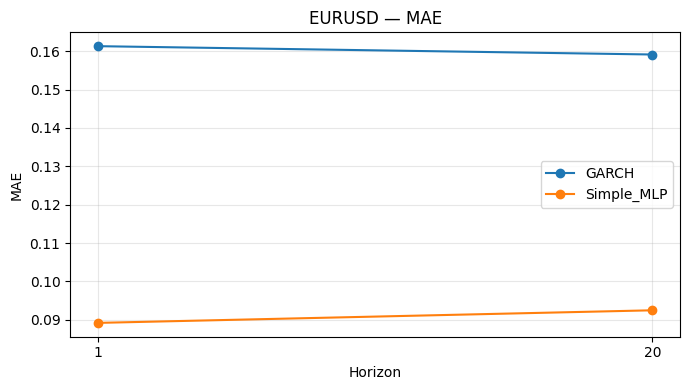

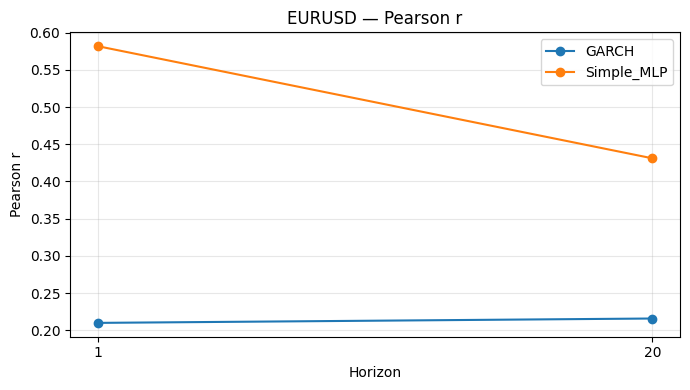

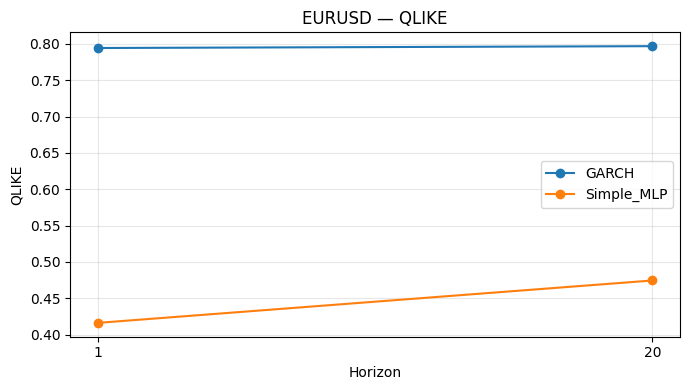

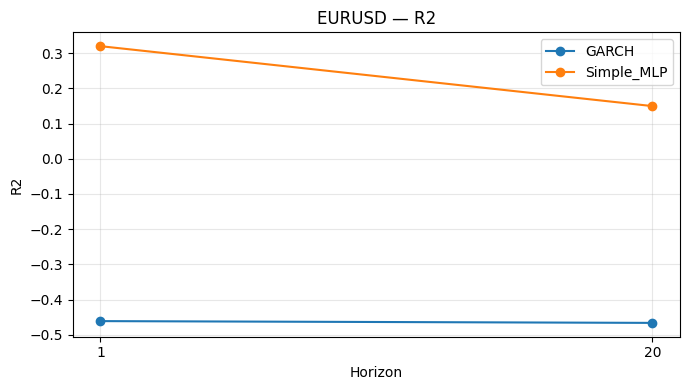

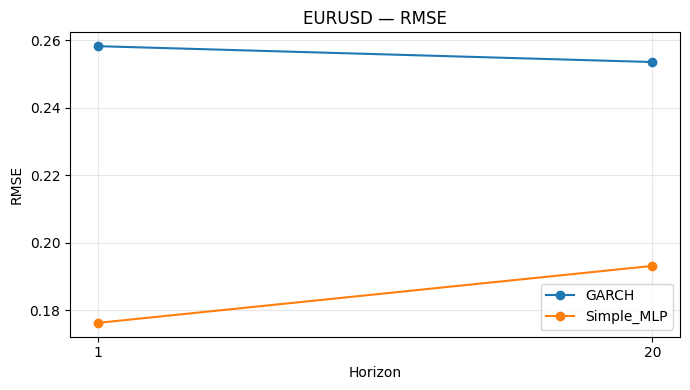

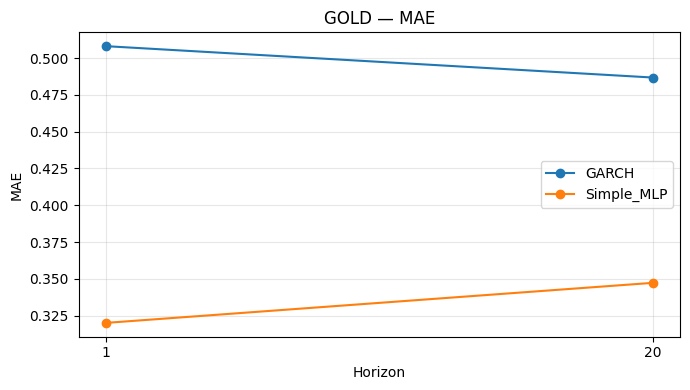

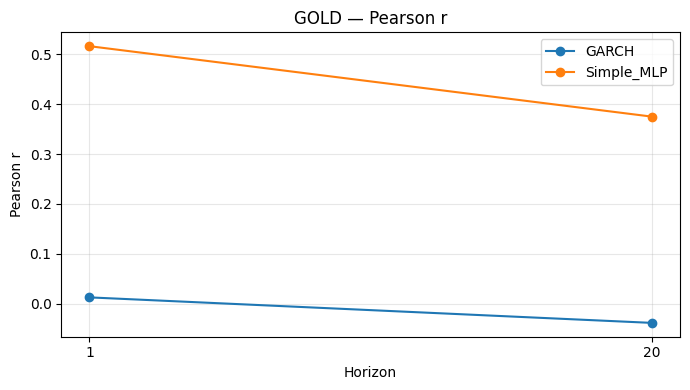

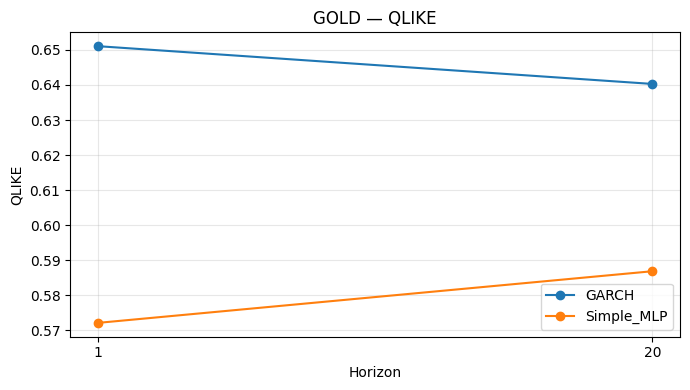

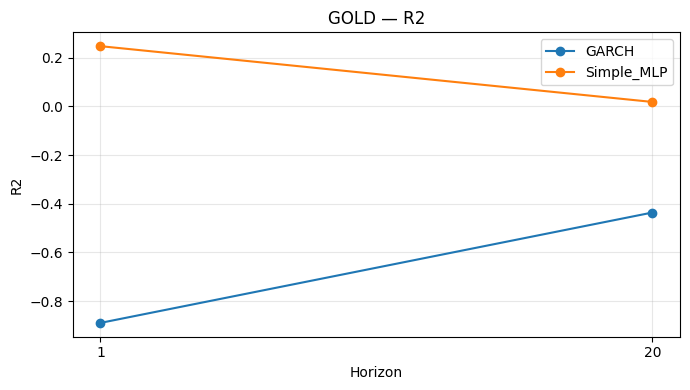

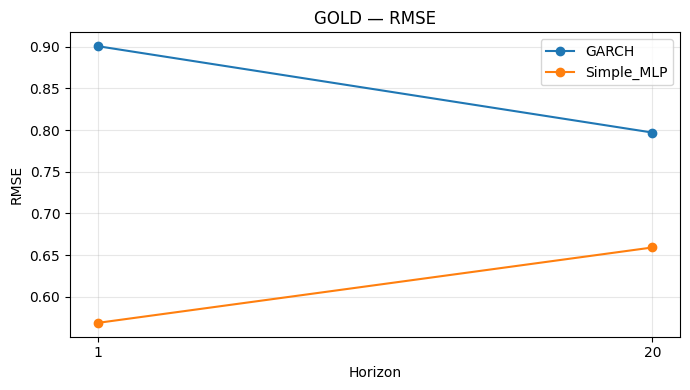

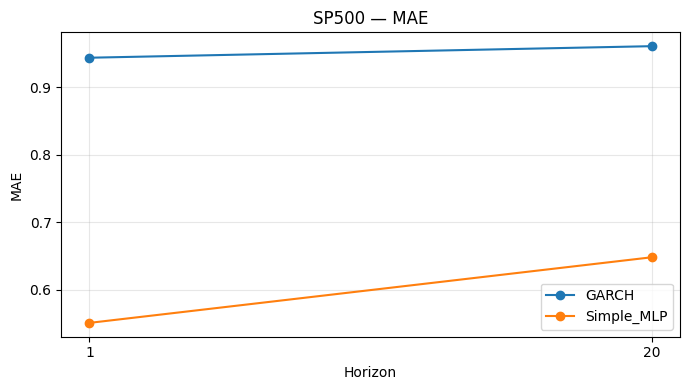

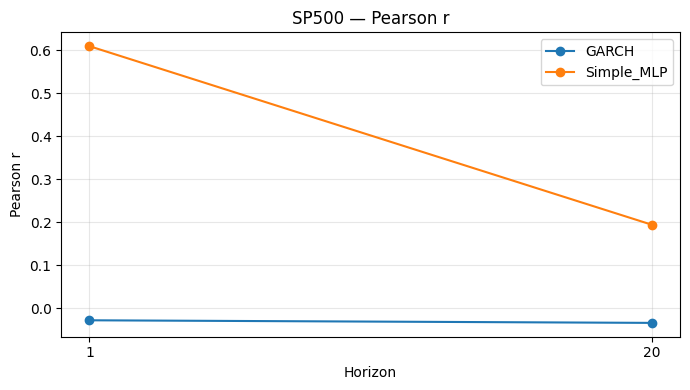

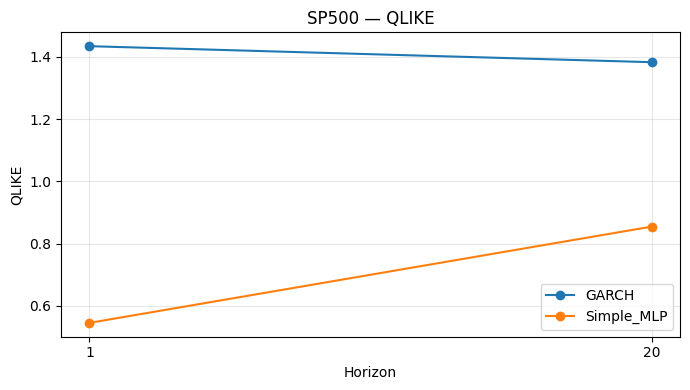

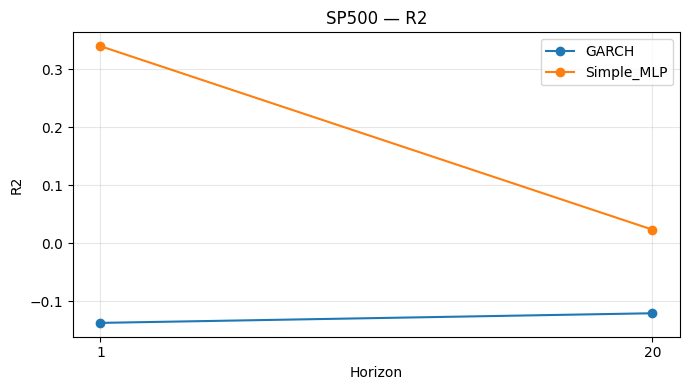

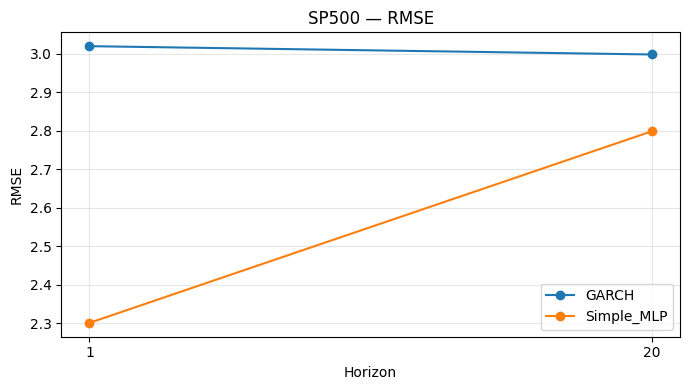

Saved 15 charts to plots/metrics


In [725]:

saved = plot_metric_vs_horizon(
    frames,
    tickers=None,          
    models=None,           
    metrics=None,         
    include_full=True,
    save_dir="plots/metrics",
    show=True
)
print("Saved", len(saved), "charts to plots/metrics")


## Plot of y and predicted y helpers

In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def _get_hdict(store, ticker, horizon=1):
    byH = store.get(ticker, {})
    if horizon in byH: return byH[horizon]
    k1 = str(horizon)
    if k1 in byH: return byH[k1]
    k2 = f"H{horizon}"
    if k2 in byH: return byH[k2]
    return {}

def _find_y_blob(payload):
    if isinstance(payload, dict) and "y_data" in payload:
        return payload["y_data"]
    return None

def _pick_full_step_y(y_blob):
    if y_blob is None:
        return None, None
    a = np.asarray(y_blob)
    if a.ndim != 3:
        if a.ndim == 2:
            if a.shape[1] >= 2: return a[:, 0], a[:, 1]
            if a.shape[1] == 1: return None, a[:, 0]
        elif a.ndim == 1:
            return None, a
        return None, None

    B, T, F = a.shape
    last = a[:, T-1, :]
    if F >= 2:
        return last[:, 0], last[:, 1]
    elif F == 1:
        return None, last[:, 0]
    return None, None

def plot_h1_full_from_results(
    results_store,
    tickers=None,
    models=None,
    save_dir=None,
    show=True,
    fig_size=(9, 4),
    dpi=150,
    verbose=True
):
    all_tickers = [t for t in results_store if _get_hdict(results_store, t, 1)]
    tickers = all_tickers if tickers is None else [t for t in tickers if t in all_tickers]

    if save_dir:
        os.makedirs(save_dir, exist_ok=True)

    saved = []
    for t in tickers:
        hdict = _get_hdict(results_store, t, 1)
        if not hdict:
            if verbose: print(f("[skip] {t}: no models at H=1"))
            continue

        model_names = list(hdict.keys()) if models is None else [m for m in models if m in hdict]

        y_true_ref = None
        preds = {}
        lens = []

        for m in model_names:
            y_blob = _find_y_blob(hdict[m])
            yt, yp = _pick_full_step_y(y_blob)
            if yt is not None:
                y_true_ref = yt
                lens.append(len(yt))
                break

        missing = []
        for m in model_names:
            y_blob = _find_y_blob(hdict[m])
            yt, yp = _pick_full_step_y(y_blob)
            if yp is not None and yp.size > 0:
                preds[m] = yp
                lens.append(len(yp))
            else:
                missing.append(m)
            if verbose:
                shape = None
                try: shape = np.asarray(y_blob).shape
                except: pass
                print(f"  [{t} H=1] {m}: blob_shape={shape}, "
                      f"yt={'ok' if yt is not None else 'none'}, "
                      f"yp={'ok' if yp is not None else 'none'}")

        if verbose:
            msg = f"[{t} H=1] actual=" + ("YES" if y_true_ref is not None else "NO")
            if missing: msg += " | no_pred=" + ",".join(missing)
            print(msg)

        if not preds and y_true_ref is None:
            if verbose: print(f"[skip] {t}: nothing to plot at H=1")
            continue

        L = min(lens) if lens else None
        if not L or L <= 0:
            if verbose: print(f"[skip] {t}: invalid lengths")
            continue

        series = {}
        if y_true_ref is not None and len(y_true_ref) >= L:
            series["Actual"] = y_true_ref[-L:]
        for m, yp in preds.items():
            if len(yp) >= L:
                series[f"{m}_pred"] = yp[-L:]

        df_head = pd.DataFrame(series)
        head_rows = min(50, len(df_head))
        print(f"\n[{t} H=1] Aligned series head (first {head_rows} of {len(df_head)} rows):")
      
        with pd.option_context("display.max_rows", 50, "display.width", 120):
            print(df_head.head(50).to_string(index=False, float_format=lambda v: f"{v:.6g}"))

        x = np.arange(L)
        plt.figure(figsize=fig_size)

        if "Actual" in series:
            plt.plot(x, series["Actual"], label="Actual (full)", linewidth=2)

        for m in model_names:
            key = f"{m}_pred"
            if key in series:
                plt.plot(x, series[key], '--', label=f"{m} pred (full)")

        plt.title(f"{t} — Horizon=1 (last step from y_data[..., 1])")
        plt.xlabel("Test index"); plt.ylabel("Value")
        plt.grid(True, alpha=0.3); plt.legend(loc="best"); plt.tight_layout()

        if save_dir:
            out = os.path.join(save_dir, f"{t}_H1_full_actual_vs_models.png")
            plt.savefig(out, dpi=dpi)
            saved.append(out)

        if show: plt.show()
        else: plt.close()

    return saved


## Actual y plots

  [EURUSD H=1] Simple_MLP: blob_shape=(757, 1, 2), yt=ok, yp=ok
  [EURUSD H=1] GARCH: blob_shape=(757, 1, 2), yt=ok, yp=ok
[EURUSD H=1] actual=YES

[EURUSD H=1] Aligned series head (first 50 of 757 rows):
    Actual  Simple_MLP_pred  GARCH_pred
  0.739859         0.456605    0.194402
  0.743822         0.439917    0.182659
   1.02363         0.293959    0.163768
 0.0199331        0.0373925    0.147496
   0.52303          0.51497    0.130205
  0.355217         0.449064    0.115887
  0.417086         0.470106    0.155131
  0.266624         0.591673    0.138263
  0.312901         0.575305    0.131967
0.00443731        0.0209627    0.119333
  0.261753         0.306895    0.108023
  0.788937         0.360136    0.102587
  0.598342         0.553496   0.0934497
  0.723261         0.476556   0.0969616
  0.341589         0.207176   0.0889363
 0.0137579        0.0302896   0.0826681
   0.29405         0.230426    0.108359
  0.513047         0.461021   0.0988499
  0.252839         0.565897    0.10

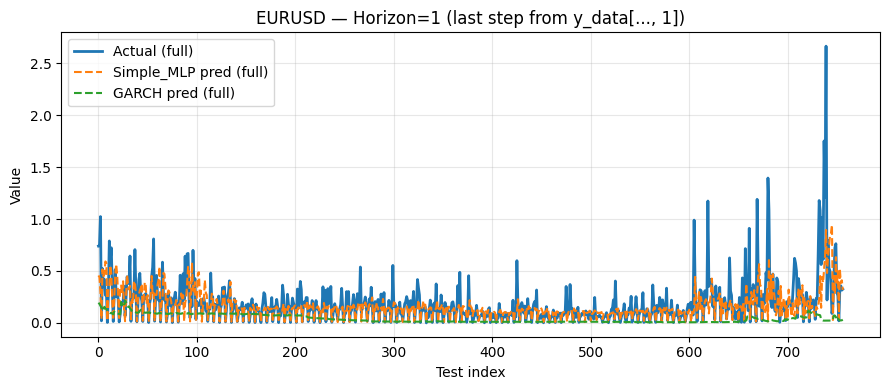

  [GOLD H=1] Simple_MLP: blob_shape=(1107, 1, 2), yt=ok, yp=ok
  [GOLD H=1] GARCH: blob_shape=(1107, 1, 2), yt=ok, yp=ok
[GOLD H=1] actual=YES

[GOLD H=1] Aligned series head (first 50 of 1107 rows):
   Actual  Simple_MLP_pred  GARCH_pred
 0.983207         0.340429    0.404734
0.0725466         0.475195     0.41204
 0.365228         0.153136    0.386377
 0.675363         0.445471    0.388799
  1.19577         0.713868    0.379988
 0.396614          1.24502    0.475619
 0.569428         0.501321    0.422518
0.0394832         0.532566    0.327936
 0.540289         0.543877    0.339051
 0.645375         0.715095    0.345618
 0.596069         0.919522    0.319951
 0.496734         0.646822    0.430255
 0.986594         0.271303     0.39405
0.0170706        0.0102254    0.317561
 0.388559         0.629708    0.318934
 0.616087         0.655644    0.332173
 0.603893         0.763518    0.327931
 0.739671         0.583307    0.429513
 0.832053         0.566336    0.361713
0.0110286        0.0

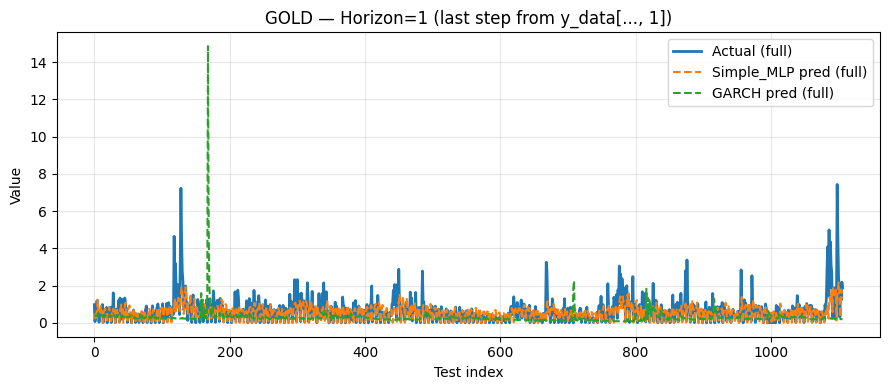

  [SP500 H=1] Simple_MLP: blob_shape=(694, 1, 2), yt=ok, yp=ok
  [SP500 H=1] GARCH: blob_shape=(694, 1, 2), yt=ok, yp=ok
[SP500 H=1] actual=YES

[SP500 H=1] Aligned series head (first 50 of 694 rows):
   Actual  Simple_MLP_pred  GARCH_pred
   1.0351          1.02346     2.38582
  1.03491          1.90407     2.27062
 0.818223          1.22392     2.22203
0.0217497         0.095521     2.64515
 0.502587         0.521083     2.22968
  2.13502          1.15246     2.12537
 0.903485          1.68215     2.31461
 0.898743         0.924198     2.09158
 0.904151          1.07291     2.48451
0.0405714        0.0543168     2.08508
 0.113815          0.41974     2.00842
  0.60793         0.676438     1.99926
  0.92855         0.553493      2.0014
 0.794209         0.416095     2.60646
 0.910428         0.233005     2.21111
0.0104435        0.0328714     2.03453
 0.610551         0.589967     2.30905
 0.532918         0.802979     2.05008
 0.832645         0.551246     2.22178
 0.902649         0

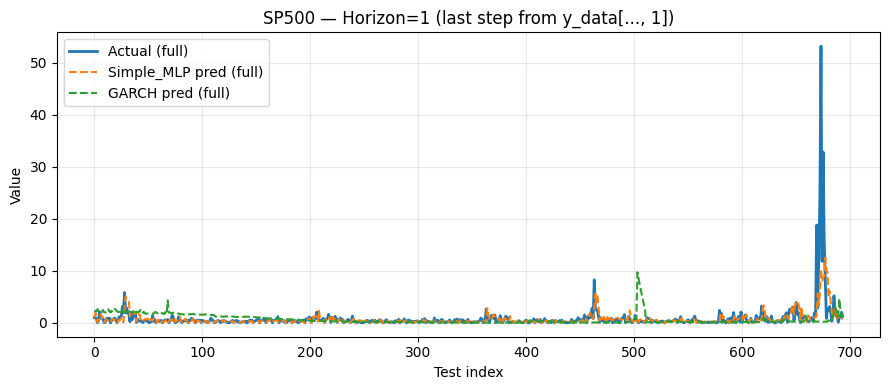

In [727]:

_ = plot_h1_full_from_results(
    results_store_test,
    tickers=None,
    models=None,                       
    save_dir="plots/h1_full",
    show=True,
    verbose=True
)


## Extract best parameters

In [136]:
from collections import Counter

def extract_best_params_global(results_store_subset, model_list):
    best = {}
    for model in model_list:
        seen = []
        for tkr, byH in results_store_subset.items():
            for H, byM in byH.items():
                if model in byM and "used_params" in byM[model]:
                    # freeze dict to hashable for counting
                    tup = tuple(sorted(byM[model]["used_params"].items()))
                    seen.append(tup)
        if seen:
            winner, _ = Counter(seen).most_common(1)[0]
            best[model] = dict(winner)
    return best


def extract_best_params_by_horizon(results_store_subset, model_list):
    out = {}
    for model in model_list:
        perH = {}
        # collect by horizon
        temp = {}
        for tkr, byH in results_store_subset.items():
            for H, byM in byH.items():
                if model in byM and "used_params" in byM[model]:
                    tup = tuple(sorted(byM[model]["used_params"].items()))
                    temp.setdefault(H, []).append(tup)
        for H, tuples in temp.items():
            if tuples:
                winner, _ = Counter(tuples).most_common(1)[0]
                perH[H] = dict(winner)
        if perH:
            out[model] = perH
    return out


def merge_fixed(FIXED_PARAMS, tuned_global):
    merged = {m: dict(FIXED_PARAMS[m]) for m in FIXED_PARAMS}
    for m, p in tuned_global.items():
        merged.setdefault(m, {})
        merged[m].update(p)
    return merged


def collect_final_params(results_store, *, fallback_to_model=True):
    params_by_model = {}
    for ticker, byH in results_store.items():
        for horizon, byM in byH.items():
            for model_name, payload in byM.items():

                params = payload.get("used_params")
                if (not params) and fallback_to_model:
                    mdl = payload.get("model")
                    if hasattr(mdl, "get_params"):
                        try:
                            params = mdl.get_params()
                        except Exception:
                            params = None

                if not params:
                    continue

                params_by_model.setdefault(model_name, {}) \
                               .setdefault(ticker, {})[horizon] = dict(params)
    return params_by_model


def print_final_params(params_by_model, *, sort_models=True, sort_tickers=True, sort_horizons=True):
    model_keys = sorted(params_by_model) if sort_models else params_by_model.keys()
    for model in model_keys:
        print(f"\n=== {model} ===")
        by_ticker = params_by_model[model]
        ticker_keys = sorted(by_ticker) if sort_tickers else by_ticker.keys()
        for tkr in ticker_keys:
            by_h = by_ticker[tkr]
            horizon_keys = sorted(by_h) if sort_horizons else by_h.keys()
            for H in horizon_keys:
                print(f"{tkr} | H={H}:")
                for k, v in sorted(by_h[H].items()):
                    print(f"  {k}: {v}")


def params_to_dataframe(params_by_model):
    import pandas as pd
    rows = []
    for model, by_t in params_by_model.items():
        for tkr, by_h in by_t.items():
            for H, params in by_h.items():
                row = {"model": model, "ticker": tkr, "horizon": H}
                row.update(params)
                rows.append(row)
    return pd.DataFrame(rows)


def filter_tuned_params(tuned: dict) -> dict:
    blacklist = {
        "no_tasks", "input_dim", "output_dim", "time_horizon",
        "merge_price_time", "flatten", "use_nested_cv", "single_holdout",
        "device", "verbose"
    }
    out = {}
    for model, params in tuned.items():
        out[model] = {k: v for k, v in params.items() if k not in blacklist}
    return out

# Results on 1 task models

In [137]:
load_data_object_8_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_8.pkl")

with open(load_data_object_8_file_path, "rb") as f:
    structured_data_dict_8 = pickle.load(f)

print("Data dictionary 8 loaded successfully.")

tickers  = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]


X_price_map, X_time_map, y_map = {}, {}, {}

missing = []
for t in tickers:
    if t not in structured_data_dict_8:
        missing.append(t)
        continue

    entry = structured_data_dict_8[t]

    Xp = entry.get("X_other", None)  
    Xt = entry.get("X_time",  None)
    Y  = entry.get("y",       None)

    if Xp is None or Y is None:
        print(f"[WARN] {t}: missing {'X_other' if Xp is None else ''}{' and ' if (Xp is None and Y is None) else ''}{'y' if Y is None else ''} → skipping.")
        continue

    Xp = np.asarray(Xp, dtype=float)
    Xt = None if Xt is None else np.asarray(Xt, dtype=float)
    Y  = np.asarray(Y,  dtype=float)

    
    if Xp.ndim != 3 or Y.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_other={Xp.shape}, y={Y.shape} → skipping.")
        continue
    if Xt is not None and Xt.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_time={Xt.shape} → setting to None.")
        Xt = None

    X_price_map[t] = Xp
    X_time_map[t]  = Xt
    y_map[t]       = Y

if missing:
    print(f"[INFO] Missing tickers in data dict (skipped): {missing}")

Data dictionary 8 loaded successfully.


In [ ]:
#models_to_tune = ["Simple_MLP", "Simple_KAN", "Simple_LSTM"]
models_to_tune = ["Simple_KAN"]
tune_tickers   = ["EURUSD"]
tune_horizons  = [20]

param_grid_tune = {
    "Simple_MLP": {
        "lr": [5e-4, 5e-3],
        "batch_size": [128, 512],
        "hidden_layers": [2, 4],
        "hidden_dim": [32, 64],
    },
    "Simple_KAN": {
        "lr": [5e-4, 5e-3],
        "batch_size": [128, 512],
        "knots": [10, 20],
        "spline_power": [5, 7],
        "hidden_dim": [32, 64],
        "hidden_layers": [2, 4],
    },
    
    "Simple_LSTM": {
        "lr": [5e-4, 5e-3],
        "batch_size": [16, 32],
    },
    "ITransformer": {
        "lr": [1e-6, 1e-5, 1e-4, 1e-3],
        "batch_size": [64, 256],
        "d_model": [64, 128],
        "d_ff": [128, 256],
        "n_heads": [4, 6],
        "e_layers": [2, 4],
    },
}

FIXED_PARAMS = {
    "Simple_MLP": dict(
        lr=5e-4, dropout=0.0, l2_weight=1e-5, batch_size=128, hidden_layers=3, hidden_dim=128,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "Simple_LSTM": dict(
        lr=5e-4, dropout=0.0, l2_weight=1e-5, batch_size=16, hidden_layers=3, hidden_dim=32,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "Simple_KAN": dict(
        lr=5e-4, dropout=0.0, l2_weight=1e-5, batch_size=128, hidden_layers=3, hidden_dim=128, knots=8, spline_power=5,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "ITransformer": dict(
        lr=1e-4, l2_weight=1e-5, batch_size=256, d_model=128, d_ff=256, n_heads=4, e_layers=2, dropout=0.0,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
}

MODEL_IO = {
    "Simple_MLP":   dict(merge_price_time=False, flatten=True),
    "Simple_KAN":   dict(merge_price_time=False, flatten=True),
    "Simple_LSTM":  dict(merge_price_time=False, flatten=False),
    "ITransformer": dict(merge_price_time=False, flatten=False),
}

COMMON = dict(
    use_nested_cv=False,     
    single_holdout=False,     
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    verbose=True,
    target_mode="log_mse"
)


MULTI_TASK_MODELS = set()


final_results_store = {}

TUNE_BASE_SAVE_DIR = os.path.join(root_folder, objects_relative_path, "tune_saved_object")
os.makedirs(TUNE_BASE_SAVE_DIR, exist_ok=True)

tune_store = run_all_models_for_all(
    tickers=tune_tickers,
    horizons=tune_horizons,
    model_list=models_to_tune,
    X_price_map=X_price_map,
    X_time_map=X_time_map,
    y_map=y_map,
    base_save_dir=TUNE_BASE_SAVE_DIR,
    fixed_params=FIXED_PARAMS,
    common_params=COMMON,
    model_io=MODEL_IO,
    multitask_models=MULTI_TASK_MODELS,
    param_grids=param_grid_tune,
    results_store=final_results_store,     
    overwrite=True,
    run_grid_with_single_holdout=True
    )


tuned_global = extract_best_params_global(tune_store, models_to_tune)


tuned_global_filtered = filter_tuned_params(tuned_global)
FIXED_PARAMS_MERGED = merge_fixed(FIXED_PARAMS, tuned_global_filtered)


final_tickers  = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]
#final_models   = ["Simple_MLP", "Simple_KAN", "Simple_LSTM", "ITransformer"]
final_models   = ["Simple_KAN"]
final_horizons = [1, 5, 10, 20]

FINAL_BASE_SAVE_DIR = os.path.join(root_folder, objects_relative_path, "final_results_saved_object")
os.makedirs(FINAL_BASE_SAVE_DIR, exist_ok=True)

_ = run_all_models_for_all(
    tickers=final_tickers,
    horizons=final_horizons,
    model_list=final_models,              
    X_price_map=X_price_map,
    X_time_map=X_time_map,
    y_map=y_map,
    base_save_dir=FINAL_BASE_SAVE_DIR,
    fixed_params=FIXED_PARAMS_MERGED,    
    common_params=COMMON,
    model_io=MODEL_IO,
    multitask_models=MULTI_TASK_MODELS,
    param_grids=None,                     
    results_store=final_results_store,    
    overwrite=True                       
)



=== EURUSD | H=20 | Simple_KAN (grid + single-holdout) | no_tasks=1 ===
[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 3782
Time steps for y: 20
Features for y: 1

Single holdout: one train/test split, param search on a single train/val (early-stop) split.
Using device: mps
Epoch 1: Train mse = 0.9958 | Val mse = 1.1893
Epoch 2: Train mse = 0.9590 | Val mse = 1.0539
Epoch 3: Train mse = 0.9110 | Val mse = 0.9542
Epoch 4: Train mse = 0.8786 | Val mse = 0.9305
Epoch 5: Train mse = 0.8502 | Val mse = 0.9000
Epoch 6: Train mse = 0.8155 | Val mse = 0.8489
Epoch 7: Train mse = 0.7548 | Val mse = 0.7776
Epoch 8: Train mse = 0.6818 | Val mse = 0.7141
Epoch 9: Train mse = 0.6113 | Val mse = 0.6568
Epoch 10: Train mse = 0.5528 | Val mse = 0.6156
Epoch 11: Train mse = 0.5004 | Val mse = 0.5631
Epoch 12: Train mse = 0.4478 | Val mse = 0.5243
Epoch 13: Train mse = 0.4025 | Val mse = 0.4747
Epoch 14: Train mse = 0.3654 | Val mse = 0.4442
Ep

In [ ]:
import os, pickle
from pathlib import Path
import numpy as np


load_path = Path(root_folder) / objects_relative_path / "structured_data_dict_10.pkl"
if not load_path.exists():
    raise FileNotFoundError(f"Pickle not found at: {load_path}")

with open(load_path, "rb") as f:
    structured_data_dict_10 = pickle.load(f)

print("Data dictionary 10 loaded successfully.")

tickers = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]

X10_price_map, X10_time_map, y10_map = {}, {}, {}
missing = []

for t in tickers:
    if t not in structured_data_dict_10:
        missing.append(t)
        continue

    entry = structured_data_dict_10[t]
    Xp10 = entry.get("X_other")  
    Xt10 = entry.get("X_time")   
    Y10  = entry.get("y")        

    if Xp10 is None or Y10 is None:
        print(f"[WARN] {t}: missing"
              f"{' X_other' if Xp10 is None else ''}"
              f"{' and y' if (Xp10 is None and Y10 is None) else (' y' if Y10 is None else '')} - skipping.")
        continue

    try:
        Xp10 = np.asarray(Xp10, dtype=float)
        Y10  = np.asarray(Y10,  dtype=float)
        Xt10 = None if Xt10 is None else np.asarray(Xt10, dtype=float)
    except Exception as e:
        print(f"[WARN] {t}: array conversion failed: {e} - skipping.")
        continue


    if Xp10.ndim != 3 or Y10.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_other={Xp10.shape}, y={Y10.shape} - skipping.")
        continue
    if Xp10.shape[0] != Y10.shape[0]:
        print(f"[WARN] {t}: X_other and y n_samples mismatch: {Xp10.shape[0]} vs {Y10.shape[0]} - skipping.")
        continue

    if Xt10 is not None:
        if Xt10.ndim != 3:
            print(f"[WARN] {t}: unexpected dims X_time={Xt10.shape} - setting to None.")
            Xt10 = None
        elif Xt10.shape[0] != Xp10.shape[0]:
            print(f"[WARN] {t}: X_time n_samples mismatch: {Xt10.shape[0]} vs {Xp10.shape[0]} - setting to None.")
            Xt10 = None

    X10_price_map[t] = Xp10
    X10_time_map[t]  = Xt10
    y10_map[t]       = Y10

if missing:
    print(f"[INFO] Missing tickers in data dict (skipped): {missing}")
print(f"[INFO] Loaded tickers: {list(X10_price_map.keys())}")


y = y10_map.get("AAPL")
print("AAPL y shape:", None if y is None else y.shape)


Data dictionary 10 loaded successfully.
[INFO] Loaded tickers: ['AAPL', 'MSFT', 'GE', 'BAC', 'C', 'BTCUSDT', 'EURUSD', 'GOLD', 'SP500']
AAPL y shape: (2018, 60, 2)


In [151]:

final_tickers  = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]
final_models   = ["ITransformer"]
final_horizons = [1, 5, 10, 20]

MULTI_TASK_MODELS = {"ITransformer"}

_ = run_all_models_for_all(
    tickers=final_tickers,
    horizons=final_horizons,
    model_list=final_models,              
    X_price_map=X10_price_map,
    X_time_map=X10_time_map,
    y_map=y10_map,
    base_save_dir=FINAL_BASE_SAVE_DIR,
    fixed_params=FIXED_PARAMS_MERGED,    
    common_params=COMMON,
    model_io=MODEL_IO,
    multitask_models=MULTI_TASK_MODELS,
    param_grids=None,                     
    results_store=final_results_store,    
    overwrite=True                       
)



=== AAPL | H=1 | ITransformer (simple fit) | no_tasks=2 ===
[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
[ITransformerWrapper] Using device: mps
Batch size for y: 2018
Time steps for y: 1
Features for y: 2

Starting training without CV:
Checking X_price_train_core:
Shape: (1453, 60, 2)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  38.099874372714034
  Min value:  -33.2571324878827
Checking X_time_train_core:
Shape: (1453, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.481940465687973
  Min value:  -1.800915059933457
Checking y_train_core (log_mse scaled):
Shape: (1453, 1, 2)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.133266415235102
  Min v

In [153]:

final_tickers  = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]
final_models   = ["Simple_MLP", "Simple_KAN", "Simple_LSTM", "ITransformer"]
final_horizons = [1, 5, 10, 20]


all_results = run_garch_over_dict(
    structured_data_dict=structured_data_dict_10,
    tickers=final_tickers,
    horizons=final_horizons,
    results_dict=final_results_store,
    anchor_step=59,
    anchor_feature_idx=1,
    y_feature_idx=1,
    split_ratio=0.8,
    roll_window=500,
    mean_mode="Zero",
    candidates=[("GARCH", 1, 1, "t")],  
    sim_paths=2000,                        
    metric_horizons=(1, 5, 10, 20,-1),
    verbose=True,
    save_dir=None
)


[GARCH] AAPL — H=1 (step=59, x_feat=1, y_feat=1)
[vol rolling] B=2018, split=0.8 -> n_train=1614, t0=1613, anchors=405, H=1, roll_window=500
  anchor 1613/2017: sd=1.87362, h1_pred=2.38816
  anchor 1694/2017: sd=1.83036, h1_pred=0.971728
  anchor 1775/2017: sd=1.75437, h1_pred=1.87798
  anchor 1856/2017: sd=1.63043, h1_pred=2.47048
  anchor 1937/2017: sd=1.36801, h1_pred=1.3947

[metrics — vol rolling (ML-aligned split)]

1 day(s)
MAE       : 2.244934
RMSE      : 3.204341
R2        : -2.334505
Pearson r : 0.037045
QLIKE     : 7.146105

full horizon
MAE       : 2.244934
RMSE      : 3.204341
R2        : -2.334505
Pearson r : 0.037045
QLIKE     : 7.146105

[GARCH] AAPL — H=5 (step=59, x_feat=1, y_feat=1)
[vol rolling] B=2018, split=0.8 -> n_train=1614, t0=1613, anchors=405, H=5, roll_window=500
  anchor 1613/2017: sd=1.87362, h1_pred=2.38816
  anchor 1694/2017: sd=1.83036, h1_pred=0.971728
  anchor 1775/2017: sd=1.75437, h1_pred=1.87798
  anchor 1856/2017: sd=1.63043, h1_pred=2.47048
  a

In [160]:
final_frames = build_metric_frames(final_results_store, outer_horizon="full", pretty_print=True)


=== EURUSD | GARCH | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        0.349073  0.349318  0.351075  0.354225
Pearson r  0.053204  0.040456  0.022274  0.010490
QLIKE      7.951148  7.965275  7.985322  7.998339
R2        -0.233381 -0.243071 -0.257742 -0.270650
RMSE       0.465803  0.466015  0.468390  0.471626

=== EURUSD | ITransformer | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        0.107403  0.110138  0.112221  0.114818
Pearson r  0.397039  0.357847  0.322897  0.283393
QLIKE      0.407426  0.439176  0.463336  0.486015
R2         0.004401 -0.018628 -0.058046 -0.083348
RMSE       0.213172  0.213587  0.216649  0.217942

=== EURUSD | Simple_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        0.084093  0.090159  0.094697  0.099880
Pearson r  0

In [161]:
import os
os.makedirs("results", exist_ok=True)


export_metrics(final_results_store, "results/metrics_1_task_all.csv", outer_horizon="full")
export_metrics(final_results_store, "results/metrics_1_task_all.txt", outer_horizon="full")

{'mode': 'text',
 'path': '/Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/results/metrics_1_task_all.txt',
 'sections': 45}

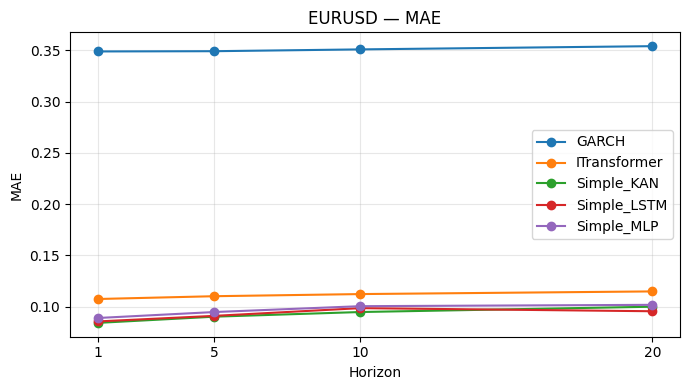

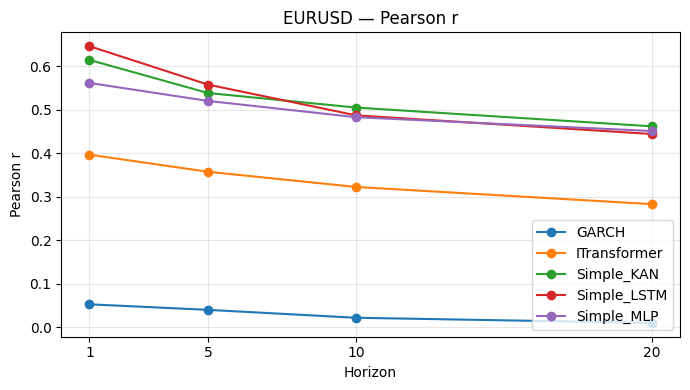

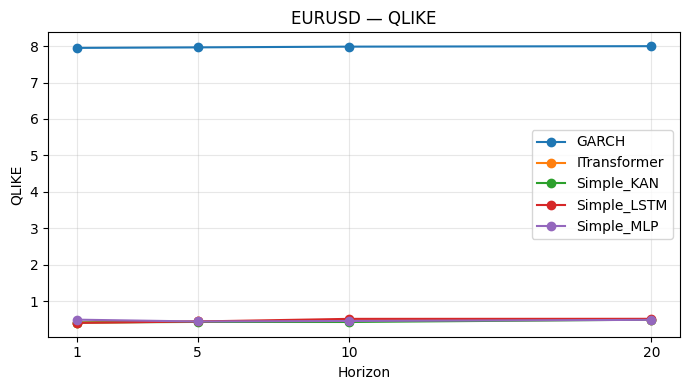

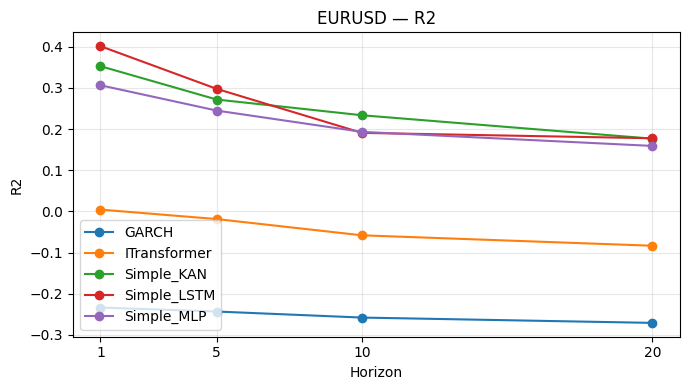

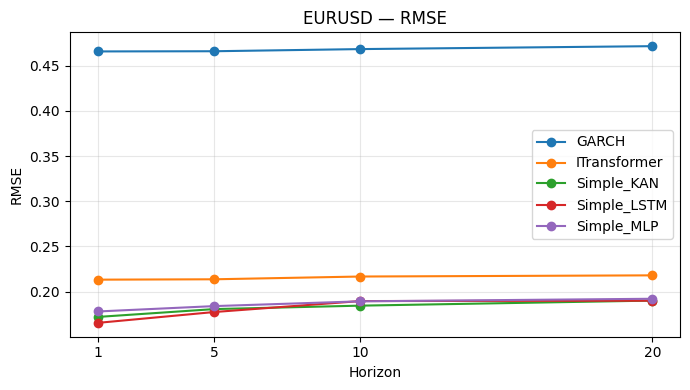

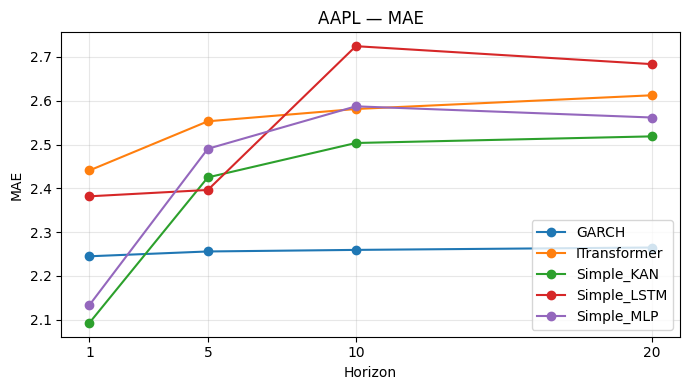

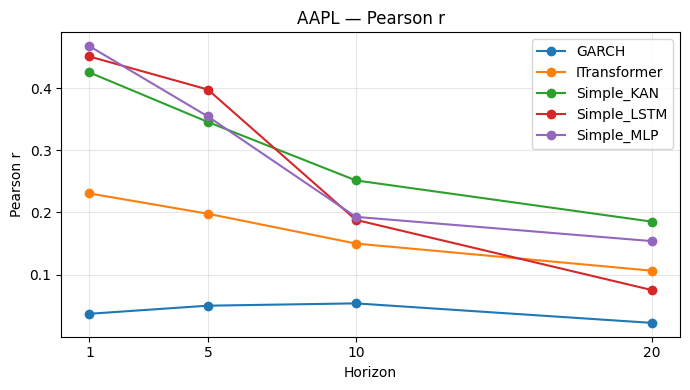

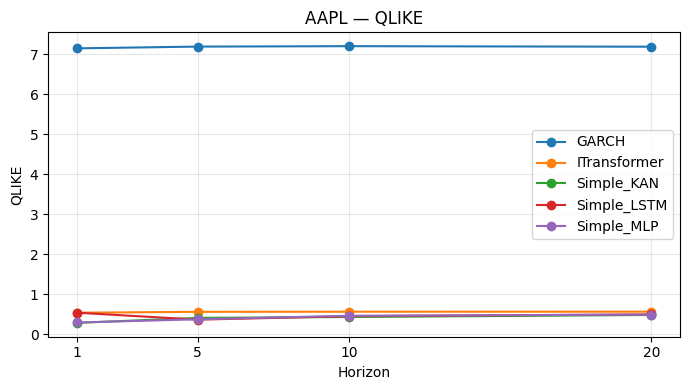

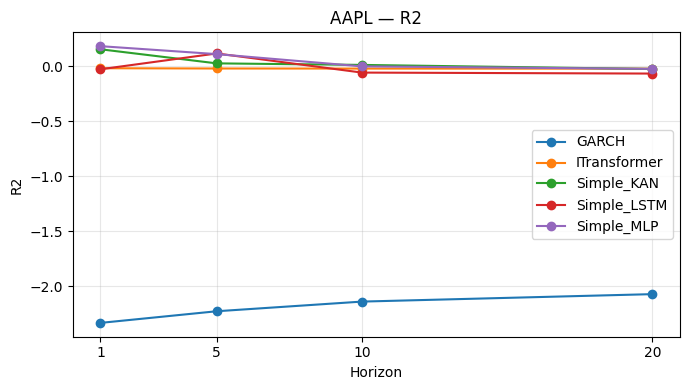

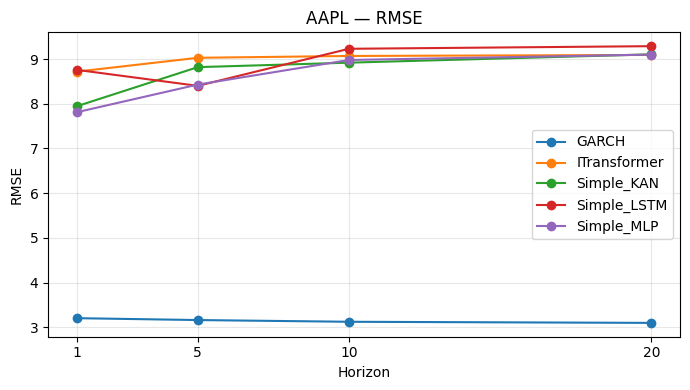

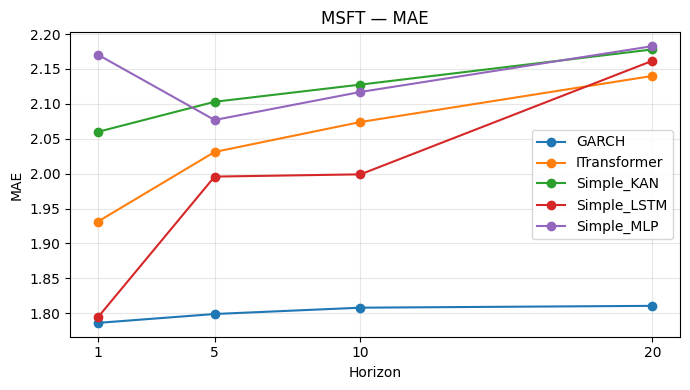

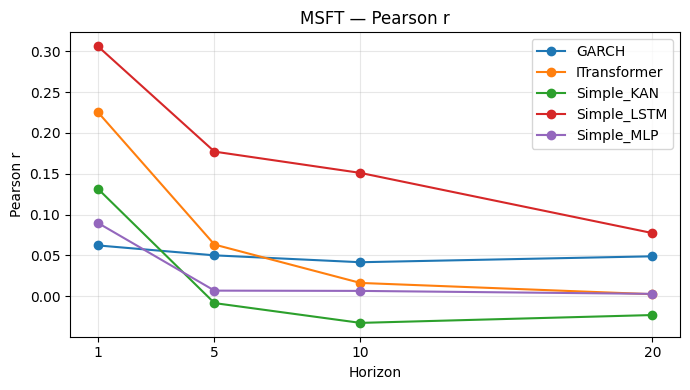

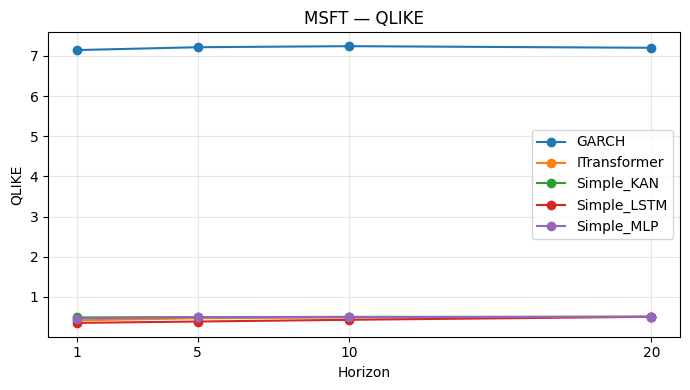

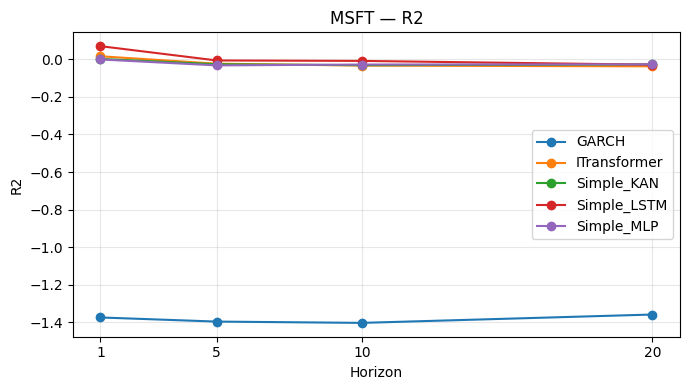

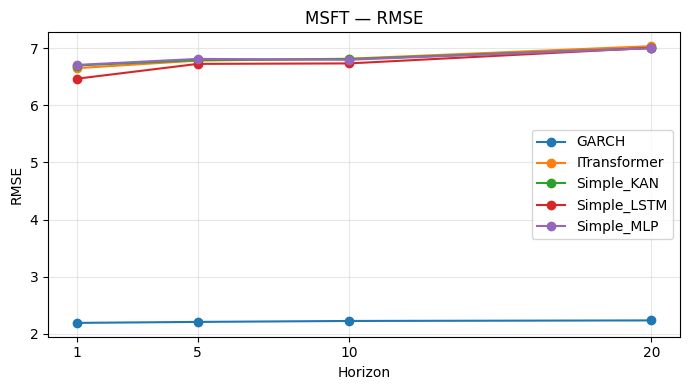

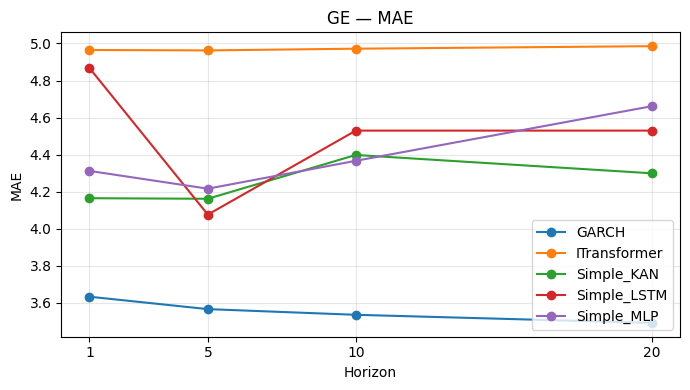

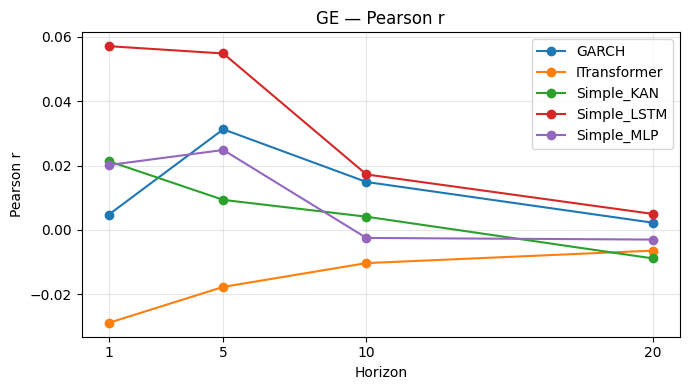

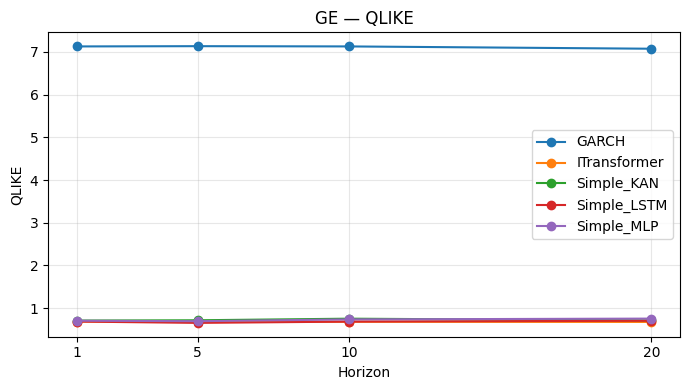

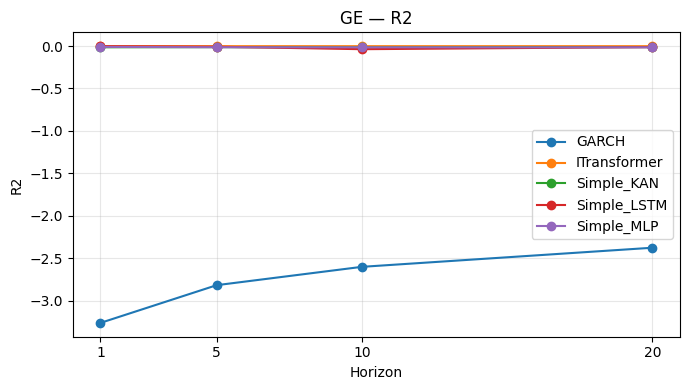

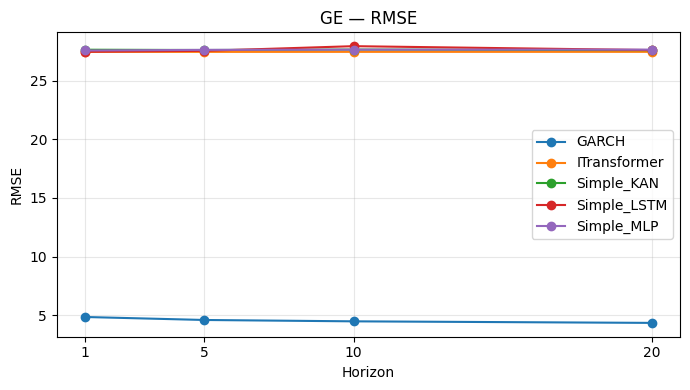

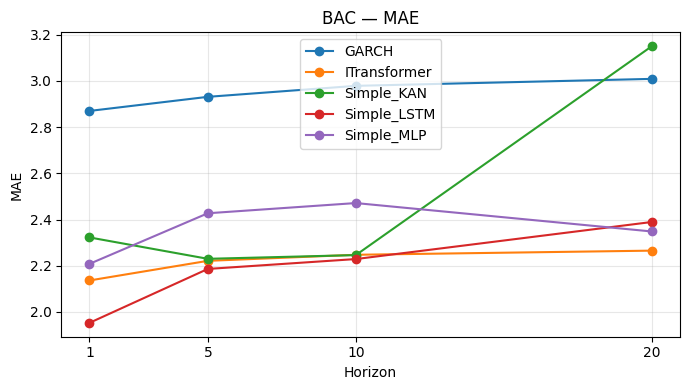

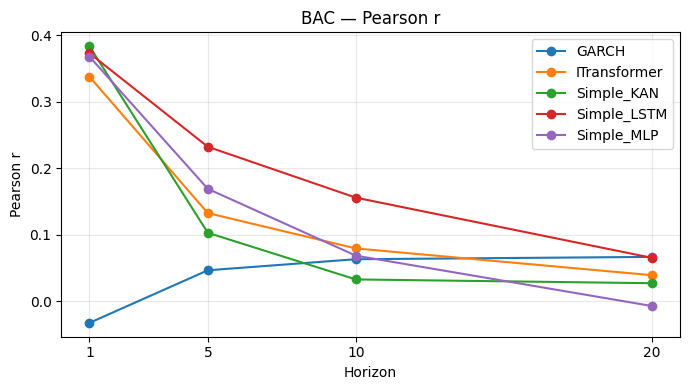

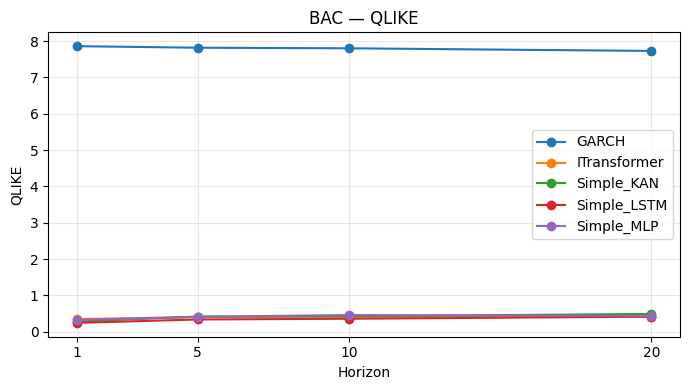

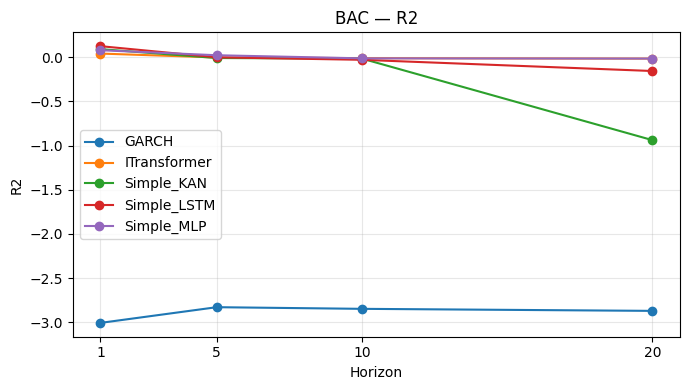

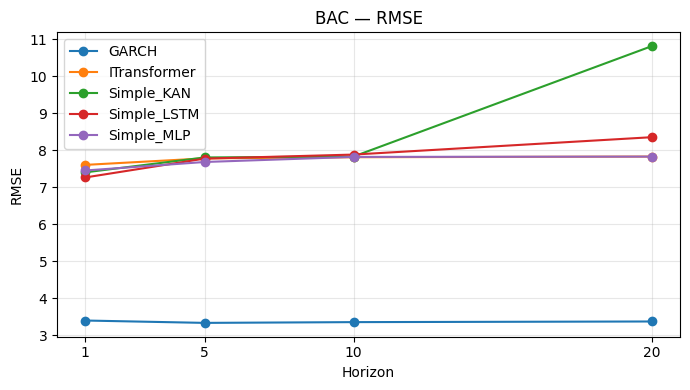

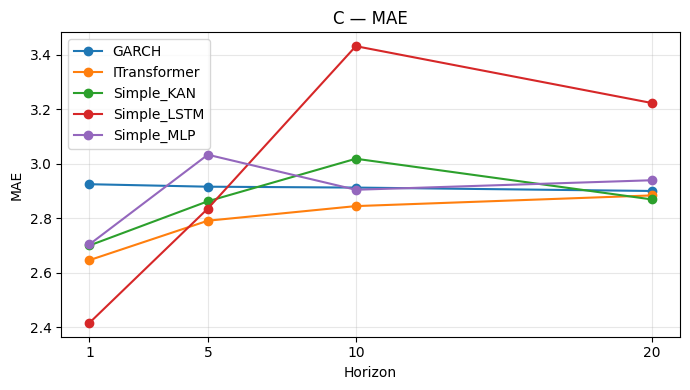

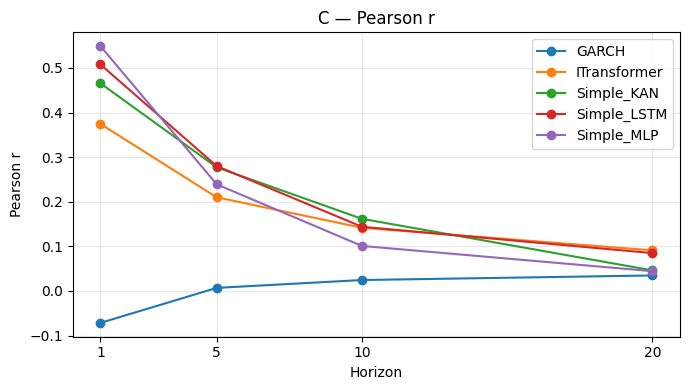

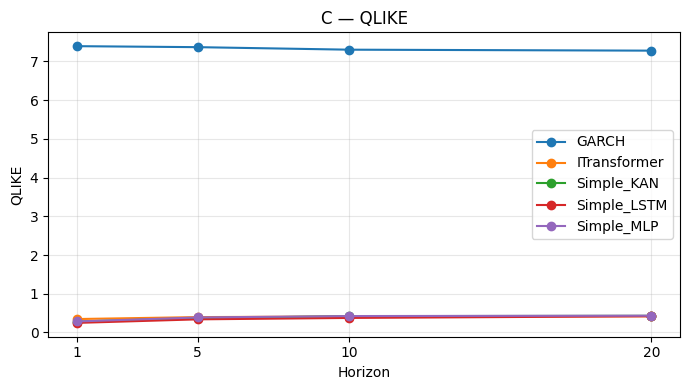

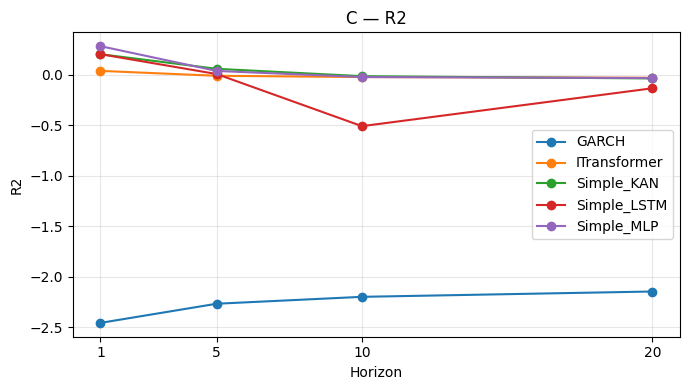

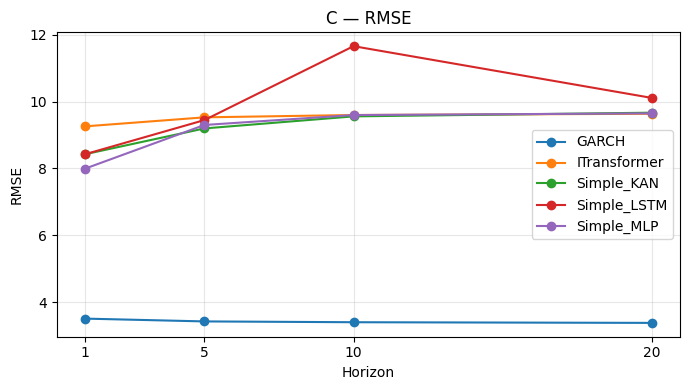

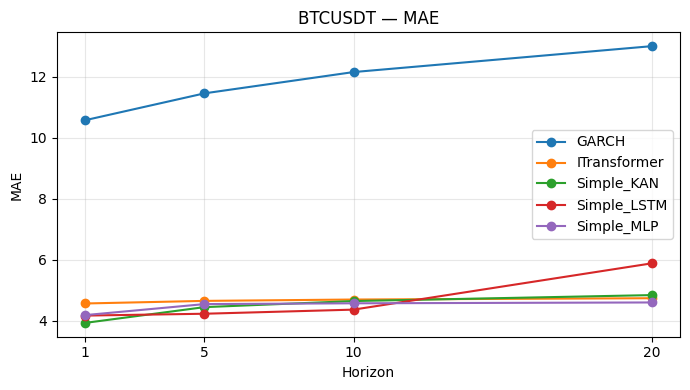

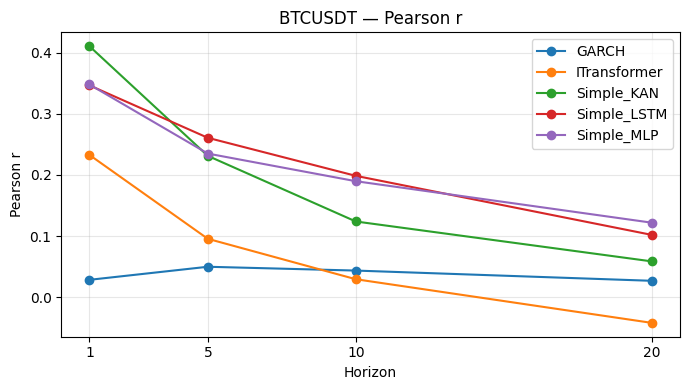

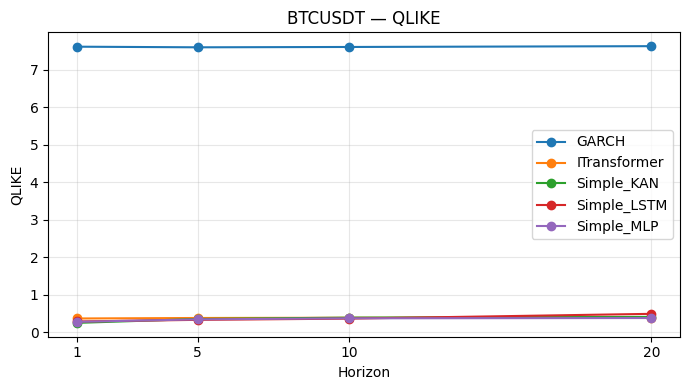

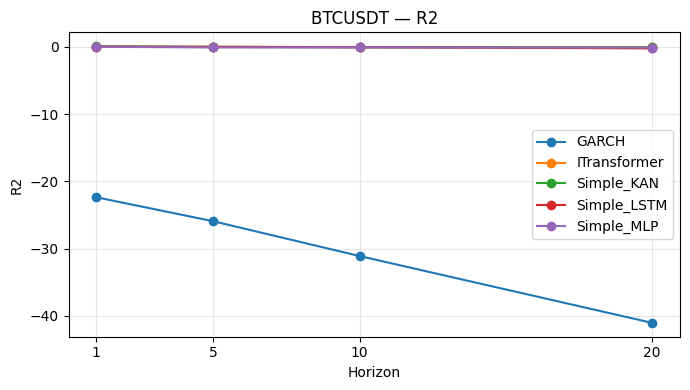

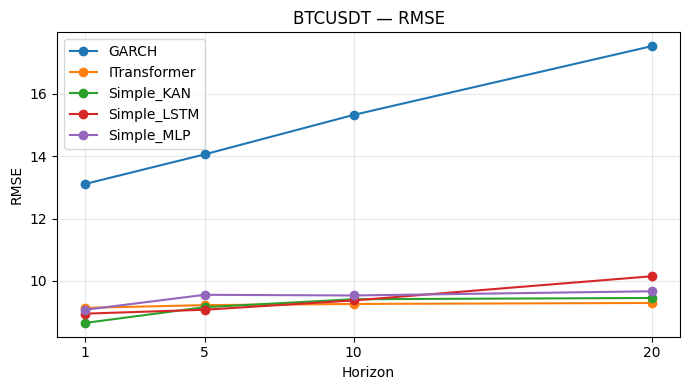

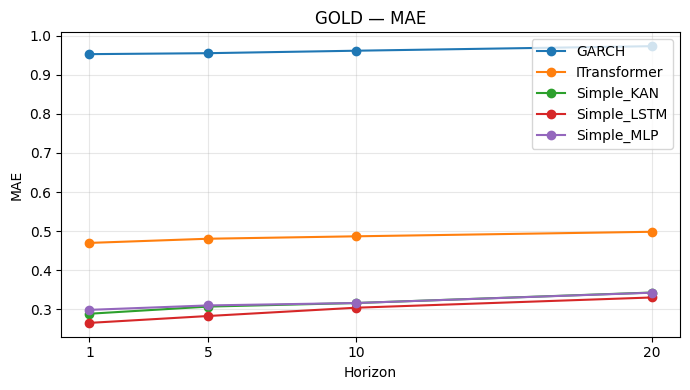

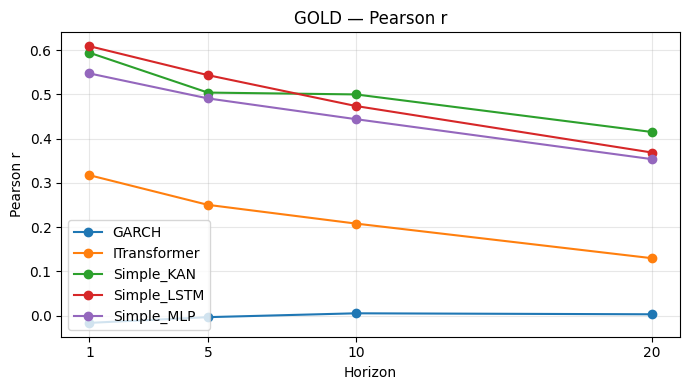

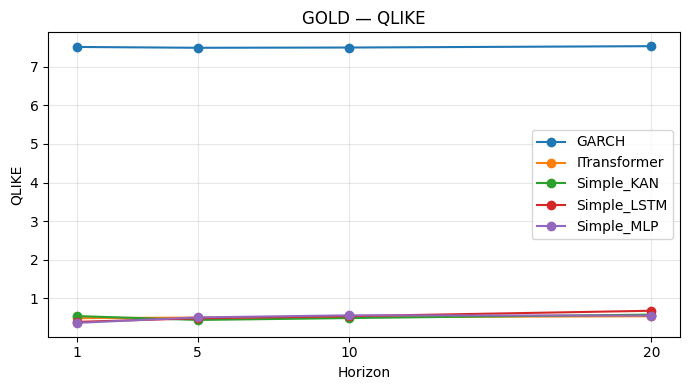

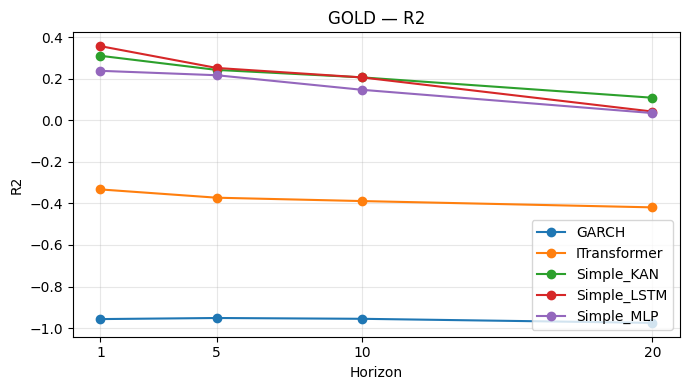

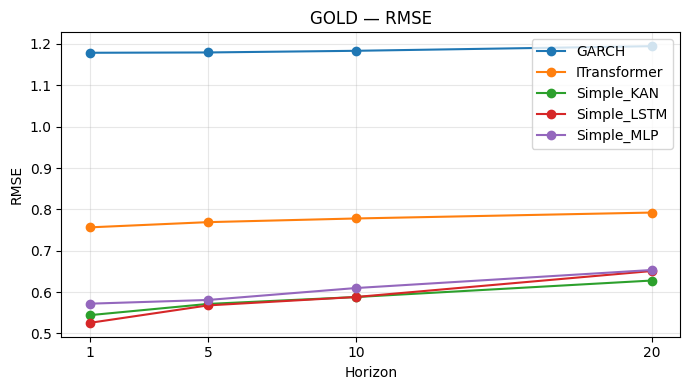

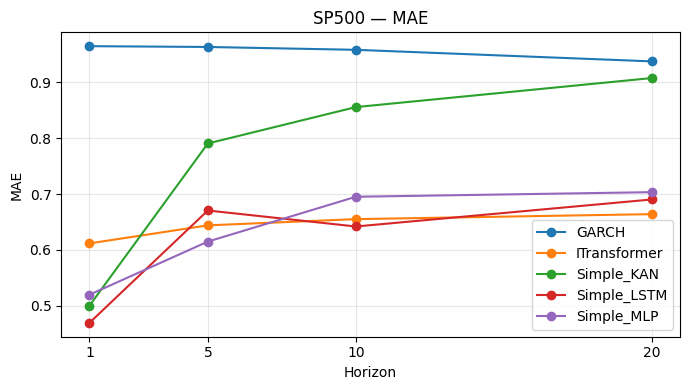

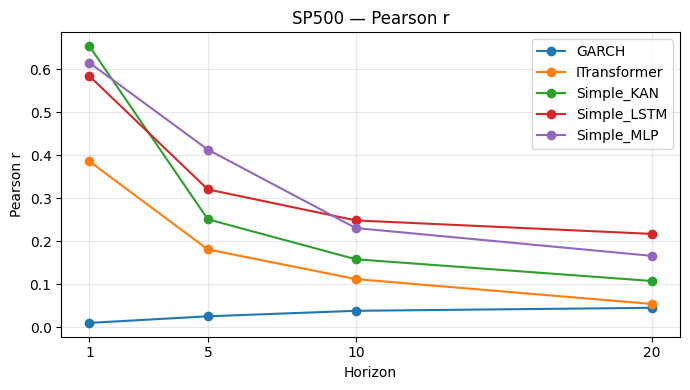

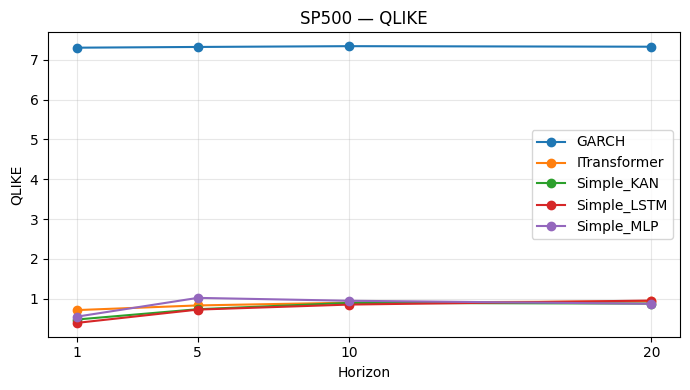

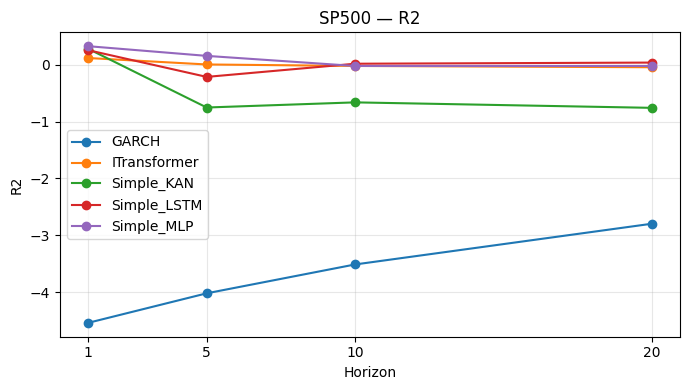

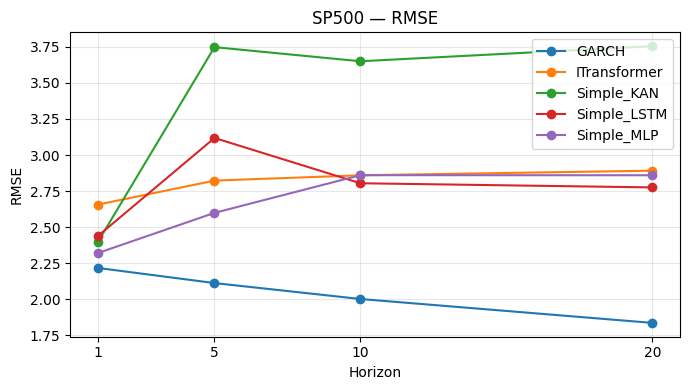

Saved 45 charts to plots/task_1
  [EURUSD H=1] Simple_MLP: blob_shape=(757, 1, 2), yt=ok, yp=ok
  [EURUSD H=1] Simple_KAN: blob_shape=(757, 1, 2), yt=ok, yp=ok
  [EURUSD H=1] Simple_LSTM: blob_shape=(757, 1, 2), yt=ok, yp=ok
  [EURUSD H=1] ITransformer: blob_shape=(757, 1, 2), yt=ok, yp=ok
  [EURUSD H=1] GARCH: blob_shape=(758, 1, 2), yt=ok, yp=ok
[EURUSD H=1] actual=YES

[EURUSD H=1] Aligned series head (first 50 of 757 rows):
    Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
  0.739859         0.344704         0.392549          0.597757           0.947548    0.527567
  0.743822         0.445781         0.437255          0.740661           0.599173     0.54225
   1.02363         0.450836         0.505398          0.705366           0.333677    0.560192
 0.0199331         0.024966        0.0334082         0.0312601          0.0533302    0.542041
   0.52303         0.357369         0.462449          0.454133            1.39534    0.523388
  0.

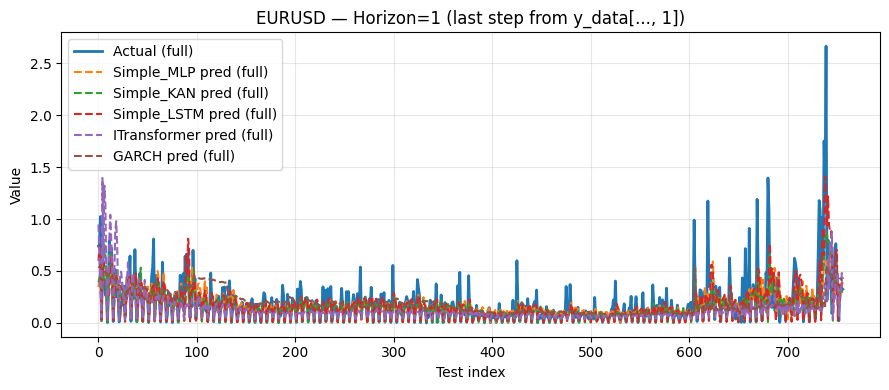

  [AAPL H=1] Simple_MLP: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [AAPL H=1] Simple_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [AAPL H=1] Simple_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [AAPL H=1] ITransformer: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [AAPL H=1] GARCH: blob_shape=(405, 1, 2), yt=ok, yp=ok
[AAPL H=1] actual=YES

[AAPL H=1] Aligned series head (first 50 of 404 rows):
  Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
0.934885          1.31932          1.18825           2.16446            2.42068     2.25613
 1.65221          1.36129          1.17478           2.16442            2.42399     2.18043
 3.00982          1.35182          1.22232           2.16444            2.42258     2.06684
 7.17364          1.39072          1.41241           2.16458            2.42461     2.73913
 2.32415          2.30522          2.51576           2.16505            2.42585     3.17974
  1.8112          2.01698          1.96311           2.16512  

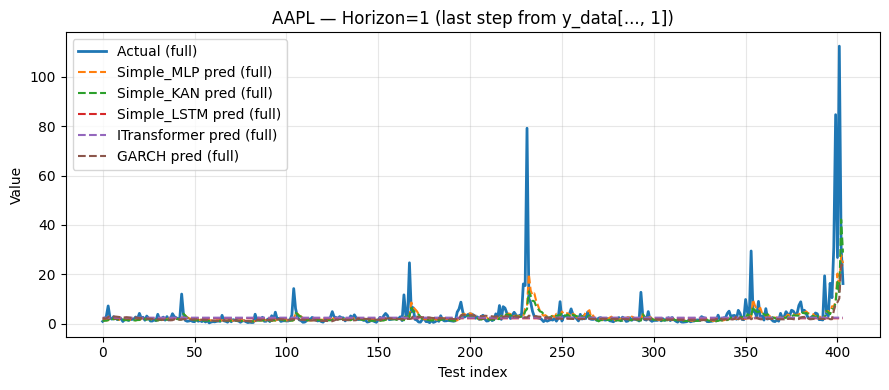

  [MSFT H=1] Simple_MLP: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [MSFT H=1] Simple_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [MSFT H=1] Simple_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [MSFT H=1] ITransformer: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [MSFT H=1] GARCH: blob_shape=(405, 1, 2), yt=ok, yp=ok
[MSFT H=1] actual=YES

[MSFT H=1] Aligned series head (first 50 of 404 rows):
 Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
1.62646          1.73961          1.93734           1.66613            2.11871     2.67696
1.38102          2.43071           1.8169           1.89004            1.99044     2.58327
1.45815          1.59753          1.95379           1.72952            1.86909     2.57634
1.91787          1.84023          1.74501           1.84685            1.95442     2.48749
1.81463          2.68787          2.21117           2.05102            1.98984     2.42536
1.90777          2.19743          1.95498           2.09034         

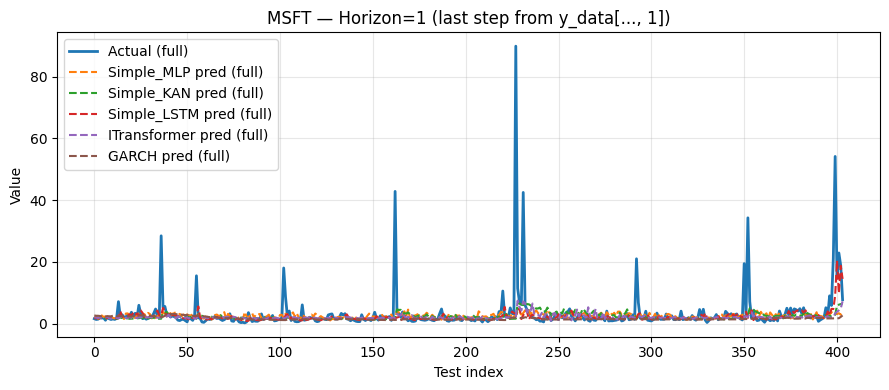

  [GE H=1] Simple_MLP: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [GE H=1] Simple_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [GE H=1] Simple_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [GE H=1] ITransformer: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [GE H=1] GARCH: blob_shape=(405, 1, 2), yt=ok, yp=ok
[GE H=1] actual=YES

[GE H=1] Aligned series head (first 50 of 404 rows):
  Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
  1.5135           2.5157          1.82701           4.74426            4.90177     3.49396
 1.72313          2.55159          1.85295           4.74426            4.90144     3.41691
 1.67254          2.35463          1.80839           4.74426            4.88897     3.39128
 1.66078          2.33543          1.82691           4.74426            4.90376     3.28505
0.769403          2.43806           1.8188           4.74426            4.89402      3.2313
 1.04217          2.46612          1.78896           4.74426             4.8

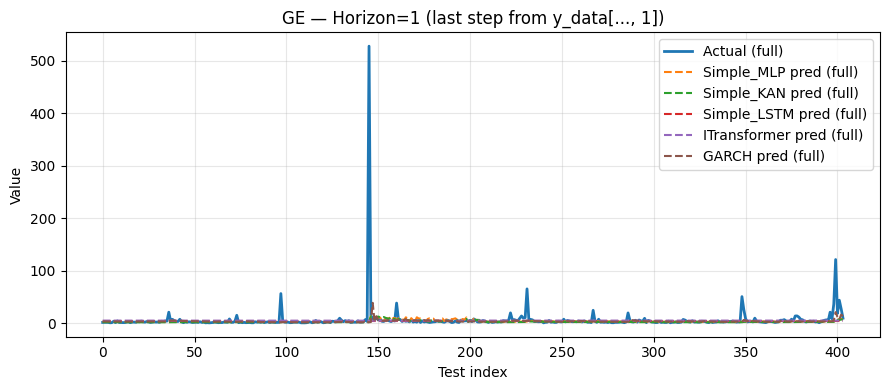

  [BAC H=1] Simple_MLP: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [BAC H=1] Simple_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [BAC H=1] Simple_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [BAC H=1] ITransformer: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [BAC H=1] GARCH: blob_shape=(405, 1, 2), yt=ok, yp=ok
[BAC H=1] actual=YES

[BAC H=1] Aligned series head (first 50 of 404 rows):
 Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
2.28991          2.02336          1.73527            1.5972            2.44942     2.73077
2.58025          2.06892          2.12154           2.11232            2.49127     2.75432
1.43685          2.04514          1.95678           2.30313            2.67354     2.74301
1.40532          2.01722           2.1163           1.78249            2.45183     2.65866
1.62484          1.94887          1.56064           1.74315            2.44583     2.61076
2.44658          2.07675          1.89847           1.82515            2.40

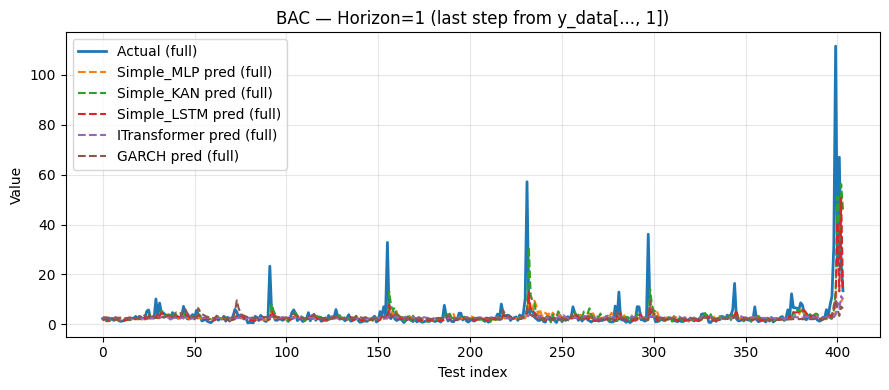

  [C H=1] Simple_MLP: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [C H=1] Simple_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [C H=1] Simple_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [C H=1] ITransformer: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [C H=1] GARCH: blob_shape=(405, 1, 2), yt=ok, yp=ok
[C H=1] actual=YES

[C H=1] Aligned series head (first 50 of 404 rows):
 Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
 1.4361          2.05949          1.81032           1.77662            2.85181     2.58234
 2.4089          2.13617          1.73451            1.8528            2.72087     2.58922
1.70682          1.97474          1.85658           2.10131             2.7283     2.54011
 1.3802          2.03162          1.93442           1.95772            2.53394     2.46833
1.42651           1.8034          1.69791           1.86546            2.74602     2.61937
2.28623          1.60093          1.68659           1.86196            2.66537     2.5198

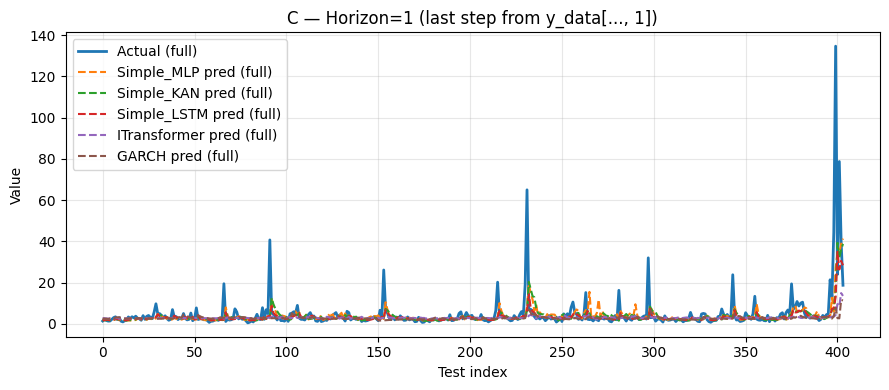

  [BTCUSDT H=1] Simple_MLP: blob_shape=(480, 1, 2), yt=ok, yp=ok
  [BTCUSDT H=1] Simple_KAN: blob_shape=(480, 1, 2), yt=ok, yp=ok
  [BTCUSDT H=1] Simple_LSTM: blob_shape=(480, 1, 2), yt=ok, yp=ok
  [BTCUSDT H=1] ITransformer: blob_shape=(480, 1, 2), yt=ok, yp=ok
  [BTCUSDT H=1] GARCH: blob_shape=(481, 1, 2), yt=ok, yp=ok
[BTCUSDT H=1] actual=YES

[BTCUSDT H=1] Aligned series head (first 50 of 480 rows):
  Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
 6.92748          4.22565          4.10645           5.10271            6.41839     15.4974
 1.26781          2.53354          2.39846           5.22677            6.85443     8.51014
0.752504          1.78268          1.95099           3.08665            6.33748     7.38625
 10.0004          1.94661          4.10667           2.65069            6.29678     6.29784
 8.45084          6.71705          10.4203           6.45995            7.01173     25.0203
 5.32244          4.95906           7.340

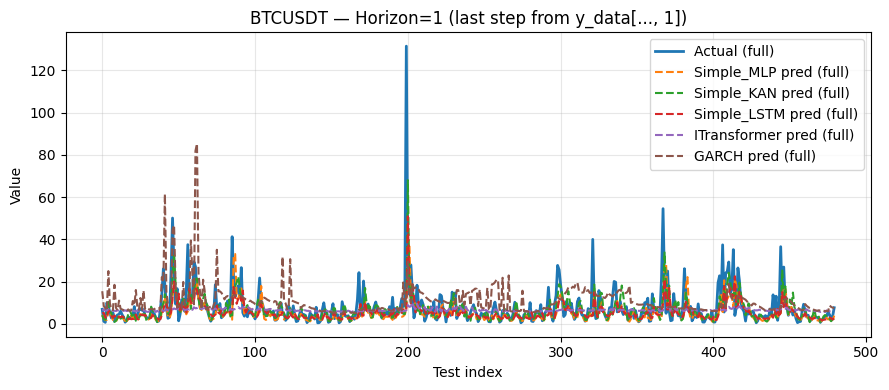

  [GOLD H=1] Simple_MLP: blob_shape=(1107, 1, 2), yt=ok, yp=ok
  [GOLD H=1] Simple_KAN: blob_shape=(1107, 1, 2), yt=ok, yp=ok
  [GOLD H=1] Simple_LSTM: blob_shape=(1107, 1, 2), yt=ok, yp=ok
  [GOLD H=1] ITransformer: blob_shape=(1107, 1, 2), yt=ok, yp=ok
  [GOLD H=1] GARCH: blob_shape=(1108, 1, 2), yt=ok, yp=ok
[GOLD H=1] actual=YES

[GOLD H=1] Aligned series head (first 50 of 1107 rows):
   Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
 0.983207         0.422219          0.23986          0.571752           0.208339    0.685881
0.0725466         0.431938        0.0207378         0.0498391           0.236039    0.680604
 0.365228         0.428538         0.378341          0.539055           0.180121    0.658805
 0.675363         0.604657         0.674003          0.596529           0.242638    0.639727
  1.19577         0.382046         0.752431           0.74542           0.165433    0.638002
 0.396614         0.619541         0.533796       

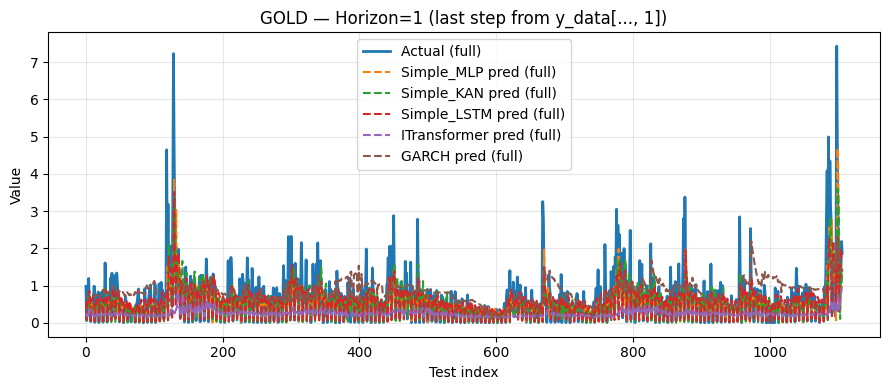

  [SP500 H=1] Simple_MLP: blob_shape=(694, 1, 2), yt=ok, yp=ok
  [SP500 H=1] Simple_KAN: blob_shape=(694, 1, 2), yt=ok, yp=ok
  [SP500 H=1] Simple_LSTM: blob_shape=(694, 1, 2), yt=ok, yp=ok
  [SP500 H=1] ITransformer: blob_shape=(694, 1, 2), yt=ok, yp=ok
  [SP500 H=1] GARCH: blob_shape=(695, 1, 2), yt=ok, yp=ok
[SP500 H=1] actual=YES

[SP500 H=1] Aligned series head (first 50 of 694 rows):
   Actual  Simple_MLP_pred  Simple_KAN_pred  Simple_LSTM_pred  ITransformer_pred  GARCH_pred
   1.0351          1.09275          1.18393           1.55687           0.394359    0.799467
  1.03491          1.80206           1.3492           1.08629           0.422129    0.796043
 0.818223          1.54565           1.0302          0.897907           0.396443    0.809952
0.0217497         0.045146           0.3984         0.0767051           0.365226    0.757815
 0.502587         0.269231         0.582129          0.760349           0.354194    0.704544
  2.13502         0.890721         0.512209      

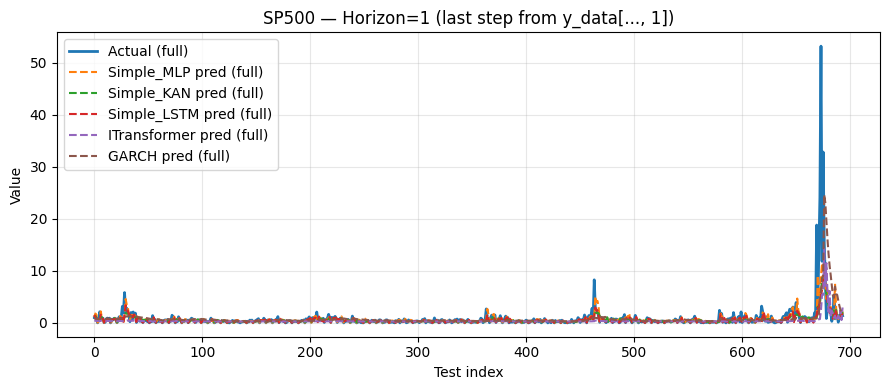

In [162]:

saved_metric_plots = plot_metric_vs_horizon(
    final_frames,
    tickers=None,          
    models=None,           
    metrics=None,         
    include_full=True,
    save_dir="plots/task_1",
    show=True
)
print("Saved", len(saved_metric_plots), "charts to plots/task_1")


saved_y_plots = plot_h1_full_from_results(
    final_results_store,
    tickers=None,
    models=None,
    save_dir="plots/task_1/y_plots",
    show=True,
    verbose=True
)


# Results on models with more inputs

In [823]:

load_data_object_11_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_11.pkl")
with open(load_data_object_11_file_path, "rb") as f:
    structured_data_dict_11 = pickle.load(f)
print("Data dictionary 11 loaded successfully.")

X_price_map, X_time_map, y_map = {}, {}, {}

missing = []
for t in tickers:  
    if t not in structured_data_dict_11:      
        missing.append(t)
        continue

    entry = structured_data_dict_11[t]         

    Xp = entry.get("X_other", None)
    Xt = entry.get("X_time",  None)
    Y  = entry.get("y",       None)

    if Xp is None or Y is None:
        print(f"[WARN] {t}: missing {'X_other' if Xp is None else ''}"
              f"{' and ' if (Xp is None and Y is None) else ''}"
              f"{'y' if Y is None else ''} → skipping.")
        continue

    Xp = np.asarray(Xp, dtype=float)
    Xt = None if Xt is None else np.asarray(Xt, dtype=float)
    Y  = np.asarray(Y,  dtype=float)

    if Xp.ndim != 3 or Y.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_other={Xp.shape}, y={Y.shape} → skipping.")
        continue
    if Xt is not None and Xt.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_time={Xt.shape} → setting to None.")
        Xt = None

    X_price_map[t] = Xp
    X_time_map[t]  = Xt
    y_map[t]       = Y

if missing:
    print(f"[INFO] Missing tickers in data dict (skipped): {missing}")


multi_input_results_store = {}


MULTI_INPUT_BASE_SAVE_DIR = os.path.join(root_folder, objects_relative_path, "multi_input_results_saved_object")
os.makedirs(MULTI_INPUT_BASE_SAVE_DIR, exist_ok=True)


mutiple_inputs_models = ["Simple_KAN"]  

_ = run_all_models_for_all(
    tickers=final_tickers,                
    horizons=final_horizons,
    model_list=mutiple_inputs_models,
    X_price_map=X_price_map,
    X_time_map=X_time_map,
    y_map=y_map,
    base_save_dir=MULTI_INPUT_BASE_SAVE_DIR,
    fixed_params=FIXED_PARAMS_MERGED,
    common_params=COMMON,
    model_io=MODEL_IO,
    multitask_models=MULTI_TASK_MODELS,
    param_grids=None,
    results_store=multi_input_results_store, 
    overwrite=False
)

Data dictionary 11 loaded successfully.

=== AAPL | H=1 | Simple_KAN (simple fit) | no_tasks=1 ===
[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 2018
Time steps for y: 1
Features for y: 1

Starting training without CV:
Checking X_price_train_core:
Shape: (1453, 60, 7)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  38.099874372714034
  Min value:  -10.367763820153055
Checking X_time_train_core:
Shape: (1453, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.481940465687973
  Min value:  -1.800915059933457
Checking y_train_core (log_mse scaled):
Shape: (1453, 1, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.13326

In [824]:
multiple_input_frames = build_metric_frames(multi_input_results_store, outer_horizon="full", pretty_print=True)
export_metrics(multi_input_results_store, "results/metrics_multiple_inputs_all.csv", outer_horizon="full")
export_metrics(multi_input_results_store, "results/metrics_multiple_inputs_all.txt", outer_horizon="full")



=== AAPL | Simple_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        2.462510  2.523389  2.565542  2.606932
Pearson r -0.090941  0.008225 -0.046882 -0.104006
QLIKE      0.575769  0.557520  0.577154  0.595907
R2        -0.063777 -0.058242 -0.059858 -0.061696
RMSE       8.913924  9.195842  9.240946  9.268690

=== MSFT | Simple_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        2.280823  2.342318  2.251885  2.130082
Pearson r  0.110140  0.086747  0.030856 -0.047103
QLIKE      0.443757  0.479544  0.488425  0.524231
R2         0.009284 -0.001142 -0.036023 -0.044969
RMSE       6.671584  6.706749  6.822834  7.058939

=== GE | Simple_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                  H1         H5        H10        H20
MAE         4.045902   4.237860   4.238666   4.252219
Pearson r

{'mode': 'text',
 'path': '/Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/results/metrics_multiple_inputs_all.txt',
 'sections': 9}

# Results on modesl with more tasks

In [ ]:
import os
import pickle
import numpy as np


load_data_object_8_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_8.pkl")
with open(load_data_object_8_file_path, "rb") as f:
    structured_data_dict_8 = pickle.load(f)
print("Data dictionary 8 loaded successfully.")

tickers  = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]
X_price_map, X_time_map, y_map = {}, {}, {}

missing = []
for t in tickers:
    if t not in structured_data_dict_8:
        missing.append(t)
        continue

    entry = structured_data_dict_8[t]
    Xp = entry.get("X_other", None)
    Xt = entry.get("X_time",  None)
    Y  = entry.get("y",       None)

    if Xp is None or Y is None:
        print(f"[WARN] {t}: missing X_other or y → skipping.")
        continue

    Xp = np.asarray(Xp, dtype=float)
    Xt = None if Xt is None else np.asarray(Xt, dtype=float)
    Y  = np.asarray(Y,  dtype=float)

    if Xp.ndim != 3 or Y.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_other={Xp.shape}, y={Y.shape} → skipping.")
        continue
    if Xt is not None and Xt.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_time={Xt.shape} → setting to None.")
        Xt = None

    X_price_map[t] = Xp
    X_time_map[t]  = Xt
    y_map[t]       = Y

if missing:
    print(f"[INFO] Missing tickers in data dict (skipped): {missing}")

for t in tickers:
    Xp = X_price_map.get(t); Xt = X_time_map.get(t); Y = y_map.get(t)
    print(t, "X_other", None if Xp is None else Xp.shape,
             "X_time",  None if Xt is None else Xt.shape,
             "y",       None if Y is None else Y.shape)


multiple_tasks_results_store = {}
multiple_tasks_models = ["Simple_KAN"]

MULTI_TASK_MODELS = {"Simple_KAN"}


MULTI_TASK_BASE_SAVE_DIR = os.path.join(root_folder, objects_relative_path, "multi_task_results_saved_object")
os.makedirs(MULTI_TASK_BASE_SAVE_DIR, exist_ok=True)

_ = run_all_models_for_all(
    tickers=final_tickers,
    horizons=final_horizons,
    model_list=multiple_tasks_models,
    X_price_map=X_price_map,
    X_time_map=X_time_map,
    y_map=y_map,
    base_save_dir=MULTI_TASK_BASE_SAVE_DIR,
    fixed_params=FIXED_PARAMS_MERGED,   
    common_params=COMMON,
    model_io=MODEL_IO,
    multitask_models=MULTI_TASK_MODELS,
    param_grids=None,
    results_store=multiple_tasks_results_store,
    overwrite=False
)


Data dictionary 8 loaded successfully.
AAPL X_other (2018, 60, 1) X_time (2018, 60, 14) y (2018, 60, 6)
MSFT X_other (2018, 60, 1) X_time (2018, 60, 14) y (2018, 60, 6)
GE X_other (2018, 60, 1) X_time (2018, 60, 14) y (2018, 60, 6)
BAC X_other (2018, 60, 1) X_time (2018, 60, 14) y (2018, 60, 6)
C X_other (2018, 60, 1) X_time (2018, 60, 14) y (2018, 60, 6)
BTCUSDT X_other (2399, 60, 1) X_time (2399, 60, 14) y (2399, 60, 6)
EURUSD X_other (3782, 60, 1) X_time (3782, 60, 14) y (3782, 60, 6)
GOLD X_other (5534, 60, 1) X_time (5534, 60, 14) y (5534, 60, 6)
SP500 X_other (3466, 60, 1) X_time (3466, 60, 14) y (3466, 60, 6)
[skip] AAPL | H=1 | Simple_KAN (exists, overwrite=False)
[skip] AAPL | H=5 | Simple_KAN (exists, overwrite=False)
[skip] AAPL | H=10 | Simple_KAN (exists, overwrite=False)
[skip] AAPL | H=20 | Simple_KAN (exists, overwrite=False)
[skip] MSFT | H=1 | Simple_KAN (exists, overwrite=False)
[skip] MSFT | H=5 | Simple_KAN (exists, overwrite=False)
[skip] MSFT | H=10 | Simple_KAN 

In [827]:
frames = build_metric_frames(
    multiple_tasks_results_store,
    task_name="Task 0",            
    outer_horizon="full",
    pretty_print=True
)


os.makedirs("results", exist_ok=True)
export_metrics(multiple_tasks_results_store, "results/multiple_task_all.csv", outer_horizon="full")
export_metrics(multiple_tasks_results_store, "results/multiple_task_all.txt",  outer_horizon="full")
print("Saved metrics to results/multiple_task_all.csv and results/multiple_task_all.txt")


=== AAPL | Simple_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        2.233370  2.420229  2.496394  2.542620
Pearson r  0.403259  0.374102  0.226162  0.176836
QLIKE      0.339369  0.390355  0.456250  0.483922
R2         0.049072  0.032749  0.005055 -0.029823
RMSE       8.427859  8.791616  8.953487  9.128504

=== MSFT | Simple_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        2.025080  2.072445  2.086677  2.150716
Pearson r  0.054634 -0.008634 -0.032227 -0.021689
QLIKE      0.479356  0.485605  0.488221  0.494321
R2        -0.017841 -0.022692 -0.025370 -0.023969
RMSE       6.762301  6.778548  6.787668  6.987651

=== GE | Simple_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                  H1         H5        H10        H20
MAE         4.109229   4.179038   4.323730   4.390263
Pearson r

# Results on hierarhical models

In [835]:
import os
import pickle
import numpy as np

load_data_object_8_file_path = os.path.join(root_folder, objects_relative_path, "structured_data_dict_8.pkl")
with open(load_data_object_8_file_path, "rb") as f:
    structured_data_dict_8 = pickle.load(f)
print("Data dictionary 8 loaded successfully.")

final_tickers  = ["AAPL", "MSFT", "GE", "BAC", "C", "BTCUSDT", "EURUSD", "GOLD", "SP500"]
final_horizons = [1, 5, 10, 20]

X_price_map, X_time_map, y_map = {}, {}, {}
missing = []
for t in final_tickers:
    if t not in structured_data_dict_8:
        missing.append(t); continue
    entry = structured_data_dict_8[t]
    Xp = entry.get("X_other"); Xt = entry.get("X_time"); Y = entry.get("y")
    if Xp is None or Y is None:
        print(f"[WARN] {t}: missing X_other or y → skipping."); continue
    Xp = np.asarray(Xp, dtype=float)
    Xt = None if Xt is None else np.asarray(Xt, dtype=float)
    Y  = np.asarray(Y,  dtype=float)
    if Xp.ndim != 3 or Y.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_other={Xp.shape}, y={Y.shape} → skipping."); continue
    if Xt is not None and Xt.ndim != 3:
        print(f"[WARN] {t}: unexpected dims X_time={Xt.shape} → setting to None."); Xt = None
    X_price_map[t] = Xp; X_time_map[t] = Xt; y_map[t] = Y
if missing:
    print(f"[INFO] Missing tickers in data dict (skipped): {missing}")

FIXED_PARAMS = {
    "Custom_KAN": dict(
        lr=5e-4, dropout=0.0, l2_weight=1e-5, batch_size=128, hidden_layers=3, hidden_dim=128, knots=8, spline_power=5,
        epochs=50, patience=10, min_epochs=30, min_delta=1e-4
    ),
    "Custom_KAN_LSTM": dict(
        lr=5e-4, dropout=0.0, l2_weight=1e-5, batch_size=32, hidden_layers=2, hidden_dim=32, knots=8, spline_power=5,
        epochs=20, patience=5, min_epochs=10, min_delta=1e-4
    )
}

MODEL_IO = {
    "Custom_KAN":   dict(merge_price_time=False, flatten=True),
    "Custom_KAN_LSTM": dict(merge_price_time=False, flatten=False),
}

COMMON = dict(
    use_nested_cv=False,
    single_holdout=False,
    normalize_X=True,
    normalize_Time=True,
    normalize_y=True,
    verbose=True,
    target_mode="log_mse"
)

hierarchical_results_store = {}
hierarchical_tasks_models = ["Custom_KAN", "Custom_KAN_LSTM"]
MULTI_TASK_MODELS = {"Custom_KAN", "Custom_KAN_LSTM"}

HIERARCHICAL_BASE_SAVE_DIR = os.path.join(root_folder, objects_relative_path, "hierarchical_results_saved_object")
os.makedirs(HIERARCHICAL_BASE_SAVE_DIR, exist_ok=True)

_ = run_all_models_for_all(
    tickers=final_tickers,
    horizons=final_horizons,
    model_list=hierarchical_tasks_models,
    X_price_map=X_price_map,
    X_time_map=X_time_map,
    y_map=y_map,
    base_save_dir=HIERARCHICAL_BASE_SAVE_DIR,
    fixed_params=FIXED_PARAMS,
    common_params=COMMON,
    model_io=MODEL_IO,
    multitask_models=MULTI_TASK_MODELS,
    param_grids=None,
    results_store=hierarchical_results_store,
    overwrite=False
)

Data dictionary 8 loaded successfully.

=== AAPL | H=1 | Custom_KAN (simple fit) | no_tasks=6 ===
[mode=log_mse] loss_type=mse, target_is_logvar=True, normalize_y=True
Using device: mps
Batch size for y: 2018
Time steps for y: 1
Features for y: 6

Starting training without CV:
Checking X_price_train_core:
Shape: (1453, 60, 1)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  38.099874372714204
  Min value:  -0.03434294798653995
Checking X_time_train_core:
Shape: (1453, 60, 14)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.481940465687973
  Min value:  -1.800915059933457
Checking y_train_core (log_mse scaled):
Shape: (1453, 1, 6)
  Contains NaN values:      False
  Contains +inf values:     False
  Contains -inf values:     False
  Contains any infinities:  False
  Max value:  9.13326

In [836]:
hierarchical_frames = build_metric_frames(hierarchical_results_store, outer_horizon="full", pretty_print=True)
os.makedirs("results", exist_ok=True)
export_metrics(hierarchical_results_store, "results/hierarchical_task_all.csv", outer_horizon="full")
export_metrics(hierarchical_results_store, "results/hierarchical_task_all.txt", outer_horizon="full")


=== AAPL | Custom_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        2.318615  2.487262  2.555042  2.545927
Pearson r  0.370403  0.284447  0.208310  0.186543
QLIKE      0.368335  0.432096  0.459599  0.471674
R2         0.026075 -0.002711 -0.023170 -0.015726
RMSE       8.529161  8.951316  9.079594  9.065810

=== AAPL | Custom_KAN_LSTM | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        2.439325  2.733695  2.576263  2.625173
Pearson r  0.451438  0.006517 -0.003502 -0.002359
QLIKE      0.535380  0.557882  0.587486  0.602212
R2        -0.018415 -0.007937 -0.040699 -0.050278
RMSE       8.721797  8.974611  9.157042  9.218717

=== MSFT | Custom_KAN | using all outer horizons [1, 5, 10, 20] | task=Task 1 | full-only ===
                 H1        H5       H10       H20
MAE        2.065696  2.146139  2.139506  2.173128
Pearson r 

{'mode': 'text',
 'path': '/Users/silviumatu/Desktop/Code/Python/Licenta/Licenta_INFO_v9/results/hierarchical_task_all.txt',
 'sections': 18}

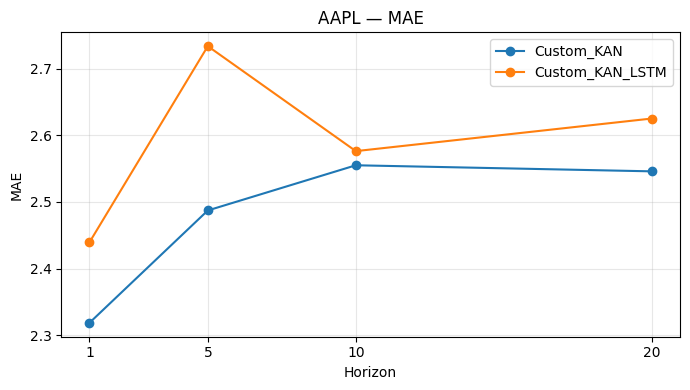

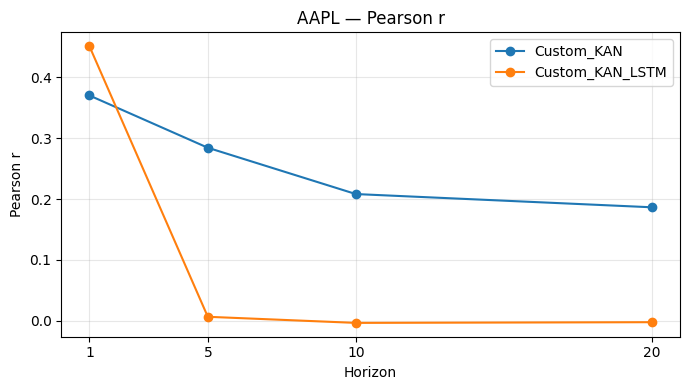

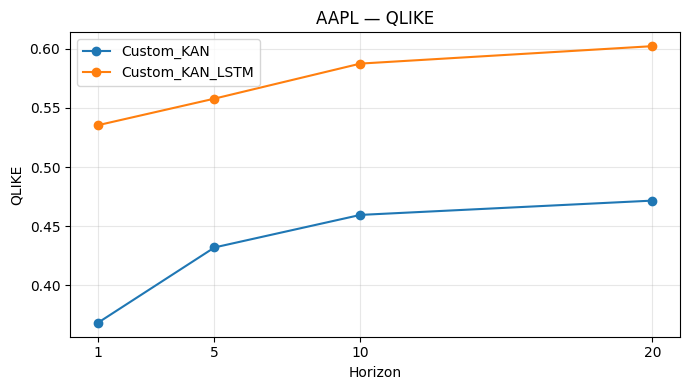

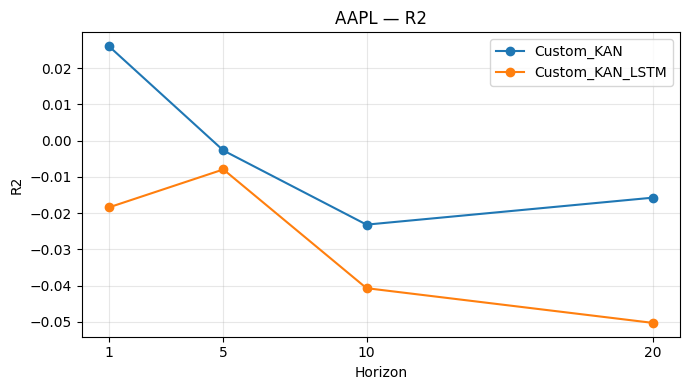

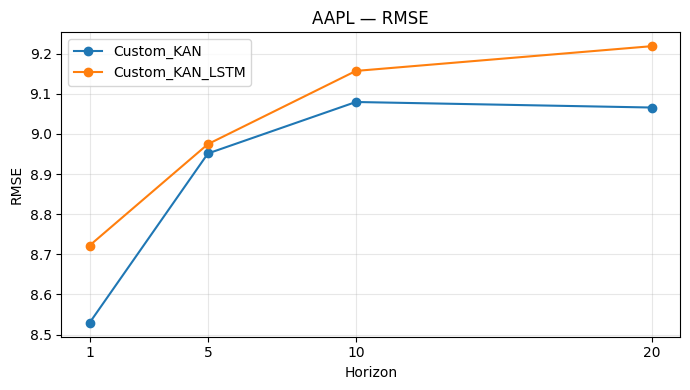

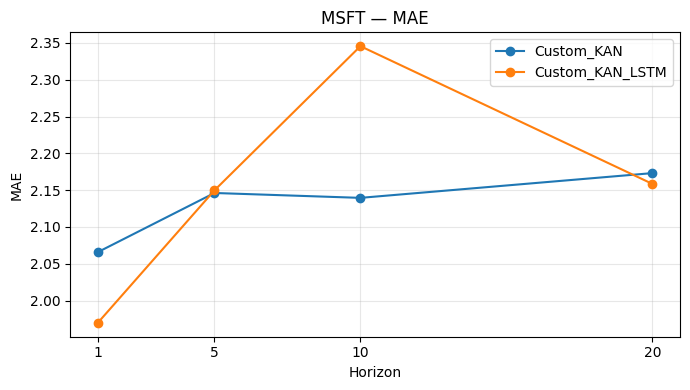

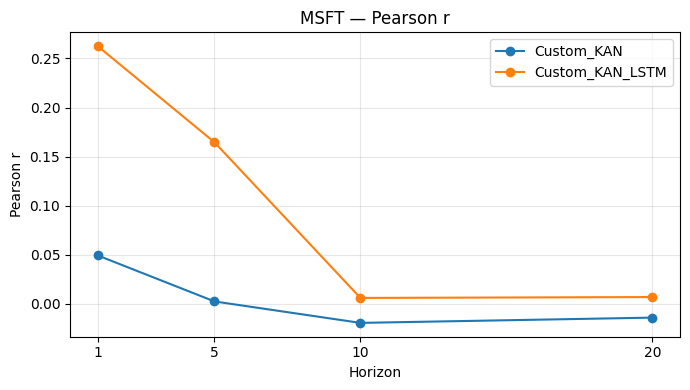

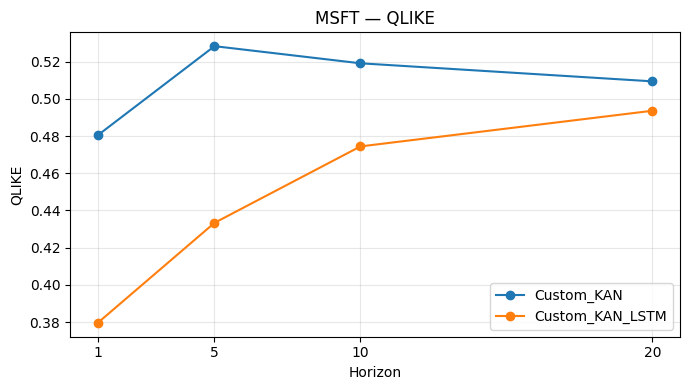

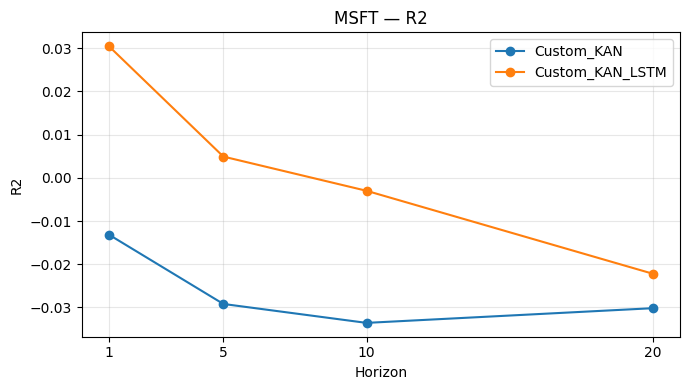

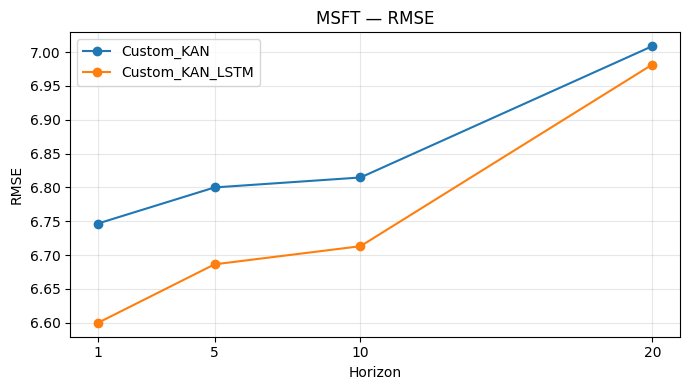

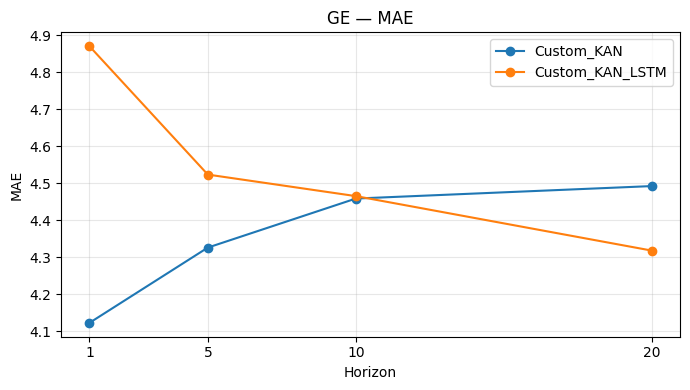

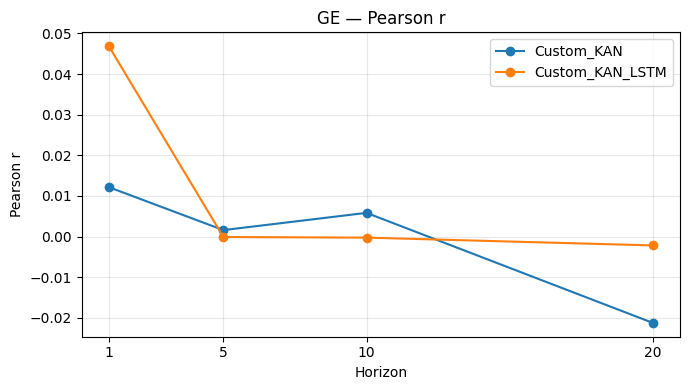

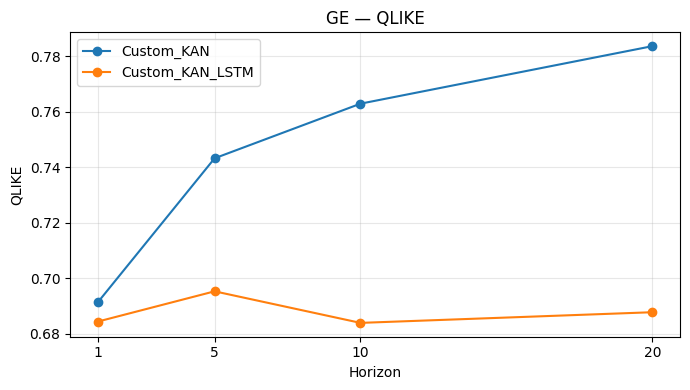

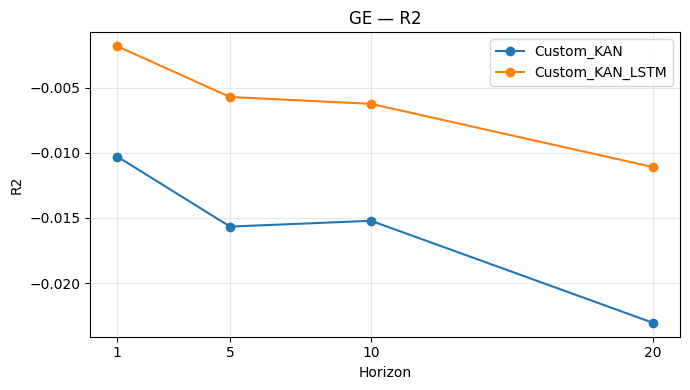

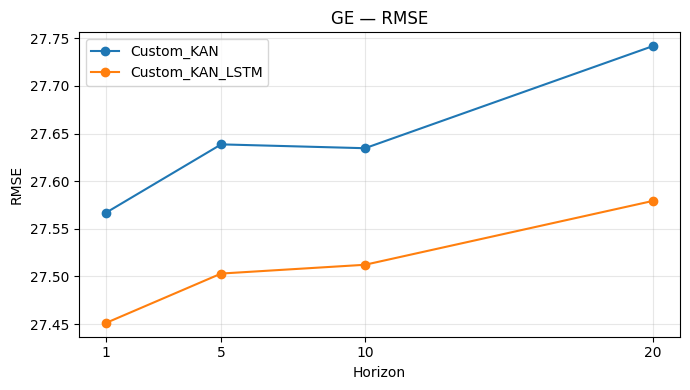

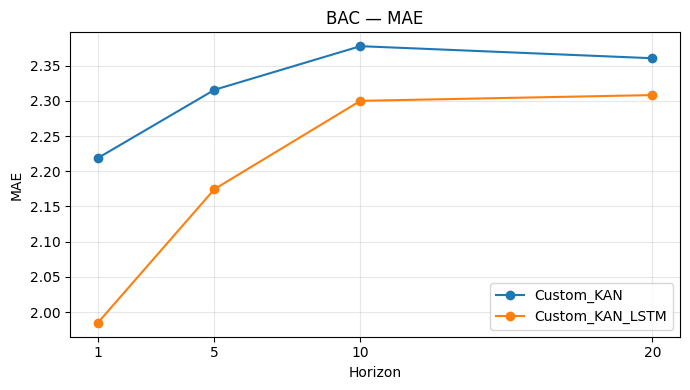

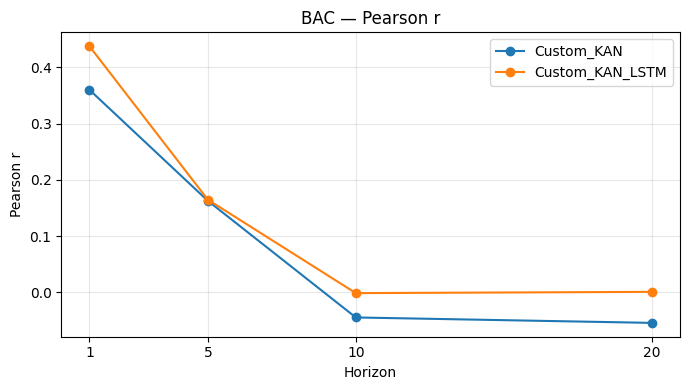

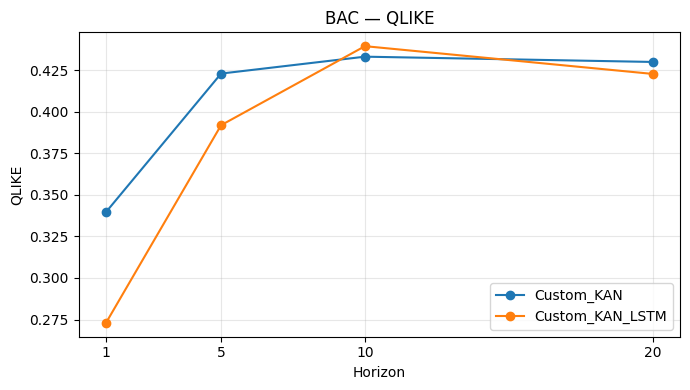

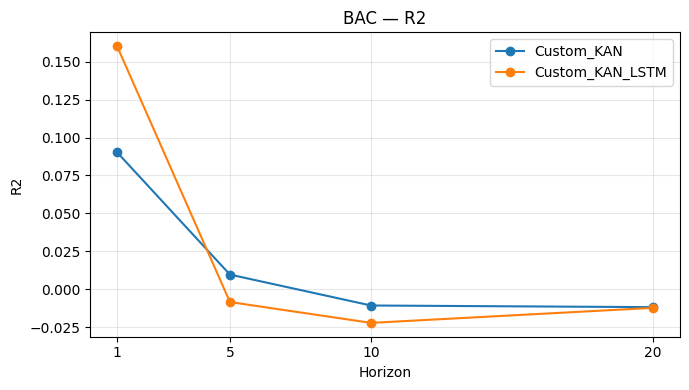

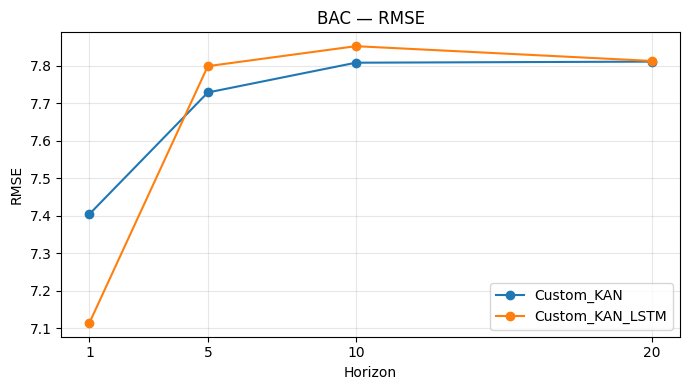

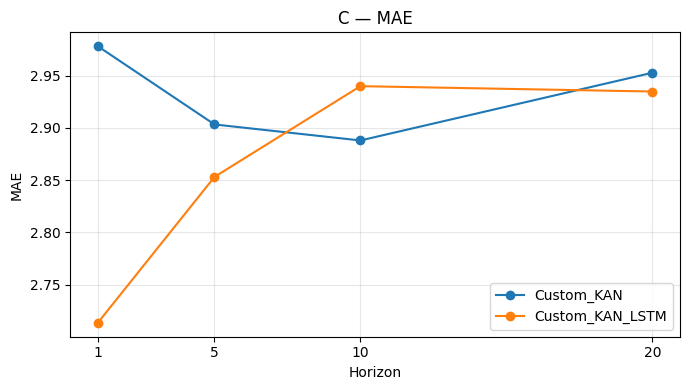

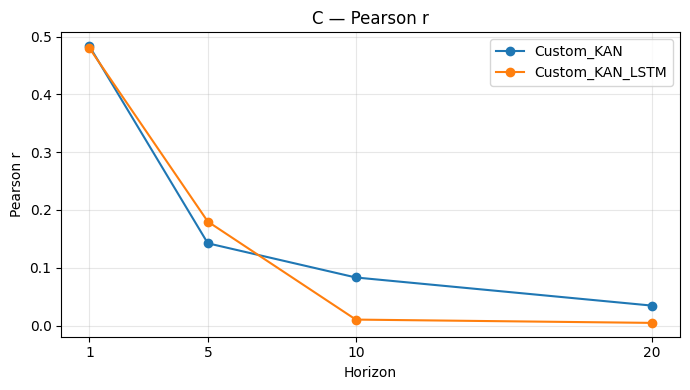

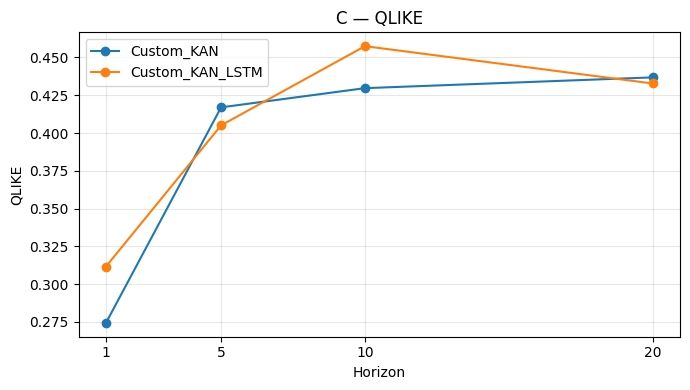

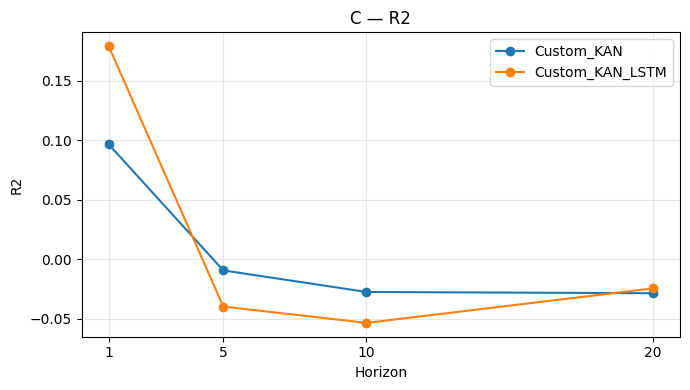

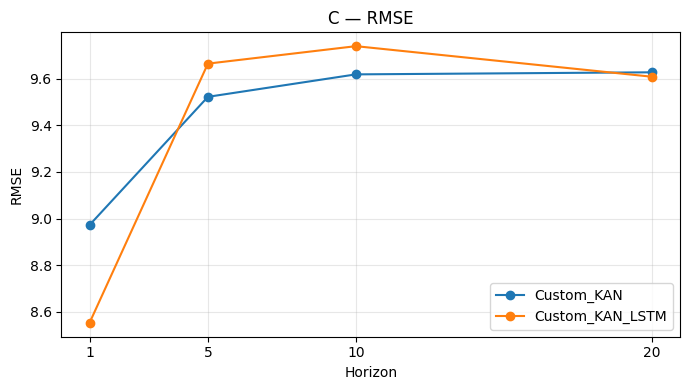

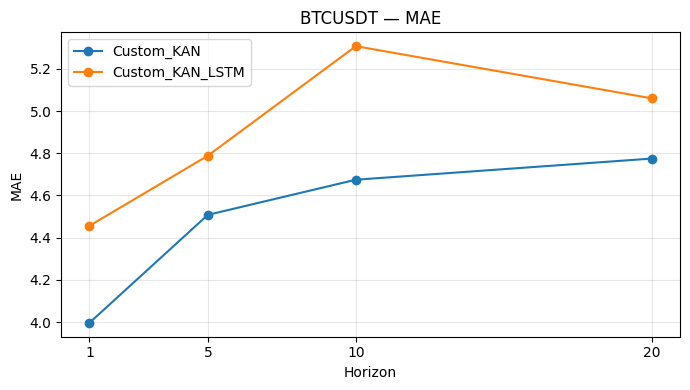

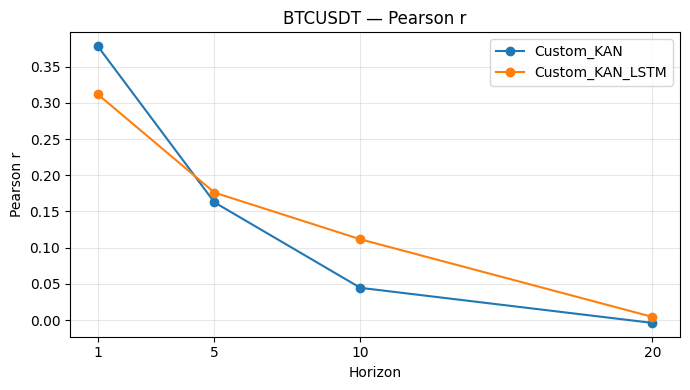

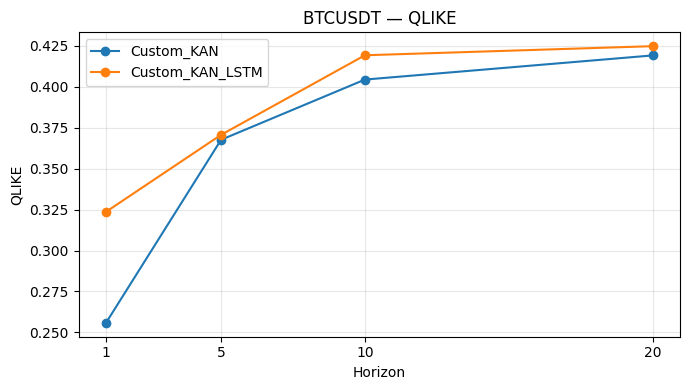

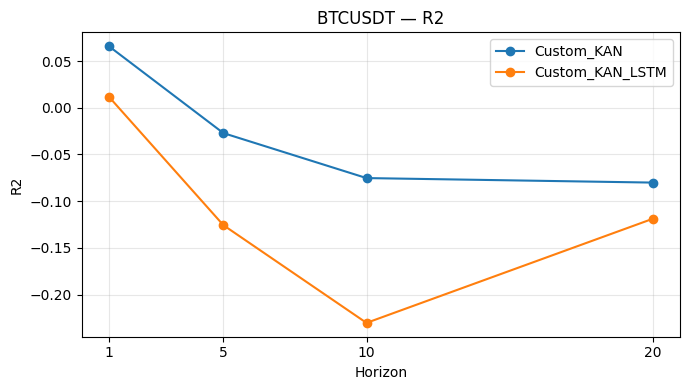

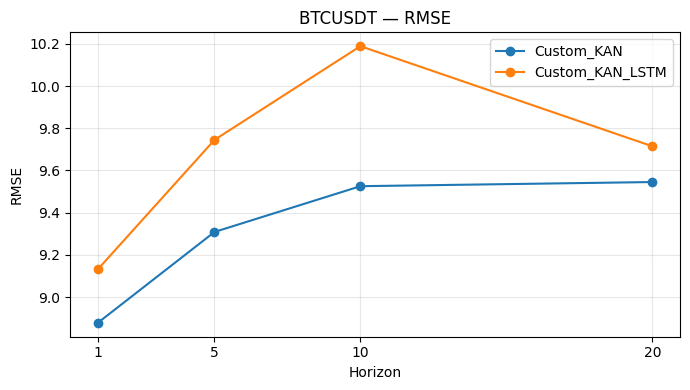

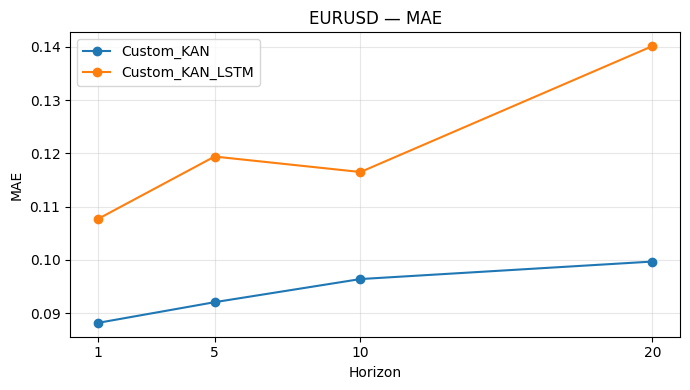

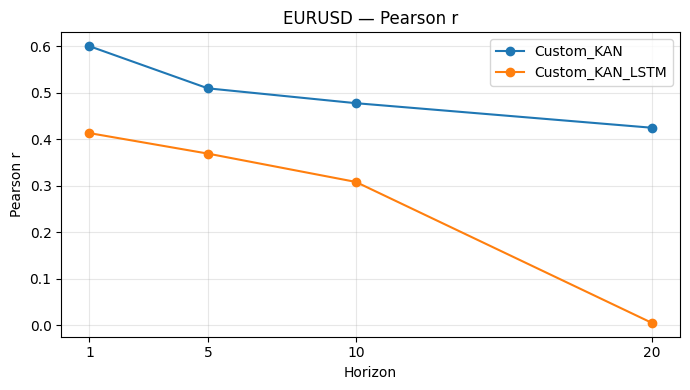

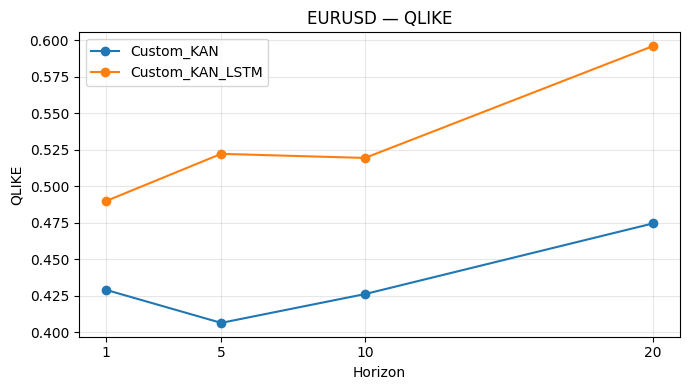

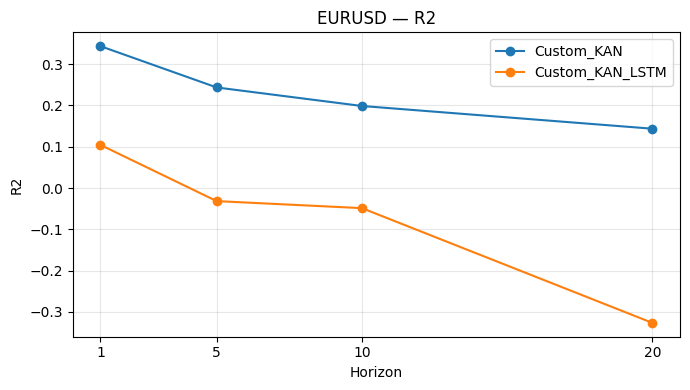

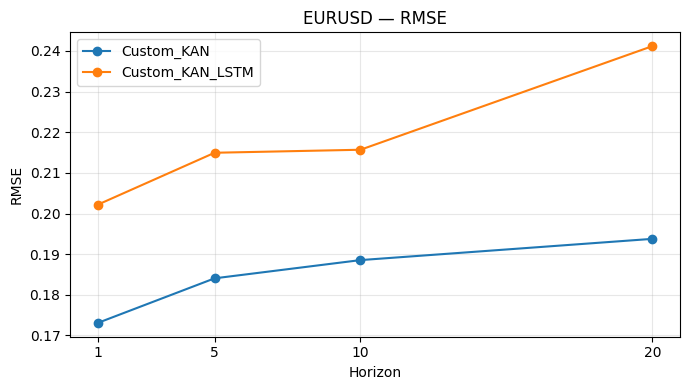

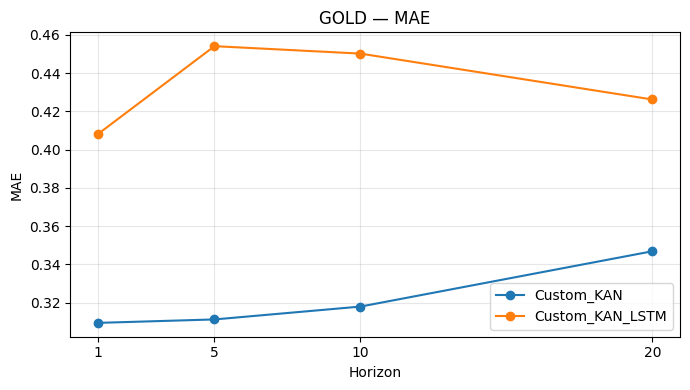

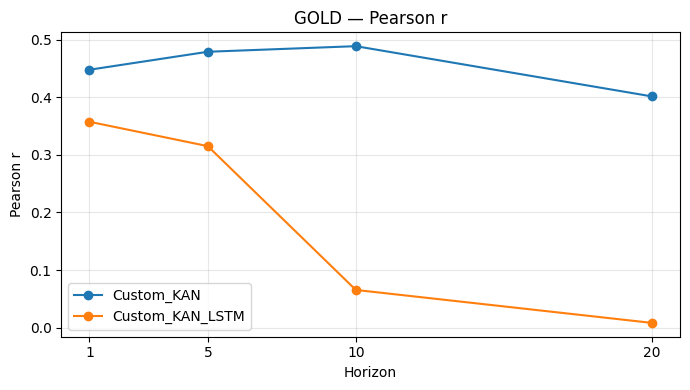

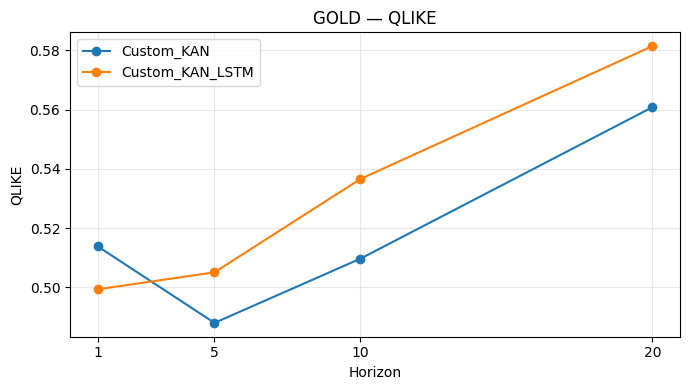

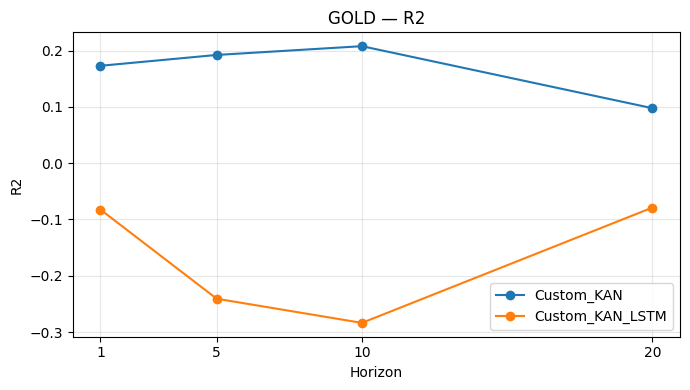

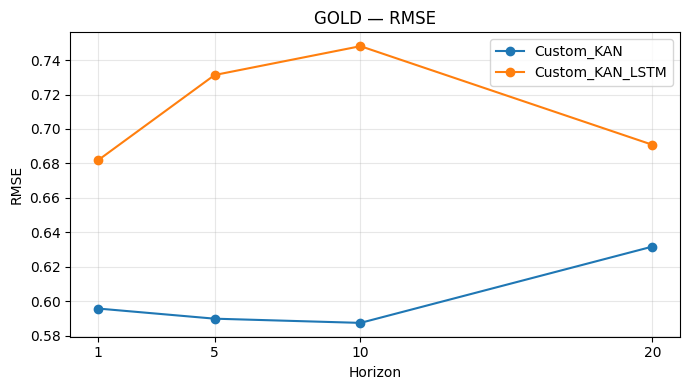

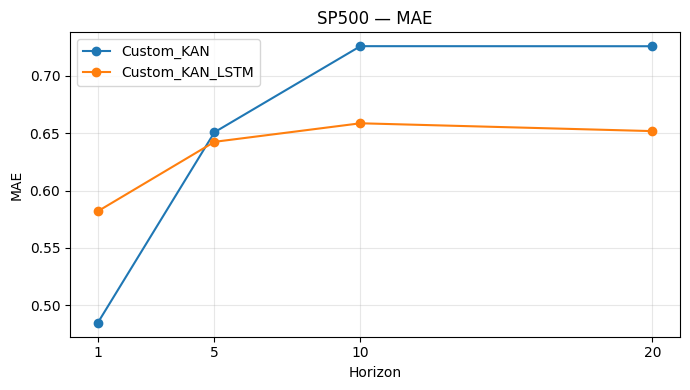

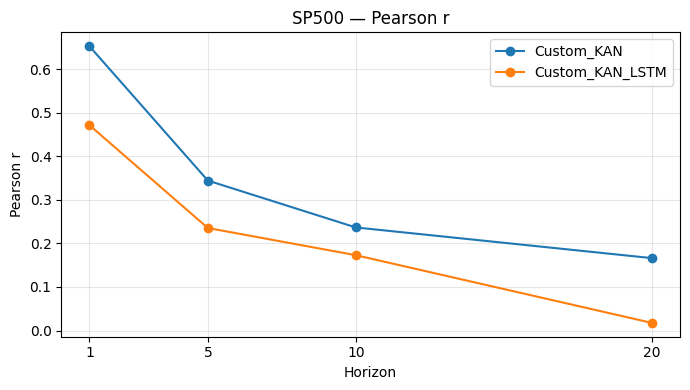

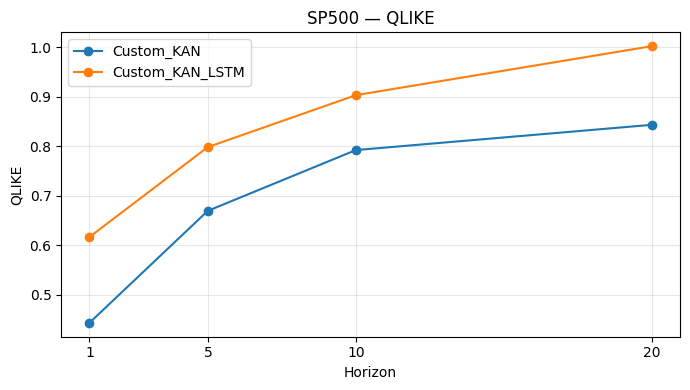

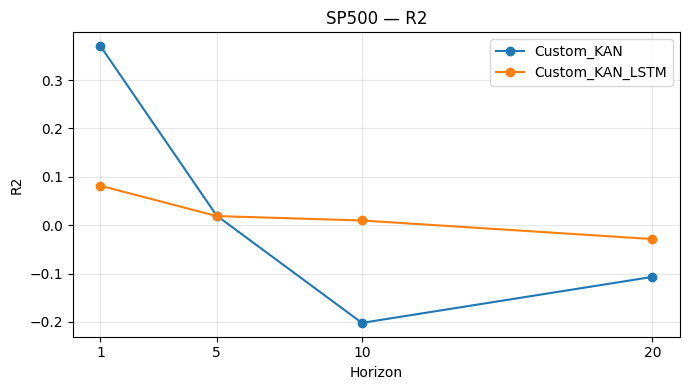

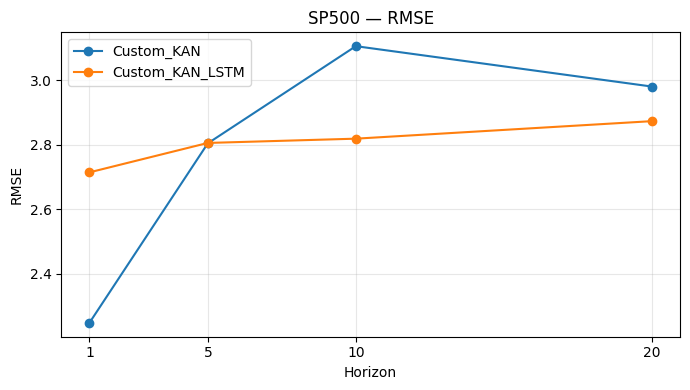

Saved 10 charts to plots/hierarchical
  [AAPL H=1] Custom_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [AAPL H=1] Custom_KAN_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
[AAPL H=1] actual=YES

[AAPL H=1] Aligned series head (first 50 of 404 rows):
  Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
0.934885          1.19949               2.41671
 1.65221           1.1972               2.41671
 3.00982           1.1994               2.41671
 7.17364          1.21536               2.41671
 2.32415          1.30248               2.41672
  1.8112           1.2985               2.41671
 2.83463          1.29008               2.41672
 2.29244          1.30762               2.41672
 1.60917          1.31178               2.41672
  1.9016          1.28338               2.41672
 2.02761          1.28975               2.41672
0.882809          1.29439               2.41672
 1.75996          1.28112               2.41671
 1.93843          1.27651               2.41671
 1.30271            1.289          

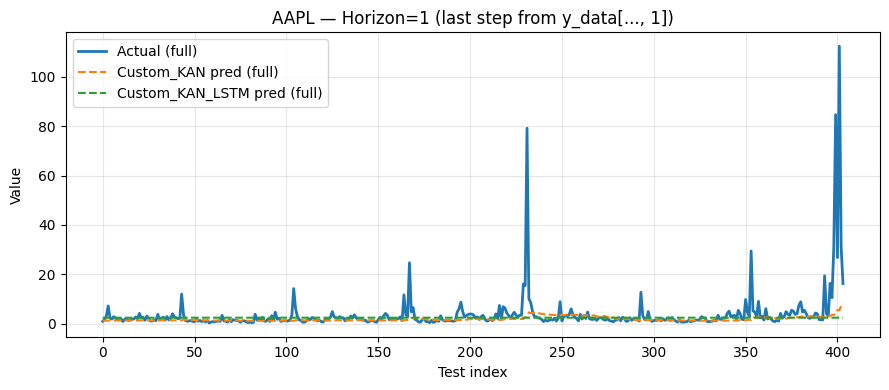

  [MSFT H=1] Custom_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [MSFT H=1] Custom_KAN_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
[MSFT H=1] actual=YES

[MSFT H=1] Aligned series head (first 50 of 404 rows):
 Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
1.62646          2.22021               1.45818
1.38102          2.15964               1.44234
1.45815          2.12555               1.44359
1.91787          2.13263               1.43549
1.81463          2.15343                1.4279
1.90777          2.06604               1.41948
1.13204          2.13591                1.4157
2.16207          2.14262               1.38857
1.60526          2.11671               1.39645
1.36873          2.12241               1.39064
1.54924          2.05999               1.37638
1.38923          2.10711               1.37061
1.71635          2.11613               1.36279
7.14713          2.09352               1.36281
2.33716          2.11699               1.49179
2.91188           2.1708               1.

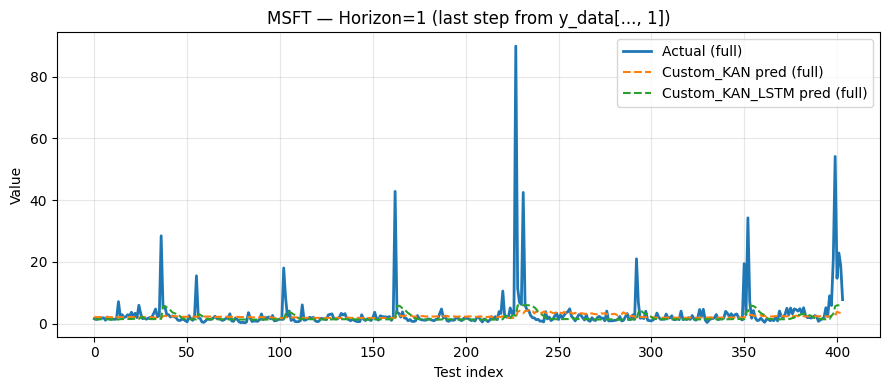

  [GE H=1] Custom_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [GE H=1] Custom_KAN_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
[GE H=1] actual=YES

[GE H=1] Aligned series head (first 50 of 404 rows):
  Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
  1.5135          2.62958               4.74942
 1.72313           2.6234               4.74942
 1.67254          2.60952               4.74942
 1.66078          2.62365               4.74942
0.769403          2.61986               4.74942
 1.04217          2.61249               4.74942
 3.65719          2.63235               4.74942
 1.16201          2.63027               4.74942
 4.30547           2.6139               4.74942
 1.37445          2.58896               4.74942
 1.38507          2.58454               4.74942
 1.13075           2.5748               4.74942
 1.22114          2.57874               4.74942
 1.99537          2.56524               4.74942
 2.85347           2.5721               4.74942
0.960334          2.58125        

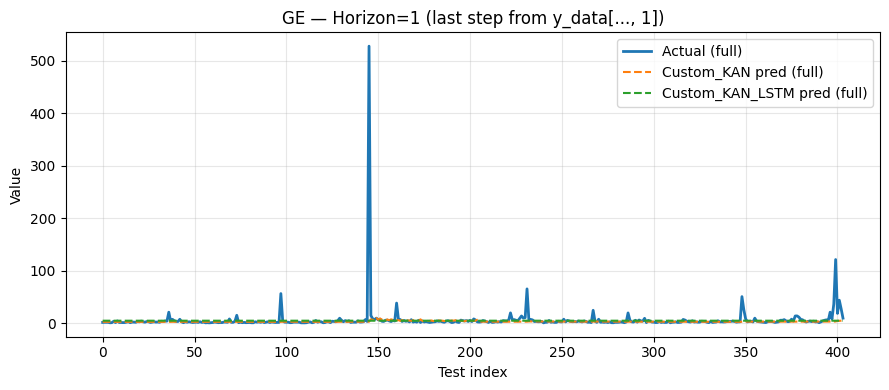

  [BAC H=1] Custom_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [BAC H=1] Custom_KAN_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
[BAC H=1] actual=YES

[BAC H=1] Aligned series head (first 50 of 404 rows):
 Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
2.28991          1.79203               1.62009
2.58025          1.83137               1.65437
1.43685          1.81755               1.70708
1.40532          1.82192               1.66887
1.62484          1.73964               1.63696
2.44658          1.71432               1.63278
1.56274          1.76774               1.67399
2.04251           1.7558               1.65693
1.92693          1.81258               1.66462
 1.4117          1.77126               1.67169
1.18859           1.8158               1.64326
1.43173          1.77945               1.61318
1.53413          1.76102               1.60624
2.43259          1.85296               1.60542
1.83194          1.81342               1.64349
1.89469          1.77622               1.6491

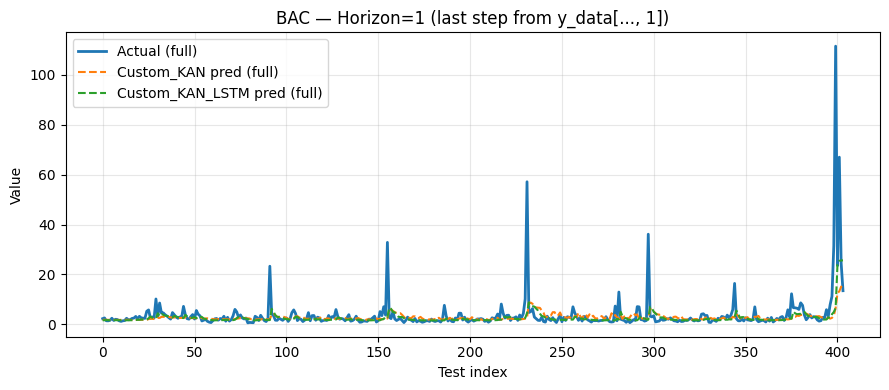

  [C H=1] Custom_KAN: blob_shape=(404, 1, 2), yt=ok, yp=ok
  [C H=1] Custom_KAN_LSTM: blob_shape=(404, 1, 2), yt=ok, yp=ok
[C H=1] actual=YES

[C H=1] Aligned series head (first 50 of 404 rows):
 Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
 1.4361          1.61315               1.55255
 2.4089          1.72313               1.55103
1.70682          1.83608                1.5575
 1.3802          1.73085               1.55482
1.42651          1.49696               1.55232
2.28623          1.39389               1.55051
3.09043          2.50494               1.55637
3.47712           2.0521                1.5676
2.10921          2.35139                1.5857
3.05691          1.67253               1.57905
1.32975          2.75387               1.59699
1.00699          1.53955               1.57376
1.56839          1.61568               1.56194
1.79976          1.36946               1.55885
3.40343          1.55363               1.55891
2.66085          1.60086               1.57622
3.5011

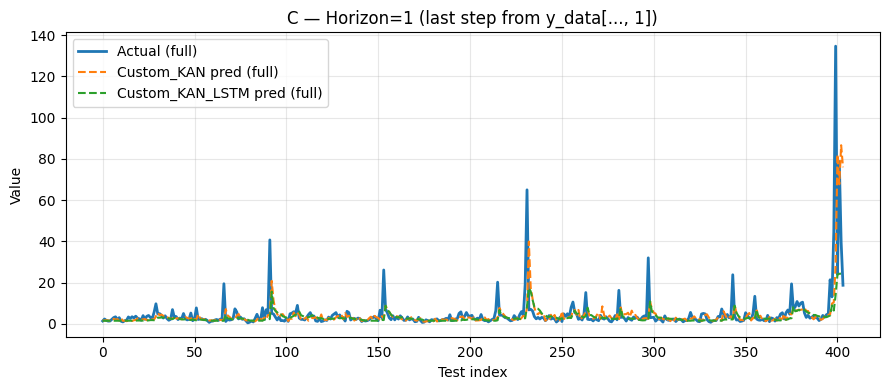

  [BTCUSDT H=1] Custom_KAN: blob_shape=(480, 1, 2), yt=ok, yp=ok
  [BTCUSDT H=1] Custom_KAN_LSTM: blob_shape=(480, 1, 2), yt=ok, yp=ok
[BTCUSDT H=1] actual=YES

[BTCUSDT H=1] Aligned series head (first 50 of 480 rows):
  Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
 6.92748          3.48175               6.12203
 1.26781          2.58393               6.40278
0.752504          1.99679               3.86965
 10.0004          2.81132               3.38879
 8.45084          6.45316               4.59524
 5.32244          5.79103               4.34959
 2.80991          4.04693               3.77076
 5.32016          2.61173               3.52791
 1.27538          1.79704               3.69467
  3.3705          1.76765               2.91812
 4.30039          2.74818                2.8623
  4.5337          3.97239               2.84491
 6.04033          3.00672               2.75938
 4.38553          3.73992               2.93889
 3.19392          2.86888                 2.774
0.828641     

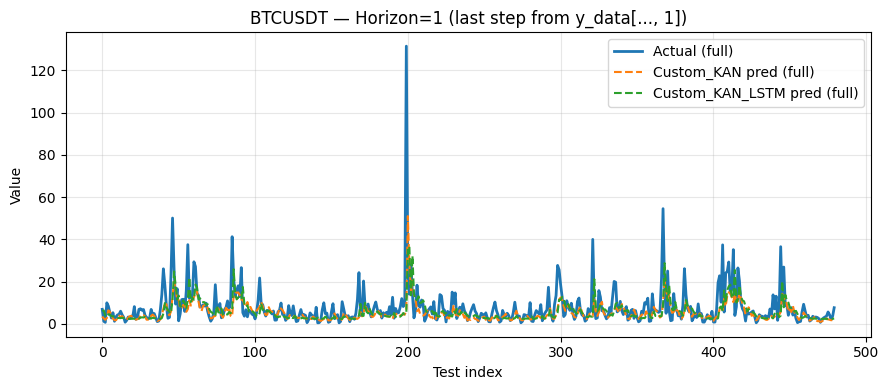

  [EURUSD H=1] Custom_KAN: blob_shape=(757, 1, 2), yt=ok, yp=ok
  [EURUSD H=1] Custom_KAN_LSTM: blob_shape=(757, 1, 2), yt=ok, yp=ok
[EURUSD H=1] actual=YES

[EURUSD H=1] Aligned series head (first 50 of 757 rows):
    Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
  0.739859         0.607651              0.268178
  0.743822         0.386594              0.270754
   1.02363         0.348778              0.271516
 0.0199331        0.0559565              0.272158
   0.52303         0.389376              0.270718
  0.355217         0.279801               0.27113
  0.417086         0.728095              0.270513
  0.266624         0.533505              0.270521
  0.312901         0.433327              0.269751
0.00443731       0.00655468              0.269215
  0.261753         0.665032              0.266524
  0.788937         0.235256              0.263815
  0.598342         0.725181              0.267831
  0.723261         0.571858              0.270252
  0.341589         0.427038        

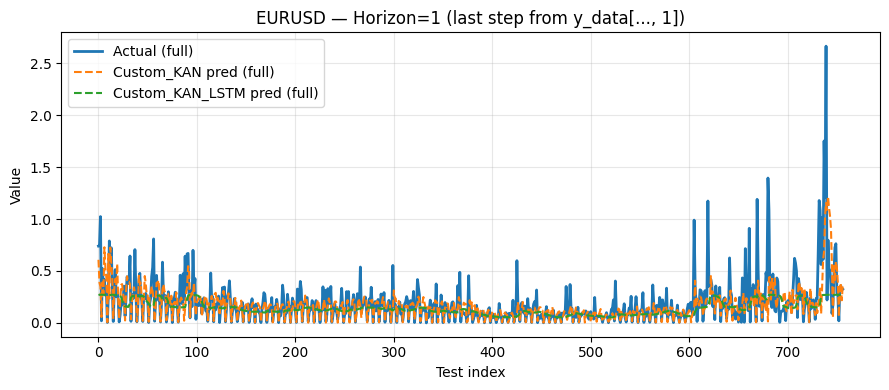

  [GOLD H=1] Custom_KAN: blob_shape=(1107, 1, 2), yt=ok, yp=ok
  [GOLD H=1] Custom_KAN_LSTM: blob_shape=(1107, 1, 2), yt=ok, yp=ok
[GOLD H=1] actual=YES

[GOLD H=1] Aligned series head (first 50 of 1107 rows):
   Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
 0.983207         0.701758              0.273914
0.0725466        0.0823518              0.274401
 0.365228         0.481668              0.273761
 0.675363         0.720237              0.273848
  1.19577         0.618304              0.273905
 0.396614         0.384839              0.274294
 0.569428          0.38176              0.273966
0.0394832         0.734734              0.274082
 0.540289         0.624824              0.273594
 0.645375         0.658961              0.273806
 0.596069         0.745082              0.273801
 0.496734         0.599063              0.273755
 0.986594         0.583062              0.273703
0.0170706        0.0170588              0.273946
 0.388559         0.656164              0.273456
 0.616

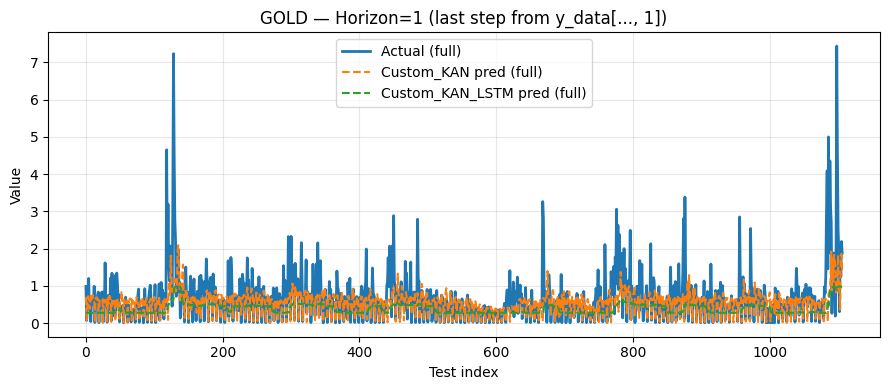

  [SP500 H=1] Custom_KAN: blob_shape=(694, 1, 2), yt=ok, yp=ok
  [SP500 H=1] Custom_KAN_LSTM: blob_shape=(694, 1, 2), yt=ok, yp=ok
[SP500 H=1] actual=YES

[SP500 H=1] Aligned series head (first 50 of 694 rows):
   Actual  Custom_KAN_pred  Custom_KAN_LSTM_pred
   1.0351          1.58101               0.87748
  1.03491          1.63305              0.833625
 0.818223          1.19753              0.803877
0.0217497         0.274999               0.77482
 0.502587         0.502349              0.618308
  2.13502         0.584809              0.608759
 0.903485           1.3048              0.802115
 0.898743          1.37717              0.762571
 0.904151         0.859937              0.737796
0.0405714         0.212866              0.732258
 0.113815         0.571309              0.592389
  0.60793         0.851078              0.574063
  0.92855         0.811166              0.552216
 0.794209          0.83568              0.593118
 0.910428         0.587703              0.595495
0.010

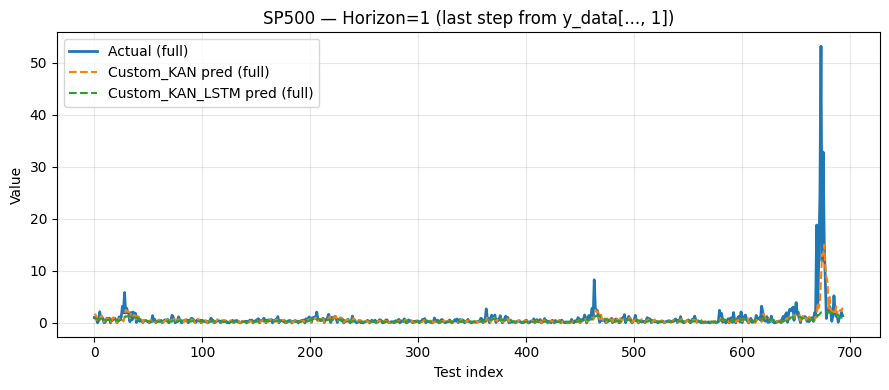

In [837]:
saved_hierarchical_plots = plot_metric_vs_horizon(
    hierarchical_frames,
    tickers=None,          
    models=None,           
    metrics=None,         
    include_full=True,
    save_dir="plots/hierarchical",
    show=True
)
print("Saved", len(saved), "charts to plots/hierarchical")


saved_hierarchical_y_plots = plot_h1_full_from_results(
    hierarchical_results_store,
    tickers=None,
    models=None,
    save_dir="plots/hierarchical/y_plots",
    show=True,
    verbose=True
)